In [1]:
"""
===========================
Fitting an auto_arima model
===========================


This example demonstrates how we can use the ``auto_arima`` function to
select an optimal time series model. We'll be fitting our model on the lynx
dataset available in the :ref:`datasets` submodule.

.. raw:: html

   <br/>
"""
print(__doc__)

# Author: Taylor Smith <taylor.smith@alkaline-ml.com>

import pmdarima as pm
from pathlib import Path
from pmdarima import model_selection
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
from library.common import Core


Fitting an auto_arima model


This example demonstrates how we can use the ``auto_arima`` function to
select an optimal time series model. We'll be fitting our model on the lynx
dataset available in the :ref:`datasets` submodule.

.. raw:: html

   <br/>



In [2]:
from pathlib import Path
import pandas as pd
core = Core()

max_p = 20
max_d = 20
max_q = 20
max_P = 10
max_D = 10
max_Q = 10


In [3]:
def forecast(data, start_year, model):
    # #############################################################################
    # Load the data and split it into separate pieces

    train, test = model_selection.train_test_split(data, train_size=len(data)-5)

    # Fit a simple auto_arima model
    modl = pm.auto_arima(train, start_p=1, start_q=1, start_P=1, start_Q=1,
                         max_p=max_p, max_d = max_d, max_q=max_q,
                         max_P= max_P, max_D= max_D, max_Q= max_Q,
                         # max_P=5, max_Q=5, seasonal=True,
                         stepwise=True, suppress_warnings=True, seasonal = True,
                         # D=10, max_D=10,
                         error_action='ignore')

    # Create predictions for the future, evaluate on test
    preds, conf_int = modl.predict(n_periods=test.shape[0], return_conf_int=True)

    # Print the error:
    print("Test RMSE: %.3f" % np.sqrt(mean_squared_error(test, preds)))

    # #############################################################################
    # Plot the points and the forecasts
    x_axis = np.arange(train.shape[0] + preds.shape[0])
    x_years = x_axis + start_year  # Year starts at 1821


    plt.figure(figsize = (25, 5))
    plt.plot(x_years[x_axis[:train.shape[0]]], train, alpha=0.75)
    plt.plot(x_years[x_axis[train.shape[0]:]], preds, alpha=0.75)  # Forecasts
    plt.scatter(x_years[x_axis[train.shape[0]:]], test,
                alpha=0.4, marker='x')  # Test data
    plt.fill_between(x_years[x_axis[-preds.shape[0]:]],
                     conf_int[:, 0], conf_int[:, 1],
                     alpha=0.2, color='b')
    plt.ylim(ymin=0)
    plt.title(f"{model} Forecast")
    plt.xlabel("Year")

    plt.show()

In [4]:


selected_features = core.relevant_features
cwd = Path.cwd()
ts_timeframe = cwd.parent / 'data'
ts_timeframe = ts_timeframe / 'processed'
ts_timeframe = ts_timeframe / 'timeseries_start_stop.pkl'
ts_period = pd.read_pickle(ts_timeframe)


# ts_period = ts_period.loc[selected_features[4:], :]
last_year = ts_period.stop.min().item()
forecast_param = {'last_period': last_year}

regions = core.regions
world = core.world

for r in core.list_of_regions:
    print(r)
    print(core.regions.get(r))


Cluster 0
['ALB', 'AND', 'AGO', 'ARM', 'BHS', 'BHR', 'BEN', 'BMU', 'BOL', 'BIH', 'BWA', 'BRN', 'CMR', 'CPV', 'COG', 'CRI', 'CIV', 'CUB', 'CUW', 'COD', 'DJI', 'DMA', 'DOM', 'SLV', 'GNQ', 'FJI', 'PYF', 'GAB', 'GMB', 'GEO', 'GHA', 'GRL', 'GTM', 'HTI', 'HND', 'ISL', 'JAM', 'JOR', 'KIR', 'KGZ', 'LBN', 'LBY', 'MLT', 'MHL', 'MRT', 'MDA', 'MNG', 'MNE', 'MOZ', 'NAM', 'NRU', 'NCL', 'NIC', 'NGA', 'PRK', 'PLW', 'PSE', 'PAN', 'PRY', 'PRI', 'STP', 'SEN', 'SRB', 'SYC', 'SXM', 'SUR', 'SYR', 'TGO', 'TUN', 'TCA', 'TUV', 'URY', 'ASM', 'CYM', 'GIB', 'GUM', 'MAC', 'MCO', 'MNP', 'SMR', 'VIR']
Cluster 1
['DZA', 'ARG', 'AUS', 'AUT', 'AZE', 'BGD', 'BLR', 'BEL', 'BRA', 'BGR', 'CAN', 'CHL', 'COL', 'HRV', 'CYP', 'CZE', 'DNK', 'ECU', 'EGY', 'EST', 'FIN', 'FRA', 'DEU', 'GRC', 'HKG', 'HUN', 'IND', 'IDN', 'IRN', 'IRQ', 'IRL', 'ISR', 'ITA', 'JPN', 'KAZ', 'KWT', 'LVA', 'LTU', 'LUX', 'MYS', 'MEX', 'MAR', 'NLD', 'NZL', 'MKD', 'NOR', 'OMN', 'PAK', 'PER', 'PHL', 'POL', 'PRT', 'QAT', 'ROU', 'RUS', 'SAU', 'SGP', 'SVK', 'SVN'

FEATURE  consumption_co2 REGION  Cluster 0
START  1990
ALT START  1990
Test RMSE: 42.748


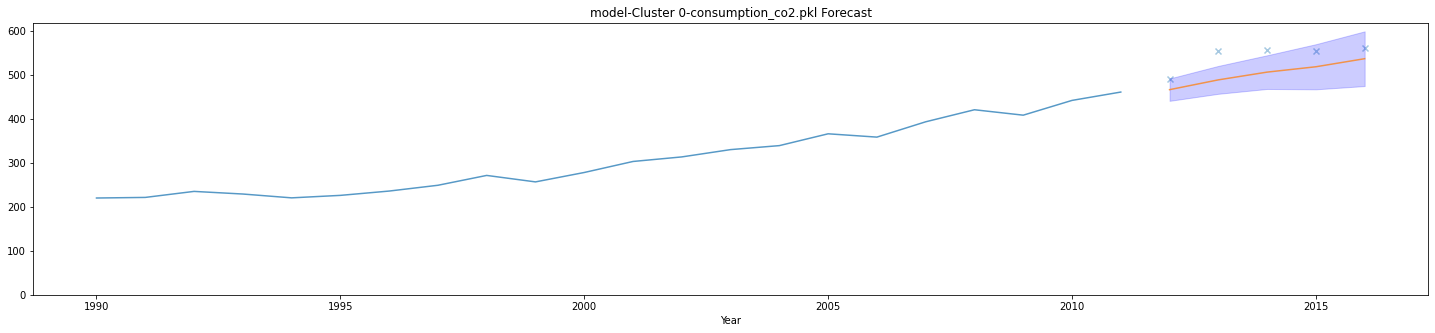

model-Cluster 0-consumption_co2.pkl COMPLETED
FEATURE  co2_growth_prct REGION  Cluster 0
START  1752
ALT START  1752
Test RMSE: 508.321


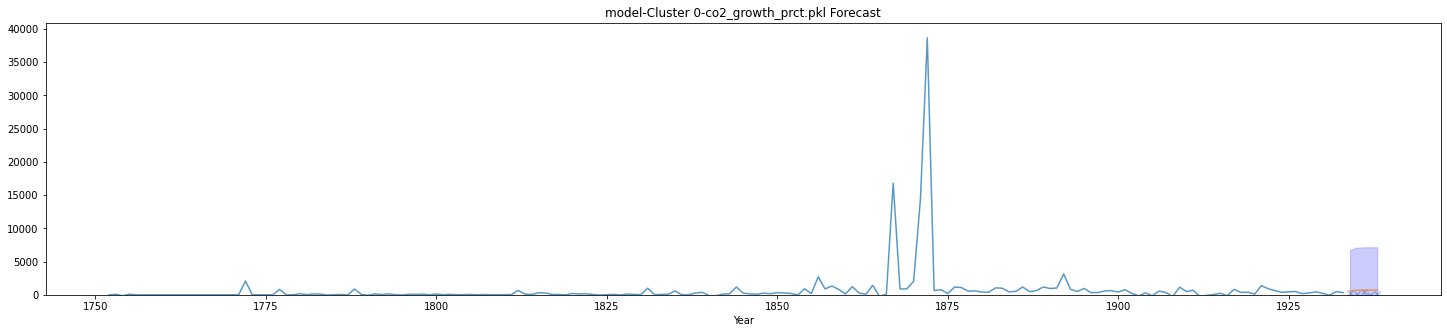

model-Cluster 0-co2_growth_prct.pkl COMPLETED
FEATURE  co2_growth_abs REGION  Cluster 0
START  1752
ALT START  1752
Test RMSE: 24.387


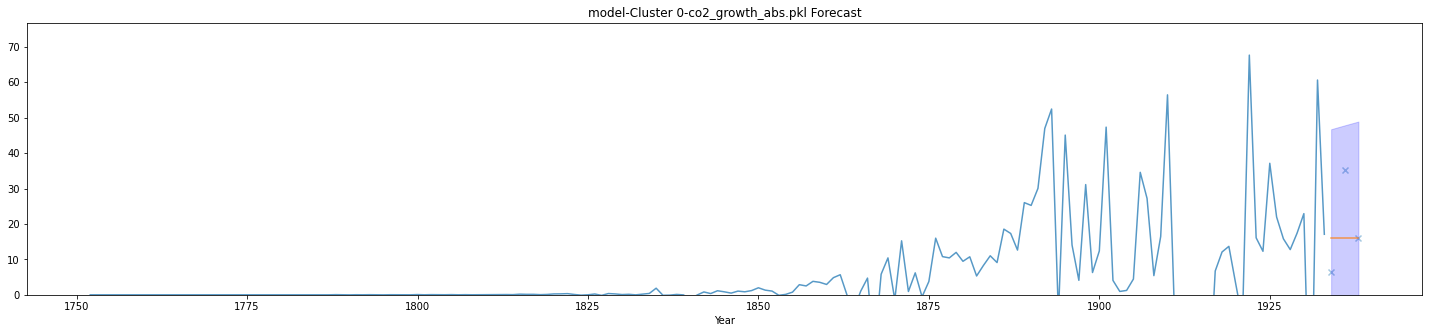

model-Cluster 0-co2_growth_abs.pkl COMPLETED
FEATURE  trade_co2 REGION  Cluster 0
START  1990
ALT START  1990
Test RMSE: 52.648


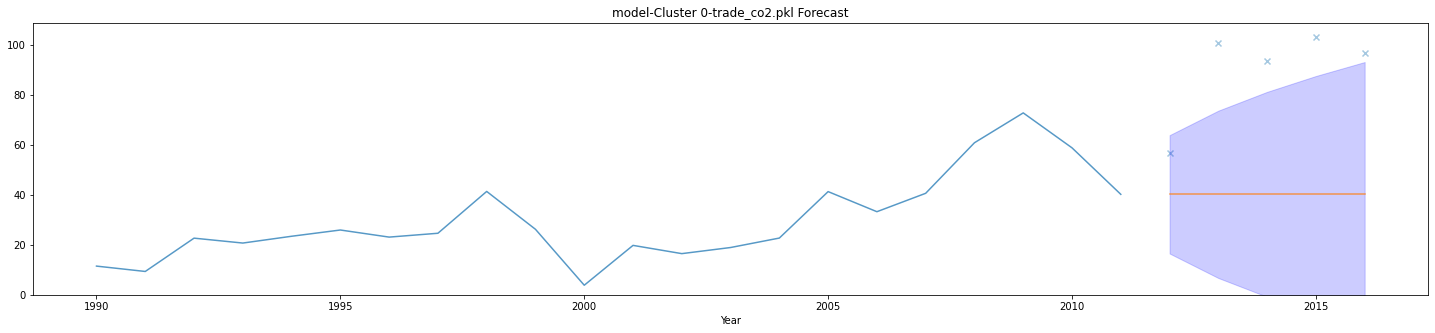

model-Cluster 0-trade_co2.pkl COMPLETED
FEATURE  co2_per_capita REGION  Cluster 0
START  1750
ALT START  1950
Test RMSE: 14.841


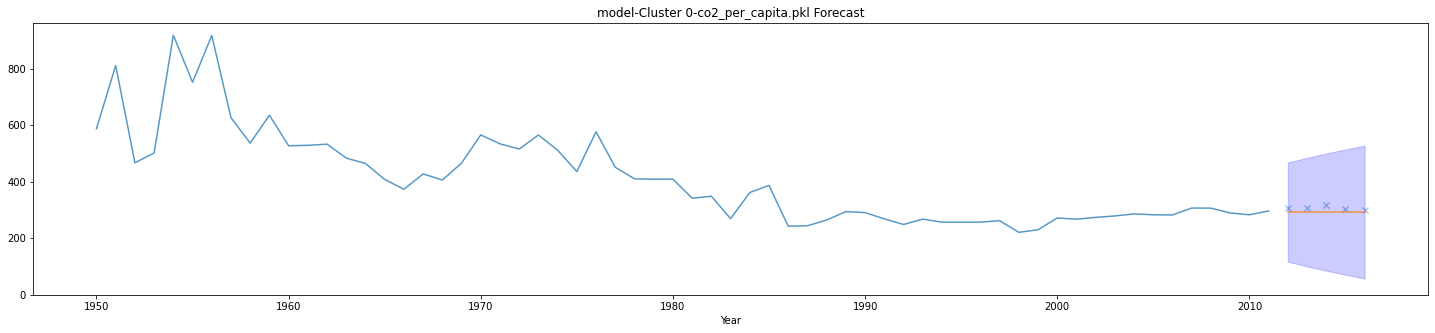

model-Cluster 0-co2_per_capita.pkl COMPLETED
FEATURE  consumption_co2_per_capita REGION  Cluster 0
START  1990
ALT START  1990
Test RMSE: 16.307


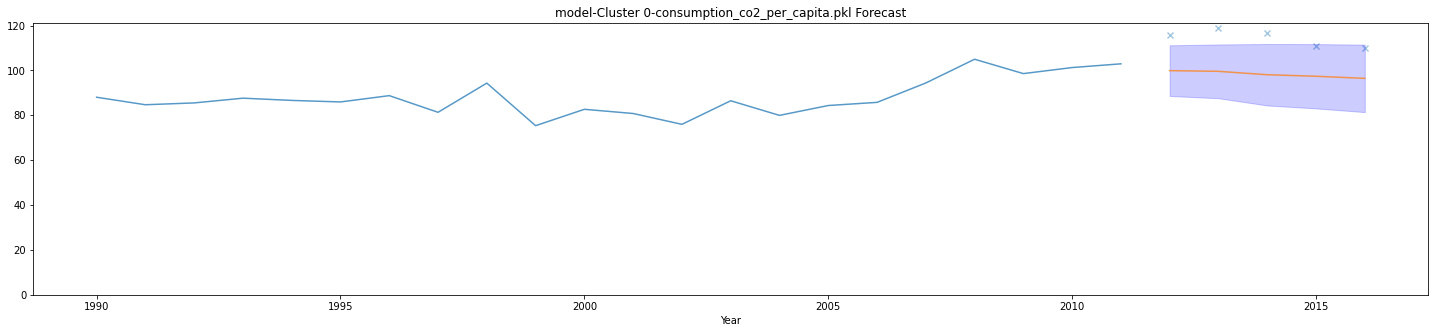

model-Cluster 0-consumption_co2_per_capita.pkl COMPLETED
FEATURE  share_global_co2 REGION  Cluster 0
START  1750
ALT START  1750
Test RMSE: 0.053


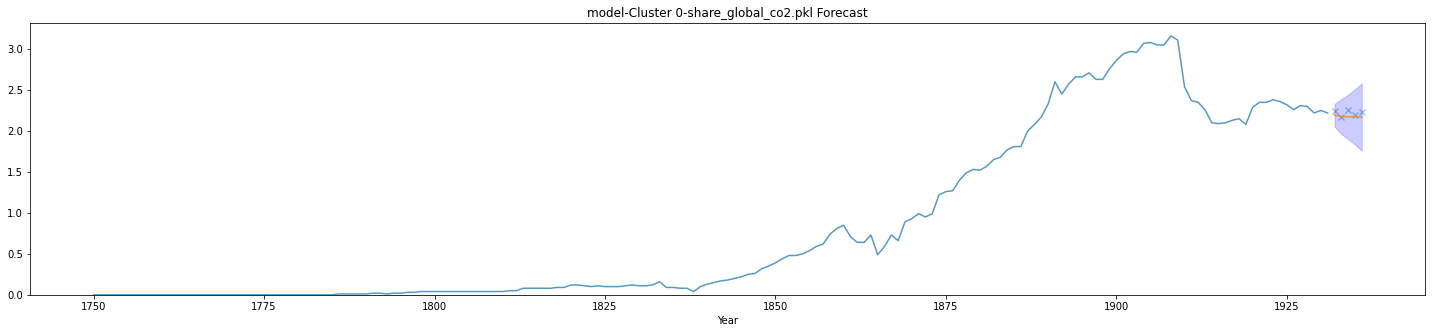

model-Cluster 0-share_global_co2.pkl COMPLETED
FEATURE  cumulative_co2 REGION  Cluster 0
START  1750
ALT START  1750
Test RMSE: 17.643


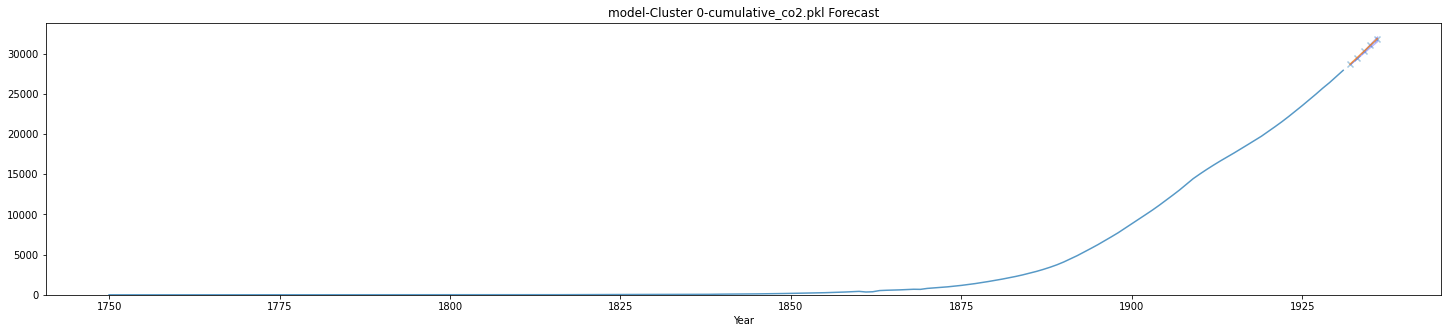

model-Cluster 0-cumulative_co2.pkl COMPLETED
FEATURE  share_global_cumulative_co2 REGION  Cluster 0
START  1750
ALT START  1750
Test RMSE: 0.053


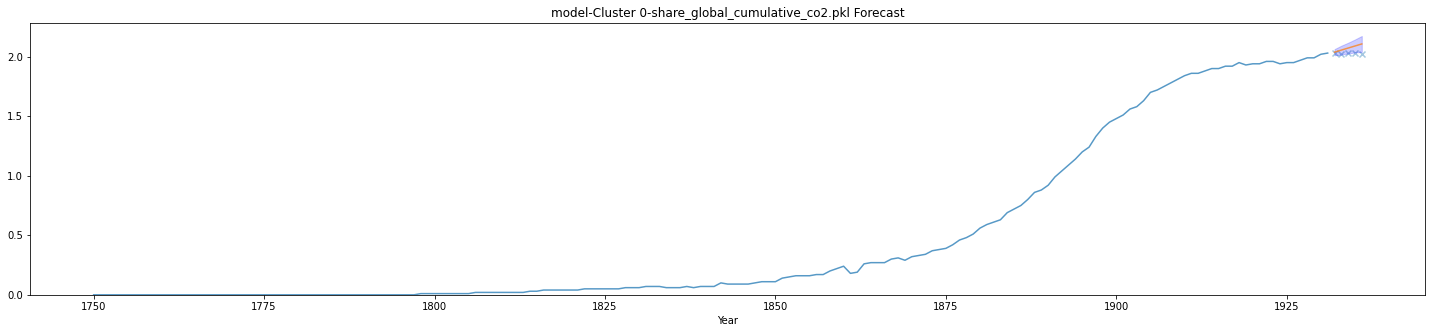

model-Cluster 0-share_global_cumulative_co2.pkl COMPLETED
FEATURE  co2_per_gdp REGION  Cluster 0
START  1820
ALT START  1950
Test RMSE: 0.852


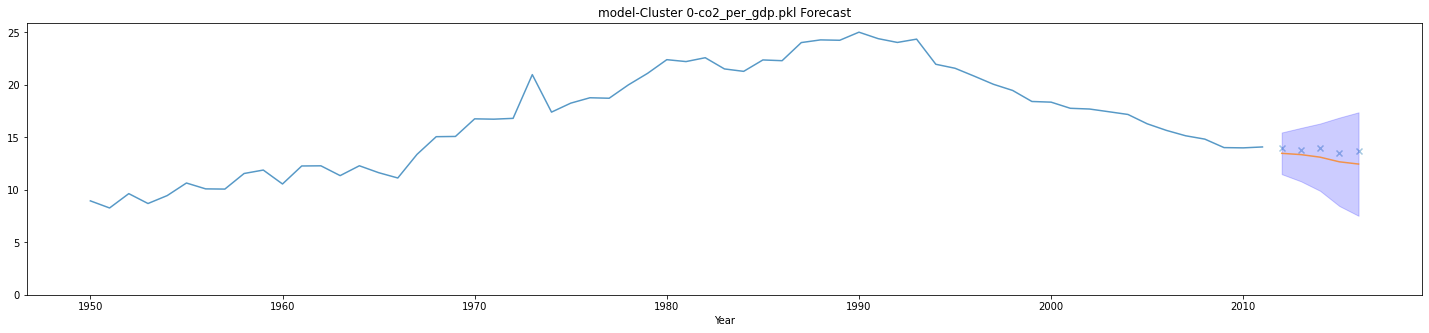

model-Cluster 0-co2_per_gdp.pkl COMPLETED
FEATURE  consumption_co2_per_gdp REGION  Cluster 0
START  1990
ALT START  1990
Test RMSE: 1.187


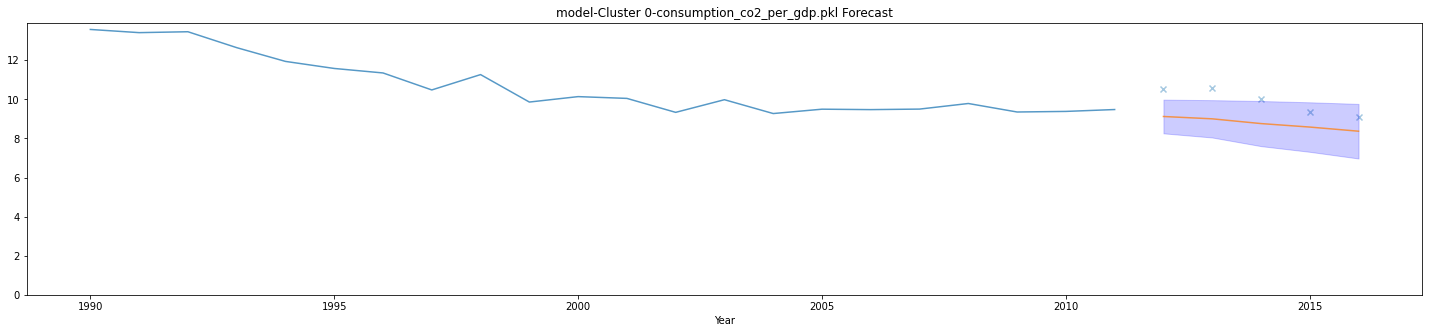

model-Cluster 0-consumption_co2_per_gdp.pkl COMPLETED
FEATURE  co2_per_unit_energy REGION  Cluster 0
START  1965
ALT START  1980
Test RMSE: 0.283


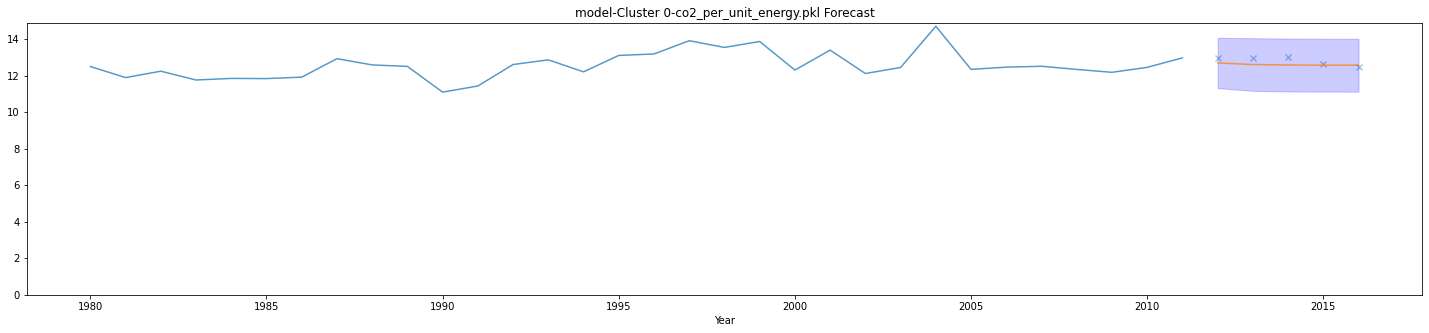

model-Cluster 0-co2_per_unit_energy.pkl COMPLETED
FEATURE  coal_co2 REGION  Cluster 0
START  1750
ALT START  1750
Test RMSE: 9.085


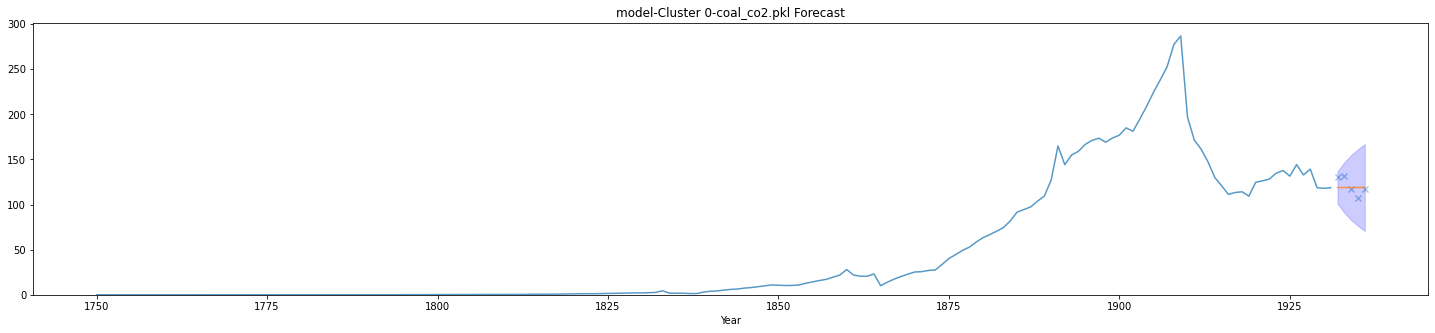

model-Cluster 0-coal_co2.pkl COMPLETED
FEATURE  coal_co2_per_capita REGION  Cluster 0
START  1750
ALT START  1750
Test RMSE: 4.702


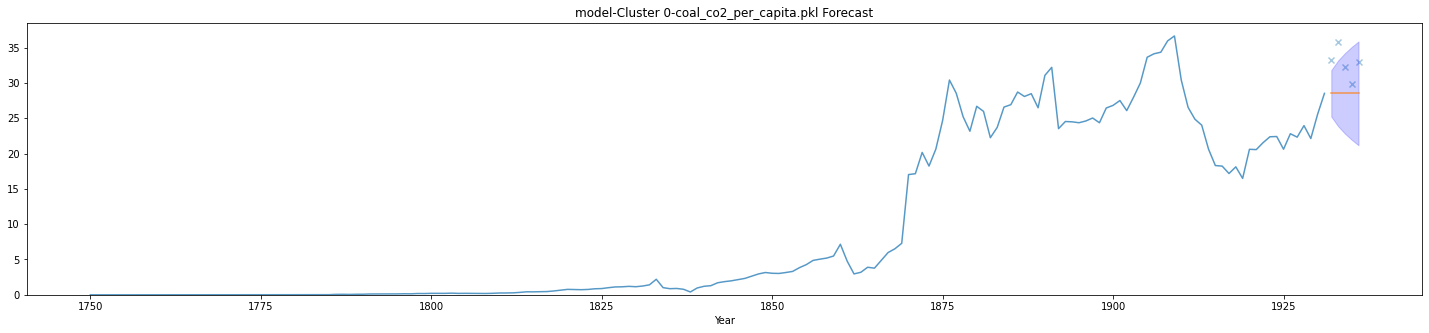

model-Cluster 0-coal_co2_per_capita.pkl COMPLETED
FEATURE  share_global_coal_co2 REGION  Cluster 0
START  1750
ALT START  1750
Test RMSE: 0.092


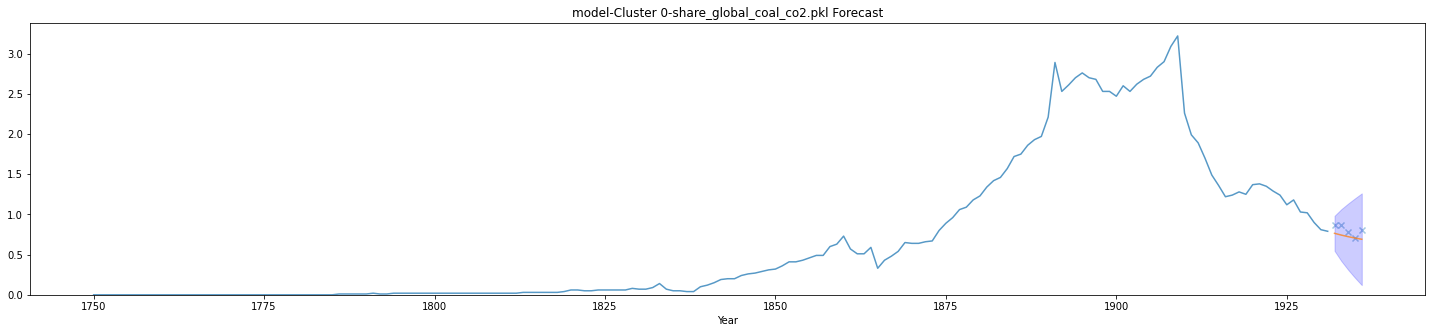

model-Cluster 0-share_global_coal_co2.pkl COMPLETED
FEATURE  cumulative_coal_co2 REGION  Cluster 0
START  1750
ALT START  1750
Test RMSE: 47.677


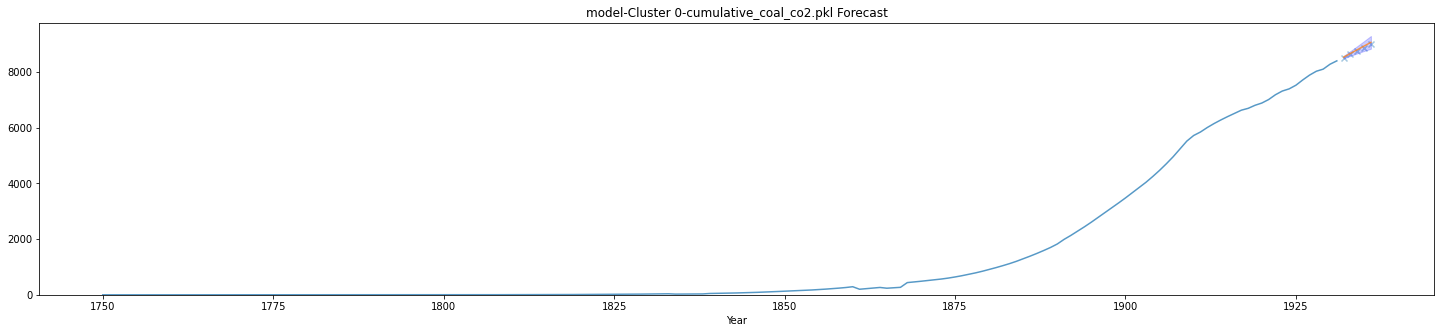

model-Cluster 0-cumulative_coal_co2.pkl COMPLETED
FEATURE  share_global_cumulative_coal_co2 REGION  Cluster 0
START  1750
ALT START  1750
Test RMSE: 0.018


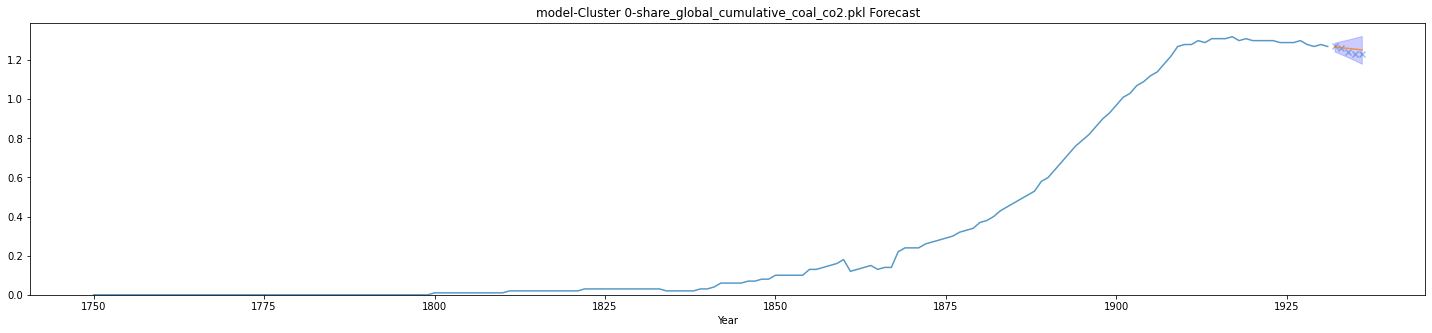

model-Cluster 0-share_global_cumulative_coal_co2.pkl COMPLETED
FEATURE  gas_co2 REGION  Cluster 0
START  1882
ALT START  1882
Test RMSE: 3.480


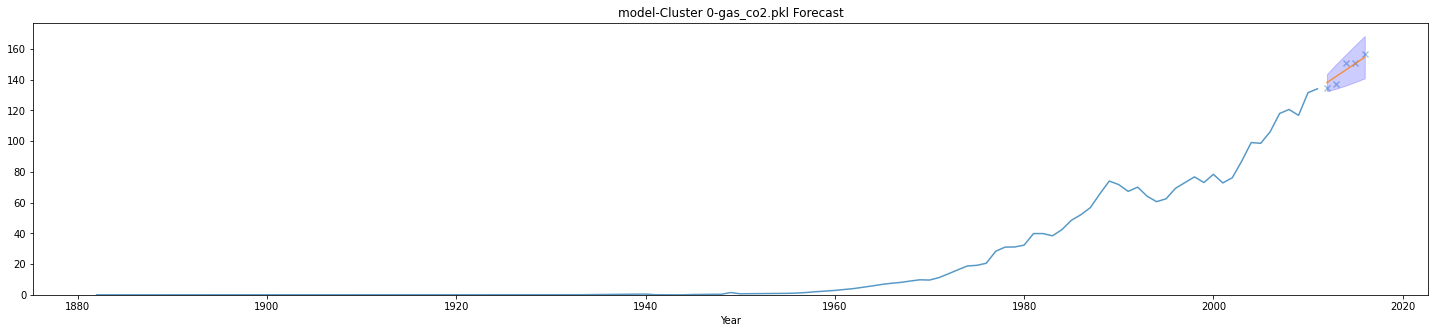

model-Cluster 0-gas_co2.pkl COMPLETED
FEATURE  oil_co2 REGION  Cluster 0
START  1855
ALT START  1855
Test RMSE: 53.240


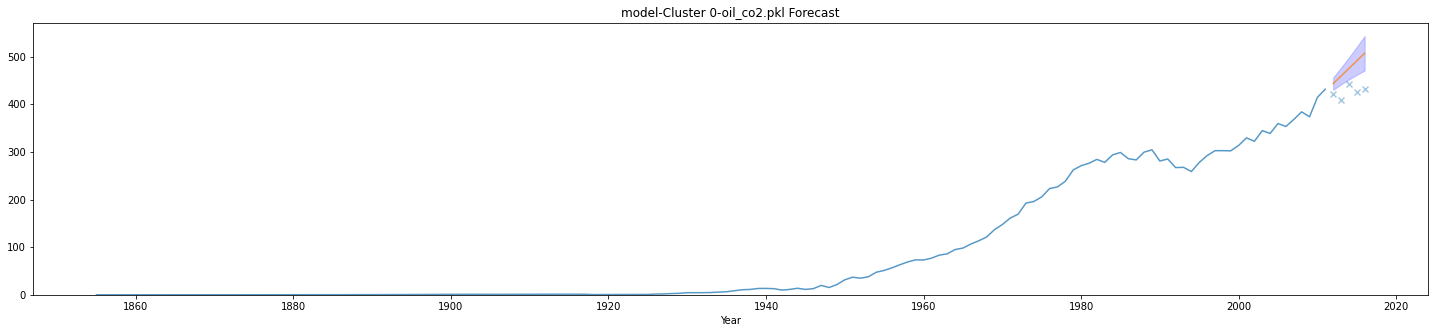

model-Cluster 0-oil_co2.pkl COMPLETED
FEATURE  gas_co2_per_capita REGION  Cluster 0
START  1882
ALT START  1882
Test RMSE: 1.705


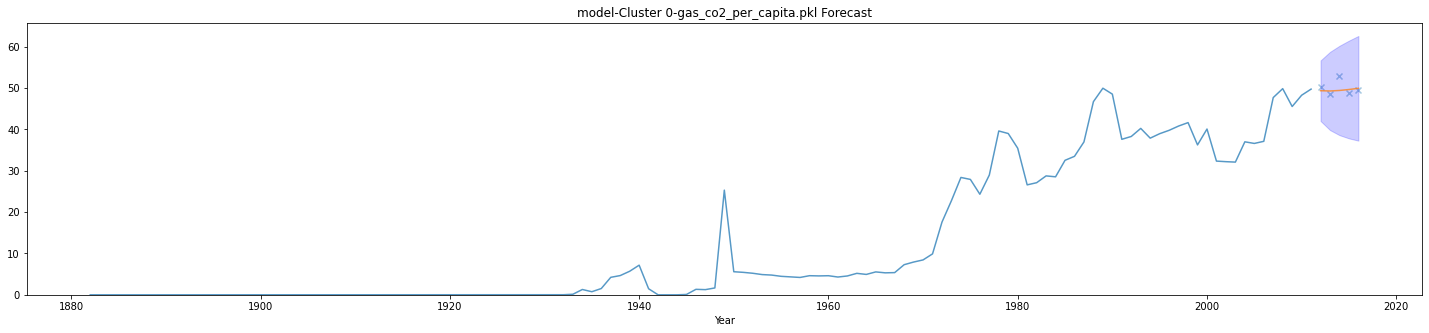

model-Cluster 0-gas_co2_per_capita.pkl COMPLETED
FEATURE  share_global_gas_co2 REGION  Cluster 0
START  1882
ALT START  1882
Test RMSE: 0.075


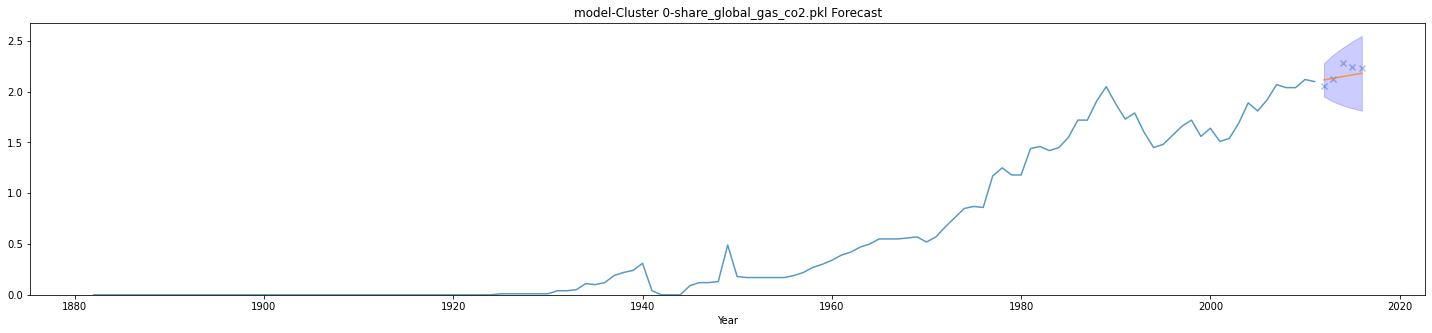

model-Cluster 0-share_global_gas_co2.pkl COMPLETED
FEATURE  cumulative_gas_co2 REGION  Cluster 0
START  1882
ALT START  1882
Test RMSE: 3.710


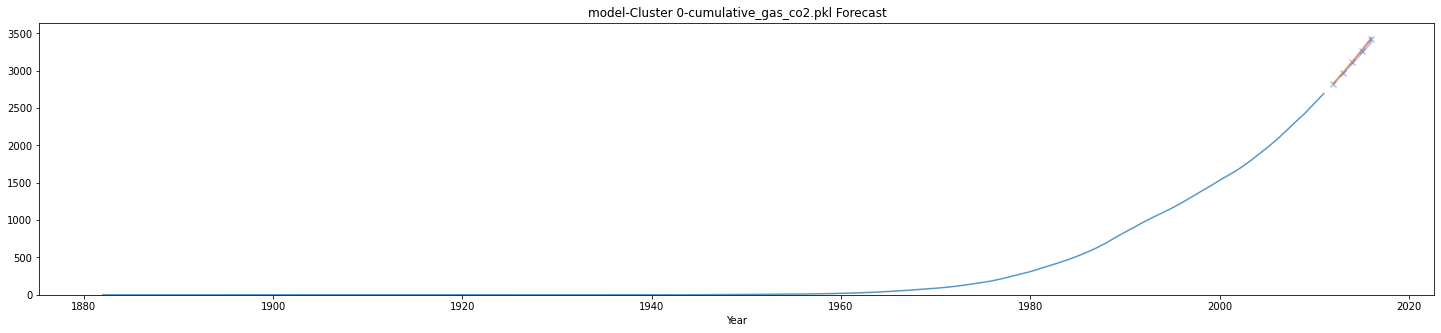

model-Cluster 0-cumulative_gas_co2.pkl COMPLETED
FEATURE  share_global_cumulative_gas_co2 REGION  Cluster 0
START  1882
ALT START  1882
Test RMSE: 0.020


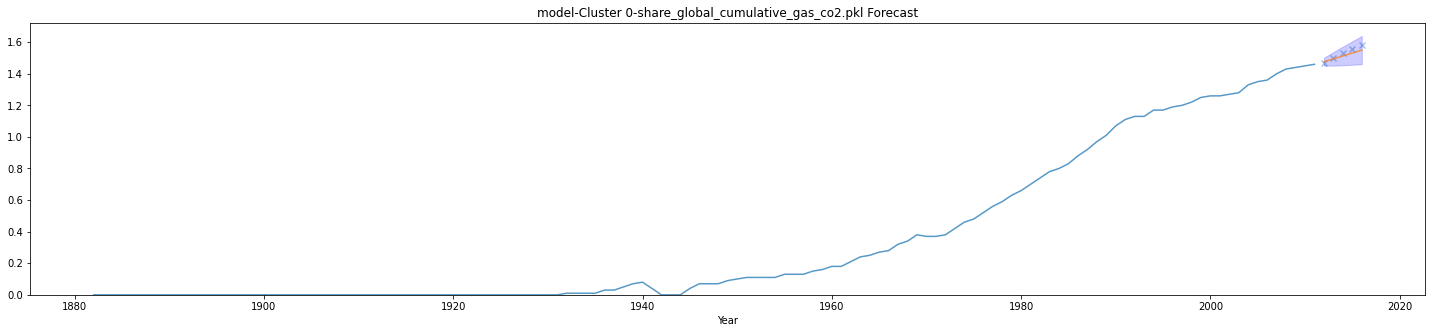

model-Cluster 0-share_global_cumulative_gas_co2.pkl COMPLETED
FEATURE  oil_co2_per_capita REGION  Cluster 0
START  1855
ALT START  1950
Test RMSE: 40.834


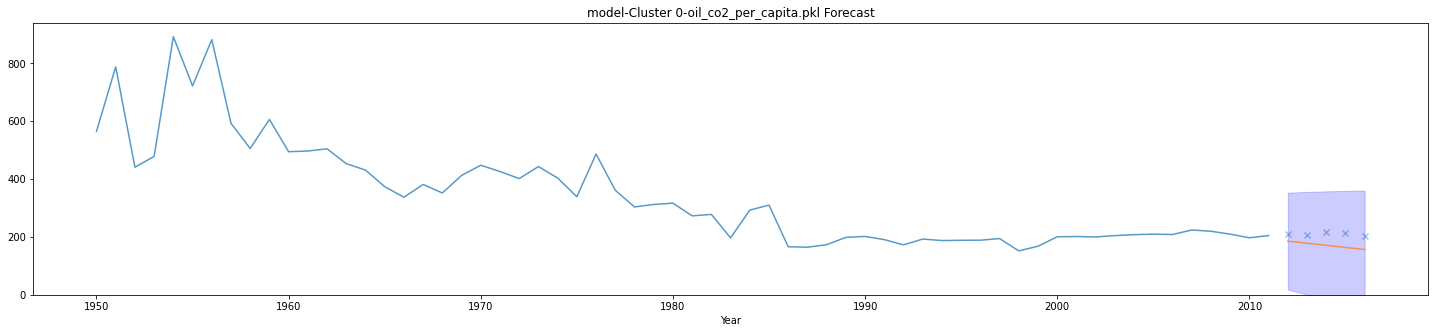

model-Cluster 0-oil_co2_per_capita.pkl COMPLETED
FEATURE  cumulative_oil_co2 REGION  Cluster 0
START  1855
ALT START  1855
Test RMSE: 87.180


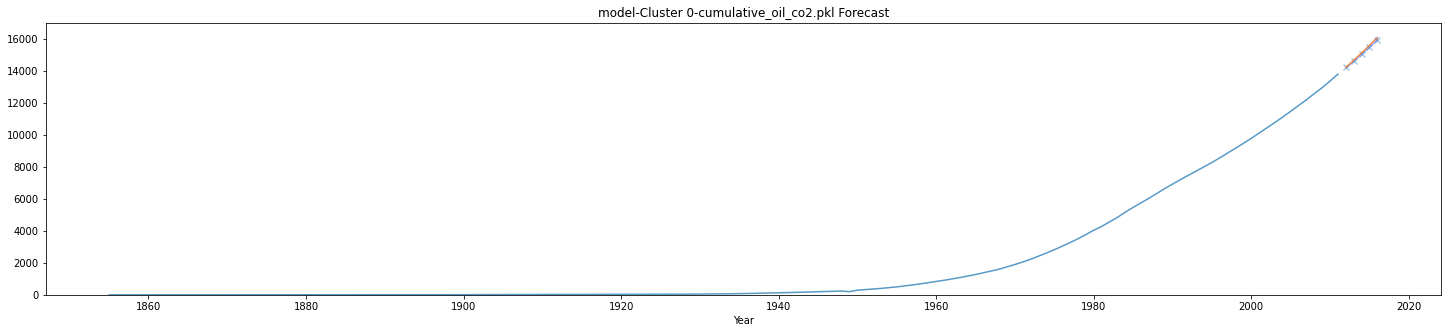

model-Cluster 0-cumulative_oil_co2.pkl COMPLETED
FEATURE  share_global_cumulative_oil_co2 REGION  Cluster 0
START  1855
ALT START  1855
Test RMSE: 0.014


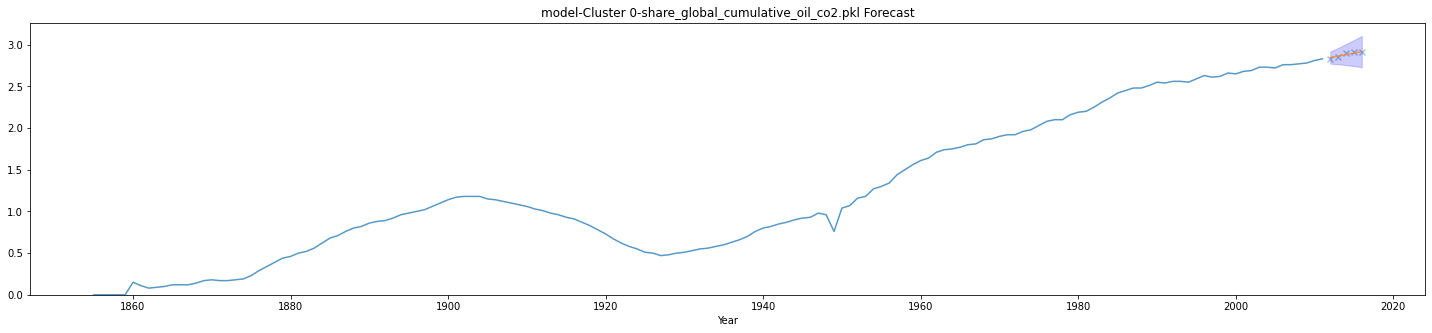

model-Cluster 0-share_global_cumulative_oil_co2.pkl COMPLETED
FEATURE  other_co2_per_capita REGION  Cluster 0
START  1904
ALT START  1990
Test RMSE: 0.006


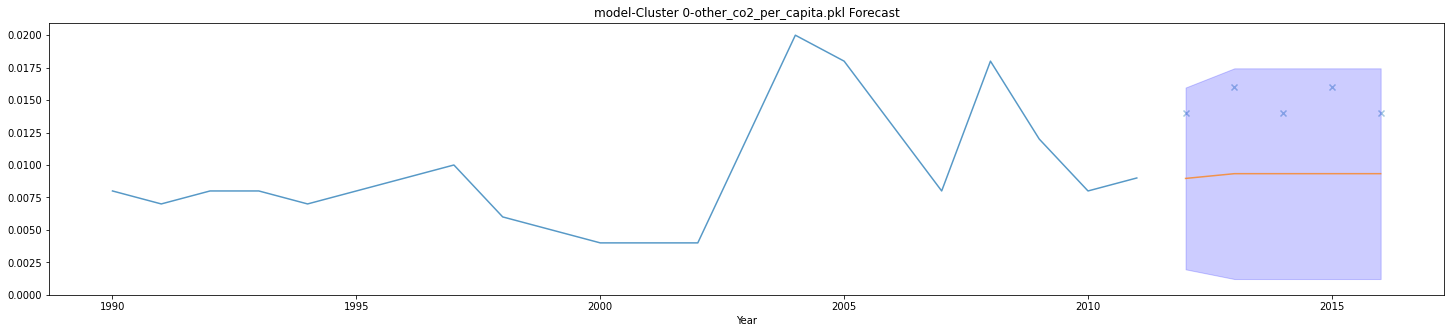

model-Cluster 0-other_co2_per_capita.pkl COMPLETED
FEATURE  trade_co2_share REGION  Cluster 0
START  1990
ALT START  1990
Test RMSE: 367.365


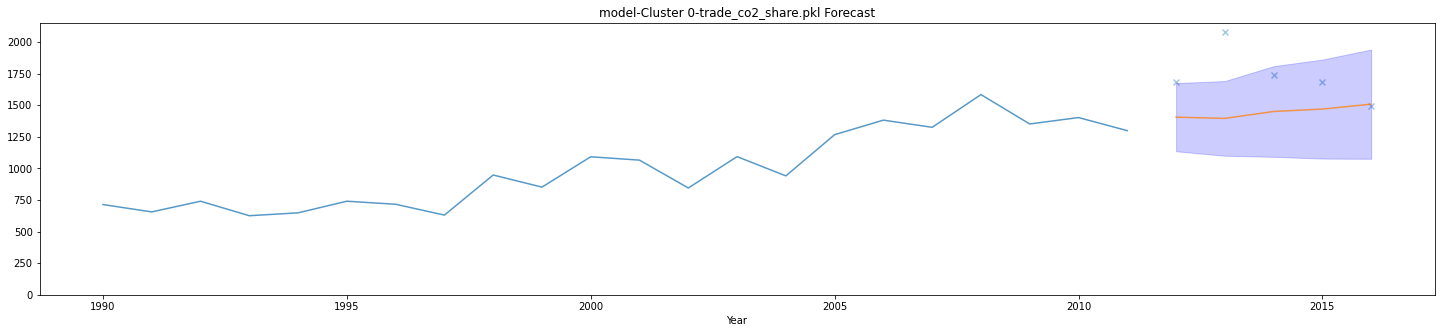

model-Cluster 0-trade_co2_share.pkl COMPLETED
FEATURE  share_global_oil_co2 REGION  Cluster 0
START  1855
ALT START  1855
Test RMSE: 0.282


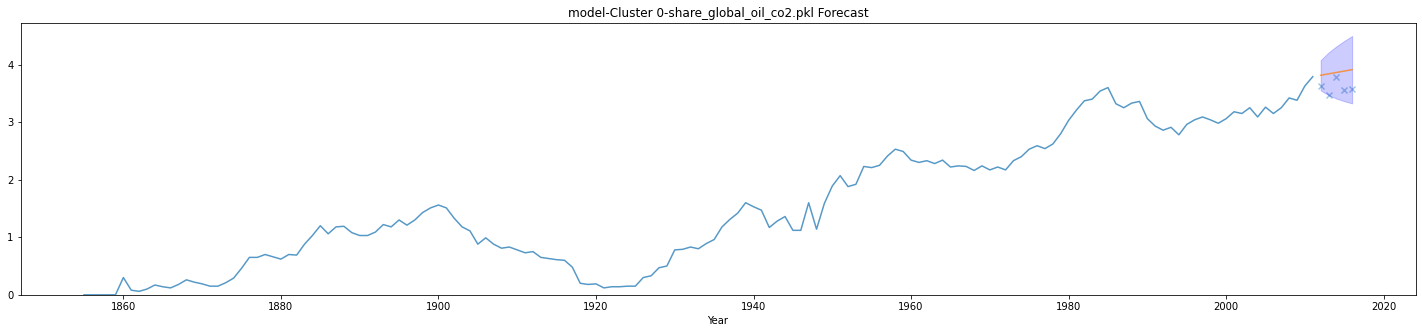

model-Cluster 0-share_global_oil_co2.pkl COMPLETED
FEATURE  cumulative_other_co2 REGION  Cluster 0
START  1904
ALT START  1904
Test RMSE: 0.007


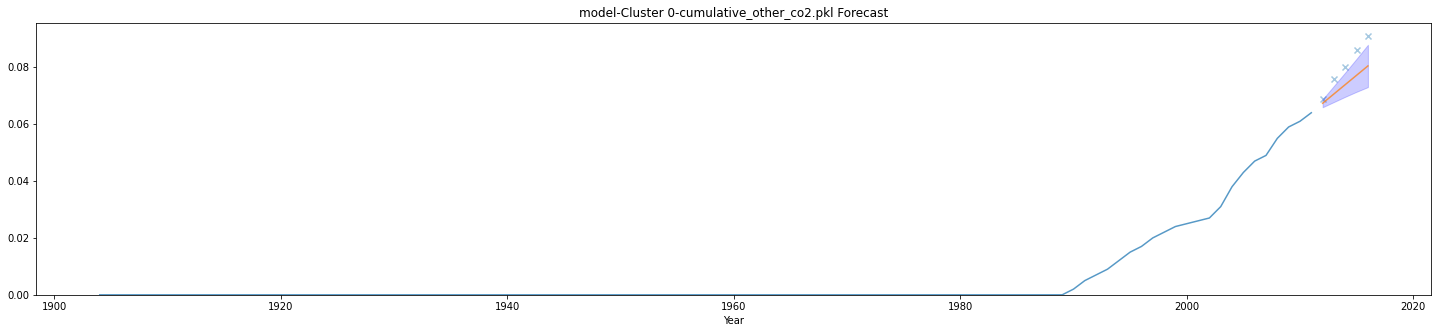

model-Cluster 0-cumulative_other_co2.pkl COMPLETED
FEATURE  share_global_other_co2 REGION  Cluster 0
START  1904
ALT START  1904
Test RMSE: 0.000


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pmdarima/arima/auto.py:460: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '


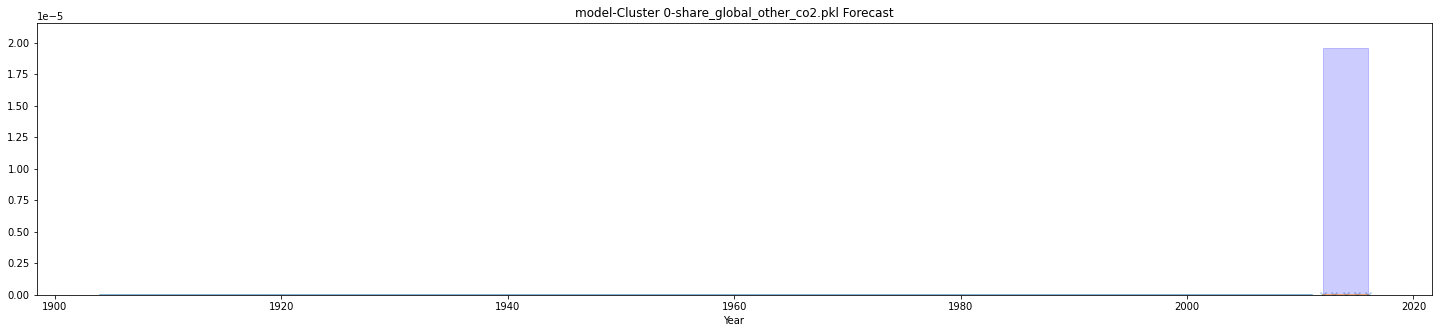

model-Cluster 0-share_global_other_co2.pkl COMPLETED
FEATURE  share_global_cumulative_other_co2 REGION  Cluster 0
START  1904
ALT START  1904
Test RMSE: 0.000


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pmdarima/arima/auto.py:460: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '


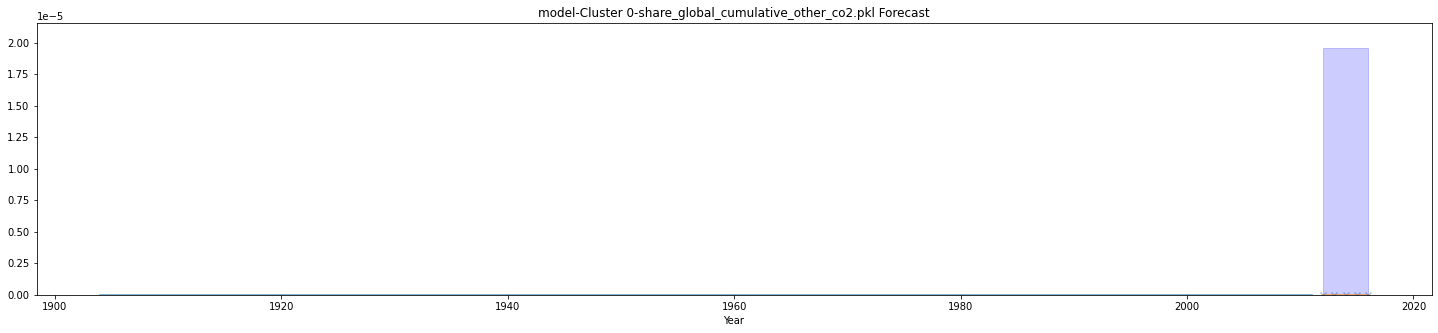

model-Cluster 0-share_global_cumulative_other_co2.pkl COMPLETED
FEATURE  population REGION  Cluster 0
START  1750
ALT START  1750
Test RMSE: 6071451.057


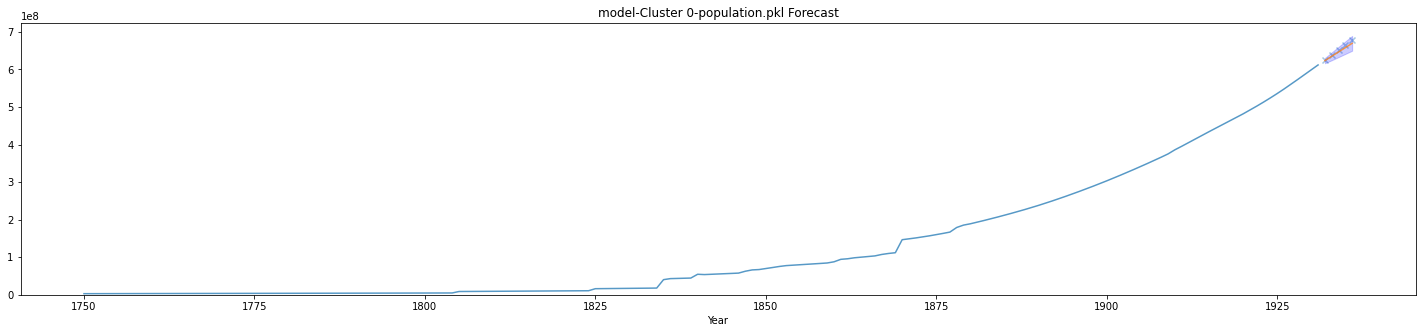

model-Cluster 0-population.pkl COMPLETED
FEATURE  gdp REGION  Cluster 0
START  1820
ALT START  1820
Test RMSE: 109108521274.209


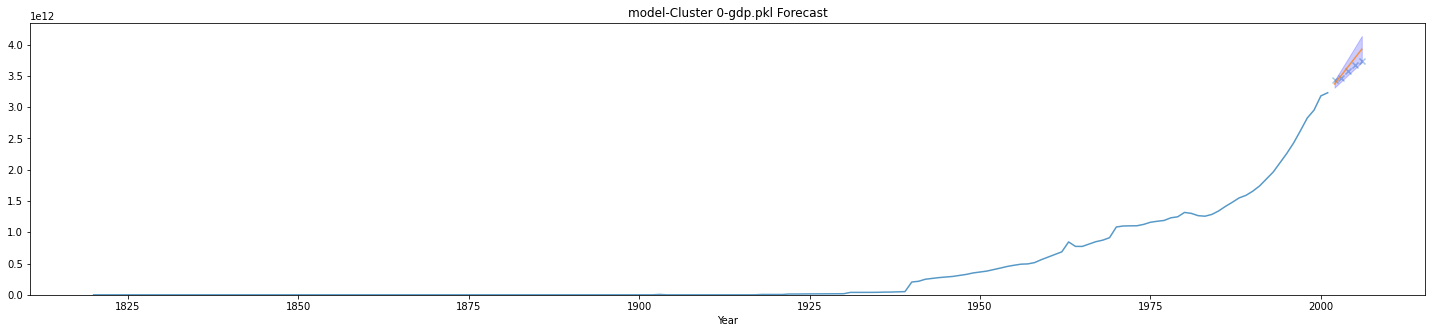

model-Cluster 0-gdp.pkl COMPLETED
FEATURE  primary_energy_consumption REGION  Cluster 0
START  1965
ALT START  1980
Test RMSE: 63.050


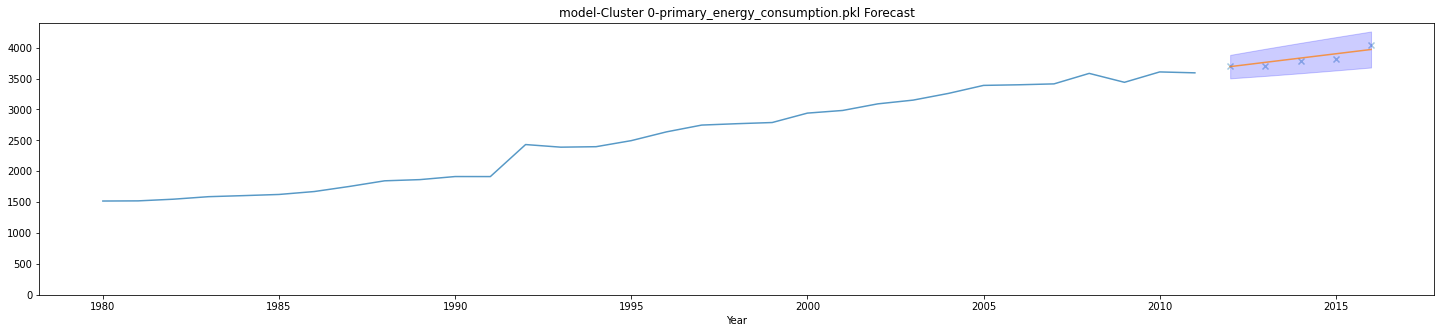

model-Cluster 0-primary_energy_consumption.pkl COMPLETED
FEATURE  energy_per_capita REGION  Cluster 0
START  1965
ALT START  1980
Test RMSE: 62728.960


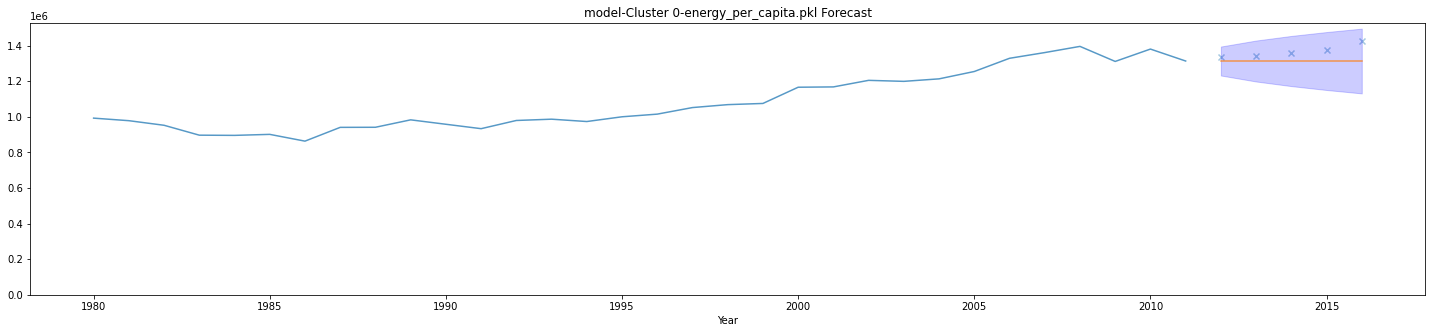

model-Cluster 0-energy_per_capita.pkl COMPLETED
FEATURE  energy_per_gdp REGION  Cluster 0
START  1965
ALT START  1980
Test RMSE: 13.462


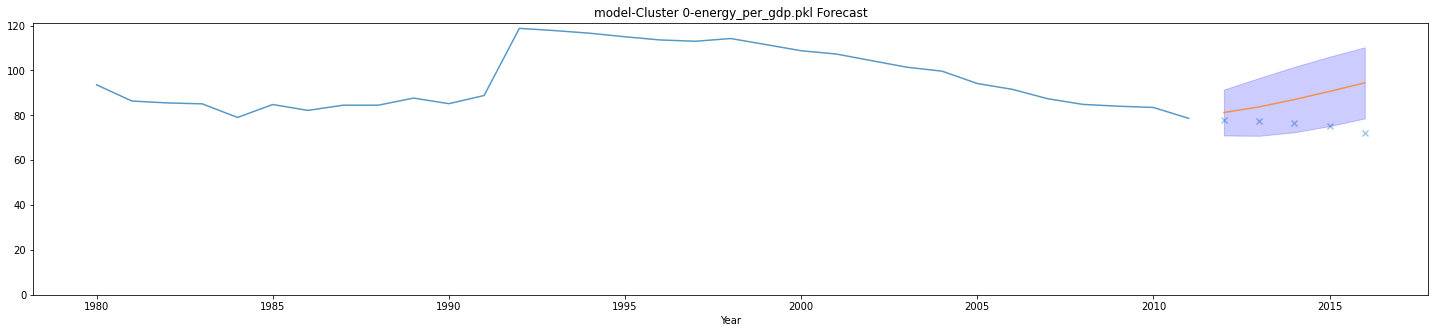

model-Cluster 0-energy_per_gdp.pkl COMPLETED
FEATURE  current_gdp REGION  Cluster 0
START  1960
ALT START  1960
Test RMSE: 320026516884.045


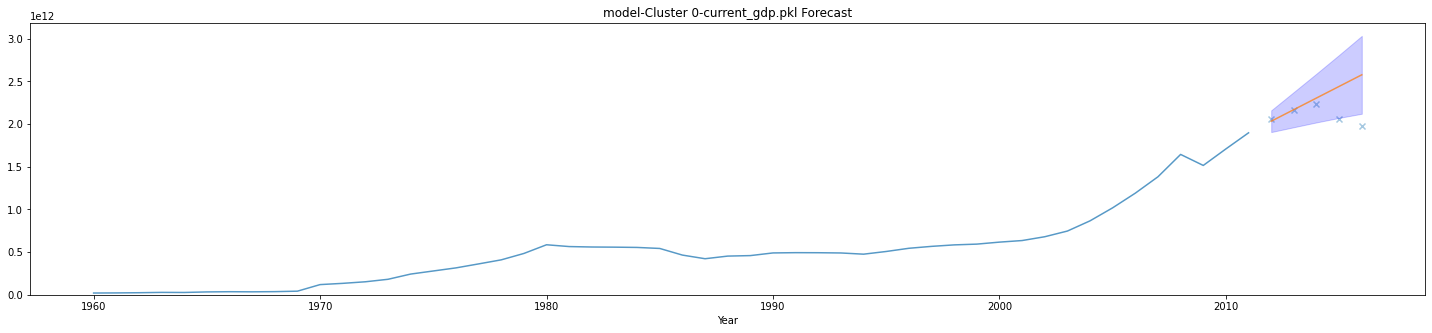

model-Cluster 0-current_gdp.pkl COMPLETED
FEATURE  constant_gdp REGION  Cluster 0
START  1960
ALT START  1960
Test RMSE: 110165805586.804


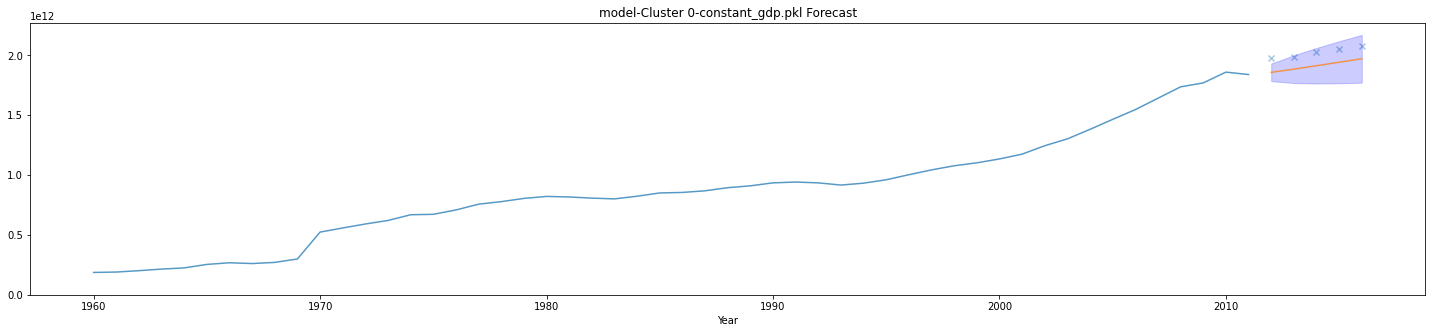

model-Cluster 0-constant_gdp.pkl COMPLETED
FEATURE  manufacturing_gdp REGION  Cluster 0
START  1960
ALT START  1960
Test RMSE: 12101814676.877


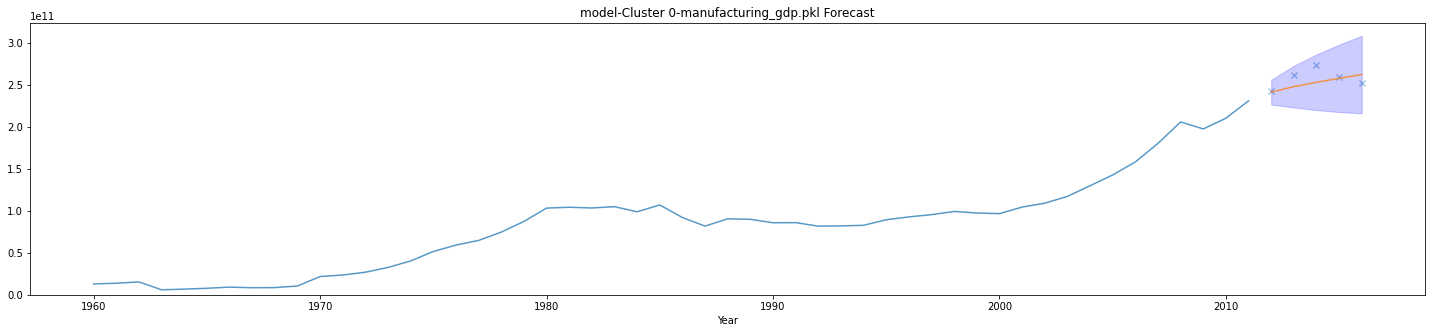

model-Cluster 0-manufacturing_gdp.pkl COMPLETED
FEATURE  medium_to_high_tech_percent REGION  Cluster 0
START  1990
ALT START  1990
Test RMSE: 30.902


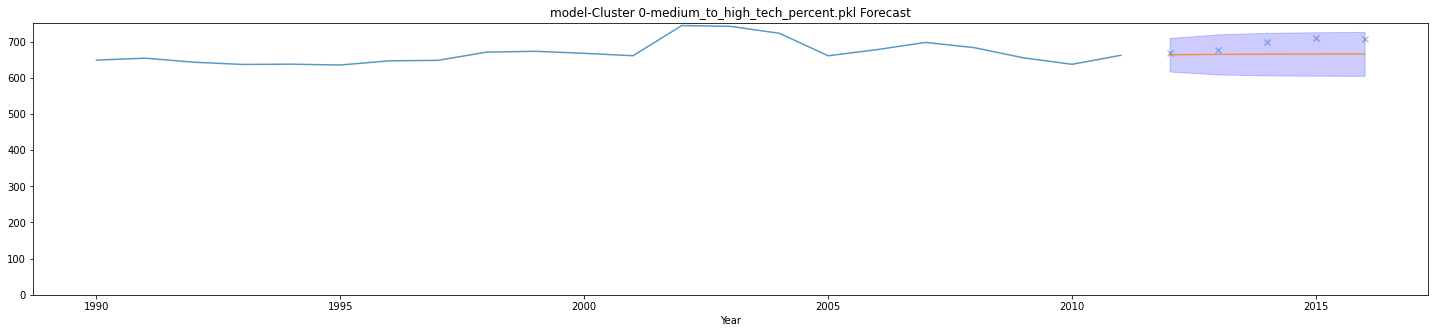

model-Cluster 0-medium_to_high_tech_percent.pkl COMPLETED
FEATURE  export REGION  Cluster 0
START  1960
ALT START  1960
Test RMSE: 220077671984.707


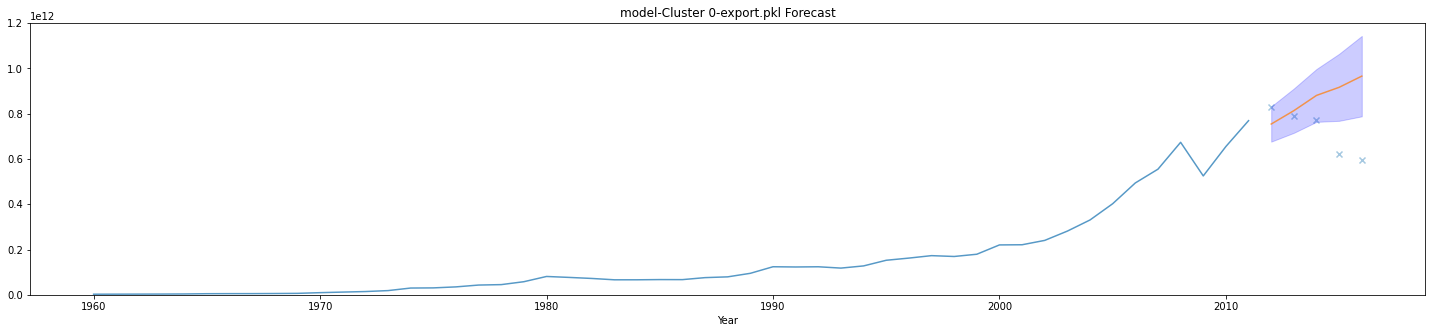

model-Cluster 0-export.pkl COMPLETED
FEATURE  import REGION  Cluster 0
START  1960
ALT START  1960
Test RMSE: 104720063738.771


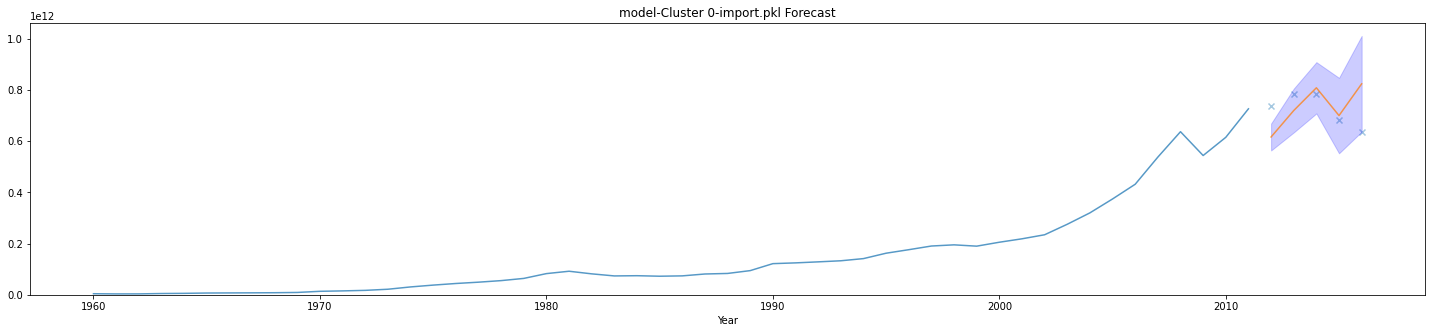

model-Cluster 0-import.pkl COMPLETED
FEATURE  real_gdp_growth_percent REGION  Cluster 0
START  1961
ALT START  1961
Test RMSE: 68.212


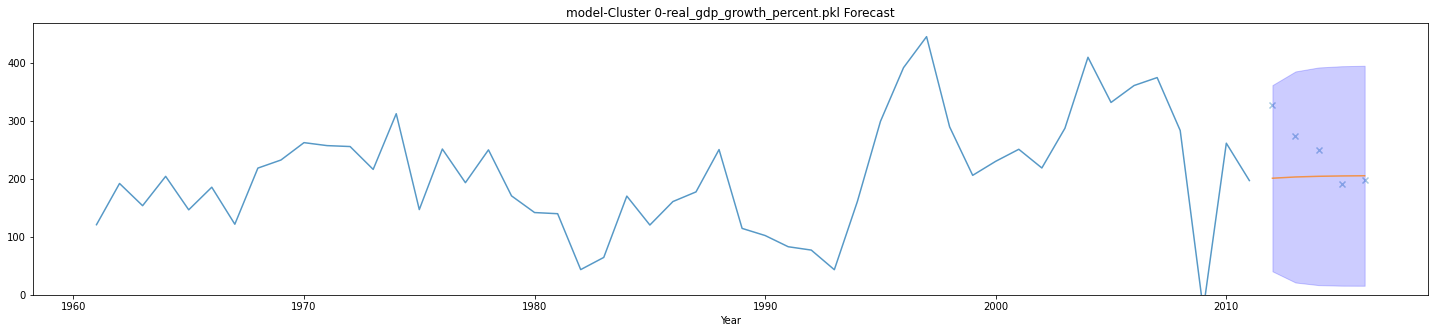

model-Cluster 0-real_gdp_growth_percent.pkl COMPLETED
FEATURE  urban_population_percent REGION  Cluster 0
START  1960
ALT START  1960
Test RMSE: 1.938


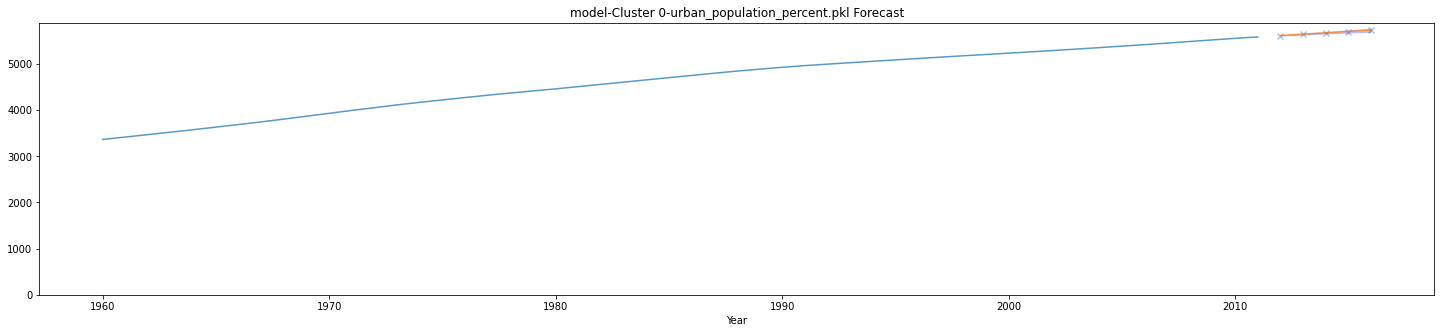

model-Cluster 0-urban_population_percent.pkl COMPLETED
FEATURE  merchandise_export REGION  Cluster 0
START  1960
ALT START  1960
Test RMSE: 196003270235.641


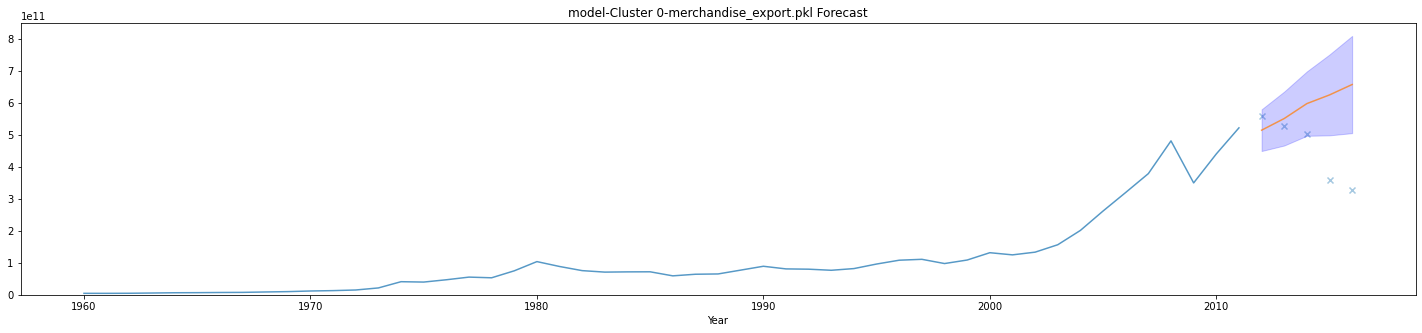

model-Cluster 0-merchandise_export.pkl COMPLETED
FEATURE  merchandise_import REGION  Cluster 0
START  1960
ALT START  1960
Test RMSE: 141302409650.461


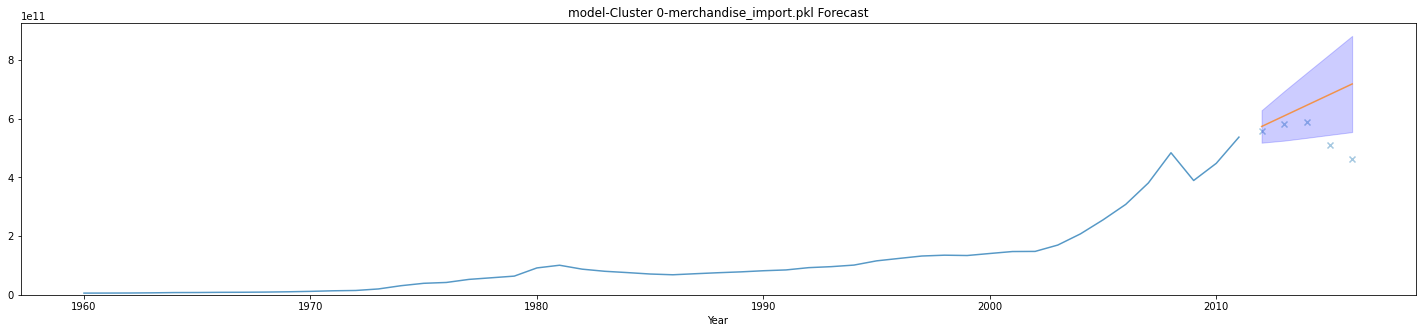

model-Cluster 0-merchandise_import.pkl COMPLETED
FEATURE  manufacturer_export_share REGION  Cluster 0
START  1962
ALT START  1989
Test RMSE: 312.610


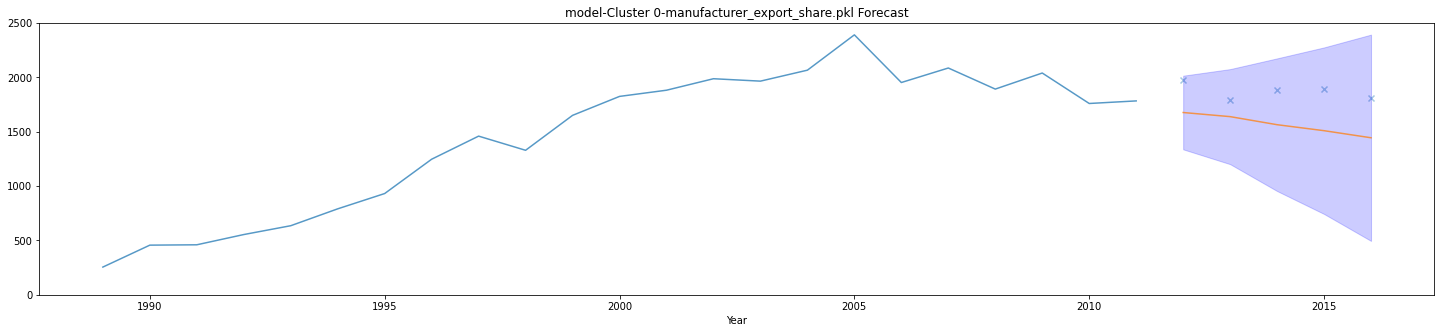

model-Cluster 0-manufacturer_export_share.pkl COMPLETED
FEATURE  manufacturer_export REGION  Cluster 0
START  1962
ALT START  1962
Test RMSE: 11341720480.361


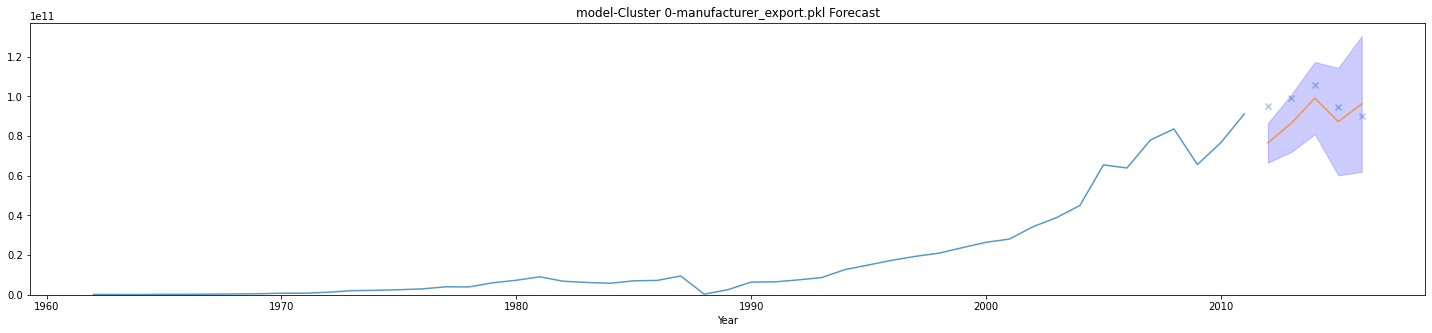

model-Cluster 0-manufacturer_export.pkl COMPLETED
FEATURE  co2_emission_electricity REGION  Cluster 0
START  1990
ALT START  1990
Test RMSE: 6926.215


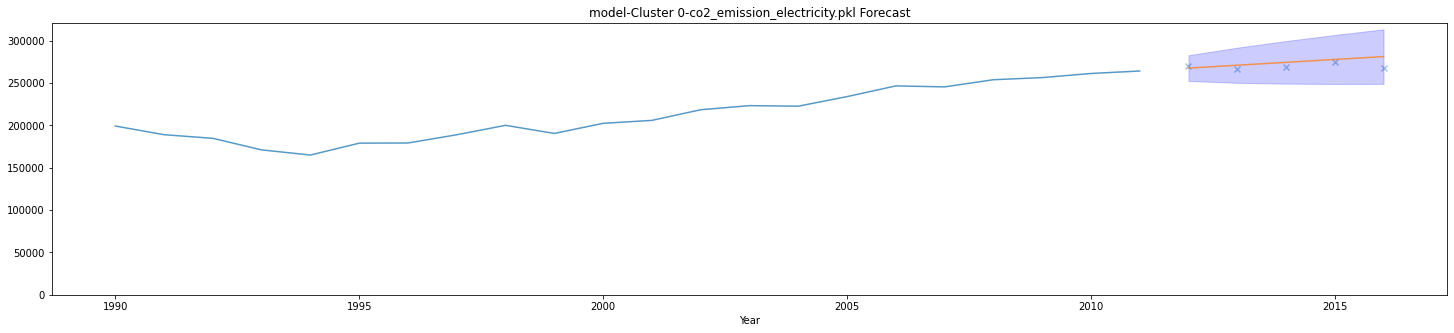

model-Cluster 0-co2_emission_electricity.pkl COMPLETED
FEATURE  co2_emission_other_fuel REGION  Cluster 0
START  1990
ALT START  1990
Test RMSE: 9135.744


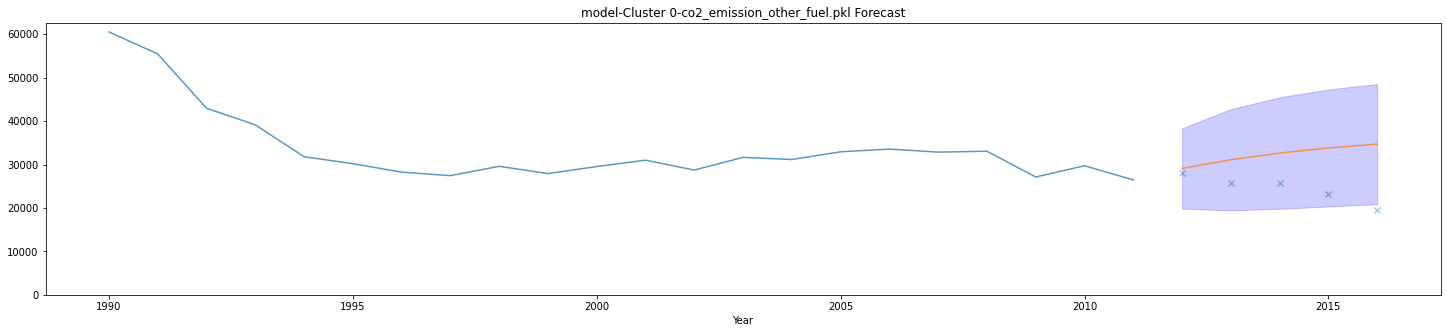

model-Cluster 0-co2_emission_other_fuel.pkl COMPLETED
FEATURE  co2_emission_transport REGION  Cluster 0
START  1990
ALT START  1990
Test RMSE: 21753.988


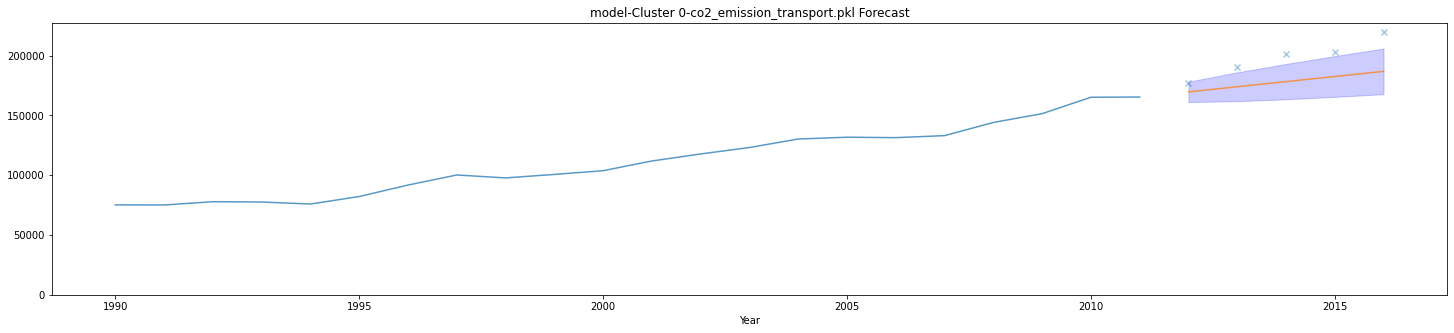

model-Cluster 0-co2_emission_transport.pkl COMPLETED
FEATURE  co2_emission_bunkers REGION  Cluster 0
START  1990
ALT START  1990
Test RMSE: 1591.951


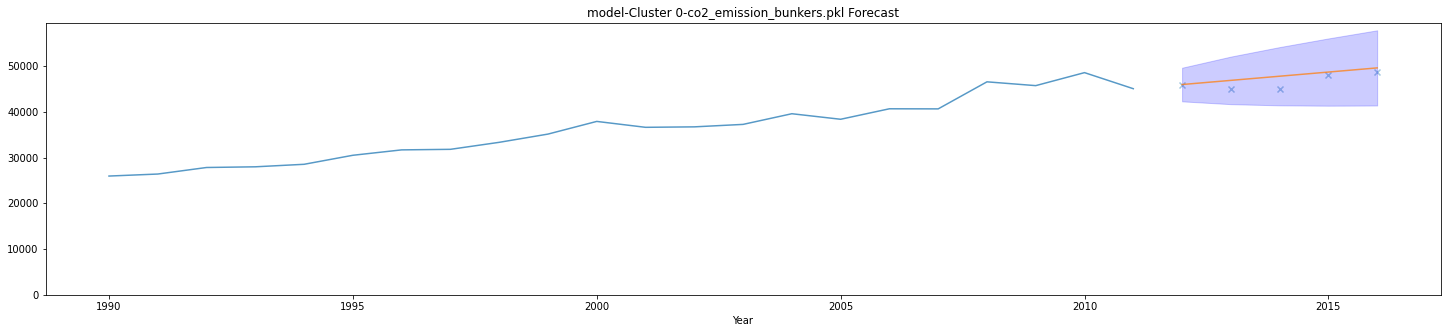

model-Cluster 0-co2_emission_bunkers.pkl COMPLETED
FEATURE  co2_emission_industrial_process REGION  Cluster 0
START  1990
ALT START  1990
Test RMSE: 3885.929


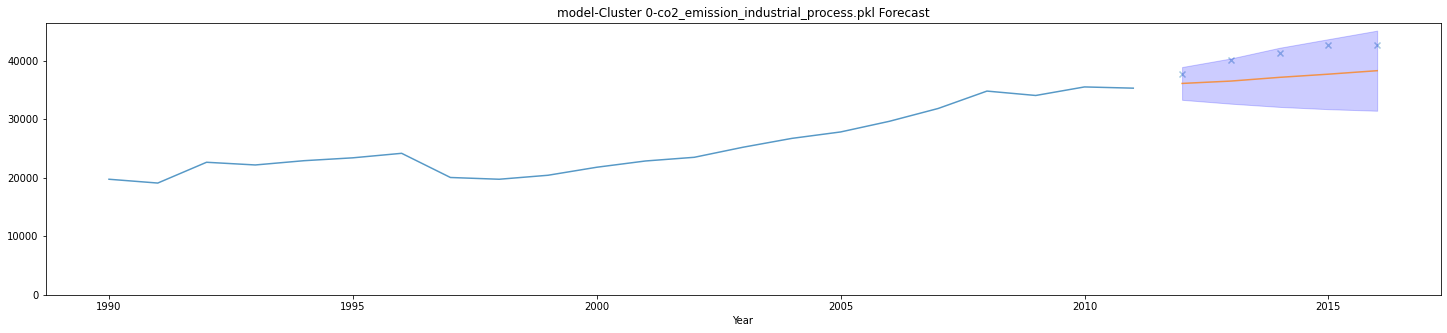

model-Cluster 0-co2_emission_industrial_process.pkl COMPLETED
FEATURE  co2_emission_per_capita REGION  Cluster 0
START  1960
ALT START  1960
Test RMSE: 14.291


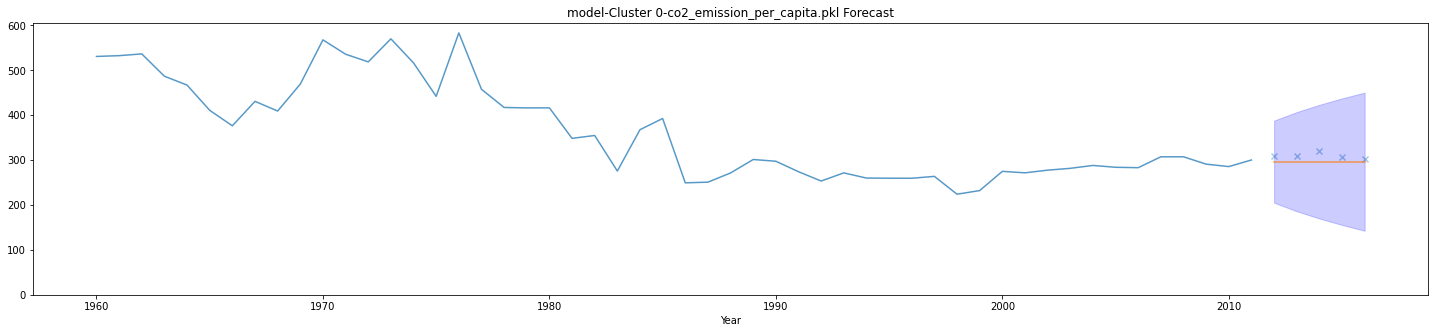

model-Cluster 0-co2_emission_per_capita.pkl COMPLETED
FEATURE  constant_gdp_per_capita REGION  Cluster 0
START  1960
ALT START  1970
Test RMSE: 31797.630


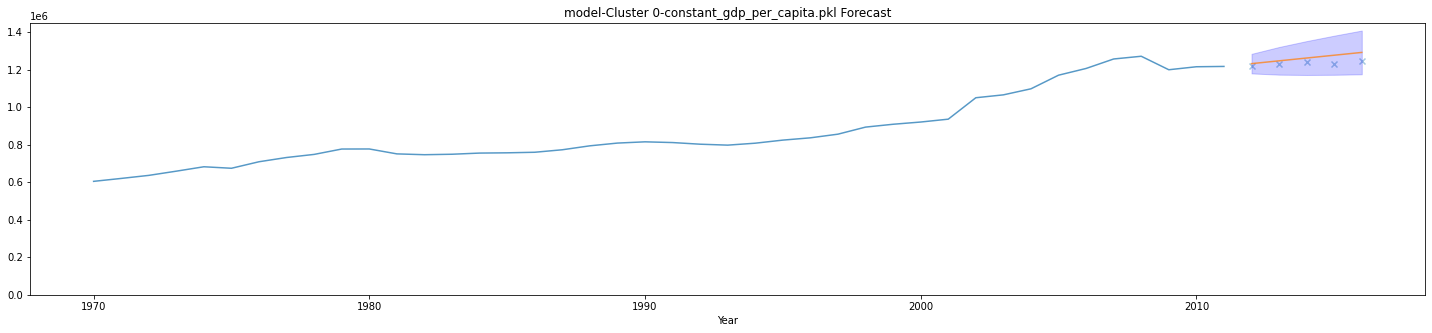

model-Cluster 0-constant_gdp_per_capita.pkl COMPLETED
FEATURE  manufacturing_percent REGION  Cluster 0
START  1960
ALT START  1960
Test RMSE: 7.665


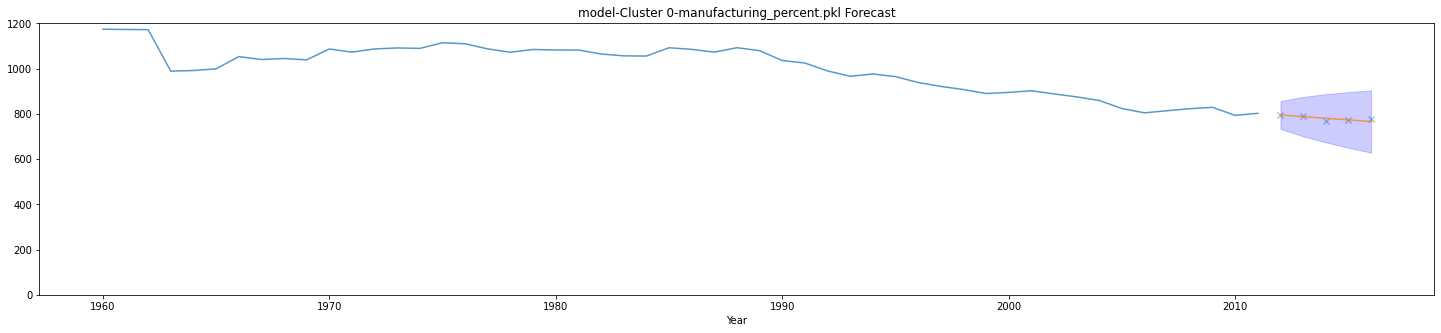

model-Cluster 0-manufacturing_percent.pkl COMPLETED
FEATURE  medium_to_high_tech_gdp REGION  Cluster 0
START  1990
ALT START  1990
Test RMSE: 4064245472.016


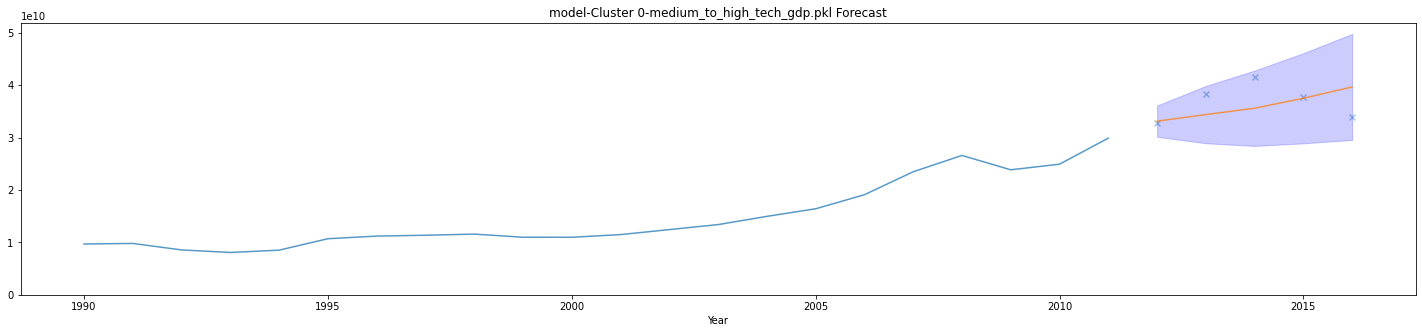

model-Cluster 0-medium_to_high_tech_gdp.pkl COMPLETED
FEATURE  co2_emission_per_constant_gdp REGION  Cluster 0
START  1960
ALT START  1970
Test RMSE: 1.937


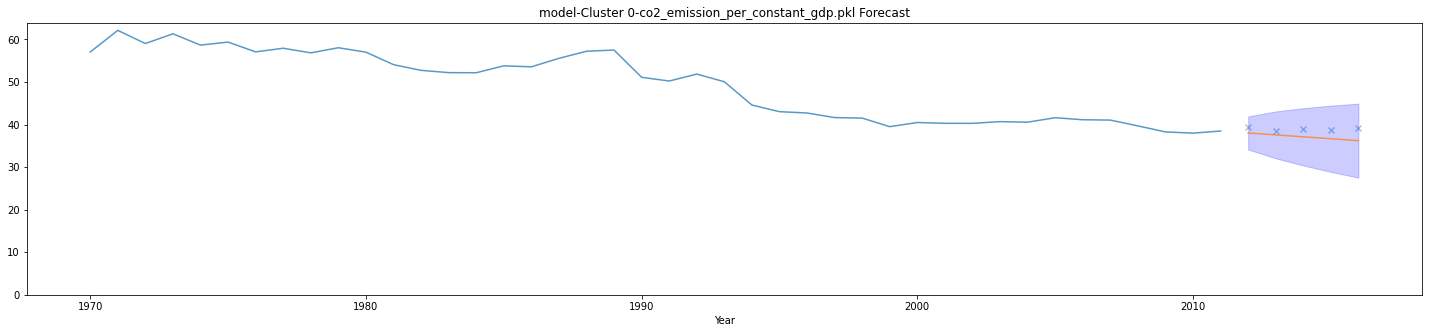

model-Cluster 0-co2_emission_per_constant_gdp.pkl COMPLETED
FEATURE  trade_openness REGION  Cluster 0
START  1960
ALT START  1960
Test RMSE: 937.875


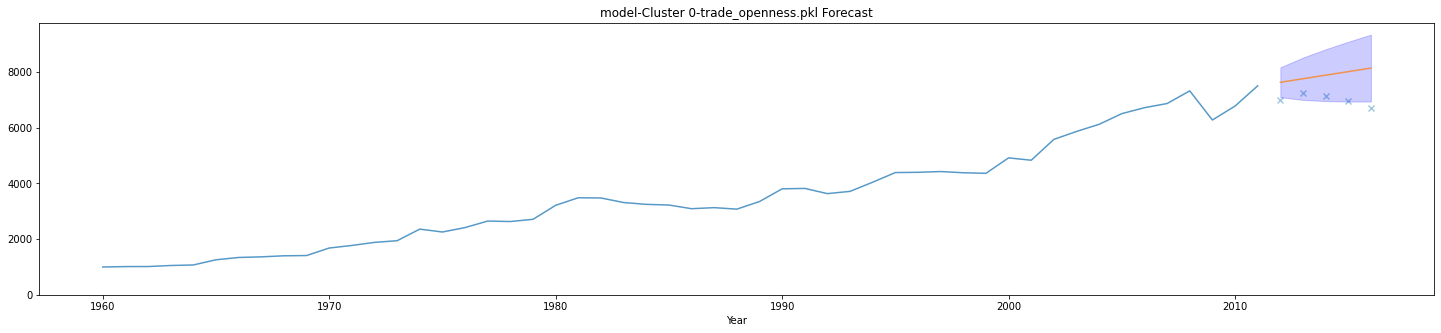

model-Cluster 0-trade_openness.pkl COMPLETED
FEATURE  share_of_merchandise_export REGION  Cluster 0
START  1960
ALT START  1960
Test RMSE: 317.955


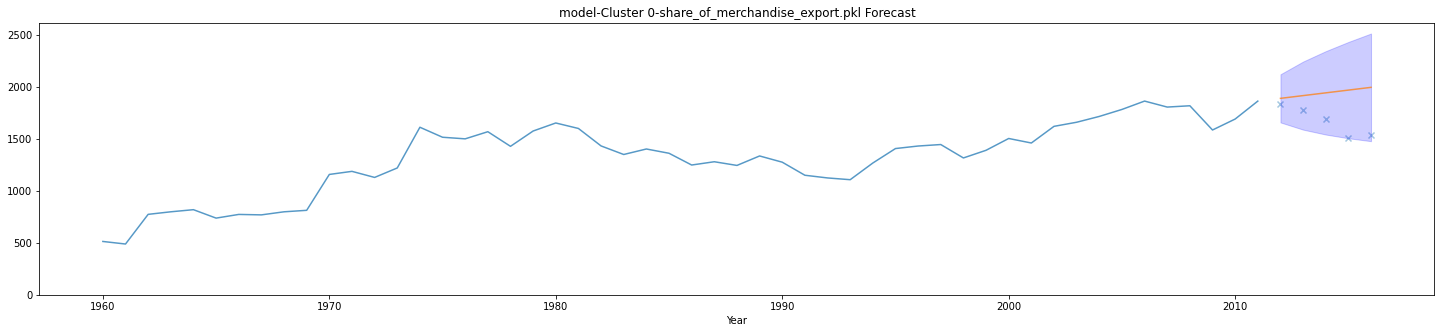

model-Cluster 0-share_of_merchandise_export.pkl COMPLETED
FEATURE  share_of_merchandise_import REGION  Cluster 0
START  1960
ALT START  1960
Test RMSE: 197.073


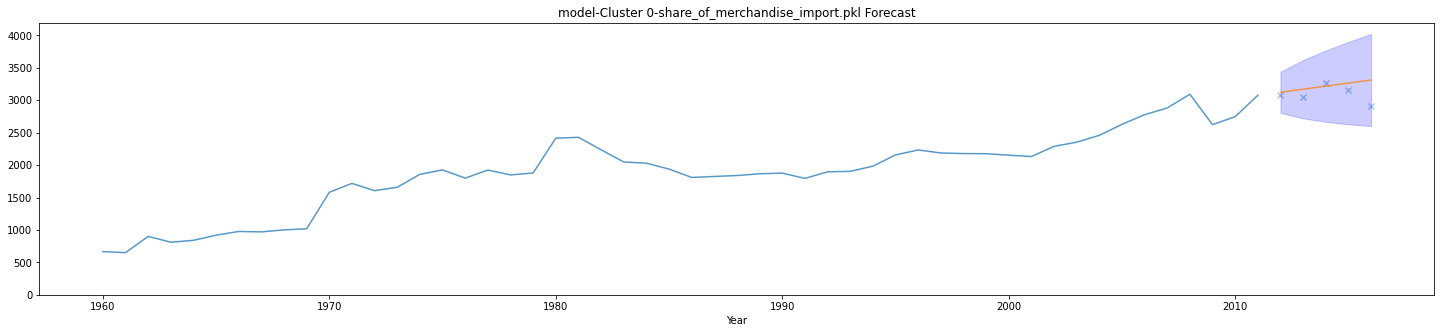

model-Cluster 0-share_of_merchandise_import.pkl COMPLETED
FEATURE  industrial_gdp REGION  Cluster 0
START  1960
ALT START  1960
Test RMSE: 153693638355.849


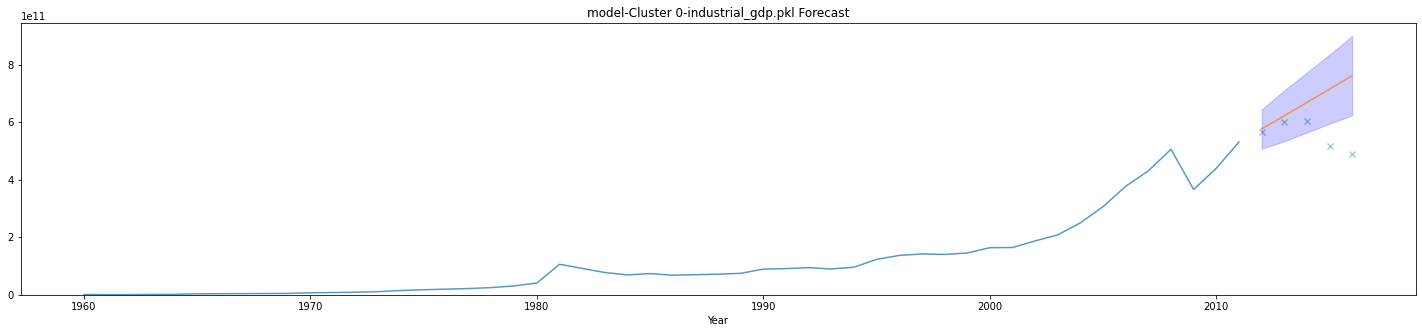

model-Cluster 0-industrial_gdp.pkl COMPLETED
FEATURE  co2_country_share_percent REGION  Cluster 0
START  1960
ALT START  1960
Test RMSE: 0.032


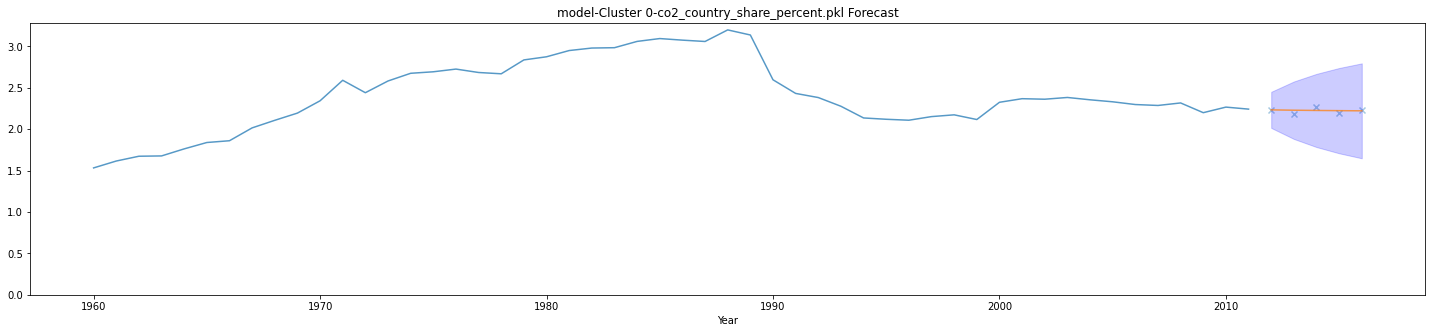

model-Cluster 0-co2_country_share_percent.pkl COMPLETED
FEATURE  manufacturing_country_share_percent REGION  Cluster 0
START  1960
ALT START  1960
Test RMSE: 0.142


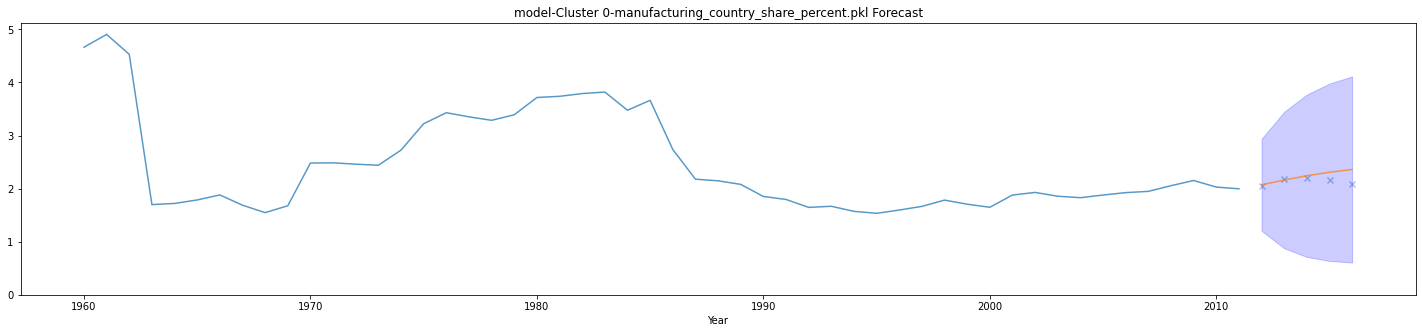

model-Cluster 0-manufacturing_country_share_percent.pkl COMPLETED
FEATURE  iea_primary_energy_consumption REGION  Cluster 0
START  1960
ALT START  1971
Test RMSE: 874.634


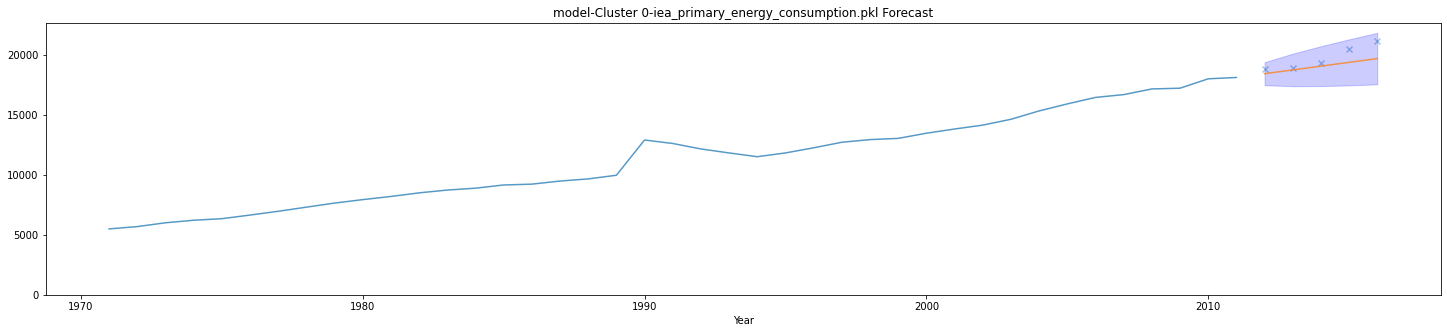

model-Cluster 0-iea_primary_energy_consumption.pkl COMPLETED
FEATURE  renewable_energy_consumption REGION  Cluster 0
START  1971
ALT START  1990
Test RMSE: 394.865


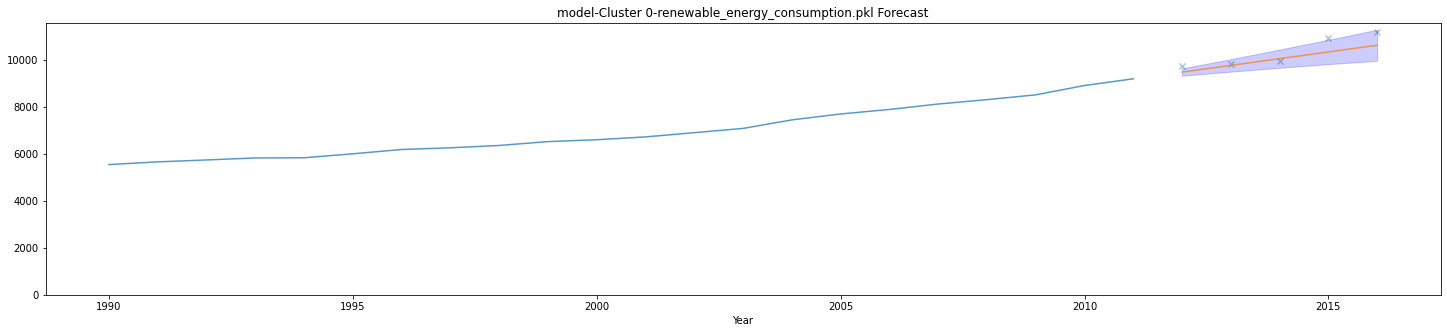

model-Cluster 0-renewable_energy_consumption.pkl COMPLETED
FEATURE  coal_consumption REGION  Cluster 0
START  1971
ALT START  1971
Test RMSE: 0.259


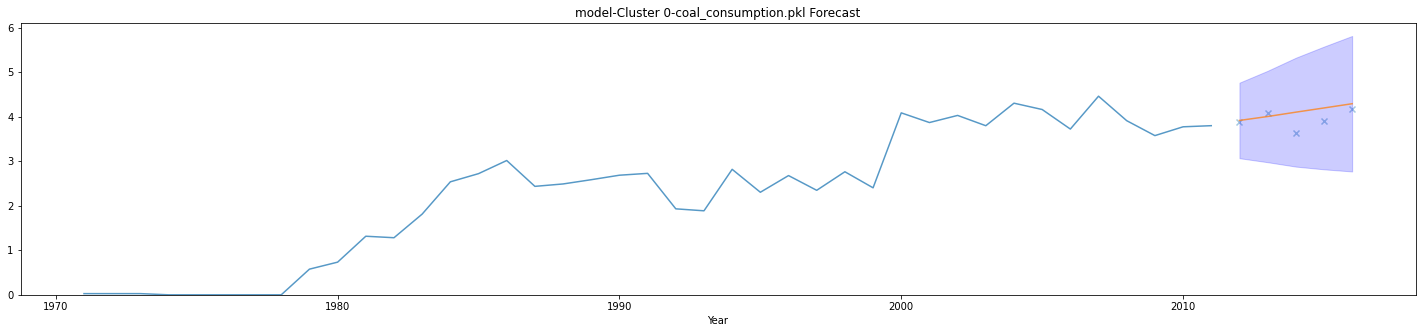

model-Cluster 0-coal_consumption.pkl COMPLETED
FEATURE  oil_consumption REGION  Cluster 0
START  1971
ALT START  1971
Test RMSE: 0.000


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pmdarima/arima/auto.py:460: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '


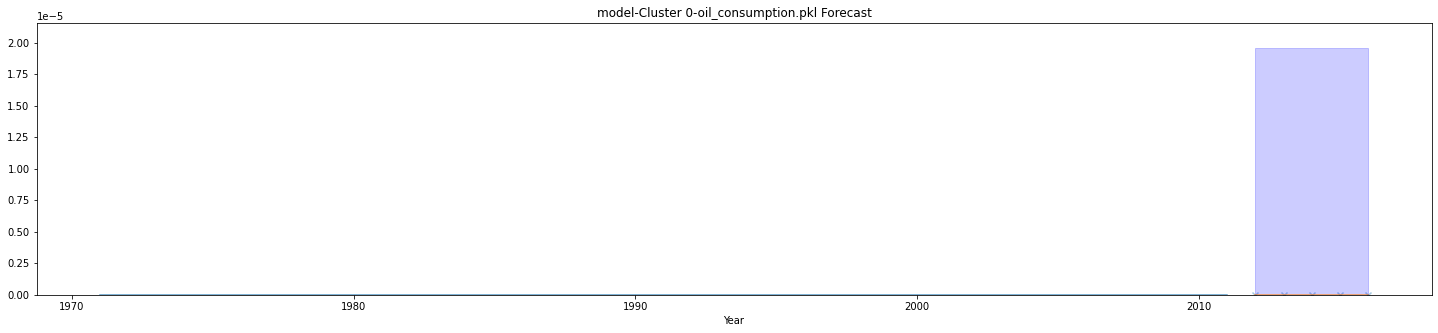

model-Cluster 0-oil_consumption.pkl COMPLETED
FEATURE  total_electricity_production REGION  Cluster 0
START  1971
ALT START  1971
Test RMSE: 246.735


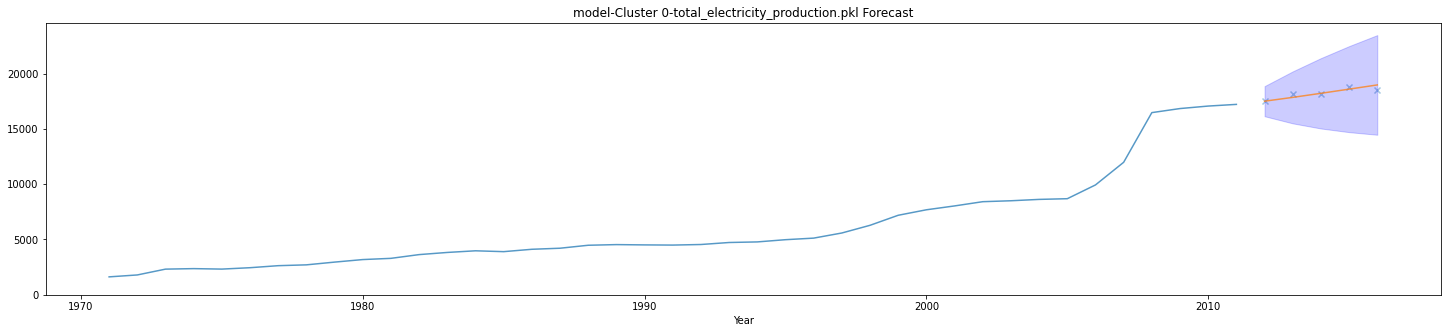

model-Cluster 0-total_electricity_production.pkl COMPLETED
FEATURE  electricity_production_from_renewable REGION  Cluster 0
START  1971
ALT START  1971
Test RMSE: 243.985


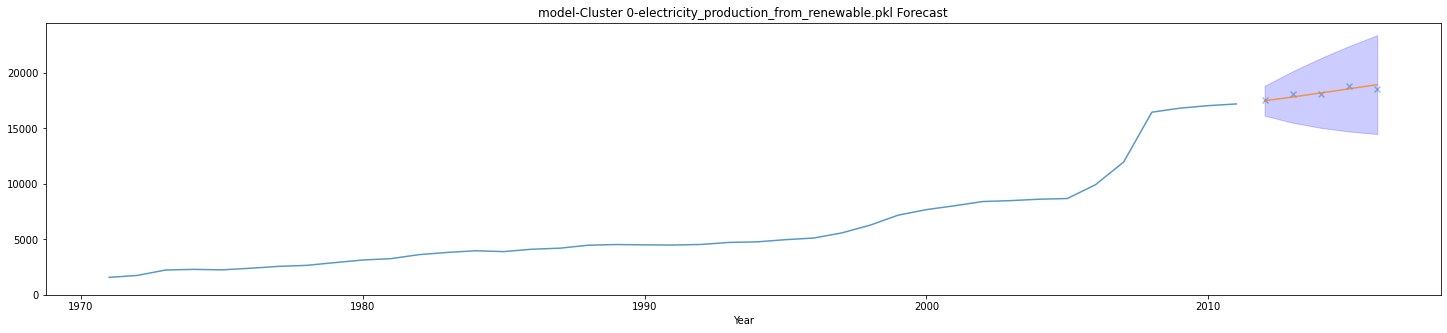

model-Cluster 0-electricity_production_from_renewable.pkl COMPLETED
FEATURE  primary_energy_consumption_per_capita REGION  Cluster 0
START  1960
ALT START  1971
Test RMSE: 5867.873


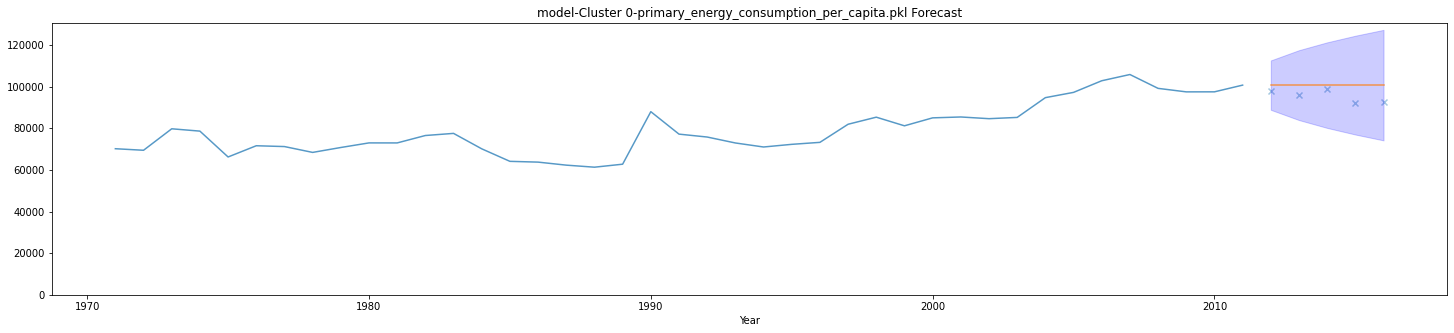

model-Cluster 0-primary_energy_consumption_per_capita.pkl COMPLETED
FEATURE  fossil_energy_consumption_share REGION  Cluster 0
START  1971
ALT START  1971
Test RMSE: 0.163


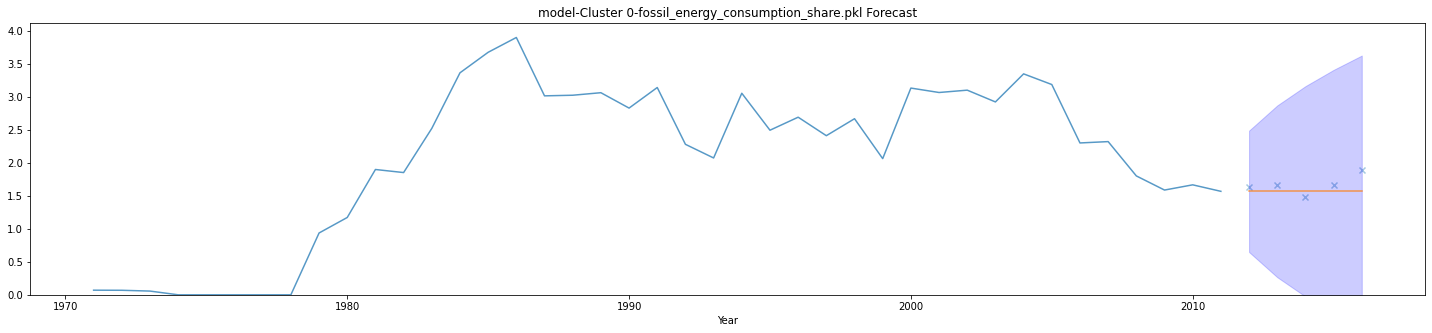

model-Cluster 0-fossil_energy_consumption_share.pkl COMPLETED
FEATURE  renewable_electricity_production_share REGION  Cluster 0
START  1971
ALT START  1990
Test RMSE: 0.009


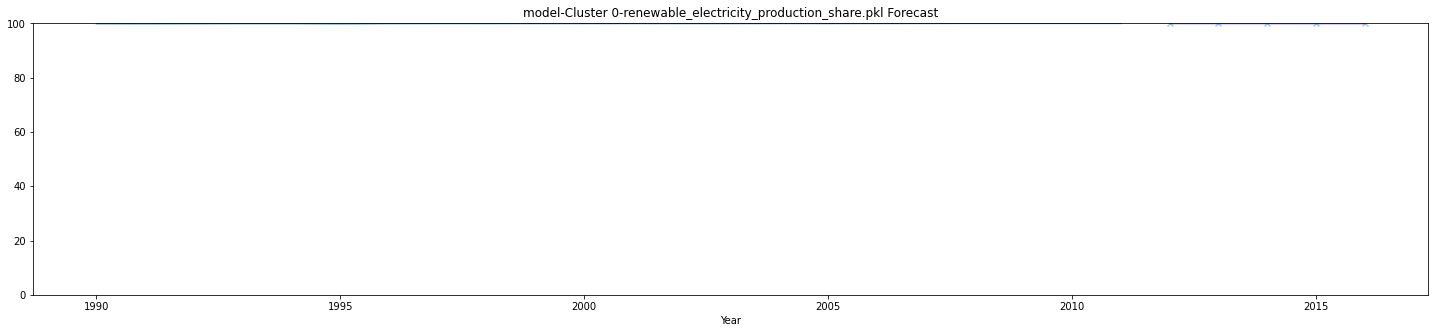

model-Cluster 0-renewable_electricity_production_share.pkl COMPLETED
FEATURE  energy_intensity REGION  Cluster 0
START  1960
ALT START  1990
Test RMSE: 0.855


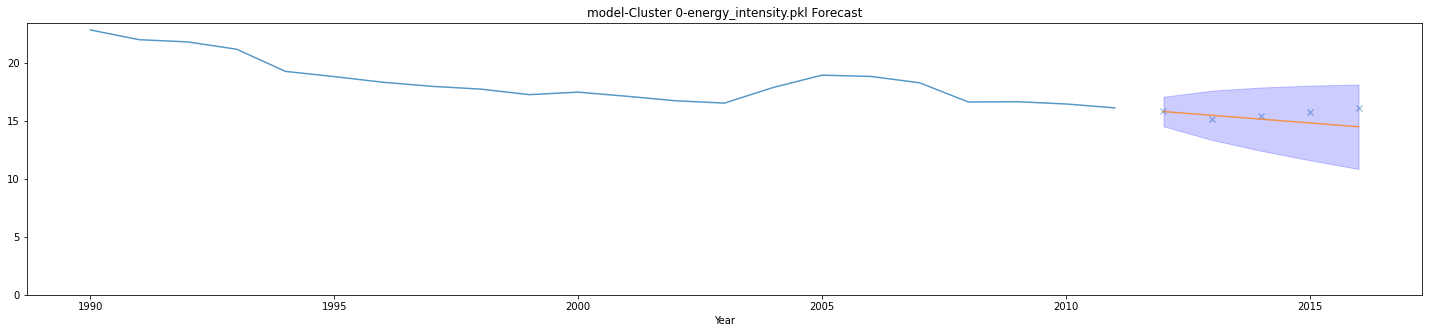

model-Cluster 0-energy_intensity.pkl COMPLETED
FEATURE  renewable_energy_consumption_share REGION  Cluster 0
START  1971
ALT START  1990
Test RMSE: 23.328


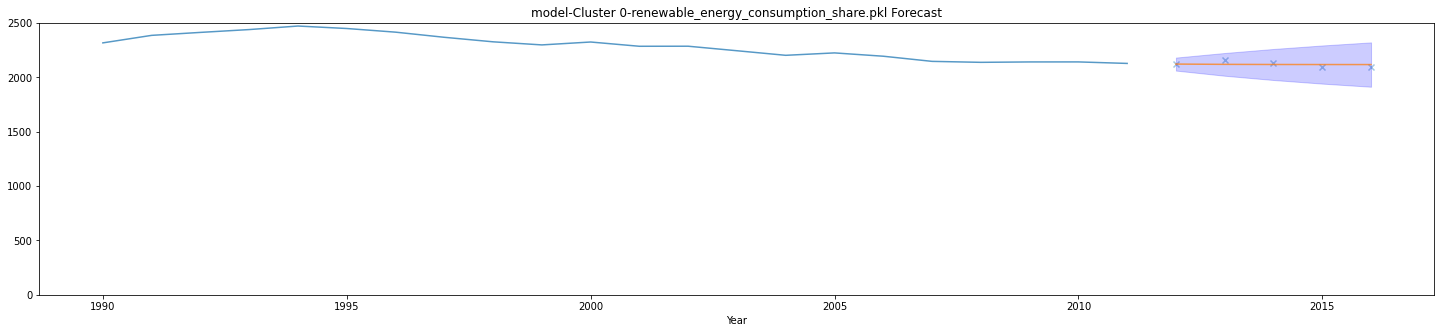

model-Cluster 0-renewable_energy_consumption_share.pkl COMPLETED
FEATURE  percent_of_environment_patent REGION  Cluster 0
START  1960
ALT START  1960
Test RMSE: 193.500


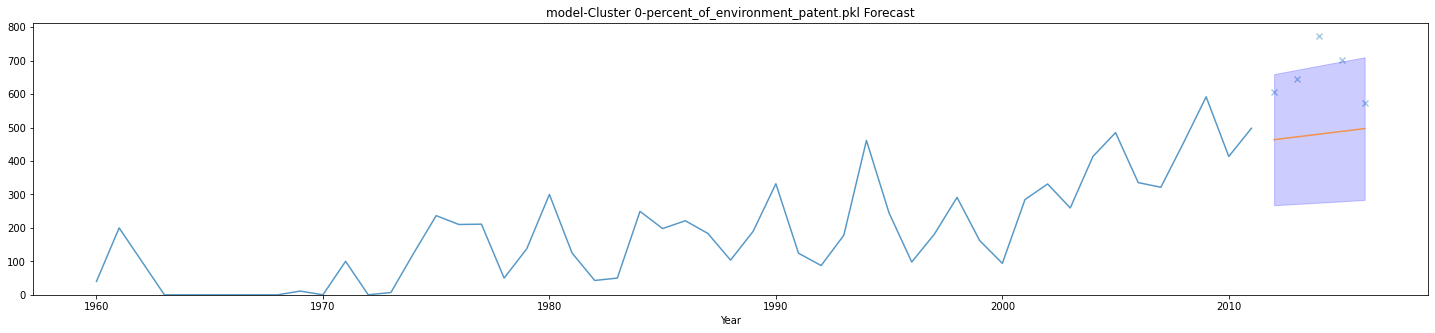

model-Cluster 0-percent_of_environment_patent.pkl COMPLETED
FEATURE  consumption_co2 REGION  Cluster 1
START  1990
ALT START  1990
Test RMSE: 299.930


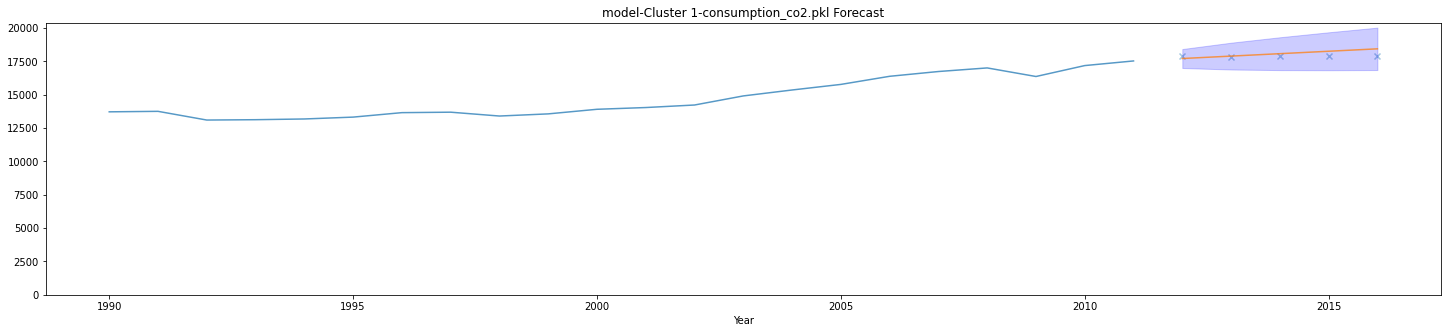

model-Cluster 1-consumption_co2.pkl COMPLETED
FEATURE  co2_growth_prct REGION  Cluster 1
START  1752
ALT START  1752
Test RMSE: 1038.293


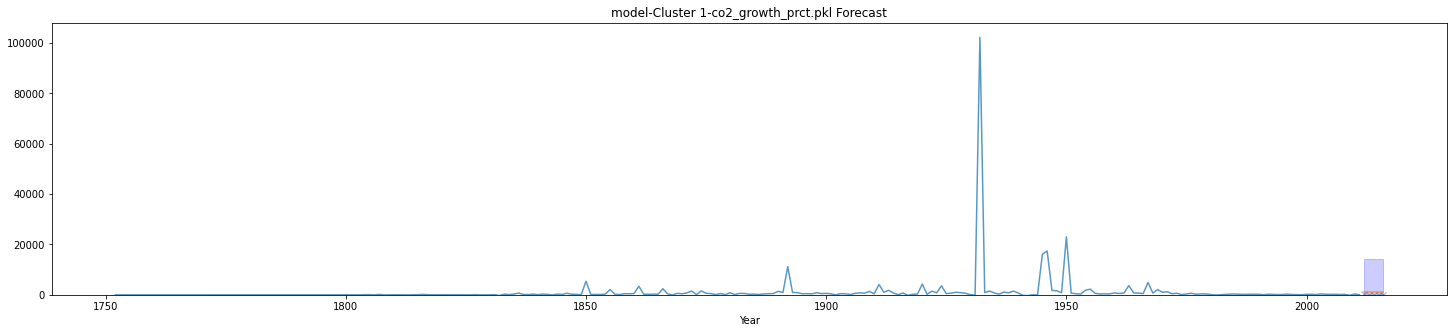

model-Cluster 1-co2_growth_prct.pkl COMPLETED
FEATURE  co2_growth_abs REGION  Cluster 1
START  1752
ALT START  1752
Test RMSE: 205.991


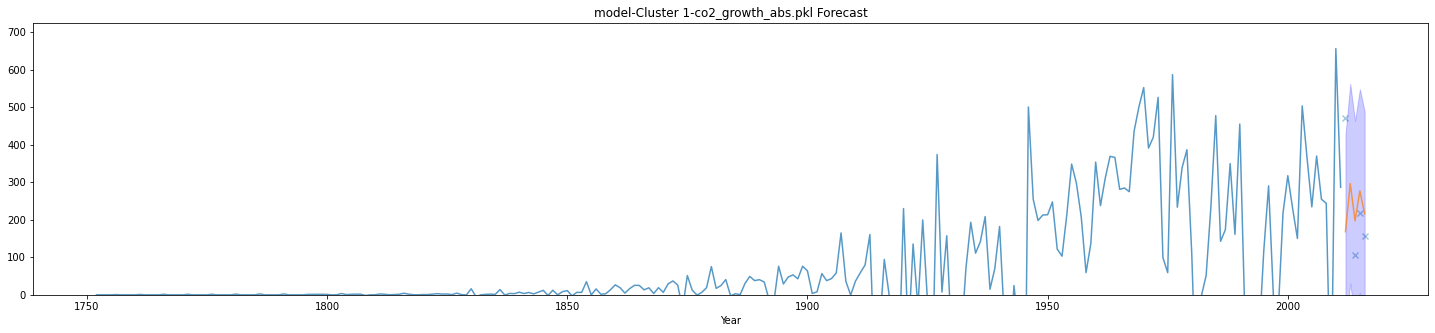

model-Cluster 1-co2_growth_abs.pkl COMPLETED
FEATURE  trade_co2 REGION  Cluster 1
START  1990
ALT START  1990
Test RMSE: 255.686


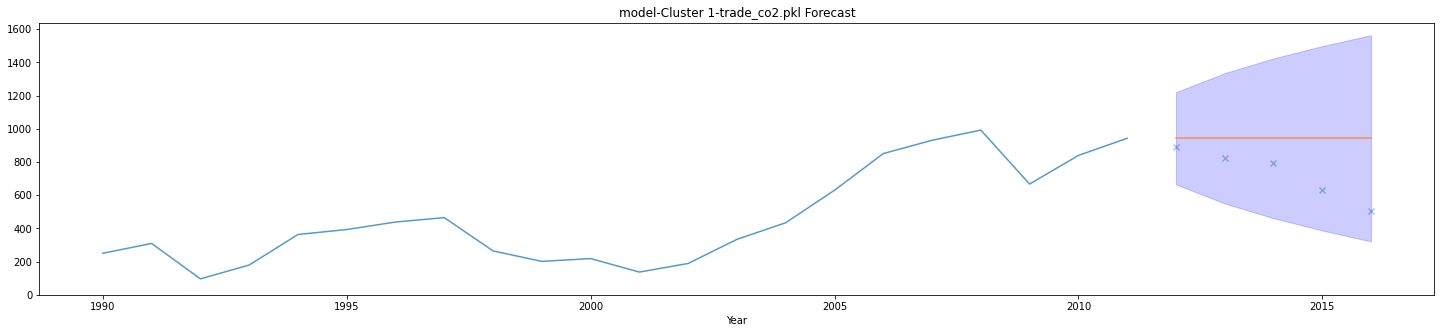

model-Cluster 1-trade_co2.pkl COMPLETED
FEATURE  co2_per_capita REGION  Cluster 1
START  1750
ALT START  1950
Test RMSE: 20.451


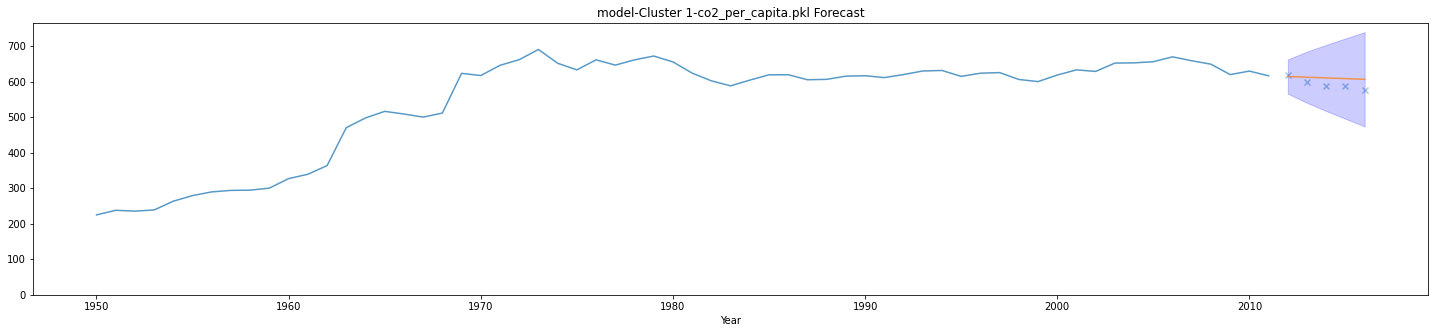

model-Cluster 1-co2_per_capita.pkl COMPLETED
FEATURE  consumption_co2_per_capita REGION  Cluster 1
START  1990
ALT START  1990
Test RMSE: 13.489


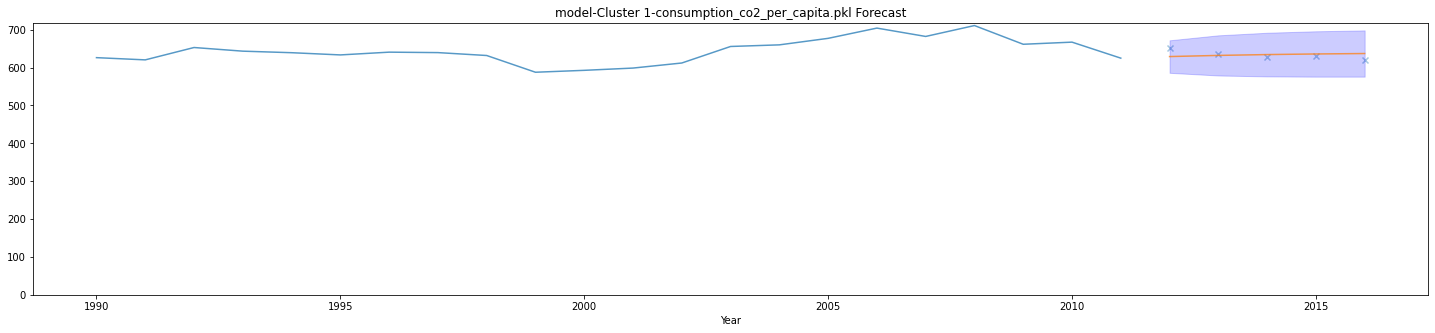

model-Cluster 1-consumption_co2_per_capita.pkl COMPLETED
FEATURE  share_global_co2 REGION  Cluster 1
START  1750
ALT START  1750
Test RMSE: 1.396


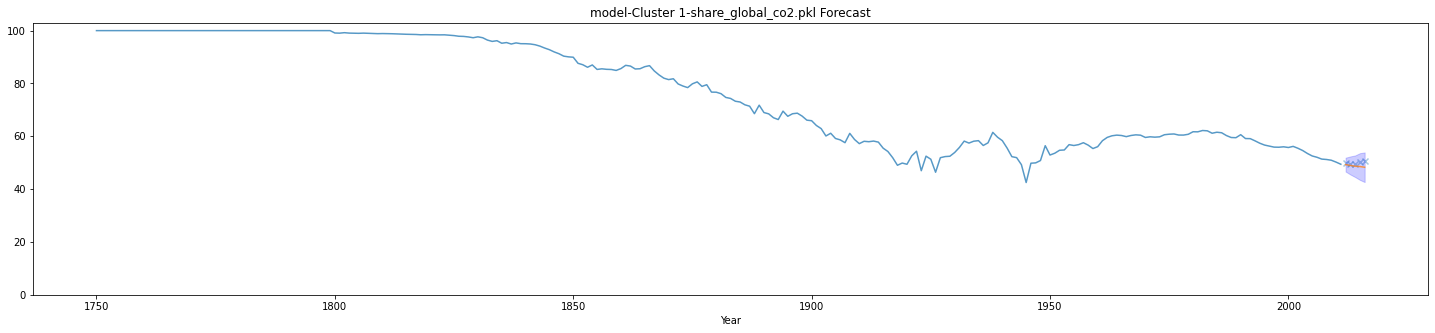

model-Cluster 1-share_global_co2.pkl COMPLETED
FEATURE  cumulative_co2 REGION  Cluster 1
START  1750
ALT START  1750
Test RMSE: 319.383


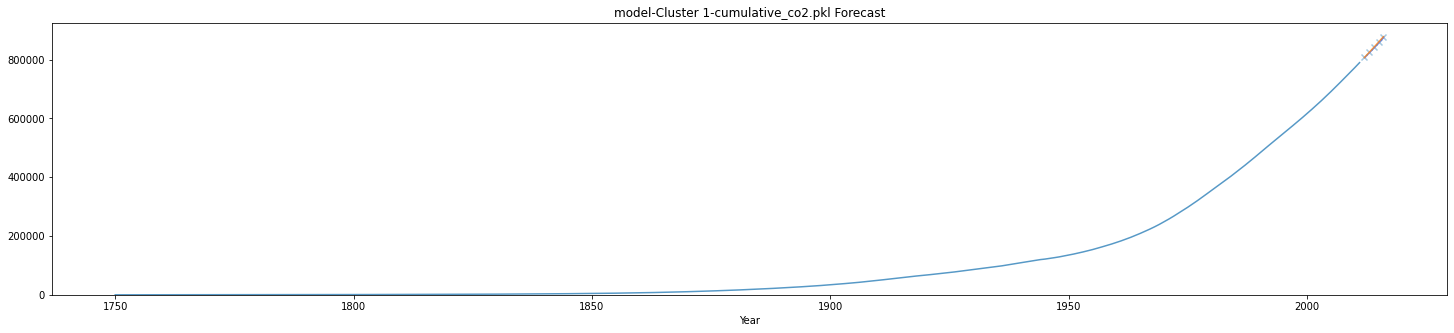

model-Cluster 1-cumulative_co2.pkl COMPLETED
FEATURE  share_global_cumulative_co2 REGION  Cluster 1
START  1750
ALT START  1750
Test RMSE: 0.054


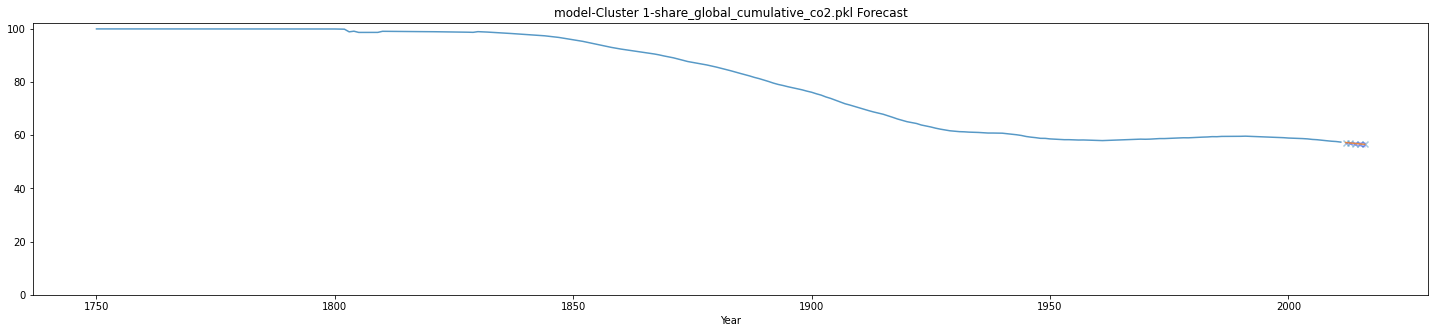

model-Cluster 1-share_global_cumulative_co2.pkl COMPLETED
FEATURE  co2_per_gdp REGION  Cluster 1
START  1820
ALT START  1950
Test RMSE: 1.664


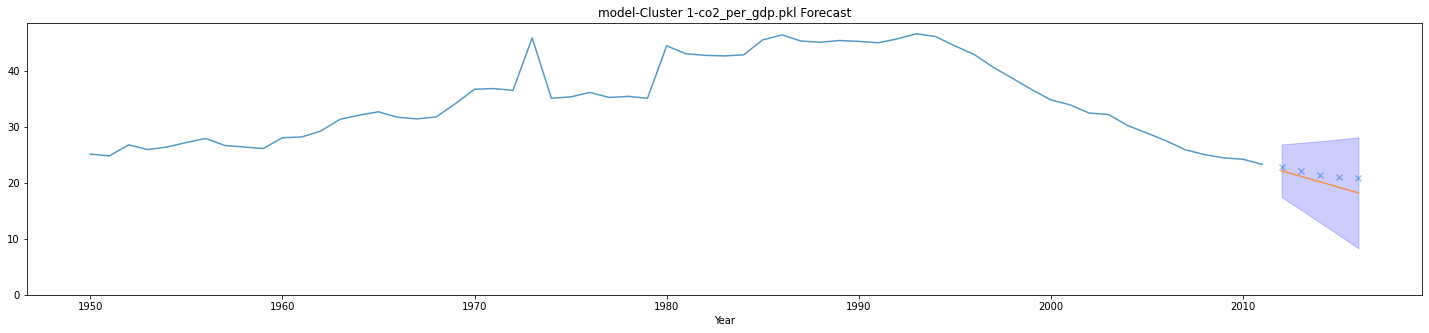

model-Cluster 1-co2_per_gdp.pkl COMPLETED
FEATURE  consumption_co2_per_gdp REGION  Cluster 1
START  1990
ALT START  1990
Test RMSE: 2.133


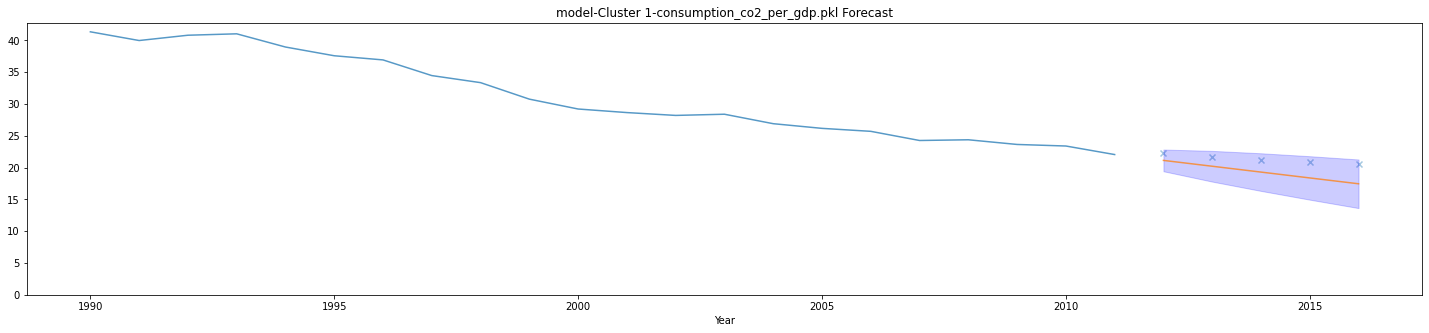

model-Cluster 1-consumption_co2_per_gdp.pkl COMPLETED
FEATURE  co2_per_unit_energy REGION  Cluster 1
START  1965
ALT START  1980
Test RMSE: 0.623


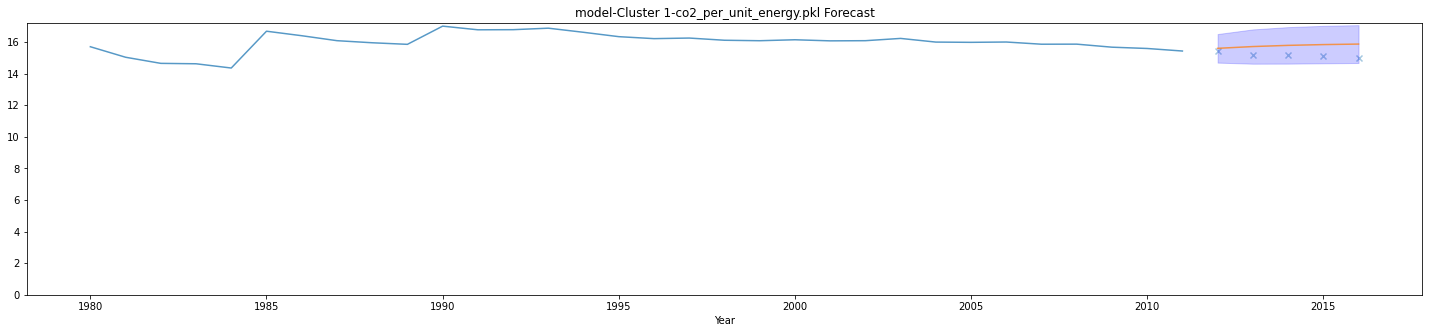

model-Cluster 1-co2_per_unit_energy.pkl COMPLETED
FEATURE  coal_co2 REGION  Cluster 1
START  1750
ALT START  1750
Test RMSE: 186.280


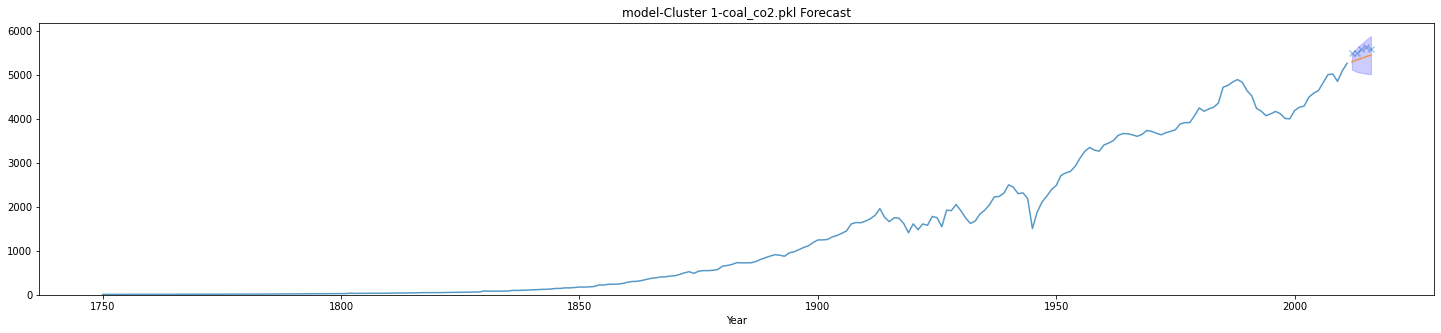

model-Cluster 1-coal_co2.pkl COMPLETED
FEATURE  coal_co2_per_capita REGION  Cluster 1
START  1750
ALT START  1750
Test RMSE: 10.519


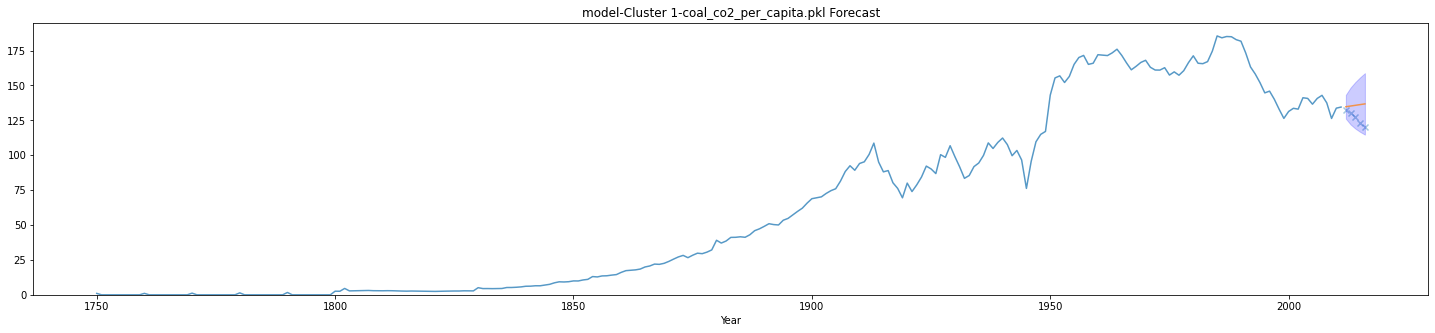

model-Cluster 1-coal_co2_per_capita.pkl COMPLETED
FEATURE  share_global_coal_co2 REGION  Cluster 1
START  1750
ALT START  1750
Test RMSE: 3.073


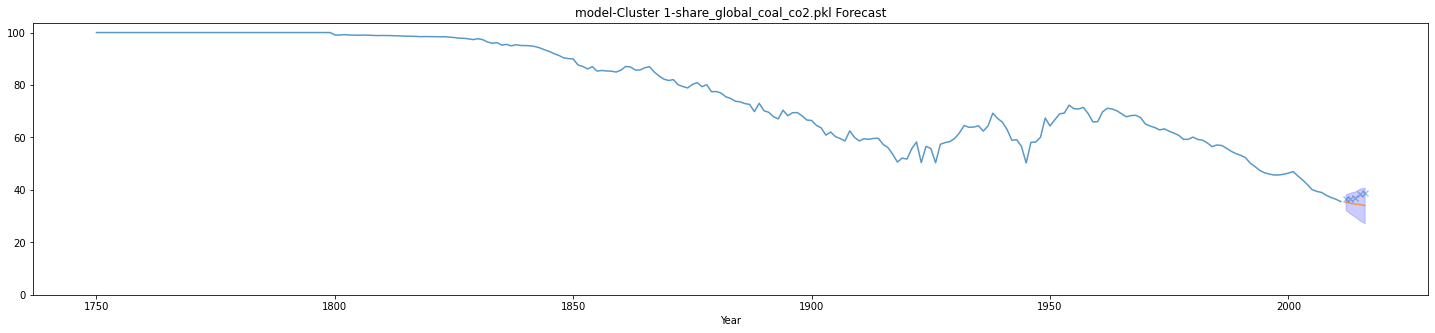

model-Cluster 1-share_global_coal_co2.pkl COMPLETED
FEATURE  cumulative_coal_co2 REGION  Cluster 1
START  1750
ALT START  1750
Test RMSE: 584.716


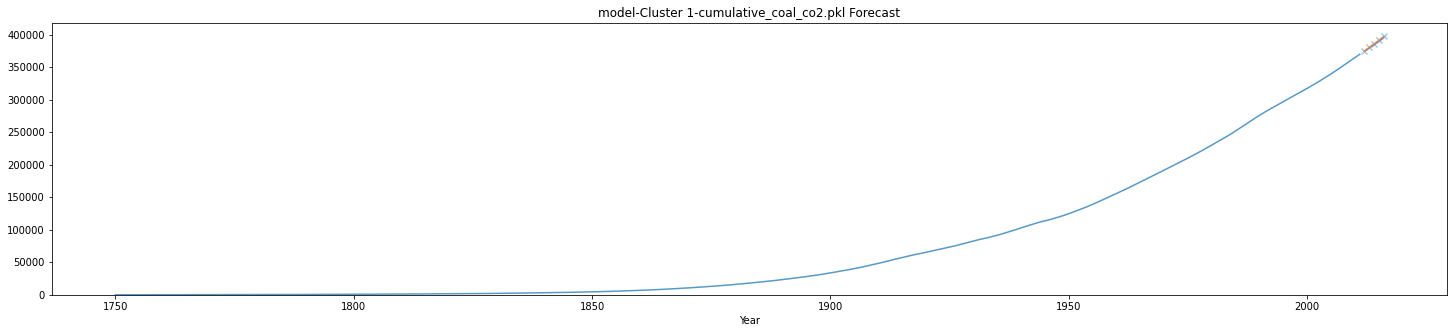

model-Cluster 1-cumulative_coal_co2.pkl COMPLETED
FEATURE  share_global_cumulative_coal_co2 REGION  Cluster 1
START  1750
ALT START  1750
Test RMSE: 0.191


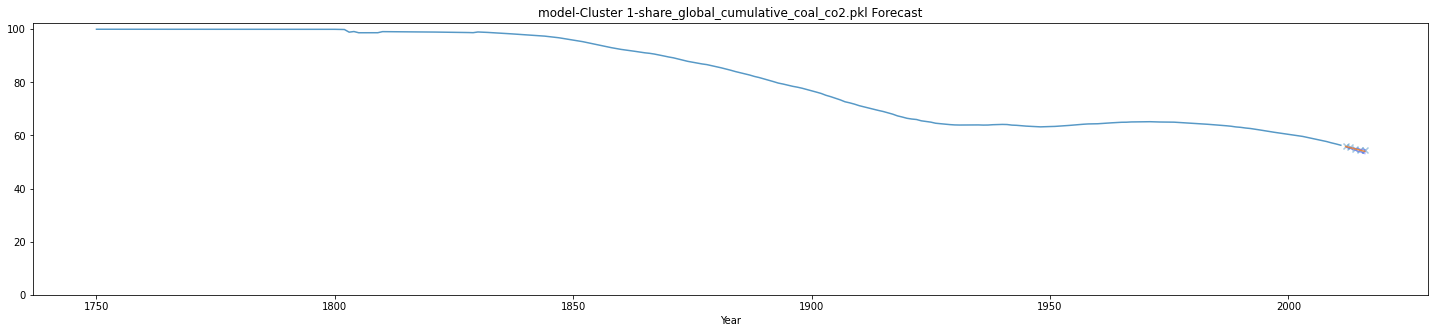

model-Cluster 1-share_global_cumulative_coal_co2.pkl COMPLETED
FEATURE  gas_co2 REGION  Cluster 1
START  1882
ALT START  1882
Test RMSE: 295.338


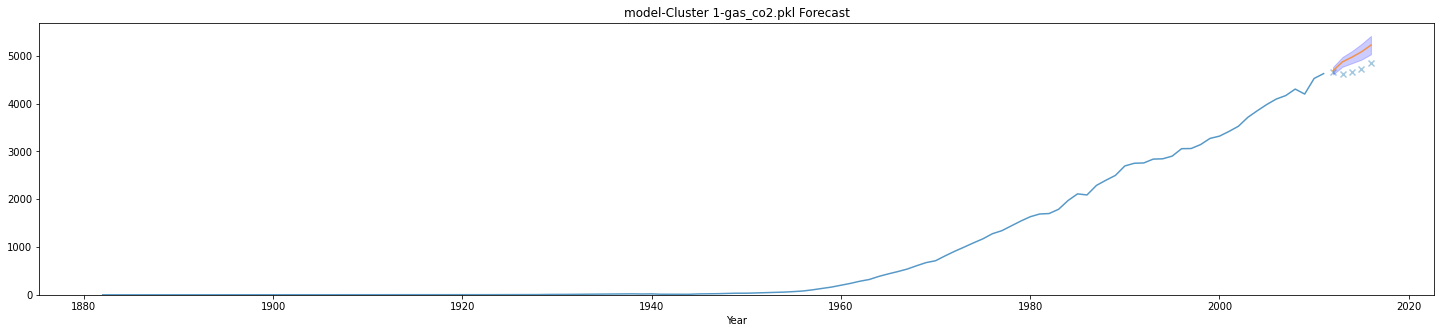

model-Cluster 1-gas_co2.pkl COMPLETED
FEATURE  oil_co2 REGION  Cluster 1
START  1855
ALT START  1855
Test RMSE: 163.850


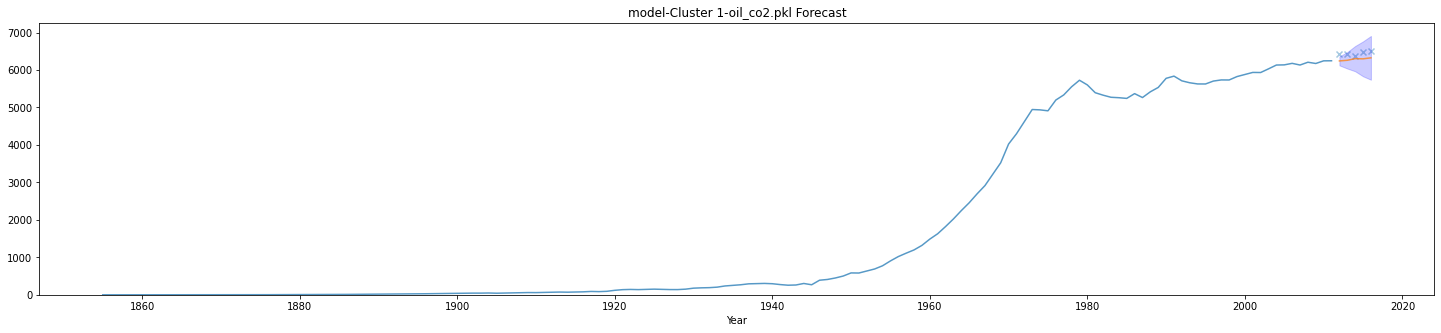

model-Cluster 1-oil_co2.pkl COMPLETED
FEATURE  gas_co2_per_capita REGION  Cluster 1
START  1882
ALT START  1882
Test RMSE: 17.040


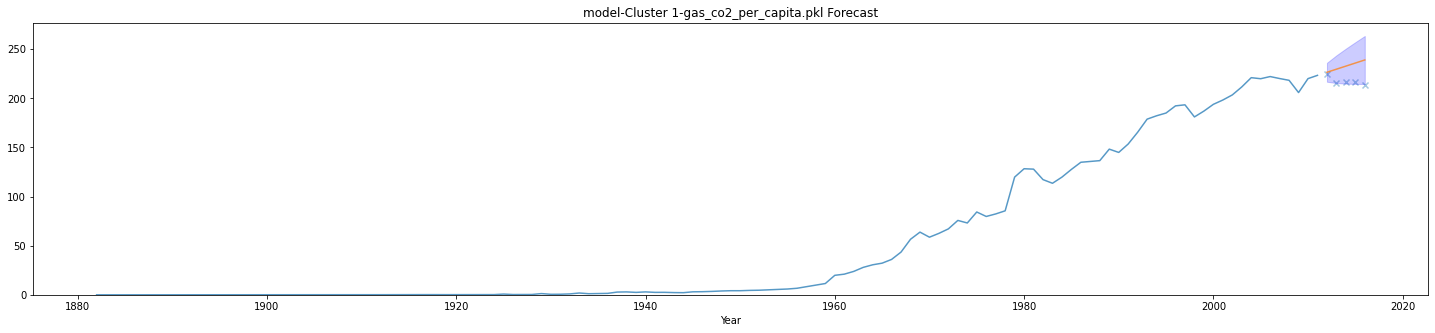

model-Cluster 1-gas_co2_per_capita.pkl COMPLETED
FEATURE  share_global_gas_co2 REGION  Cluster 1
START  1882
ALT START  1882
Test RMSE: 2.099


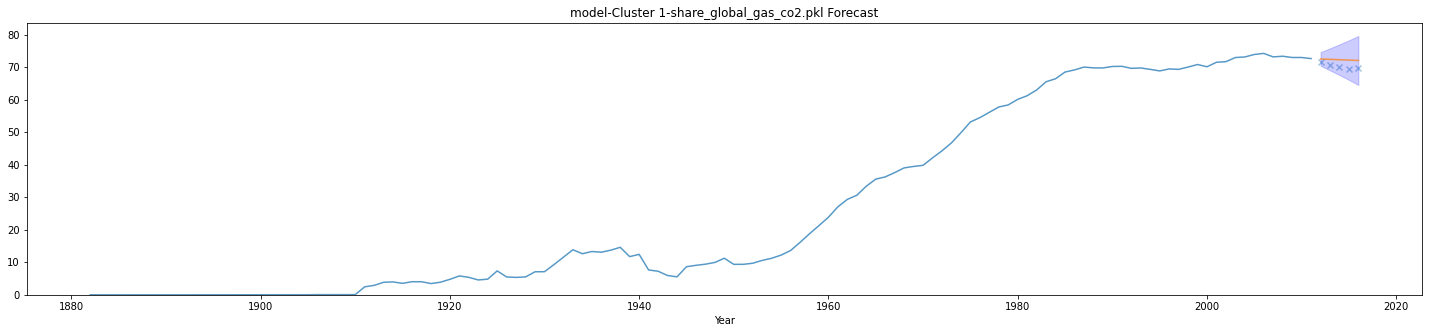

model-Cluster 1-share_global_gas_co2.pkl COMPLETED
FEATURE  cumulative_gas_co2 REGION  Cluster 1
START  1882
ALT START  1882
Test RMSE: 885.162


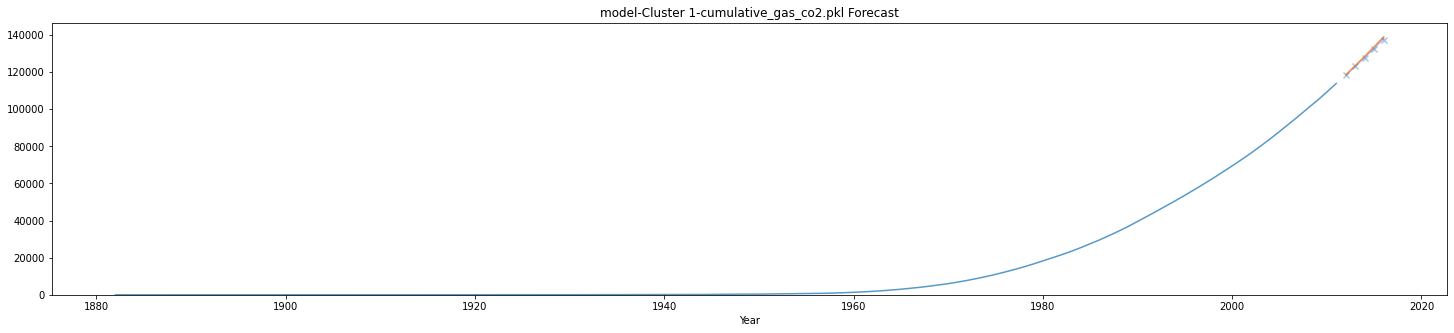

model-Cluster 1-cumulative_gas_co2.pkl COMPLETED
FEATURE  share_global_cumulative_gas_co2 REGION  Cluster 1
START  1882
ALT START  1882
Test RMSE: 0.327


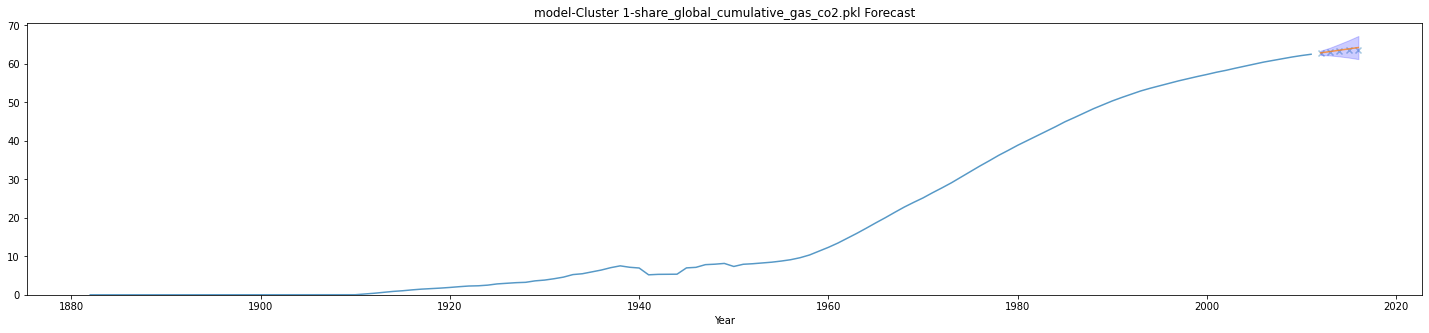

model-Cluster 1-share_global_cumulative_gas_co2.pkl COMPLETED
FEATURE  oil_co2_per_capita REGION  Cluster 1
START  1855
ALT START  1950
Test RMSE: 5.333


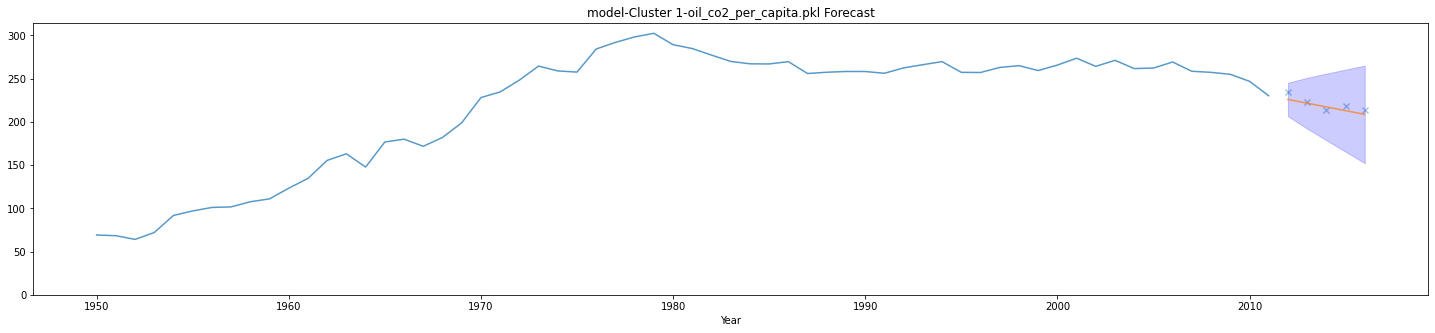

model-Cluster 1-oil_co2_per_capita.pkl COMPLETED
FEATURE  cumulative_oil_co2 REGION  Cluster 1
START  1855
ALT START  1855
Test RMSE: 383.341


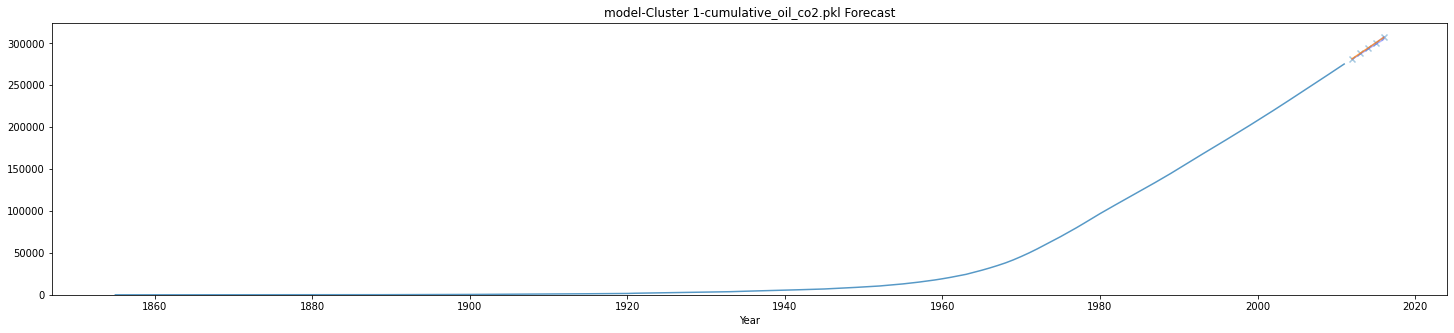

model-Cluster 1-cumulative_oil_co2.pkl COMPLETED
FEATURE  share_global_cumulative_oil_co2 REGION  Cluster 1
START  1855
ALT START  1855
Test RMSE: 1.896


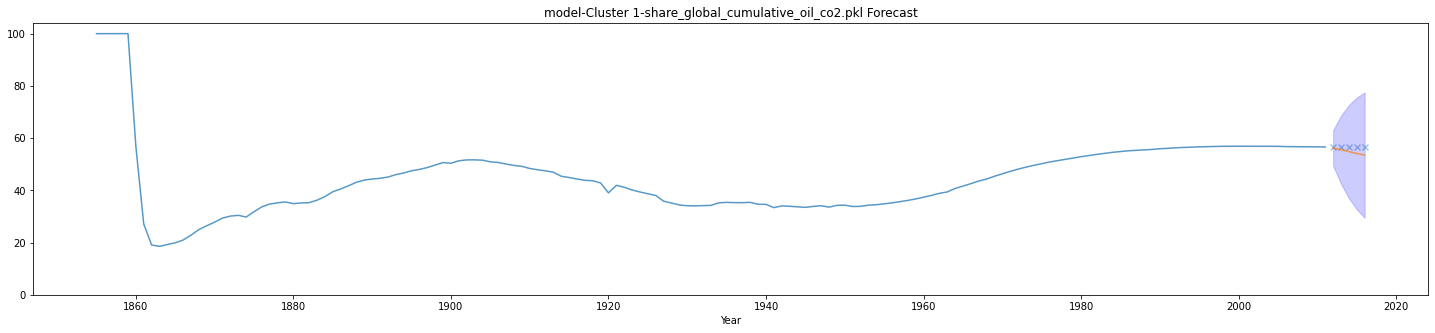

model-Cluster 1-share_global_cumulative_oil_co2.pkl COMPLETED
FEATURE  other_co2_per_capita REGION  Cluster 1
START  1904
ALT START  1990
Test RMSE: 0.438


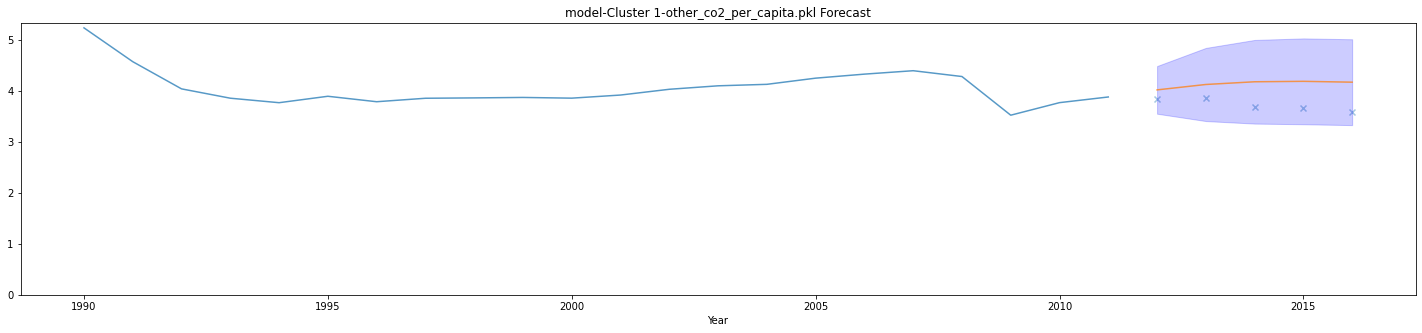

model-Cluster 1-other_co2_per_capita.pkl COMPLETED
FEATURE  trade_co2_share REGION  Cluster 1
START  1990
ALT START  1990
Test RMSE: 261.364


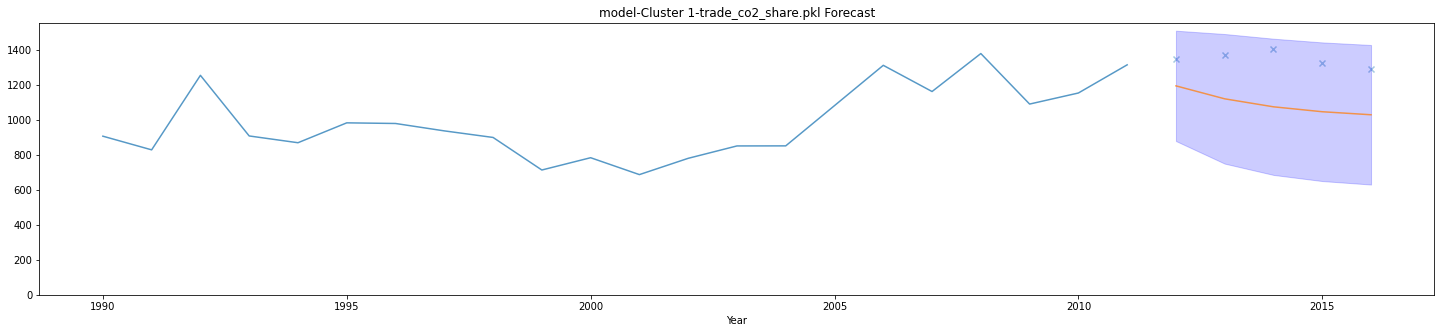

model-Cluster 1-trade_co2_share.pkl COMPLETED
FEATURE  share_global_oil_co2 REGION  Cluster 1
START  1855
ALT START  1855
Test RMSE: 0.542


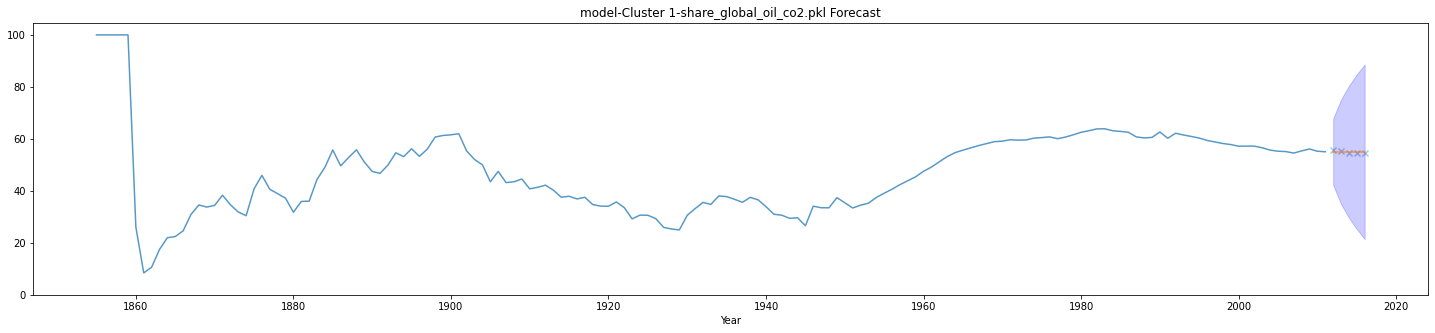

model-Cluster 1-share_global_oil_co2.pkl COMPLETED
FEATURE  cumulative_other_co2 REGION  Cluster 1
START  1904
ALT START  1904
Test RMSE: 1.021


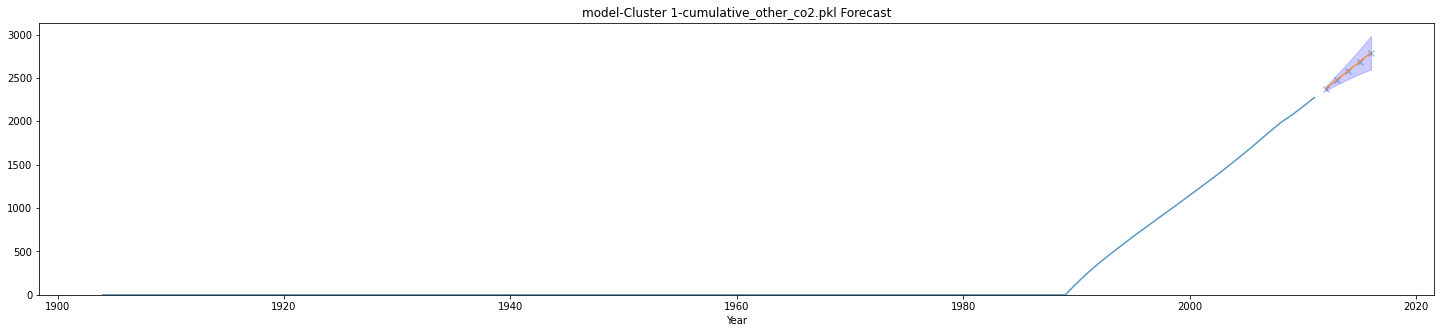

model-Cluster 1-cumulative_other_co2.pkl COMPLETED
FEATURE  share_global_other_co2 REGION  Cluster 1
START  1904
ALT START  1904
Test RMSE: 2.849


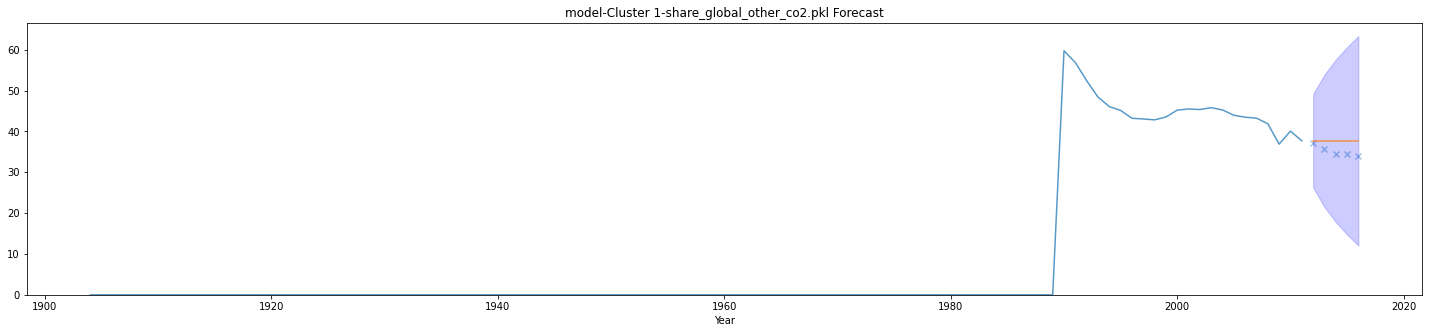

model-Cluster 1-share_global_other_co2.pkl COMPLETED
FEATURE  share_global_cumulative_other_co2 REGION  Cluster 1
START  1904
ALT START  1904
Test RMSE: 1.207


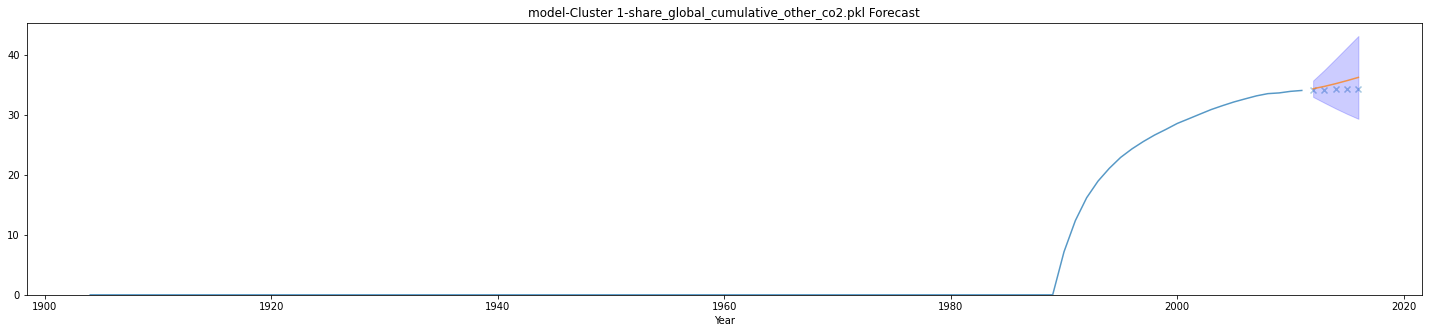

model-Cluster 1-share_global_cumulative_other_co2.pkl COMPLETED
FEATURE  population REGION  Cluster 1
START  1750
ALT START  1750
Test RMSE: 646398.862


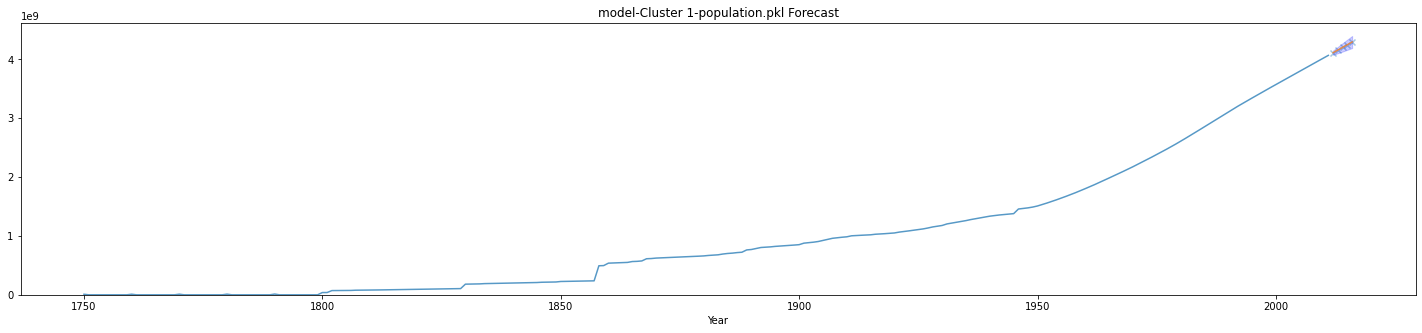

model-Cluster 1-population.pkl COMPLETED
FEATURE  gdp REGION  Cluster 1
START  1820
ALT START  1820
Test RMSE: 1528387495494.120


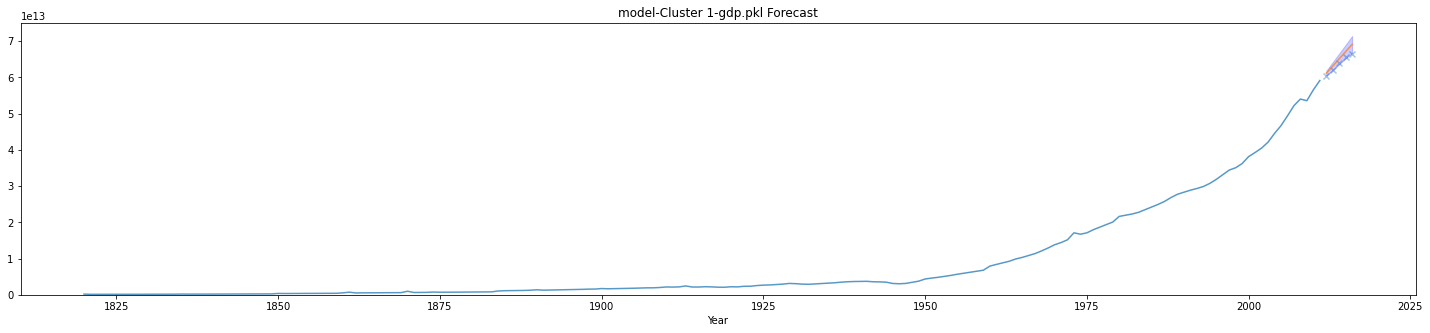

model-Cluster 1-gdp.pkl COMPLETED
FEATURE  primary_energy_consumption REGION  Cluster 1
START  1965
ALT START  1980
Test RMSE: 775.583


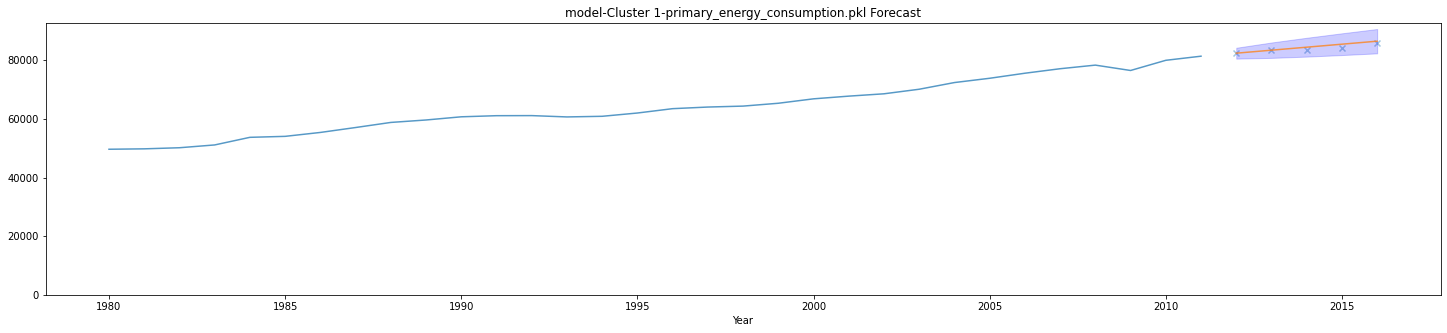

model-Cluster 1-primary_energy_consumption.pkl COMPLETED
FEATURE  energy_per_capita REGION  Cluster 1
START  1965
ALT START  1980
Test RMSE: 145986.589


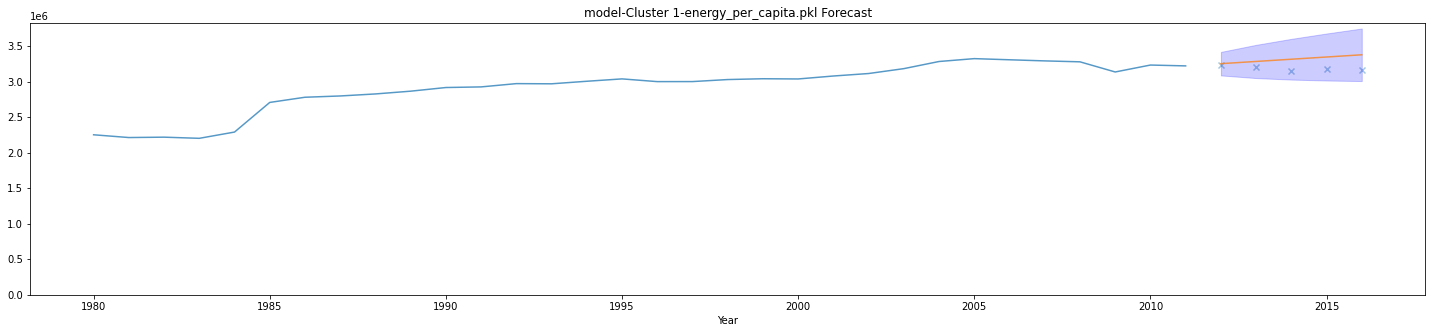

model-Cluster 1-energy_per_capita.pkl COMPLETED
FEATURE  energy_per_gdp REGION  Cluster 1
START  1965
ALT START  1980
Test RMSE: 11.990


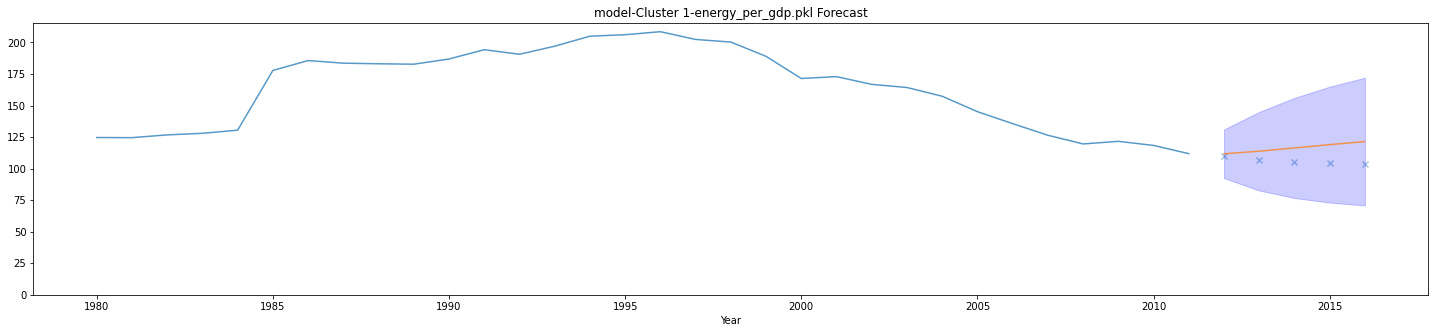

model-Cluster 1-energy_per_gdp.pkl COMPLETED
FEATURE  current_gdp REGION  Cluster 1
START  1960
ALT START  1960
Test RMSE: 11342376164331.223


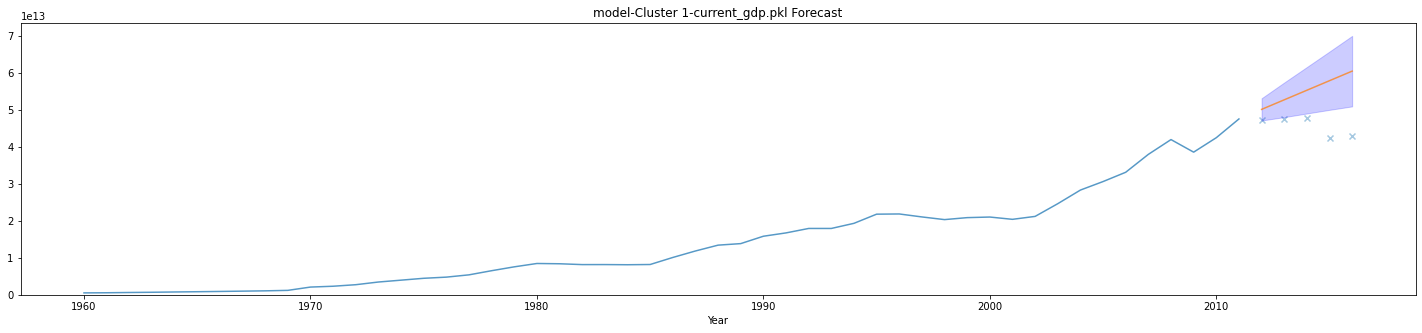

model-Cluster 1-current_gdp.pkl COMPLETED
FEATURE  constant_gdp REGION  Cluster 1
START  1960
ALT START  1960
Test RMSE: 487817696990.708


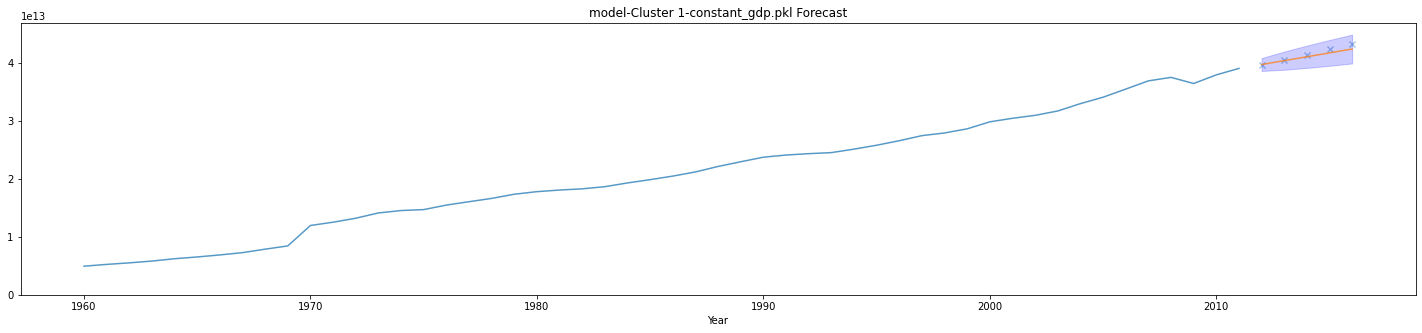

model-Cluster 1-constant_gdp.pkl COMPLETED
FEATURE  manufacturing_gdp REGION  Cluster 1
START  1960
ALT START  1960
Test RMSE: 842464150009.399


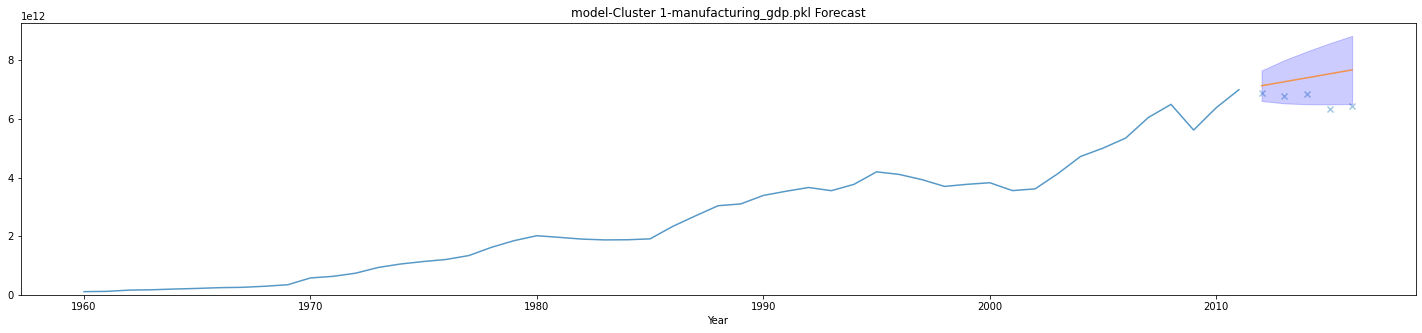

model-Cluster 1-manufacturing_gdp.pkl COMPLETED
FEATURE  medium_to_high_tech_percent REGION  Cluster 1
START  1990
ALT START  1990
Test RMSE: 32.085


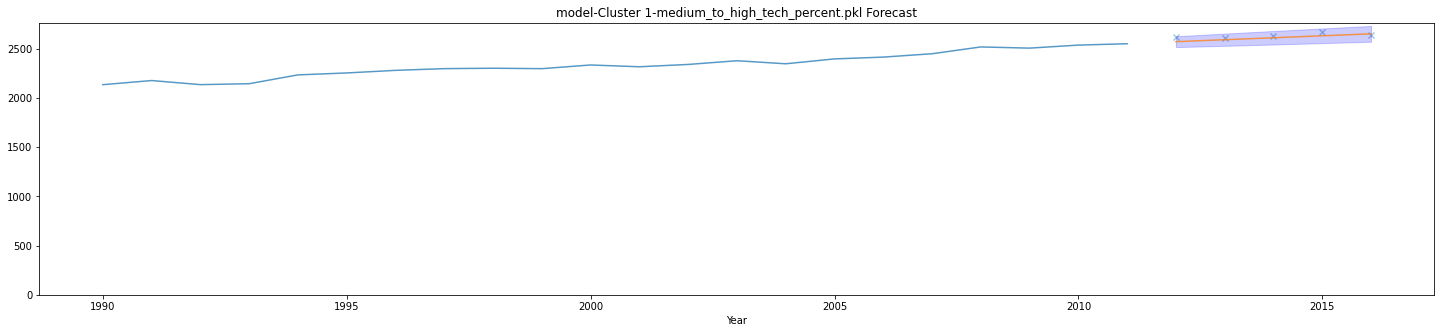

model-Cluster 1-medium_to_high_tech_percent.pkl COMPLETED
FEATURE  export REGION  Cluster 1
START  1960
ALT START  1960
Test RMSE: 3870460070677.148


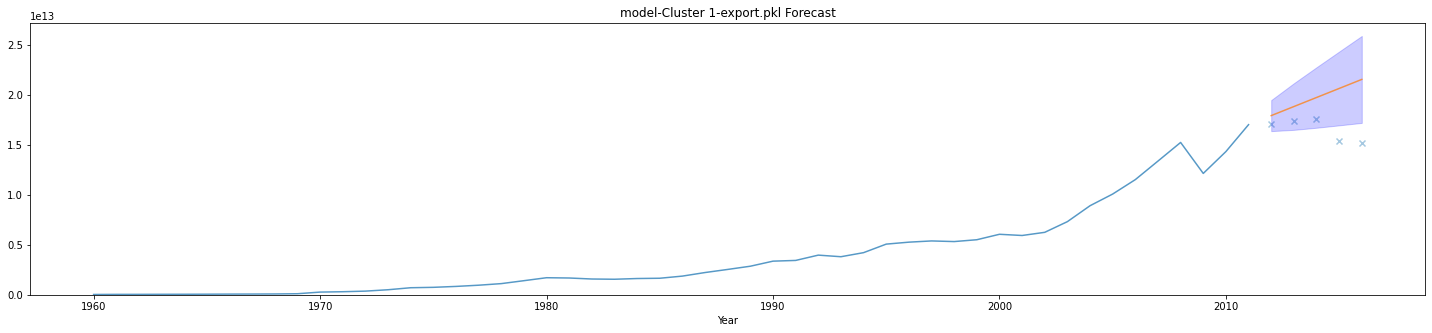

model-Cluster 1-export.pkl COMPLETED
FEATURE  import REGION  Cluster 1
START  1960
ALT START  1960
Test RMSE: 3530162017396.917


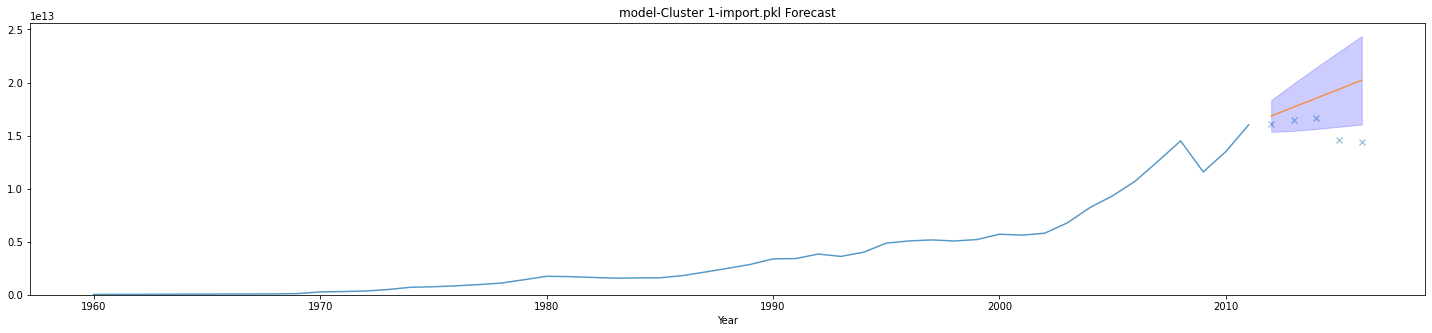

model-Cluster 1-import.pkl COMPLETED
FEATURE  real_gdp_growth_percent REGION  Cluster 1
START  1961
ALT START  1961
Test RMSE: 50.806


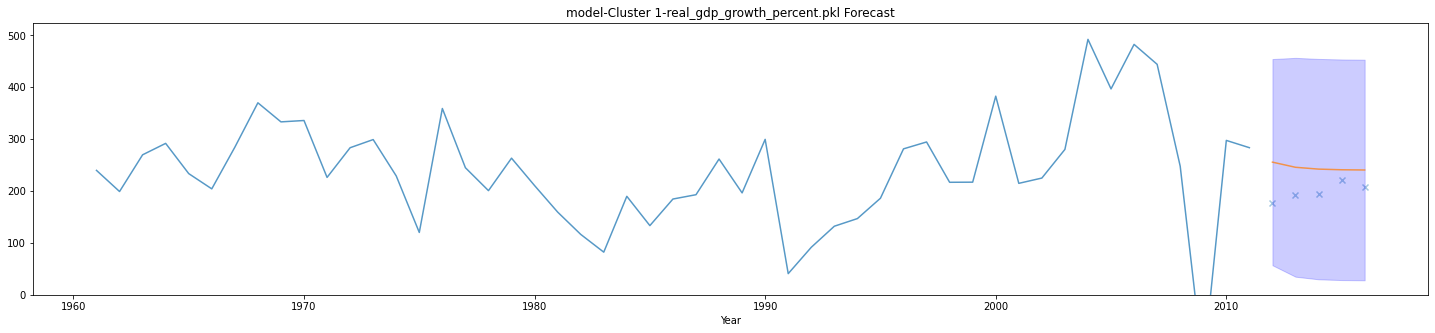

model-Cluster 1-real_gdp_growth_percent.pkl COMPLETED
FEATURE  urban_population_percent REGION  Cluster 1
START  1960
ALT START  1960
Test RMSE: 2.869


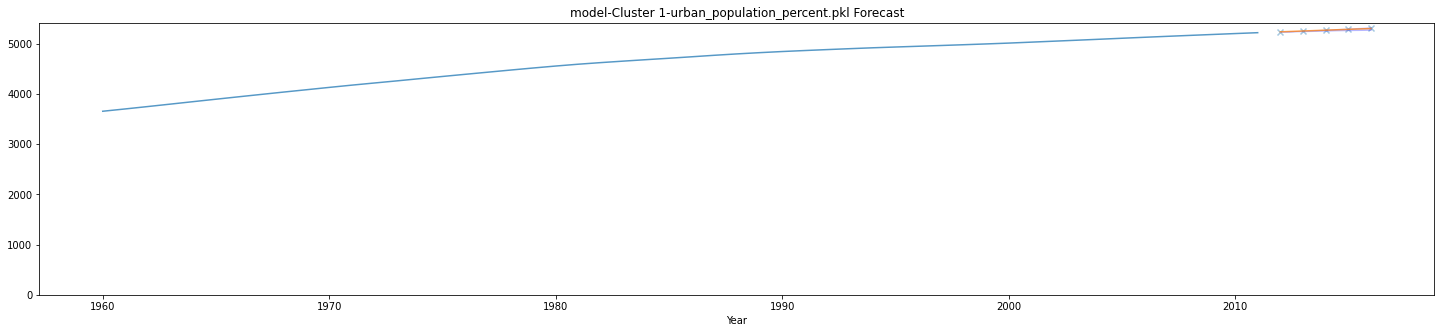

model-Cluster 1-urban_population_percent.pkl COMPLETED
FEATURE  merchandise_export REGION  Cluster 1
START  1960
ALT START  1960
Test RMSE: 3542459227740.077


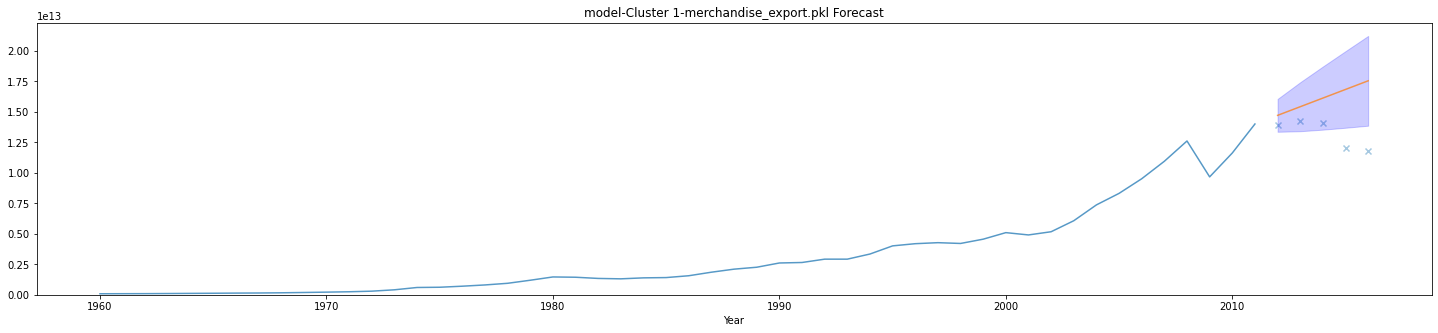

model-Cluster 1-merchandise_export.pkl COMPLETED
FEATURE  merchandise_import REGION  Cluster 1
START  1960
ALT START  1960
Test RMSE: 3210562494633.400


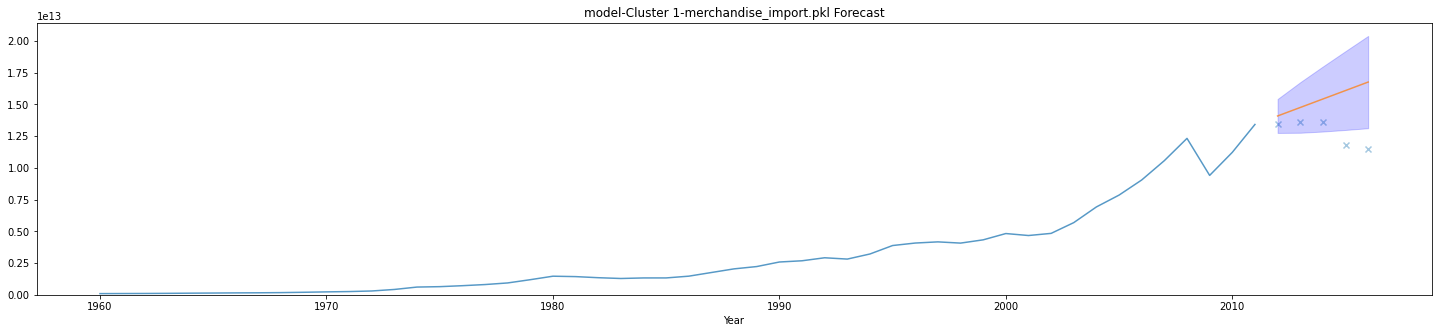

model-Cluster 1-merchandise_import.pkl COMPLETED
FEATURE  manufacturer_export_share REGION  Cluster 1
START  1962
ALT START  1989
Test RMSE: 395.794


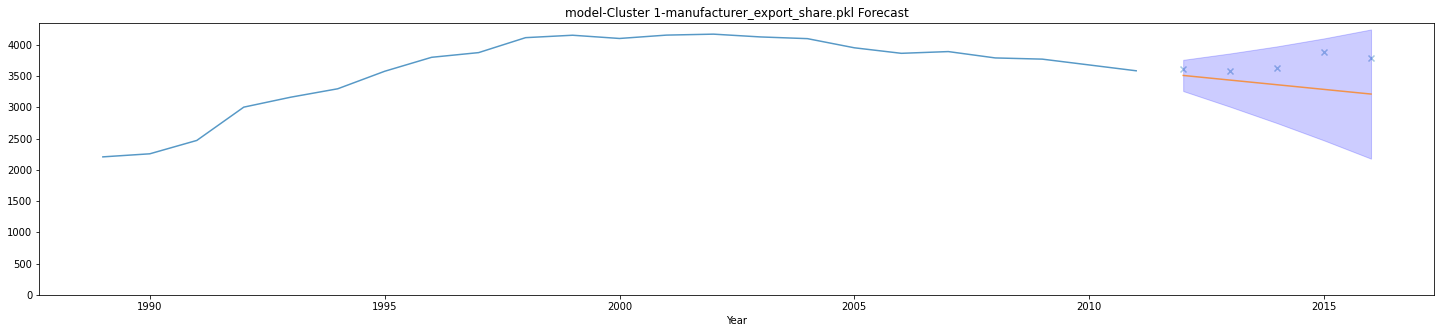

model-Cluster 1-manufacturer_export_share.pkl COMPLETED
FEATURE  manufacturer_export REGION  Cluster 1
START  1962
ALT START  1962
Test RMSE: 1159531062932.231


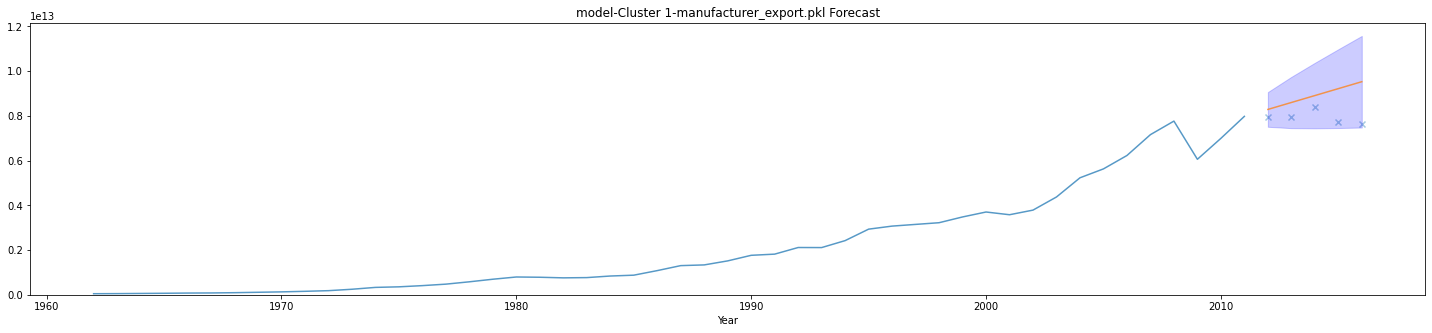

model-Cluster 1-manufacturer_export.pkl COMPLETED
FEATURE  co2_emission_electricity REGION  Cluster 1
START  1990
ALT START  1990
Test RMSE: 179161.815


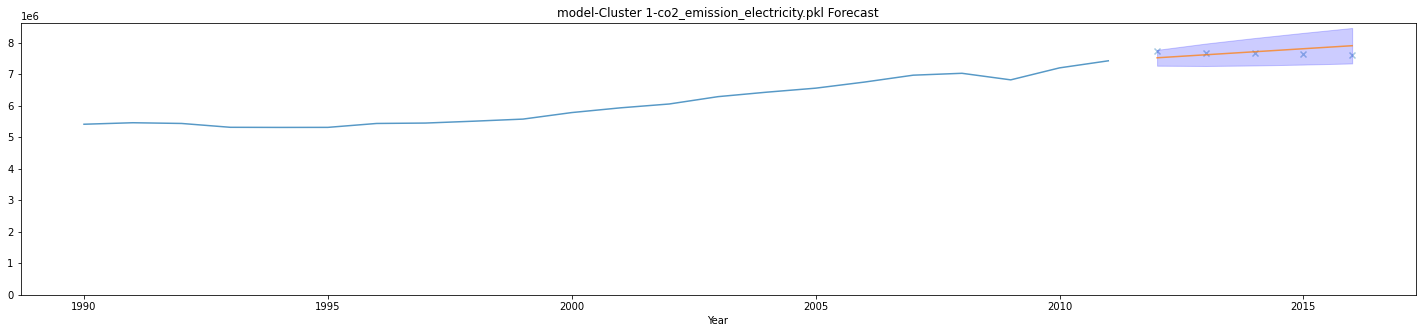

model-Cluster 1-co2_emission_electricity.pkl COMPLETED
FEATURE  co2_emission_other_fuel REGION  Cluster 1
START  1990
ALT START  1990
Test RMSE: 52146.311


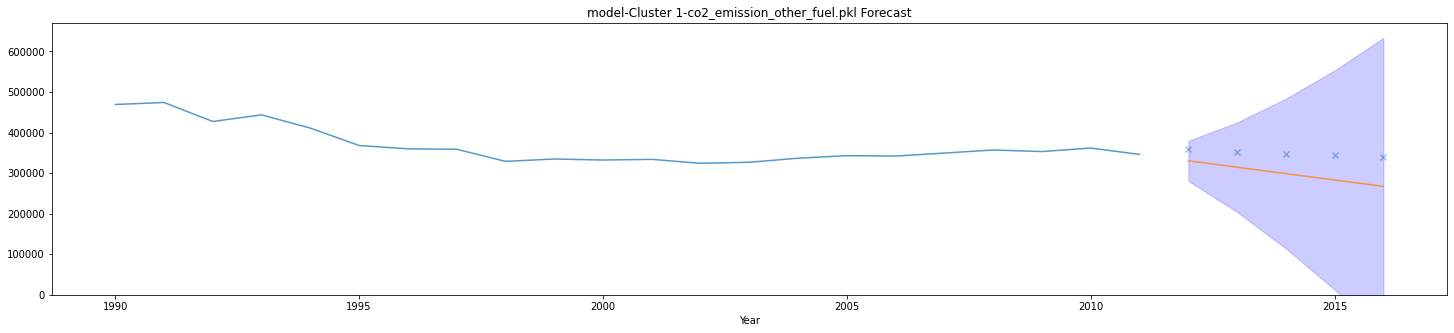

model-Cluster 1-co2_emission_other_fuel.pkl COMPLETED
FEATURE  co2_emission_transport REGION  Cluster 1
START  1990
ALT START  1990
Test RMSE: 15057.311


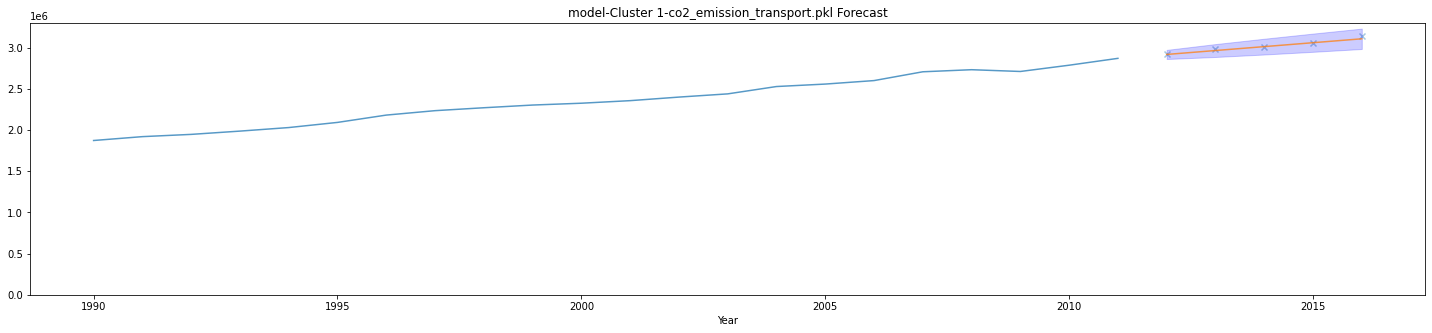

model-Cluster 1-co2_emission_transport.pkl COMPLETED
FEATURE  co2_emission_bunkers REGION  Cluster 1
START  1990
ALT START  1990
Test RMSE: 26283.285


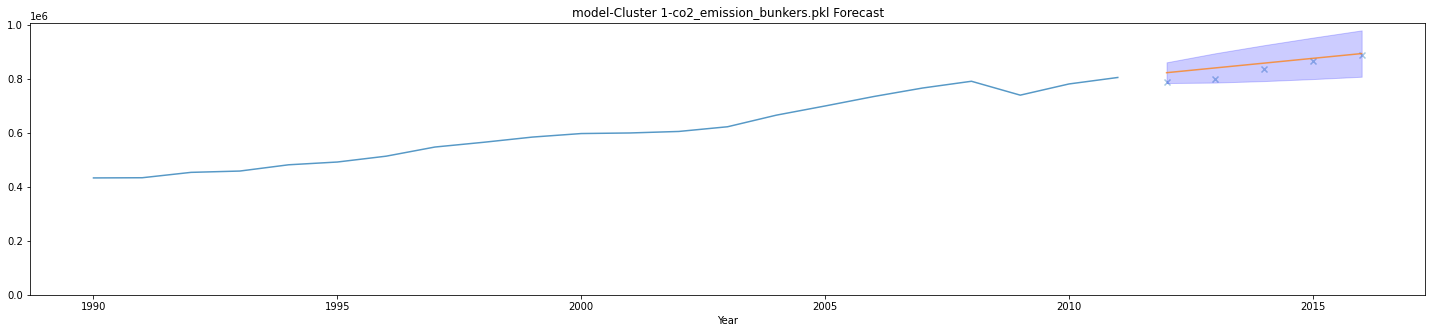

model-Cluster 1-co2_emission_bunkers.pkl COMPLETED
FEATURE  co2_emission_industrial_process REGION  Cluster 1
START  1990
ALT START  1990
Test RMSE: 6415.559


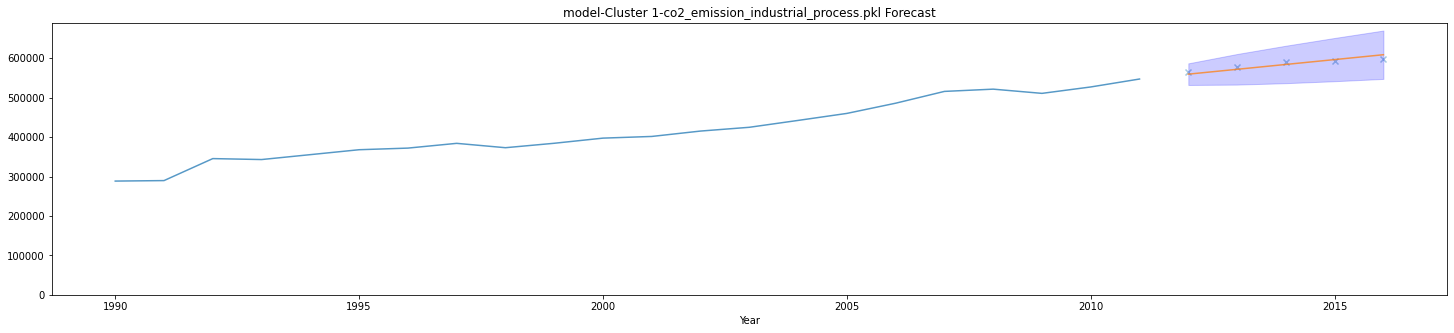

model-Cluster 1-co2_emission_industrial_process.pkl COMPLETED
FEATURE  co2_emission_per_capita REGION  Cluster 1
START  1960
ALT START  1960
Test RMSE: 18.265


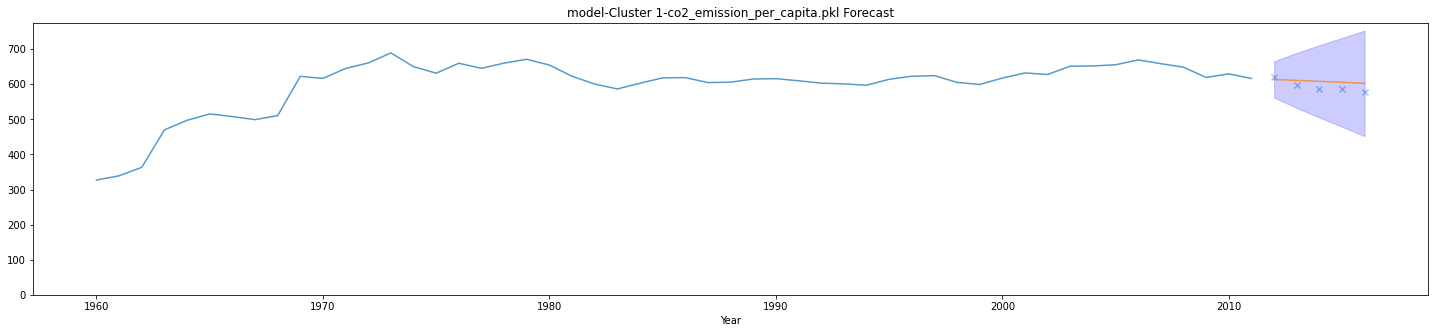

model-Cluster 1-co2_emission_per_capita.pkl COMPLETED
FEATURE  constant_gdp_per_capita REGION  Cluster 1
START  1960
ALT START  1970
Test RMSE: 14759.051


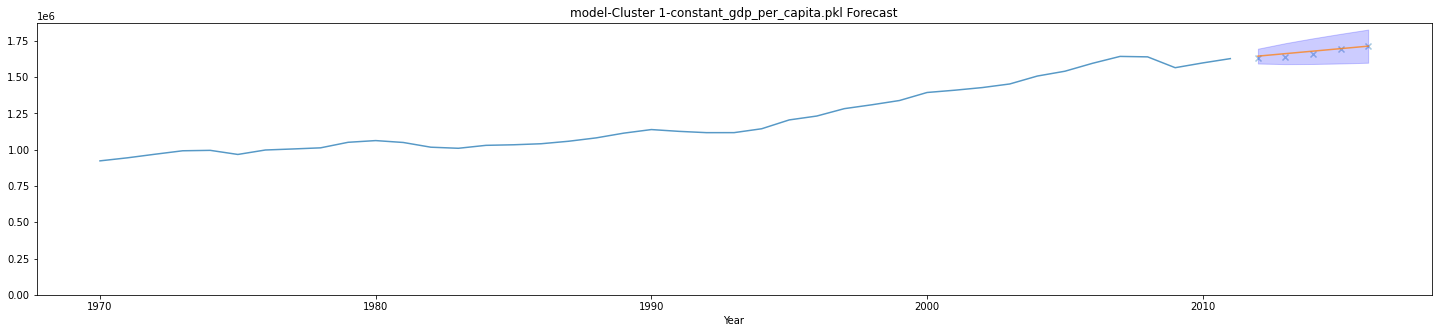

model-Cluster 1-constant_gdp_per_capita.pkl COMPLETED
FEATURE  manufacturing_percent REGION  Cluster 1
START  1960
ALT START  1960
Test RMSE: 24.273


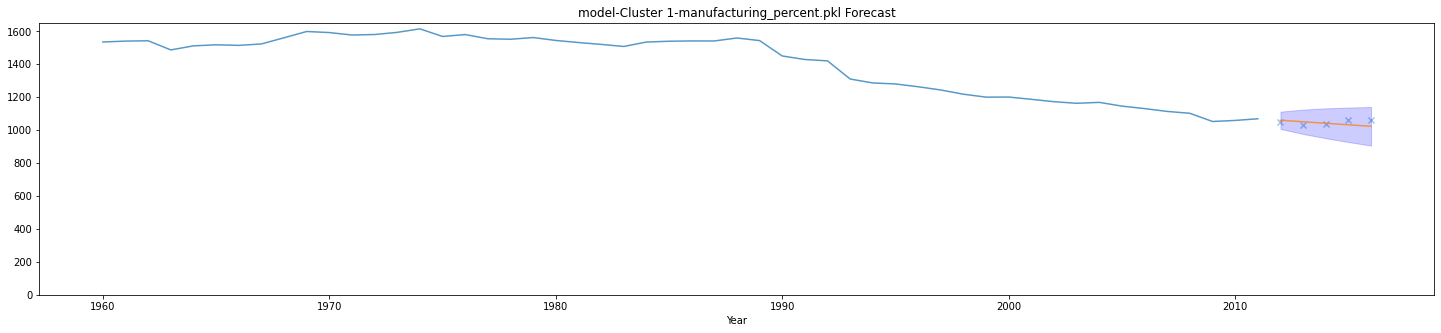

model-Cluster 1-manufacturing_percent.pkl COMPLETED
FEATURE  medium_to_high_tech_gdp REGION  Cluster 1
START  1990
ALT START  1990
Test RMSE: 407631109885.391


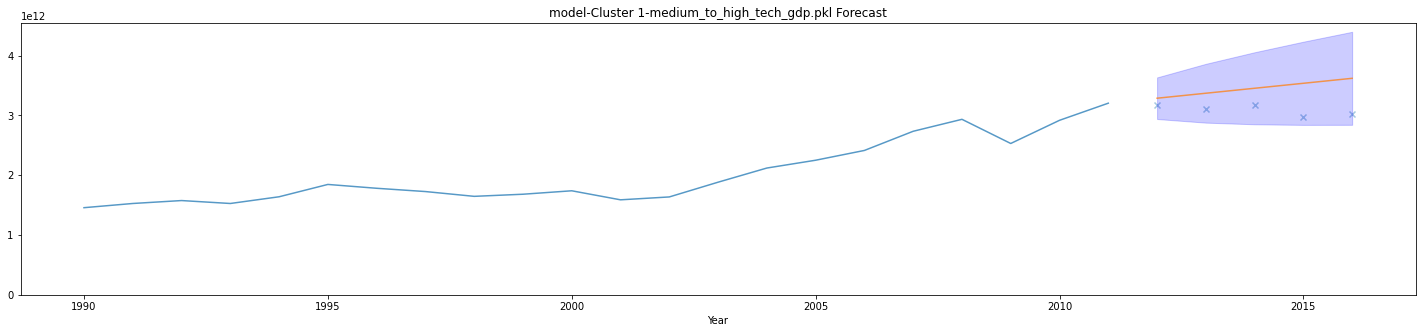

model-Cluster 1-medium_to_high_tech_gdp.pkl COMPLETED
FEATURE  co2_emission_per_constant_gdp REGION  Cluster 1
START  1960
ALT START  1970
Test RMSE: 0.310


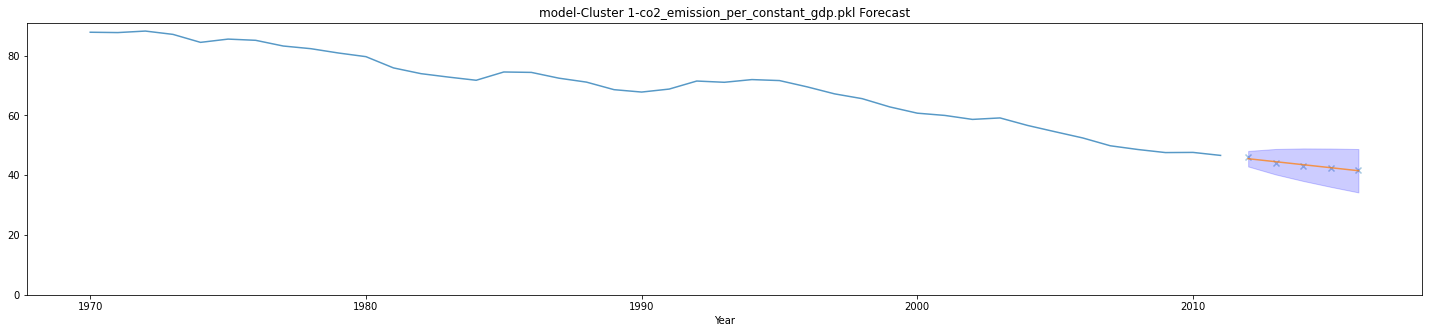

model-Cluster 1-co2_emission_per_constant_gdp.pkl COMPLETED
FEATURE  trade_openness REGION  Cluster 1
START  1960
ALT START  1960
Test RMSE: 569.284


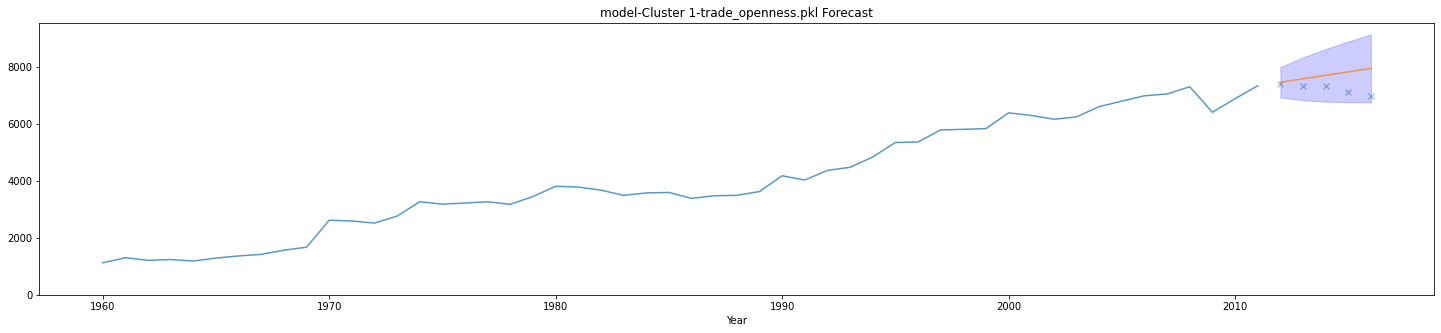

model-Cluster 1-trade_openness.pkl COMPLETED
FEATURE  share_of_merchandise_export REGION  Cluster 1
START  1960
ALT START  1960
Test RMSE: 417.252


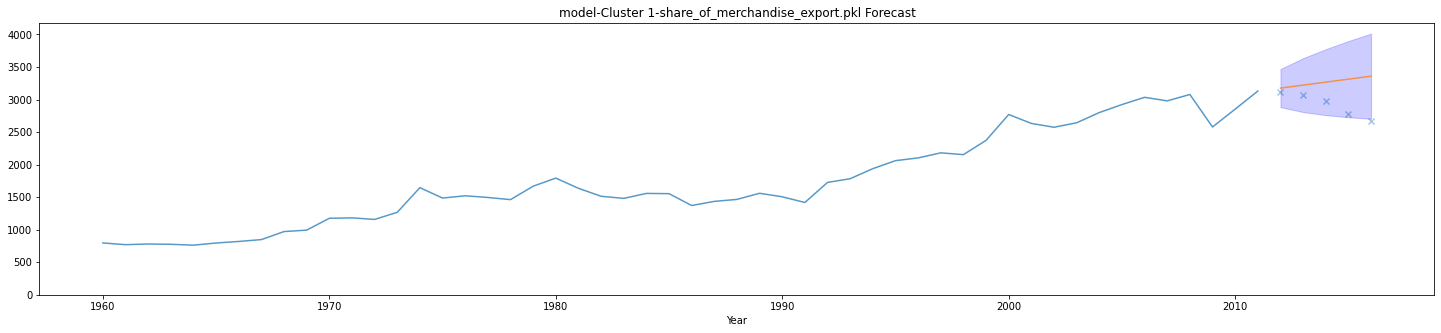

model-Cluster 1-share_of_merchandise_export.pkl COMPLETED
FEATURE  share_of_merchandise_import REGION  Cluster 1
START  1960
ALT START  1960
Test RMSE: 256.994


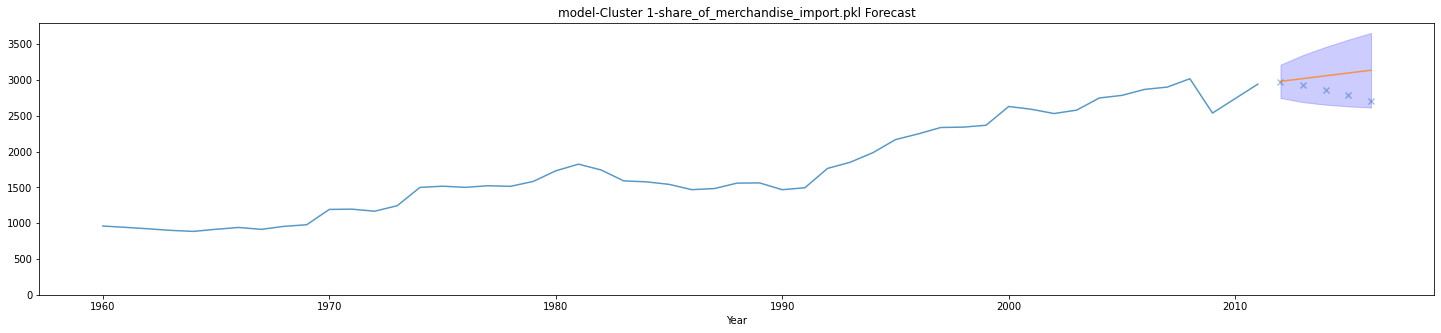

model-Cluster 1-share_of_merchandise_import.pkl COMPLETED
FEATURE  industrial_gdp REGION  Cluster 1
START  1960
ALT START  1960
Test RMSE: 3391168163719.274


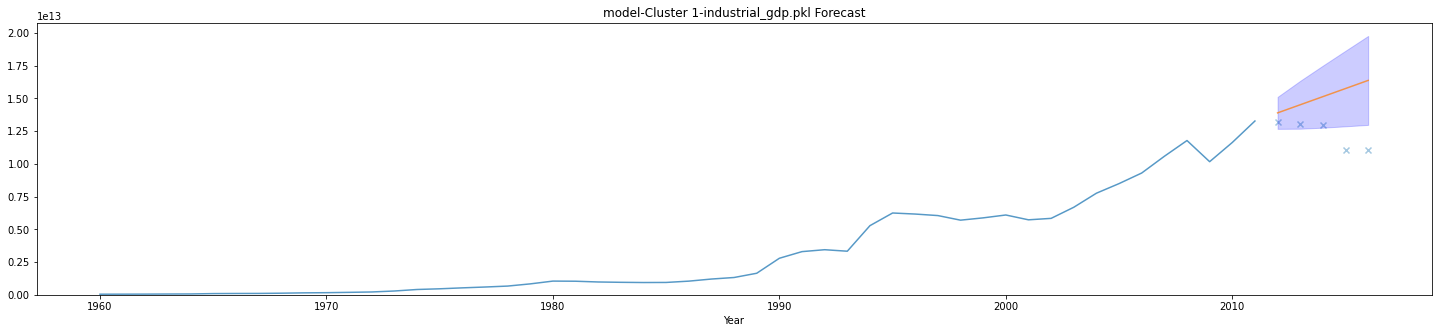

model-Cluster 1-industrial_gdp.pkl COMPLETED
FEATURE  co2_country_share_percent REGION  Cluster 1
START  1960
ALT START  1960
Test RMSE: 2.680


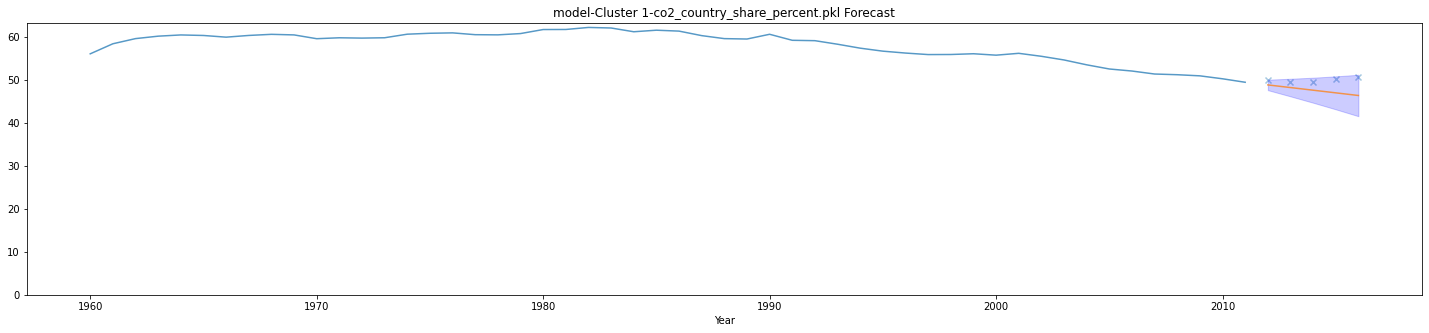

model-Cluster 1-co2_country_share_percent.pkl COMPLETED
FEATURE  manufacturing_country_share_percent REGION  Cluster 1
START  1960
ALT START  1960
Test RMSE: 3.354


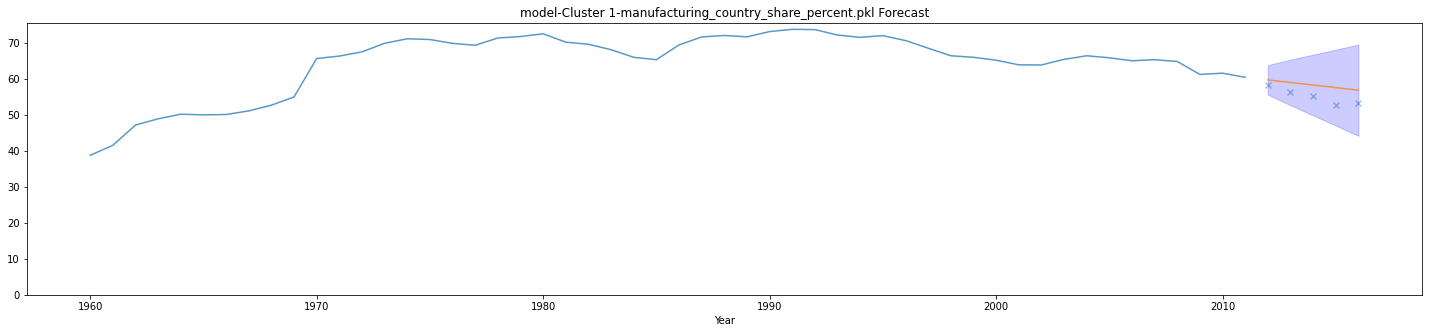

model-Cluster 1-manufacturing_country_share_percent.pkl COMPLETED
FEATURE  iea_primary_energy_consumption REGION  Cluster 1
START  1960
ALT START  1971
Test RMSE: 3831.783


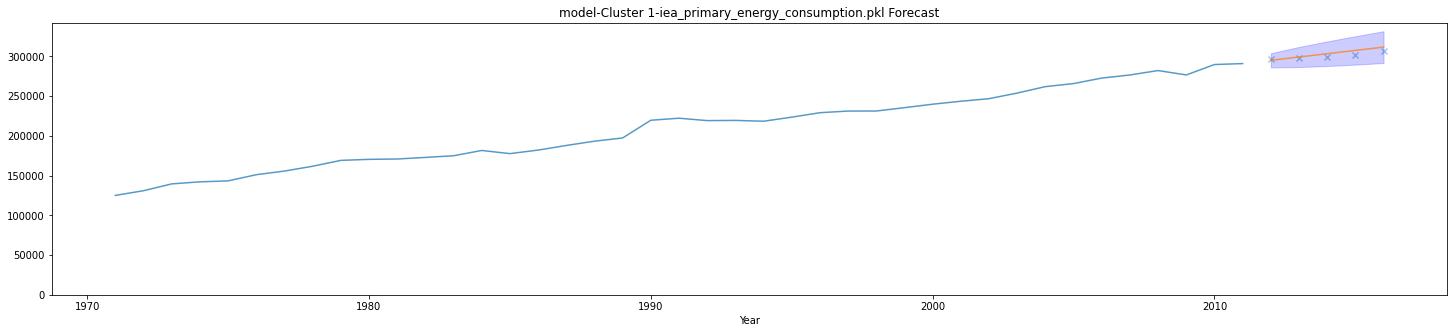

model-Cluster 1-iea_primary_energy_consumption.pkl COMPLETED
FEATURE  renewable_energy_consumption REGION  Cluster 1
START  1971
ALT START  1990
Test RMSE: 1413.495


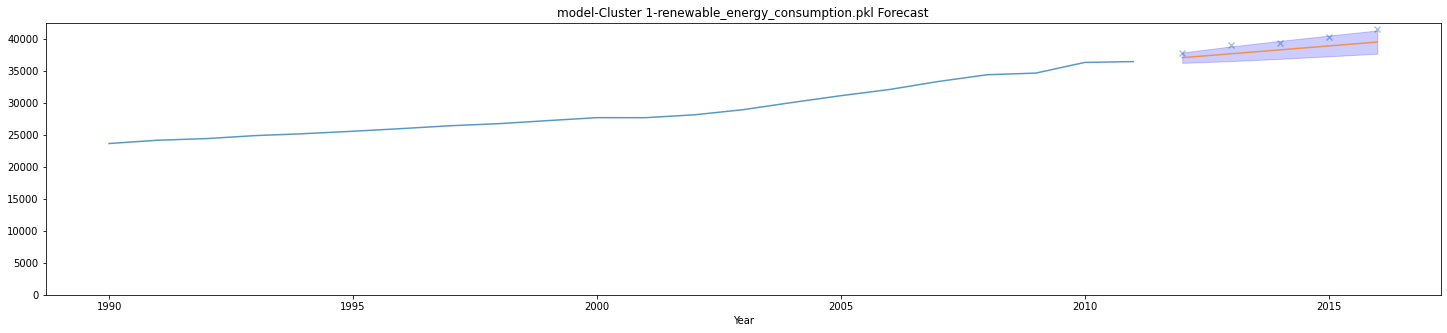

model-Cluster 1-renewable_energy_consumption.pkl COMPLETED
FEATURE  coal_consumption REGION  Cluster 1
START  1971
ALT START  1971
Test RMSE: 999.914


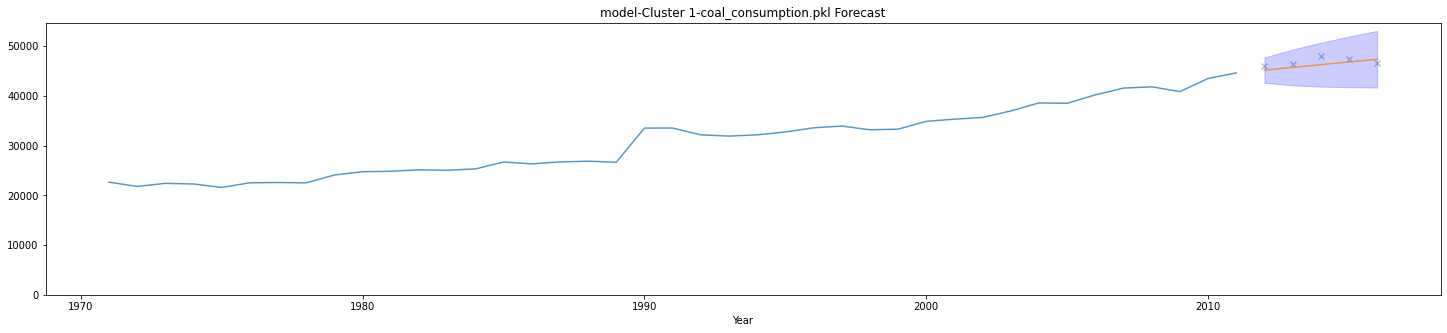

model-Cluster 1-coal_consumption.pkl COMPLETED
FEATURE  oil_consumption REGION  Cluster 1
START  1971
ALT START  1971
Test RMSE: 1180.619


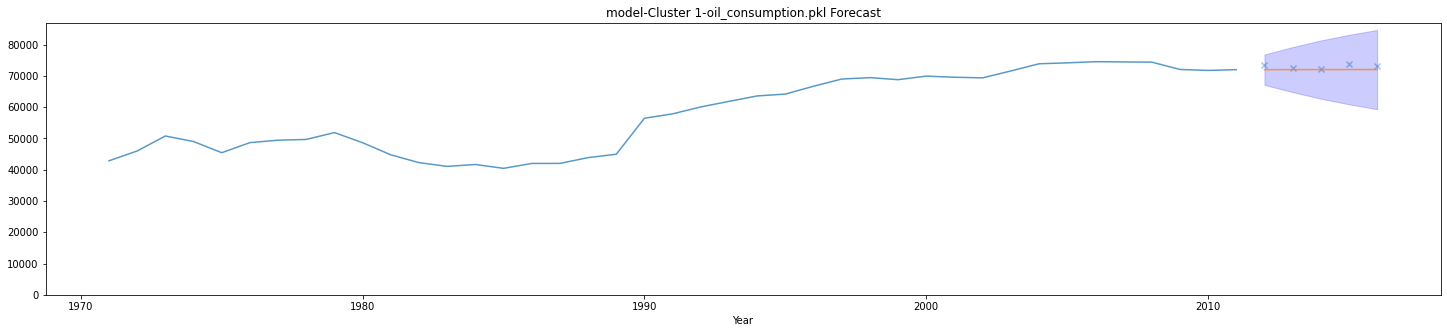

model-Cluster 1-oil_consumption.pkl COMPLETED
FEATURE  total_electricity_production REGION  Cluster 1
START  1971
ALT START  1971
Test RMSE: 172737.897


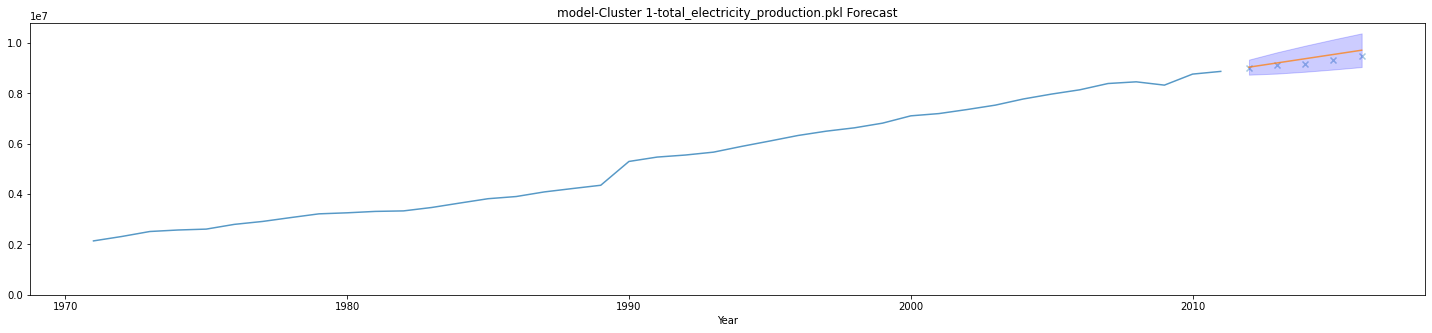

model-Cluster 1-total_electricity_production.pkl COMPLETED
FEATURE  electricity_production_from_renewable REGION  Cluster 1
START  1971
ALT START  1971
Test RMSE: 192848.431


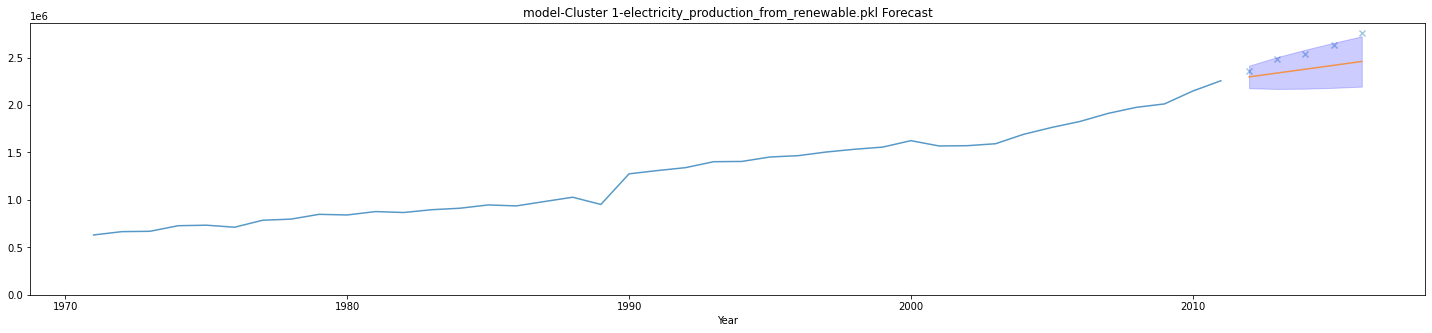

model-Cluster 1-electricity_production_from_renewable.pkl COMPLETED
FEATURE  primary_energy_consumption_per_capita REGION  Cluster 1
START  1960
ALT START  1971
Test RMSE: 12146.391


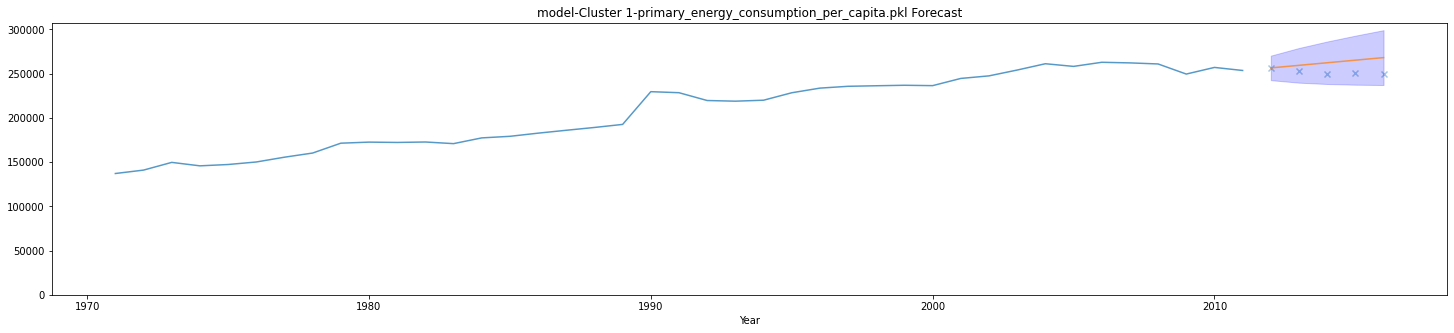

model-Cluster 1-primary_energy_consumption_per_capita.pkl COMPLETED
FEATURE  fossil_energy_consumption_share REGION  Cluster 1
START  1971
ALT START  1971
Test RMSE: 42.310


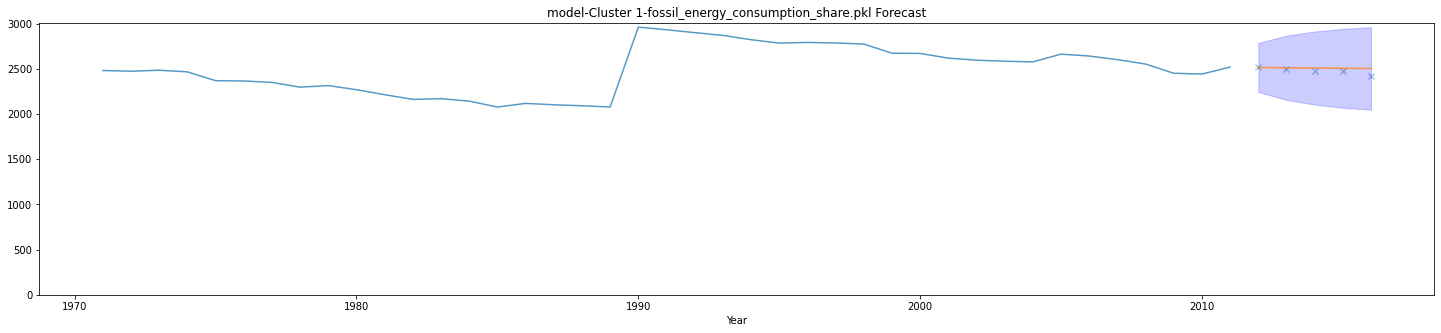

model-Cluster 1-fossil_energy_consumption_share.pkl COMPLETED
FEATURE  renewable_electricity_production_share REGION  Cluster 1
START  1971
ALT START  1990
Test RMSE: 213.413


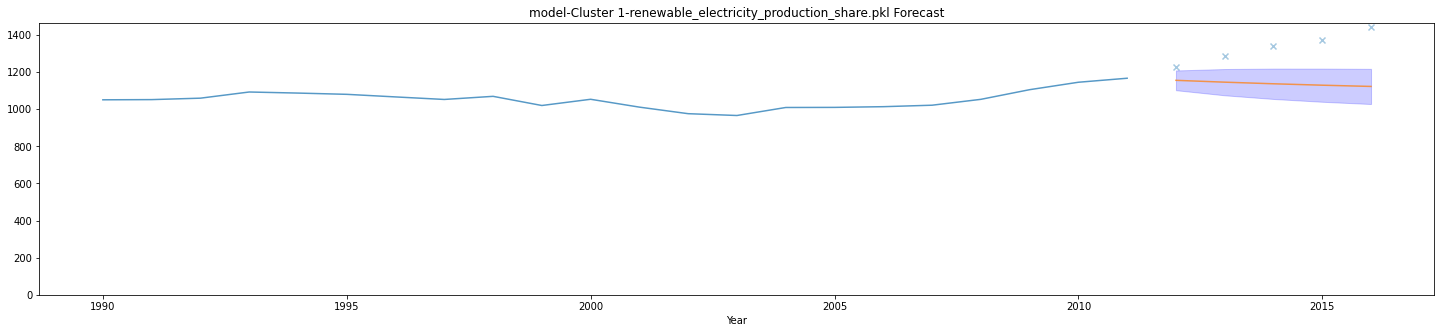

model-Cluster 1-renewable_electricity_production_share.pkl COMPLETED
FEATURE  energy_intensity REGION  Cluster 1
START  1960
ALT START  1990
Test RMSE: 0.568


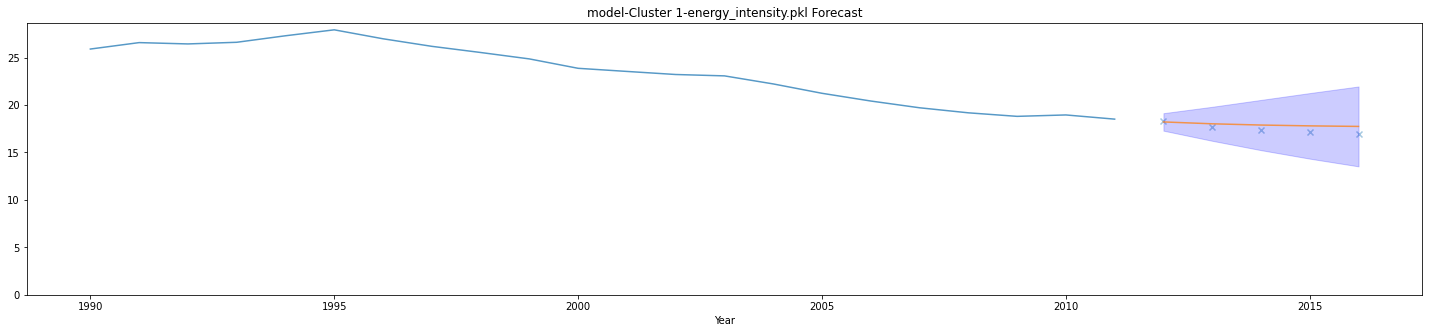

model-Cluster 1-energy_intensity.pkl COMPLETED
FEATURE  renewable_energy_consumption_share REGION  Cluster 1
START  1971
ALT START  1990
Test RMSE: 101.203


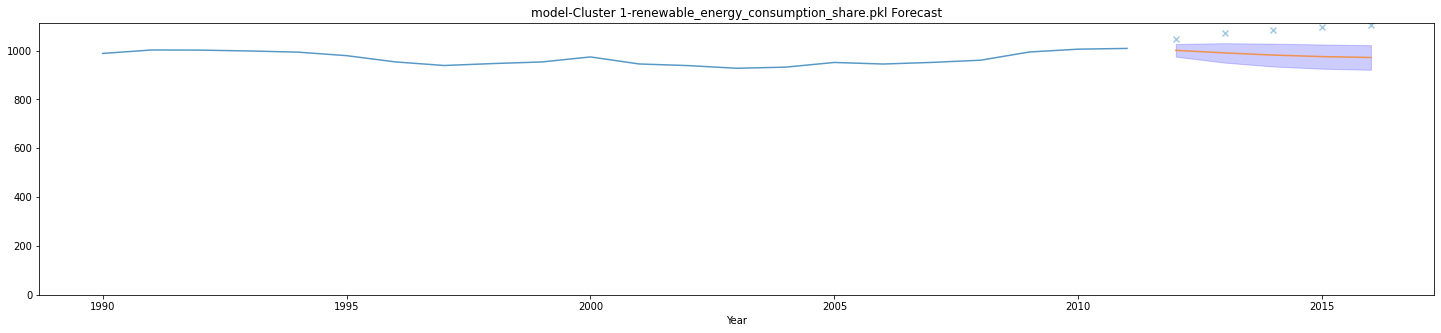

model-Cluster 1-renewable_energy_consumption_share.pkl COMPLETED
FEATURE  percent_of_environment_patent REGION  Cluster 1
START  1960
ALT START  1960
Test RMSE: 153.339


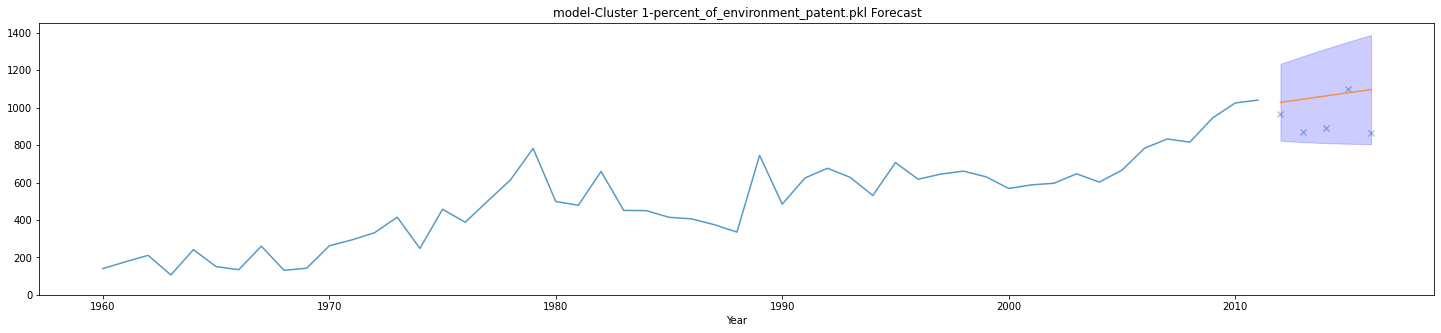

model-Cluster 1-percent_of_environment_patent.pkl COMPLETED
FEATURE  consumption_co2 REGION  Cluster 2
START  1990
ALT START  1990
Test RMSE: 1546.464


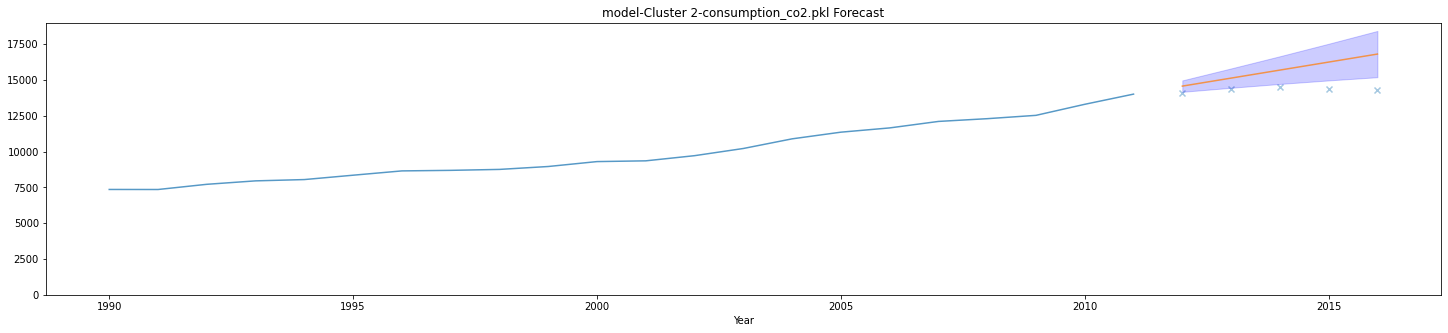

model-Cluster 2-consumption_co2.pkl COMPLETED
FEATURE  co2_growth_prct REGION  Cluster 2
START  1752
ALT START  1752
Test RMSE: 22.571


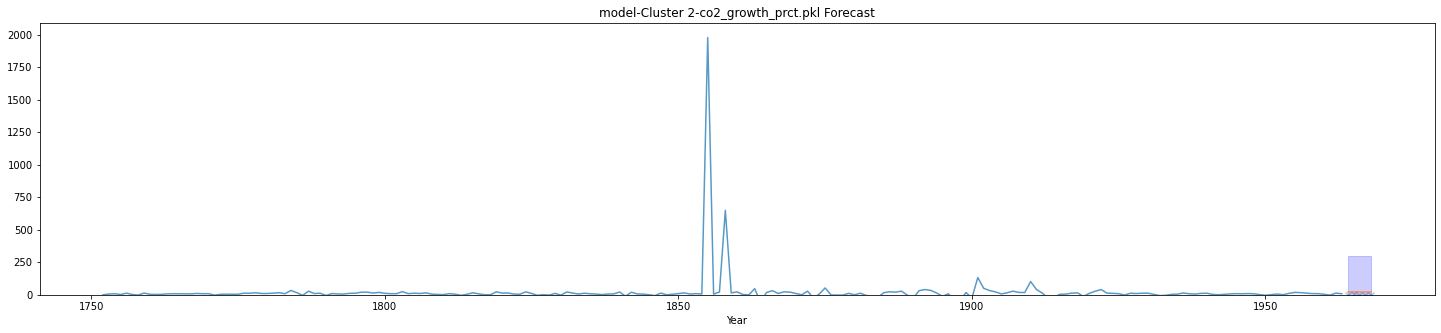

model-Cluster 2-co2_growth_prct.pkl COMPLETED
FEATURE  co2_growth_abs REGION  Cluster 2
START  1752
ALT START  1752
Test RMSE: 579.078


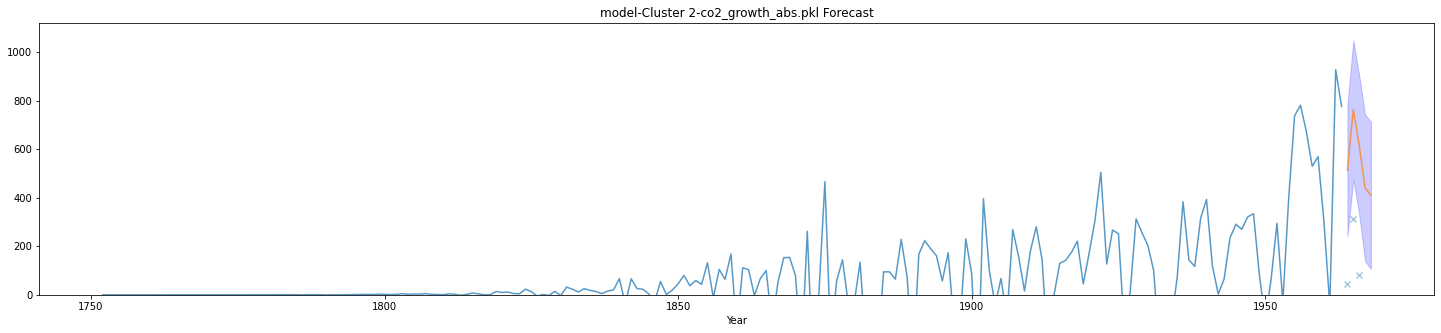

model-Cluster 2-co2_growth_abs.pkl COMPLETED
FEATURE  trade_co2 REGION  Cluster 2
START  1990
ALT START  1990
Test RMSE: 197.683


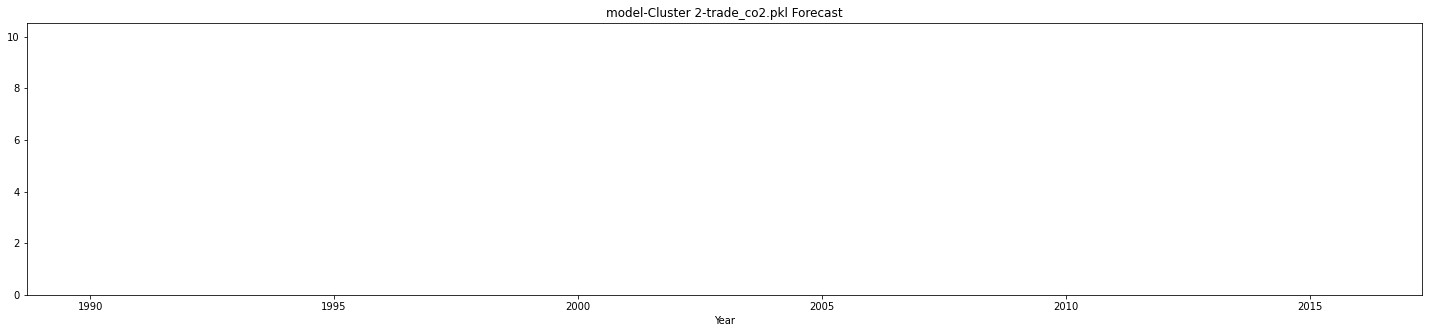

model-Cluster 2-trade_co2.pkl COMPLETED
FEATURE  co2_per_capita REGION  Cluster 2
START  1750
ALT START  1950
Test RMSE: 1.331


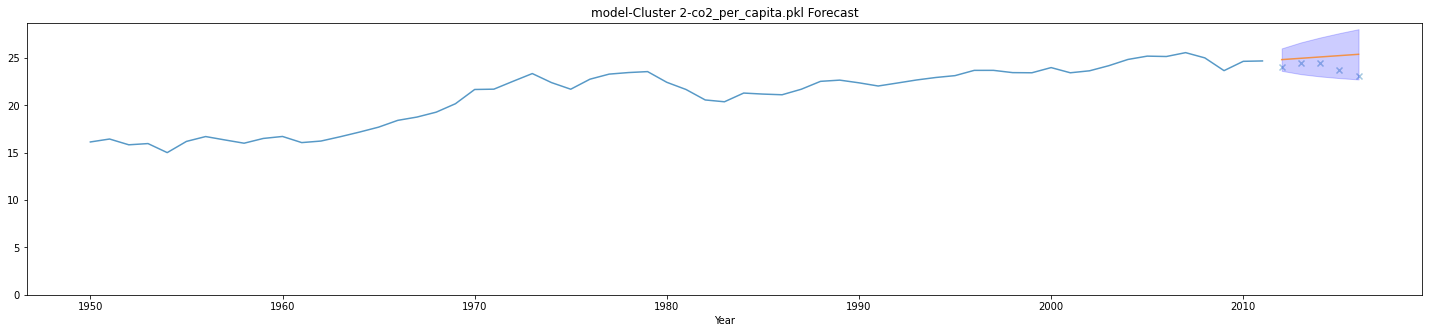

model-Cluster 2-co2_per_capita.pkl COMPLETED
FEATURE  consumption_co2_per_capita REGION  Cluster 2
START  1990
ALT START  1990
Test RMSE: 0.910


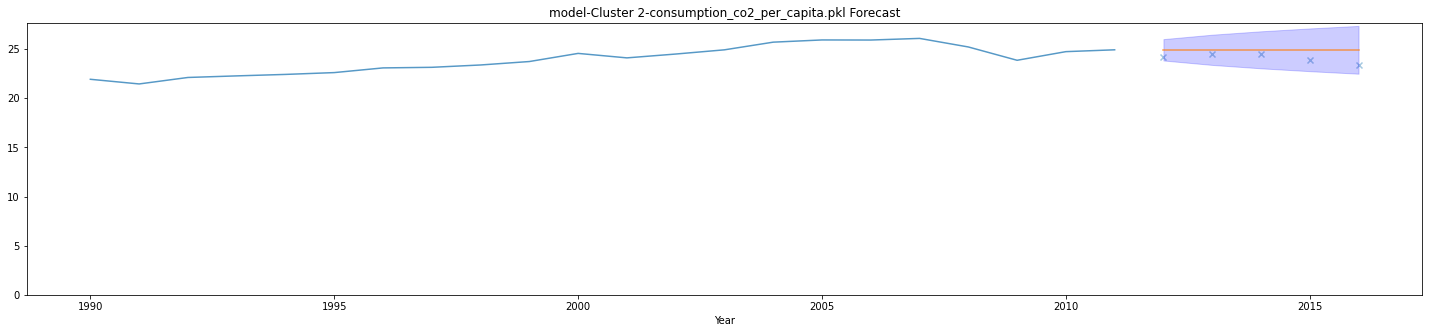

model-Cluster 2-consumption_co2_per_capita.pkl COMPLETED
FEATURE  share_global_co2 REGION  Cluster 2
START  1750
ALT START  1750
Test RMSE: 1.580


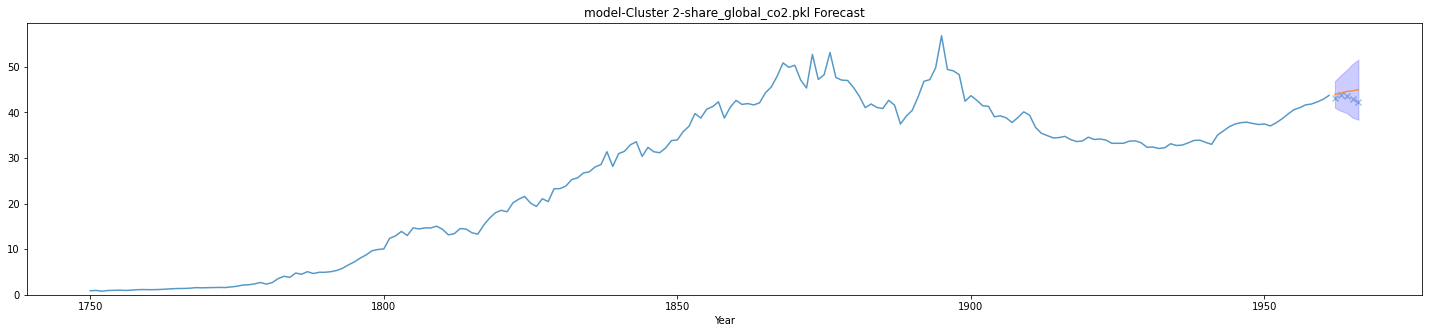

model-Cluster 2-share_global_co2.pkl COMPLETED
FEATURE  cumulative_co2 REGION  Cluster 2
START  1750
ALT START  1750
Test RMSE: 4408.543


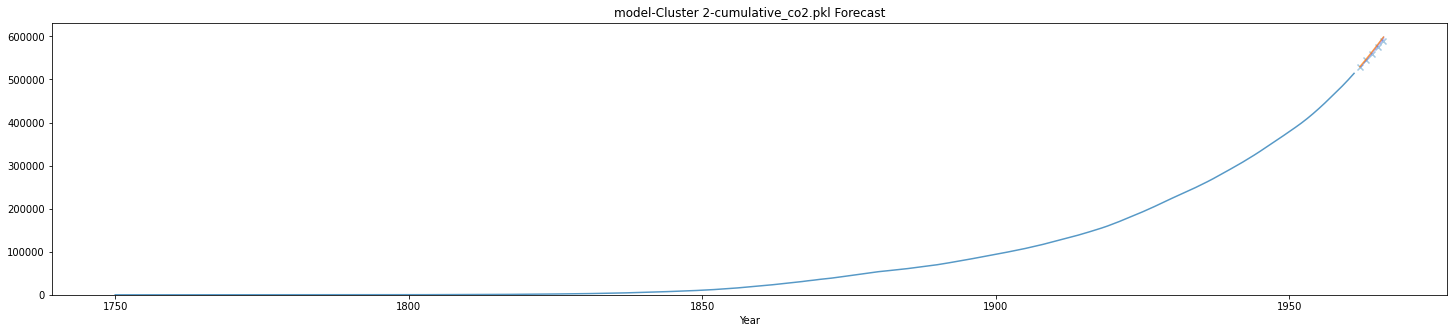

model-Cluster 2-cumulative_co2.pkl COMPLETED
FEATURE  share_global_cumulative_co2 REGION  Cluster 2
START  1750
ALT START  1750
Test RMSE: 0.082


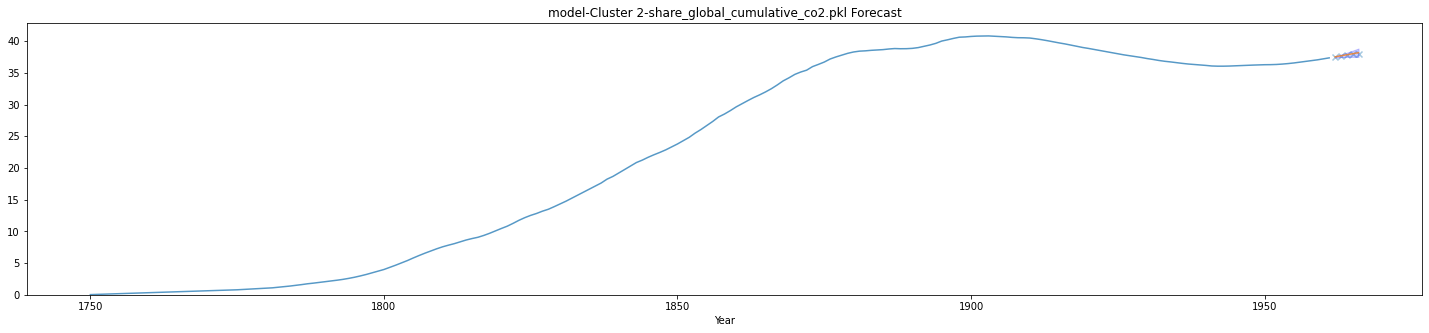

model-Cluster 2-share_global_cumulative_co2.pkl COMPLETED
FEATURE  co2_per_gdp REGION  Cluster 2
START  1820
ALT START  1950
Test RMSE: 0.148


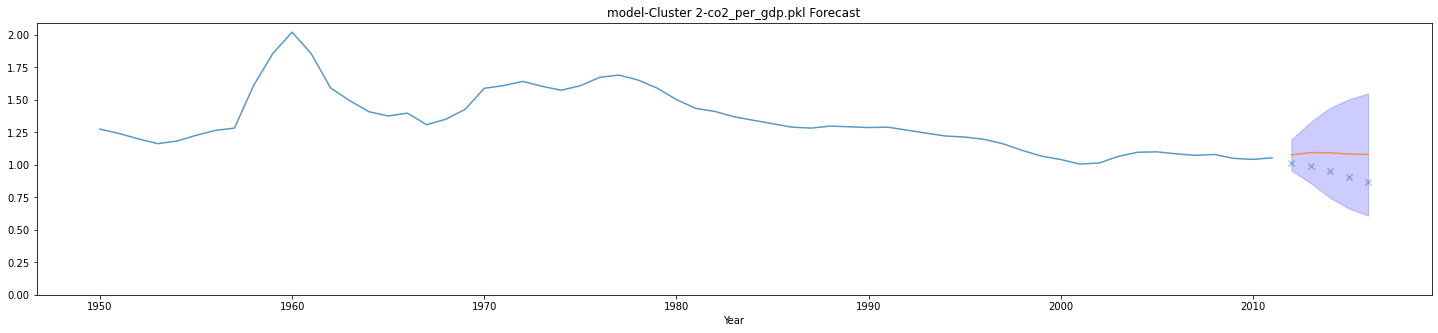

model-Cluster 2-co2_per_gdp.pkl COMPLETED
FEATURE  consumption_co2_per_gdp REGION  Cluster 2
START  1990
ALT START  1990
Test RMSE: 0.085


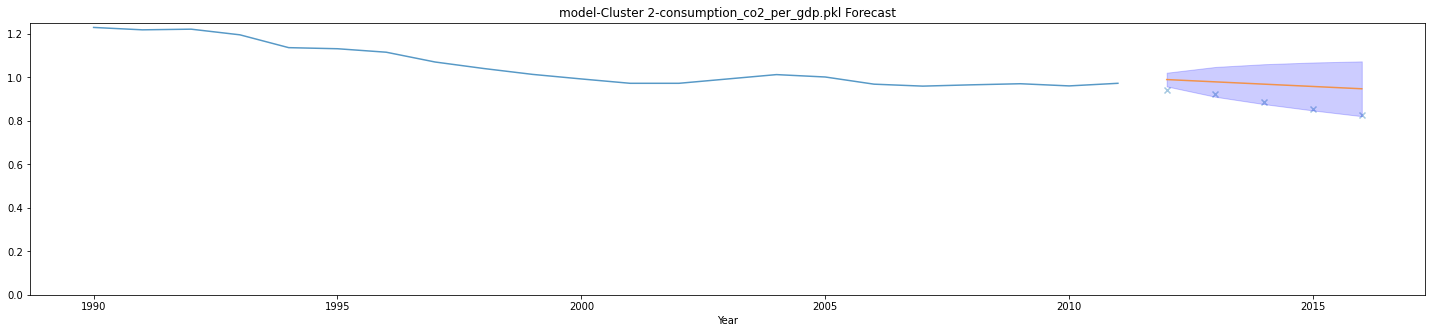

model-Cluster 2-consumption_co2_per_gdp.pkl COMPLETED
FEATURE  co2_per_unit_energy REGION  Cluster 2
START  1965
ALT START  1980
Test RMSE: 0.025


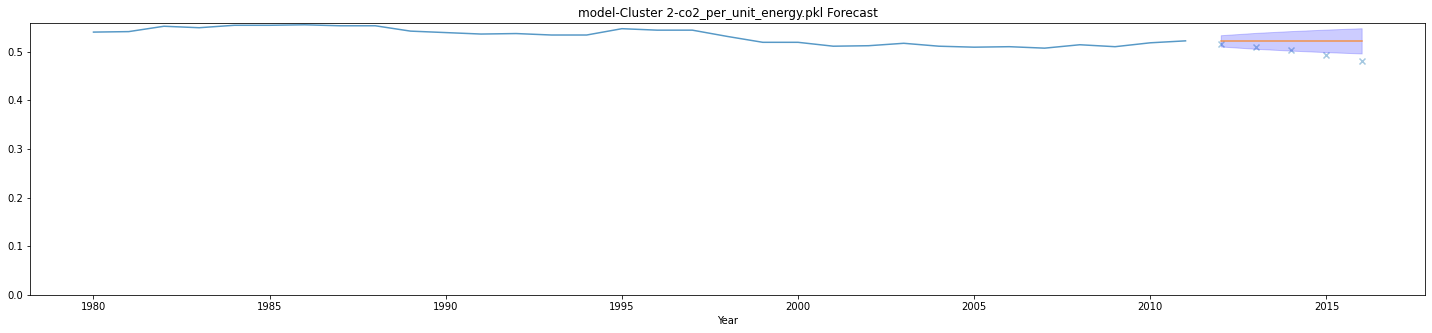

model-Cluster 2-co2_per_unit_energy.pkl COMPLETED
FEATURE  coal_co2 REGION  Cluster 2
START  1750
ALT START  1750
Test RMSE: 1753.782


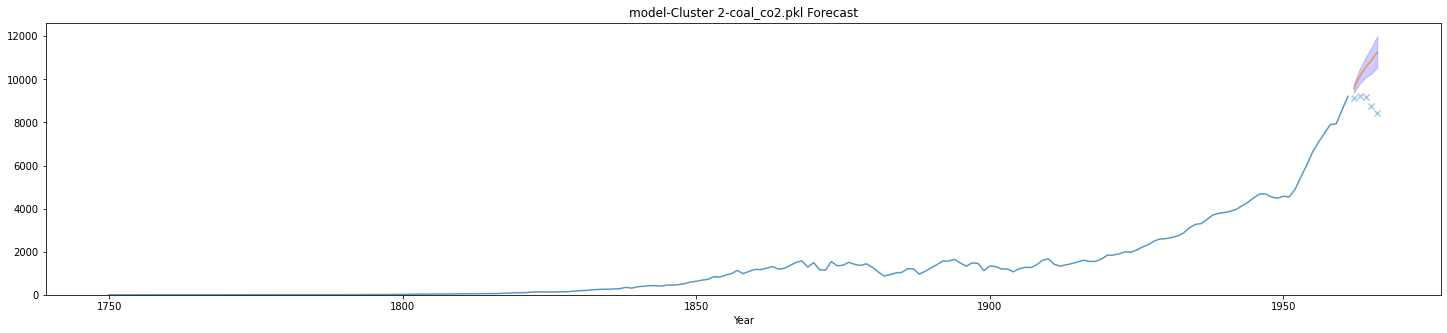

model-Cluster 2-coal_co2.pkl COMPLETED
FEATURE  coal_co2_per_capita REGION  Cluster 2
START  1750
ALT START  1750
Test RMSE: 1.336


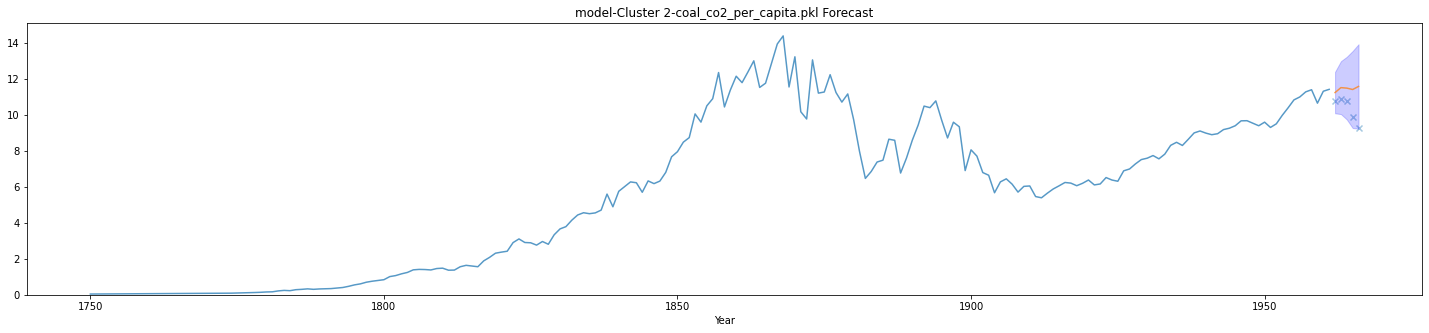

model-Cluster 2-coal_co2_per_capita.pkl COMPLETED
FEATURE  share_global_coal_co2 REGION  Cluster 2
START  1750
ALT START  1750
Test RMSE: 3.350


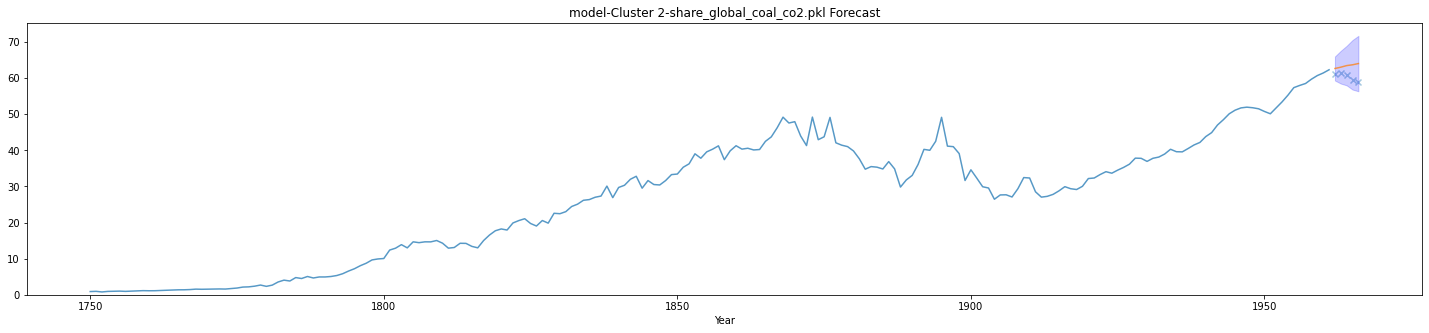

model-Cluster 2-share_global_coal_co2.pkl COMPLETED
FEATURE  cumulative_coal_co2 REGION  Cluster 2
START  1750
ALT START  1750
Test RMSE: 4286.799


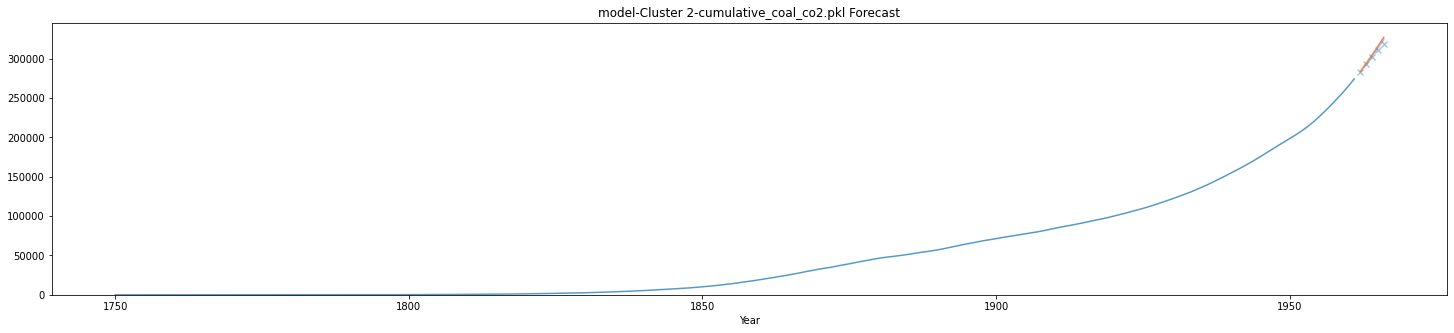

model-Cluster 2-cumulative_coal_co2.pkl COMPLETED
FEATURE  share_global_cumulative_coal_co2 REGION  Cluster 2
START  1750
ALT START  1750
Test RMSE: 0.267


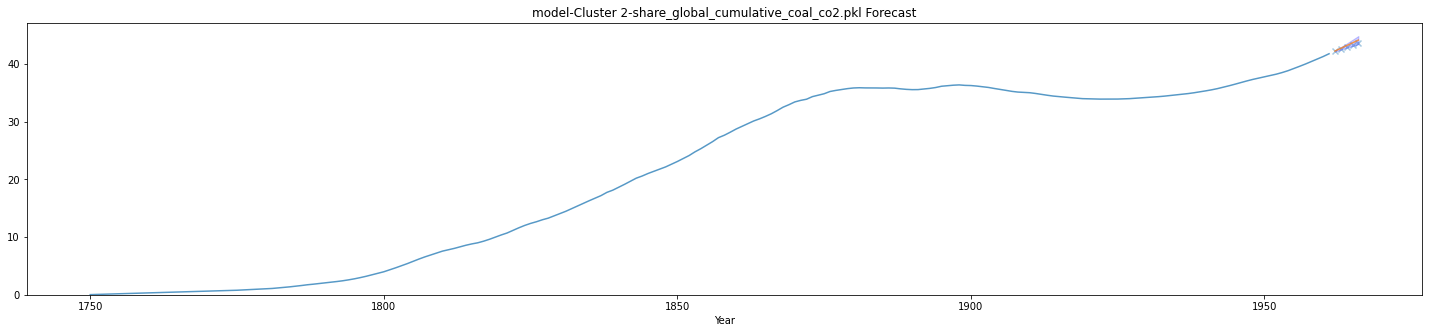

model-Cluster 2-share_global_cumulative_coal_co2.pkl COMPLETED
FEATURE  gas_co2 REGION  Cluster 2
START  1882
ALT START  1882
Test RMSE: 114.744


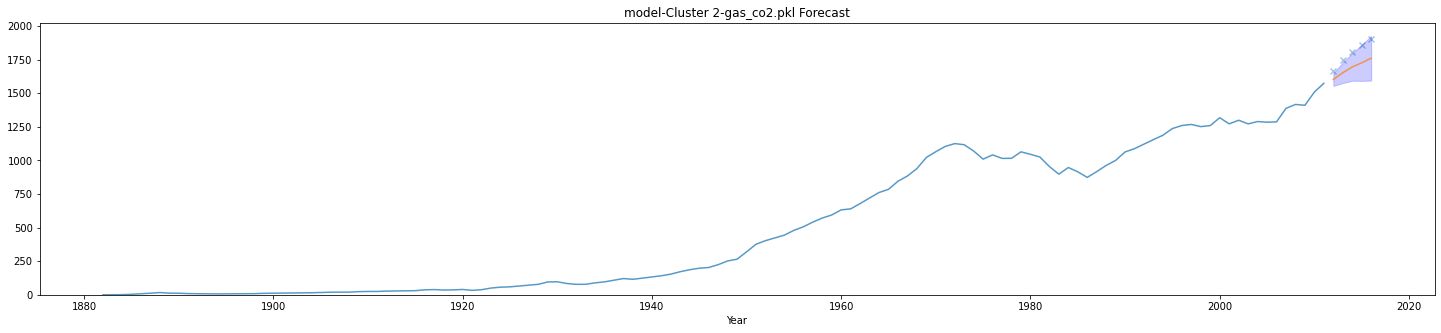

model-Cluster 2-gas_co2.pkl COMPLETED
FEATURE  oil_co2 REGION  Cluster 2
START  1855
ALT START  1855
Test RMSE: 116.017


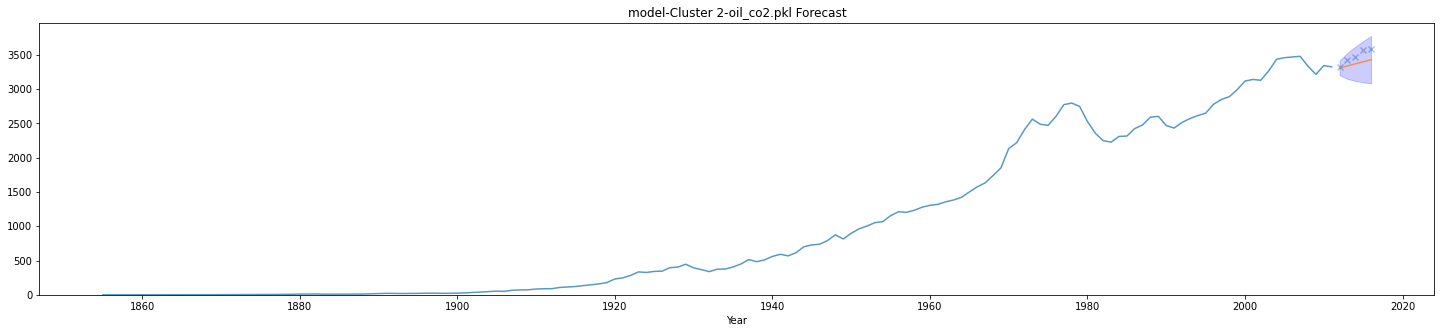

model-Cluster 2-oil_co2.pkl COMPLETED
FEATURE  gas_co2_per_capita REGION  Cluster 2
START  1882
ALT START  1882
Test RMSE: 0.222


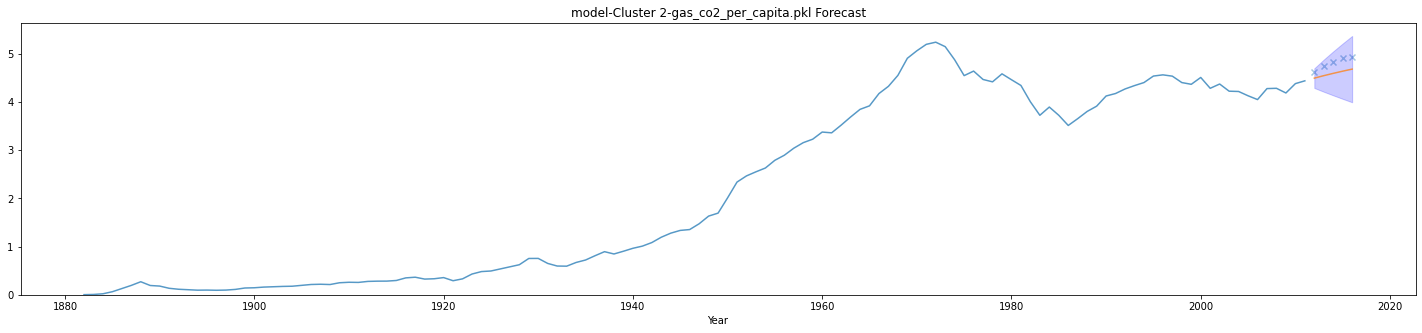

model-Cluster 2-gas_co2_per_capita.pkl COMPLETED
FEATURE  share_global_gas_co2 REGION  Cluster 2
START  1882
ALT START  1882
Test RMSE: 2.082


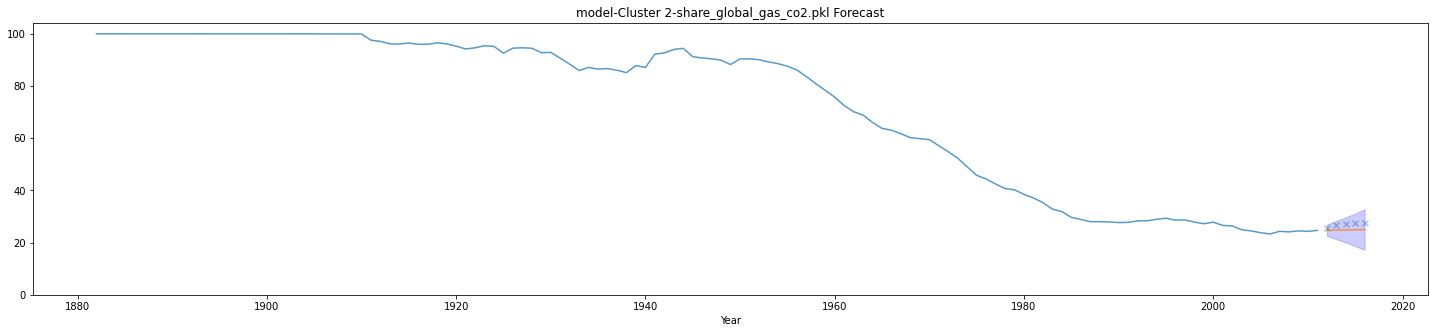

model-Cluster 2-share_global_gas_co2.pkl COMPLETED
FEATURE  cumulative_gas_co2 REGION  Cluster 2
START  1882
ALT START  1882
Test RMSE: 340.914


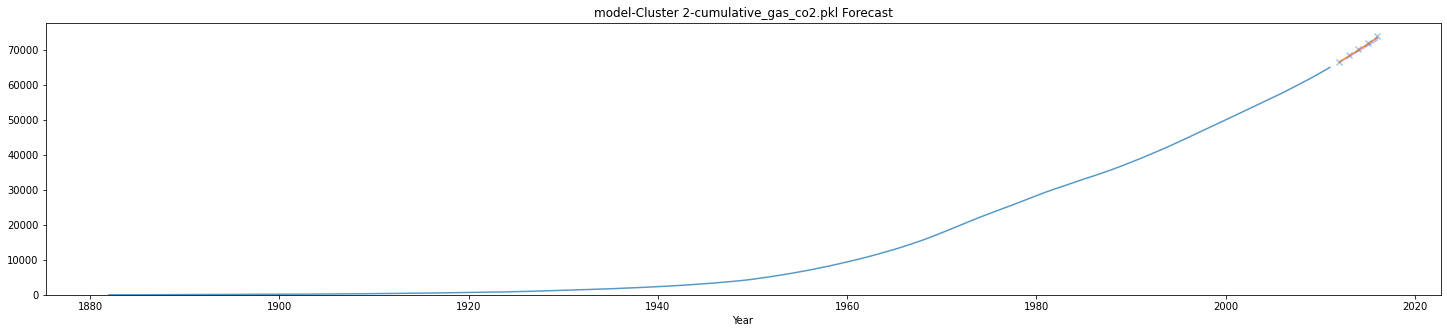

model-Cluster 2-cumulative_gas_co2.pkl COMPLETED
FEATURE  share_global_cumulative_gas_co2 REGION  Cluster 2
START  1882
ALT START  1882
Test RMSE: 0.285


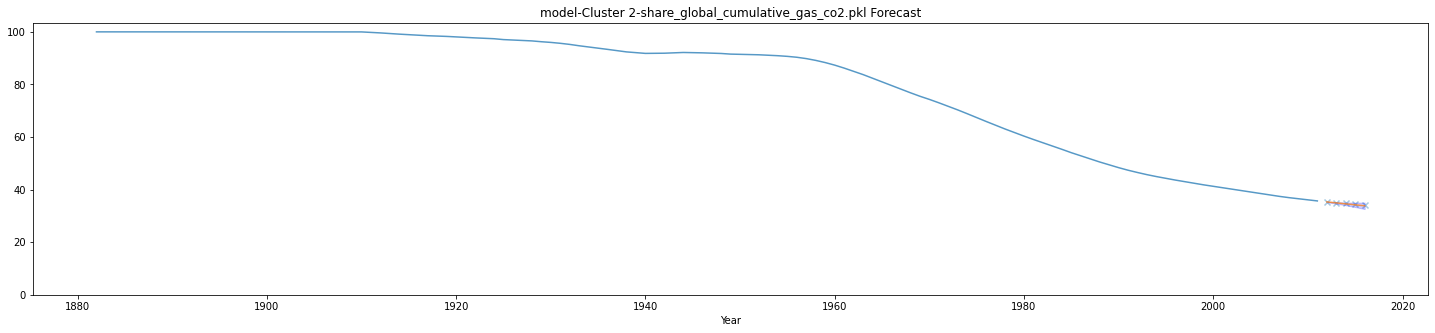

model-Cluster 2-share_global_cumulative_gas_co2.pkl COMPLETED
FEATURE  oil_co2_per_capita REGION  Cluster 2
START  1855
ALT START  1950
Test RMSE: 0.151


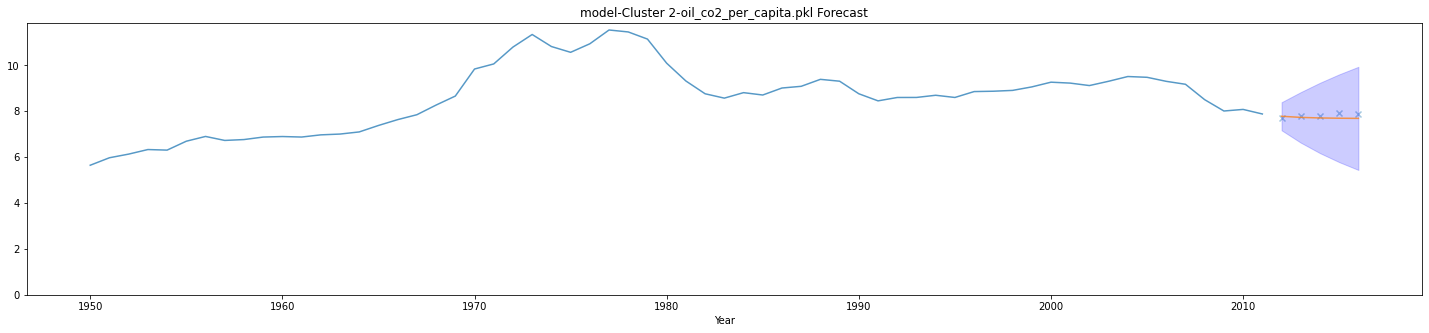

model-Cluster 2-oil_co2_per_capita.pkl COMPLETED
FEATURE  cumulative_oil_co2 REGION  Cluster 2
START  1855
ALT START  1855
Test RMSE: 298.331


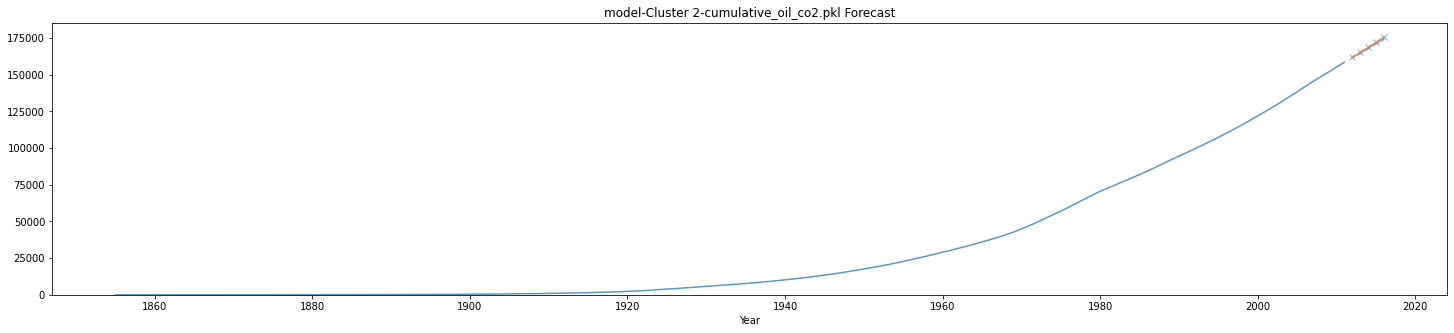

model-Cluster 2-cumulative_oil_co2.pkl COMPLETED
FEATURE  share_global_cumulative_oil_co2 REGION  Cluster 2
START  1855
ALT START  1855
Test RMSE: 0.173


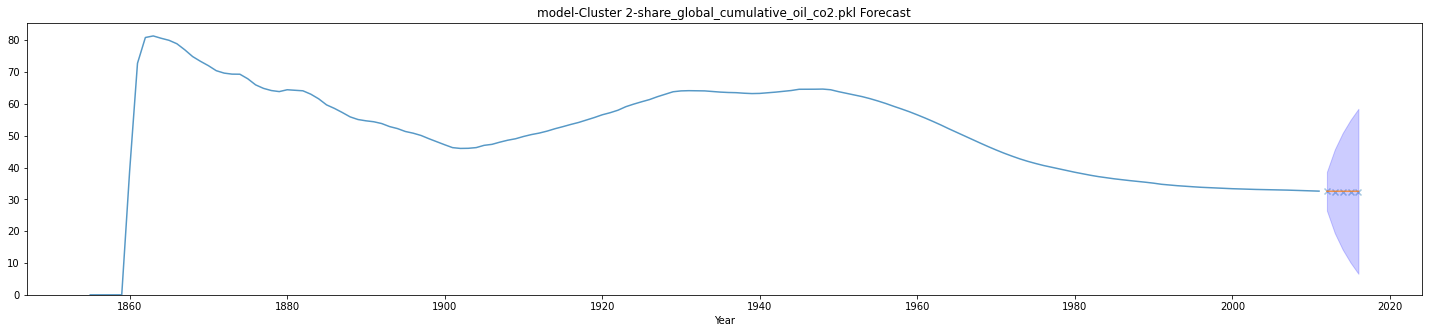

model-Cluster 2-share_global_cumulative_oil_co2.pkl COMPLETED
FEATURE  other_co2_per_capita REGION  Cluster 2
START  1904
ALT START  1990
Test RMSE: 0.023


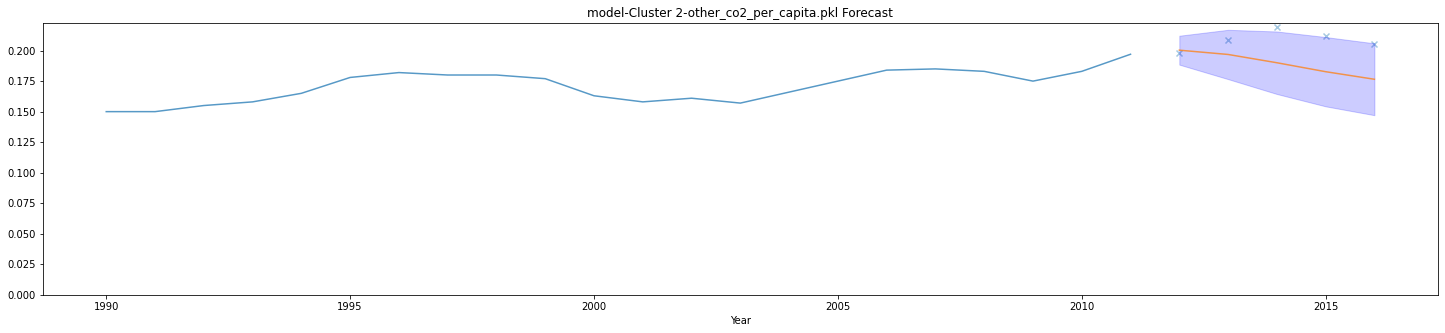

model-Cluster 2-other_co2_per_capita.pkl COMPLETED
FEATURE  trade_co2_share REGION  Cluster 2
START  1990
ALT START  1990
Test RMSE: 3.304


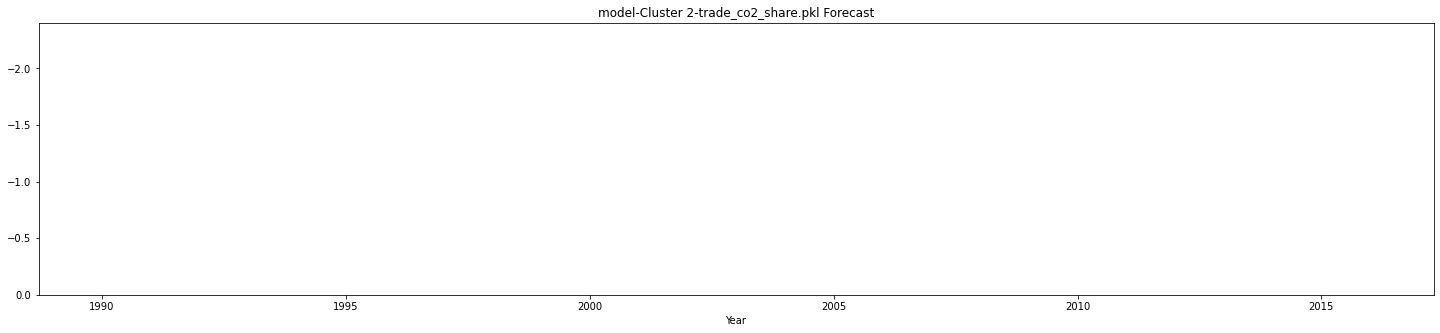

model-Cluster 2-trade_co2_share.pkl COMPLETED
FEATURE  share_global_oil_co2 REGION  Cluster 2
START  1855
ALT START  1855
Test RMSE: 0.545


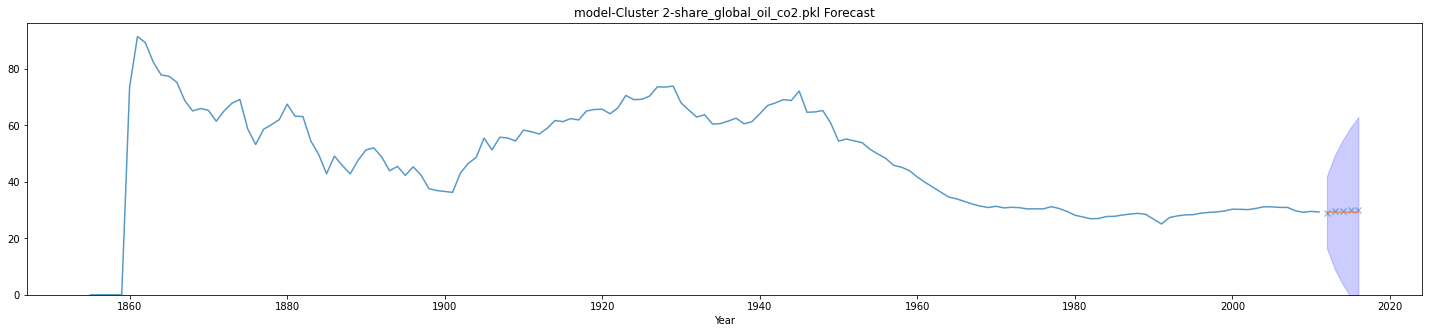

model-Cluster 2-share_global_oil_co2.pkl COMPLETED
FEATURE  cumulative_other_co2 REGION  Cluster 2
START  1904
ALT START  1904
Test RMSE: 8.192


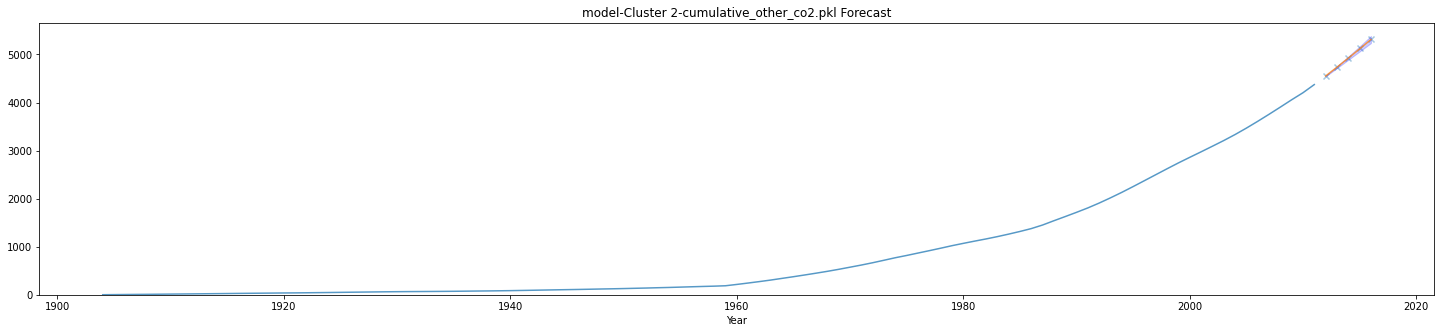

model-Cluster 2-cumulative_other_co2.pkl COMPLETED
FEATURE  share_global_other_co2 REGION  Cluster 2
START  1904
ALT START  1904
Test RMSE: 2.658


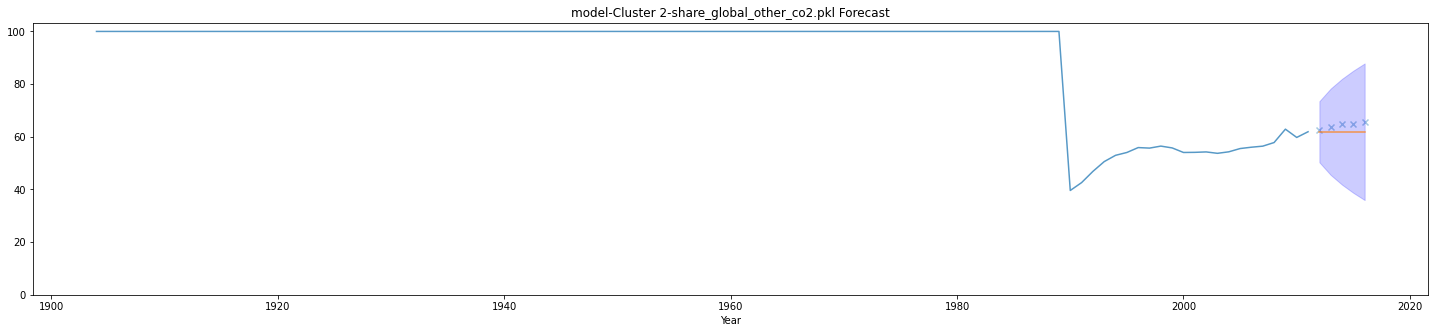

model-Cluster 2-share_global_other_co2.pkl COMPLETED
FEATURE  share_global_cumulative_other_co2 REGION  Cluster 2
START  1904
ALT START  1904
Test RMSE: 1.195


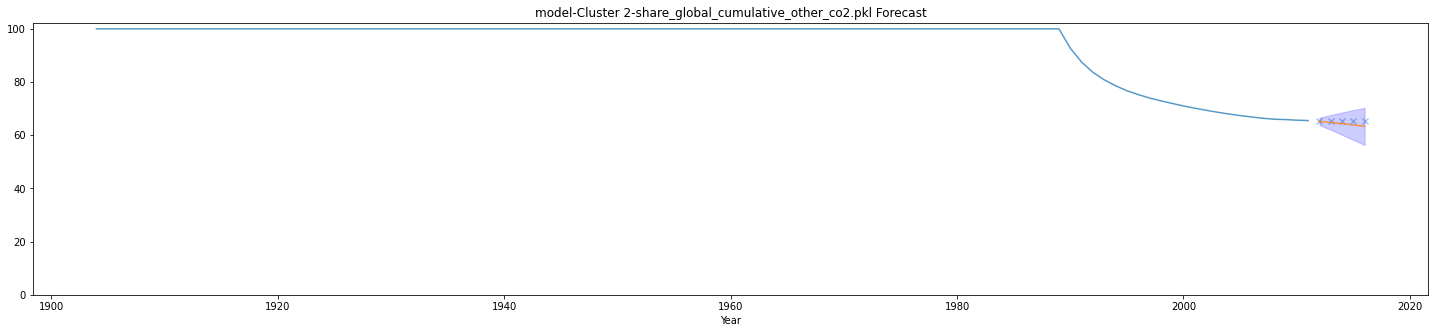

model-Cluster 2-share_global_cumulative_other_co2.pkl COMPLETED
FEATURE  population REGION  Cluster 2
START  1750
ALT START  1750
Test RMSE: 13753776.247


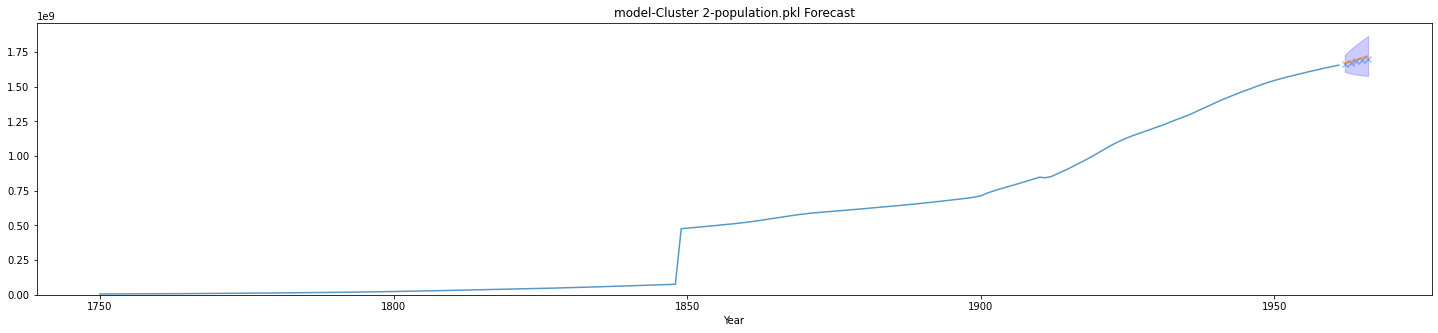

model-Cluster 2-population.pkl COMPLETED
FEATURE  gdp REGION  Cluster 2
START  1820
ALT START  1820
Test RMSE: 478942298837.268


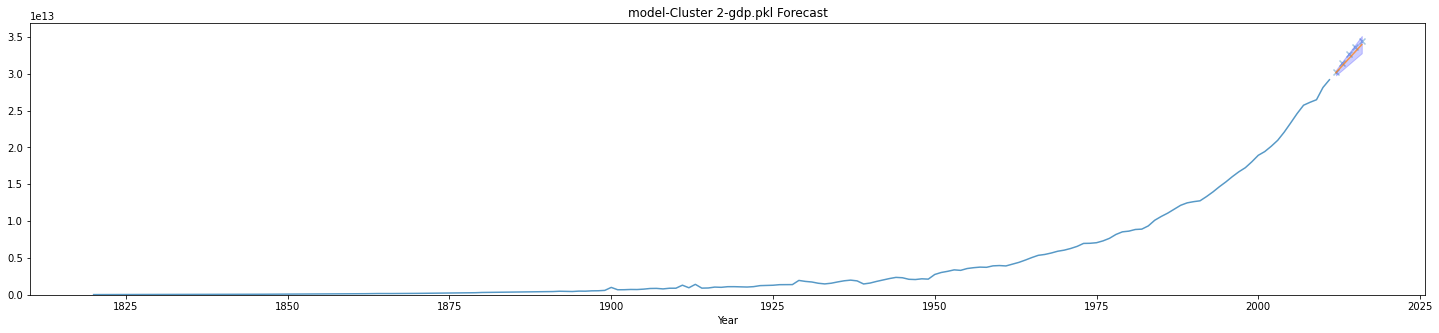

model-Cluster 2-gdp.pkl COMPLETED
FEATURE  primary_energy_consumption REGION  Cluster 2
START  1965
ALT START  1980
Test RMSE: 3799.422


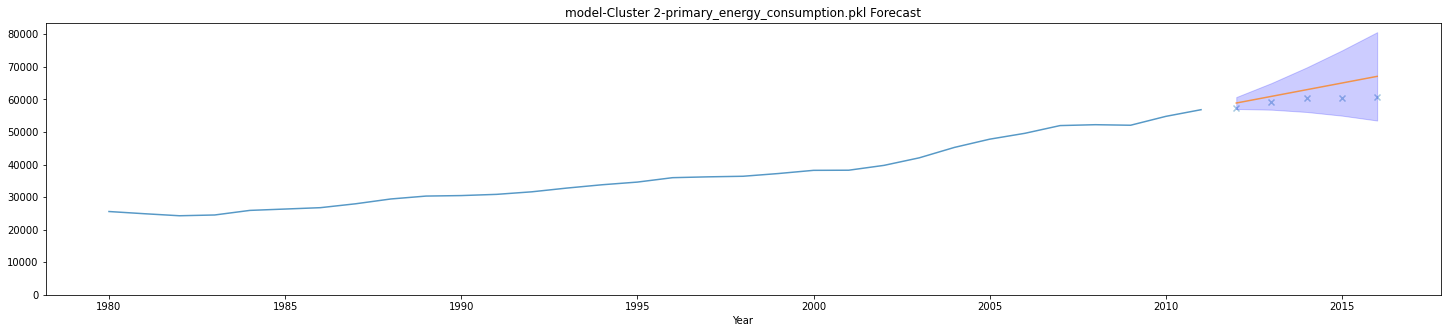

model-Cluster 2-primary_energy_consumption.pkl COMPLETED
FEATURE  energy_per_capita REGION  Cluster 2
START  1965
ALT START  1980
Test RMSE: 2192.461


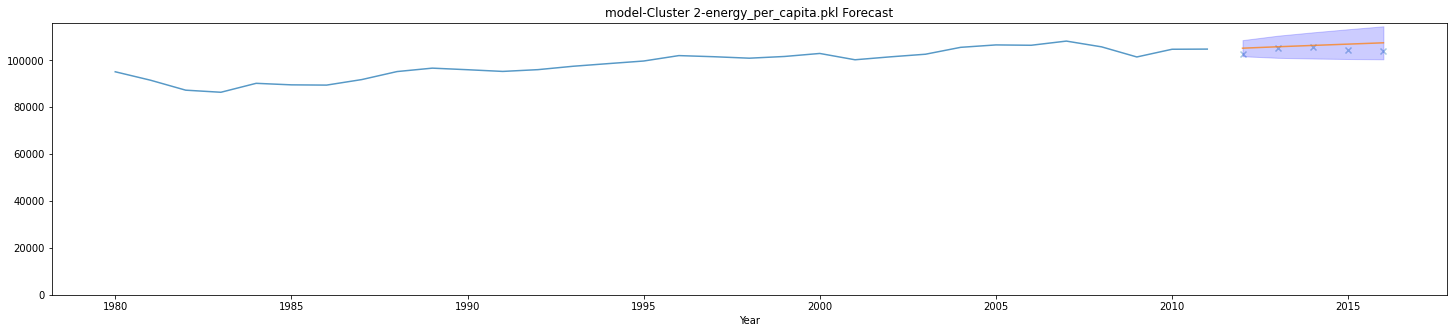

model-Cluster 2-energy_per_capita.pkl COMPLETED
FEATURE  energy_per_gdp REGION  Cluster 2
START  1965
ALT START  1980
Test RMSE: 0.052


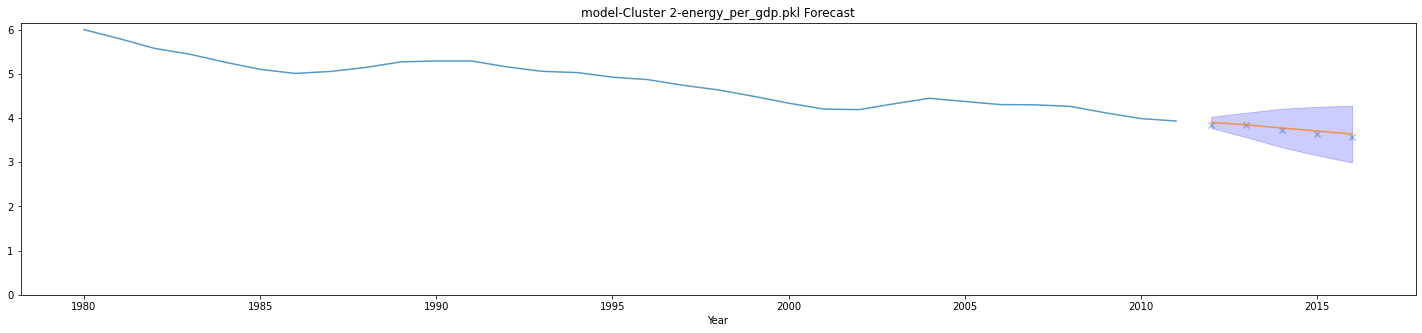

model-Cluster 2-energy_per_gdp.pkl COMPLETED
FEATURE  current_gdp REGION  Cluster 2
START  1960
ALT START  1960
Test RMSE: 1008996389321.392


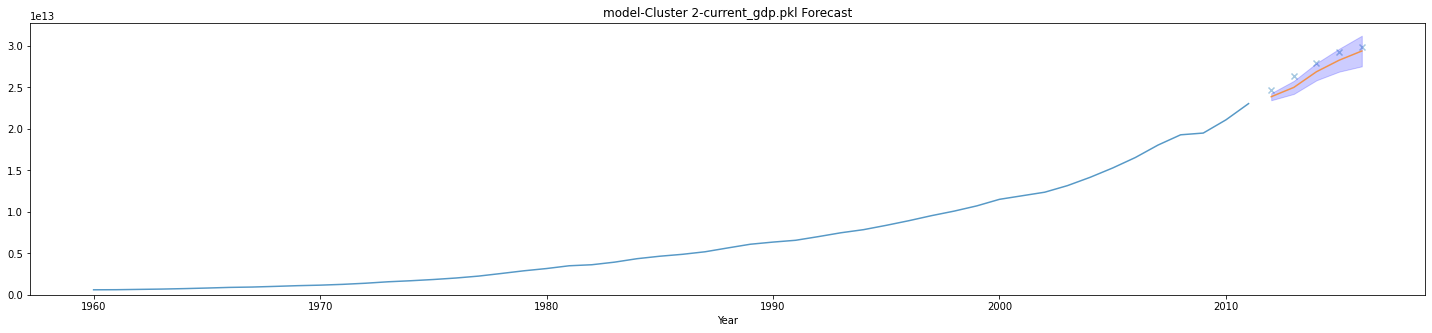

model-Cluster 2-current_gdp.pkl COMPLETED
FEATURE  constant_gdp REGION  Cluster 2
START  1960
ALT START  1960
Test RMSE: 681490116663.530


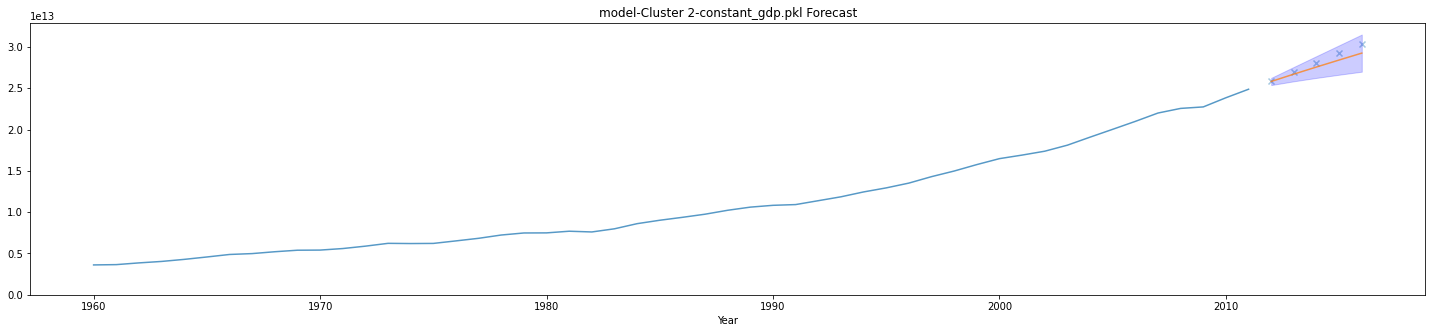

model-Cluster 2-constant_gdp.pkl COMPLETED
FEATURE  manufacturing_gdp REGION  Cluster 2
START  1960
ALT START  1960
Test RMSE: 489408899874.784


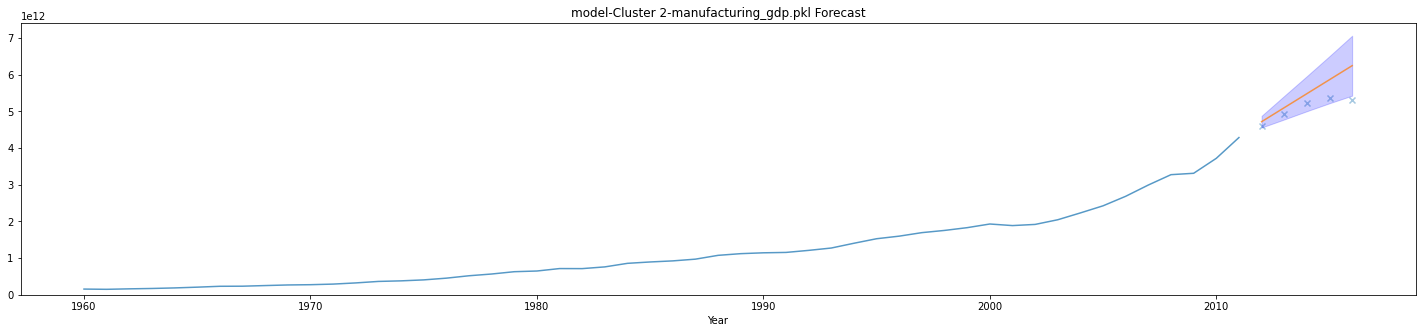

model-Cluster 2-manufacturing_gdp.pkl COMPLETED
FEATURE  medium_to_high_tech_percent REGION  Cluster 2
START  1990
ALT START  1990
Test RMSE: 0.483


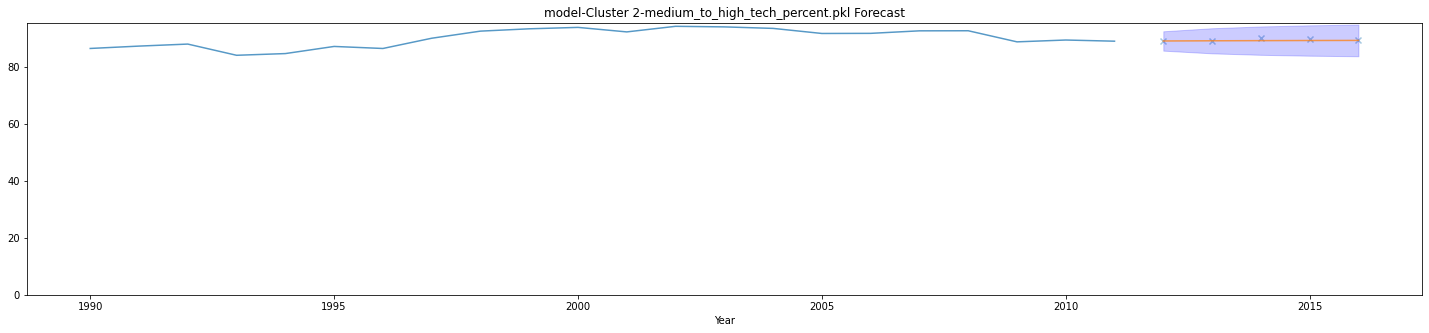

model-Cluster 2-medium_to_high_tech_percent.pkl COMPLETED
FEATURE  export REGION  Cluster 2
START  1960
ALT START  1960
Test RMSE: 618524350506.923


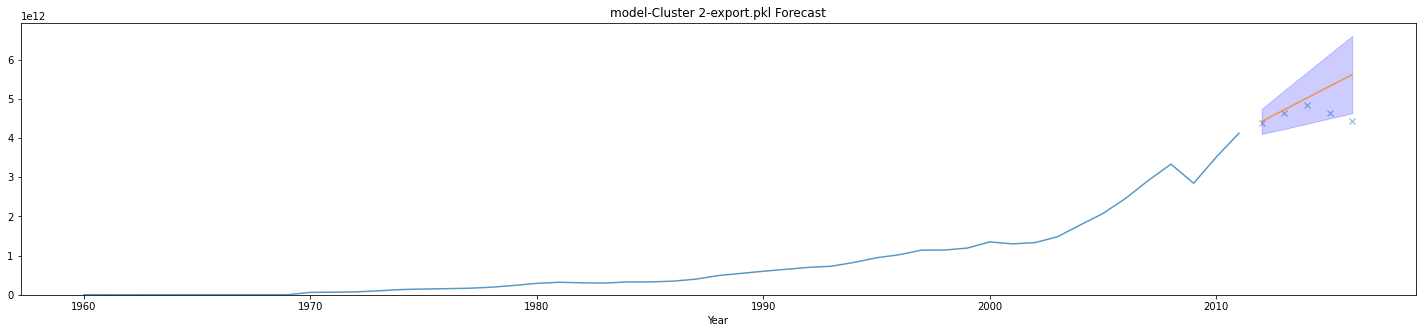

model-Cluster 2-export.pkl COMPLETED
FEATURE  import REGION  Cluster 2
START  1960
ALT START  1960
Test RMSE: 679588097537.421


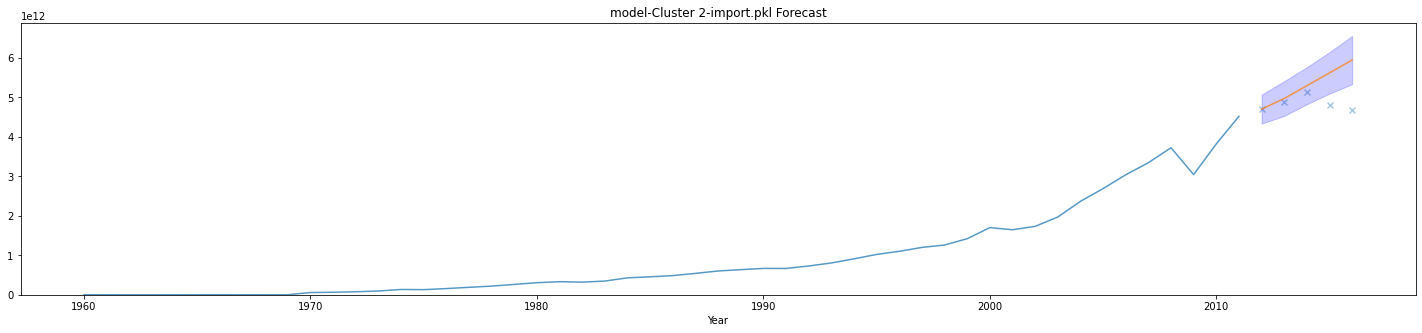

model-Cluster 2-import.pkl COMPLETED
FEATURE  real_gdp_growth_percent REGION  Cluster 2
START  1961
ALT START  1961
Test RMSE: 2.630


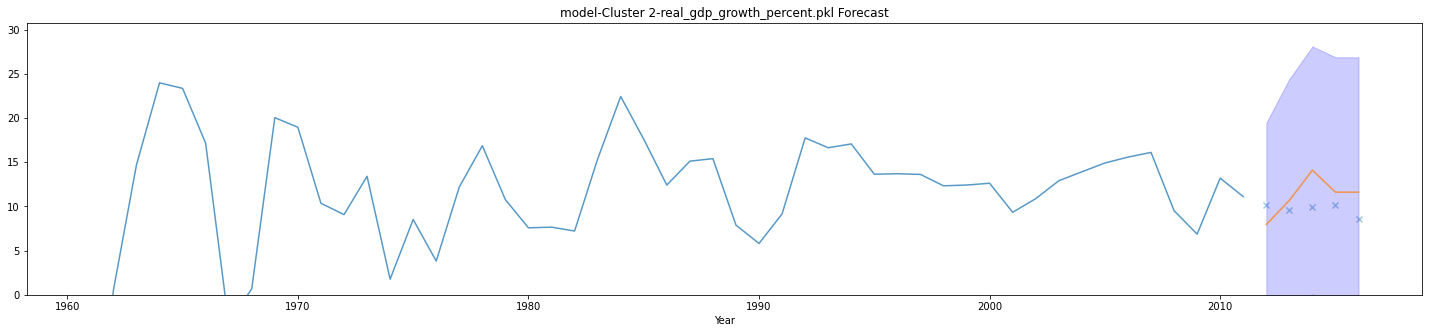

model-Cluster 2-real_gdp_growth_percent.pkl COMPLETED
FEATURE  urban_population_percent REGION  Cluster 2
START  1960
ALT START  1960
Test RMSE: 0.094


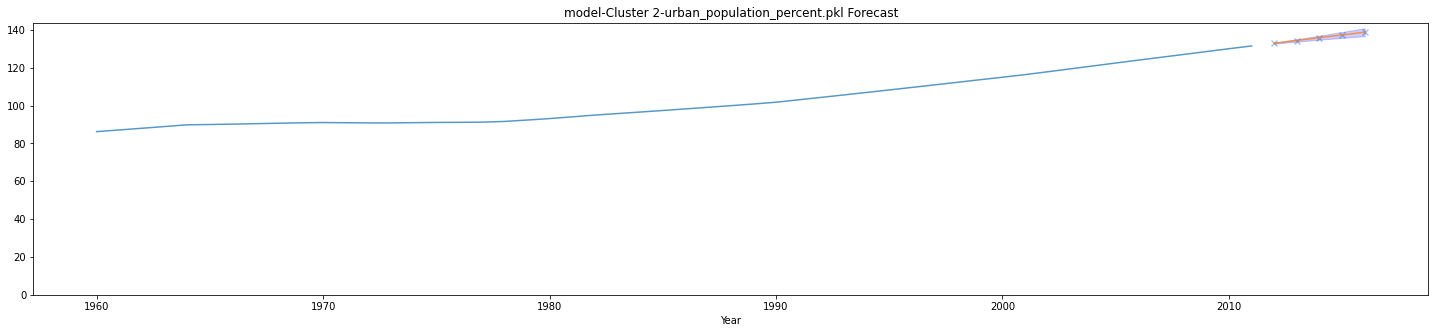

model-Cluster 2-urban_population_percent.pkl COMPLETED
FEATURE  merchandise_export REGION  Cluster 2
START  1960
ALT START  1960
Test RMSE: 368454075354.608


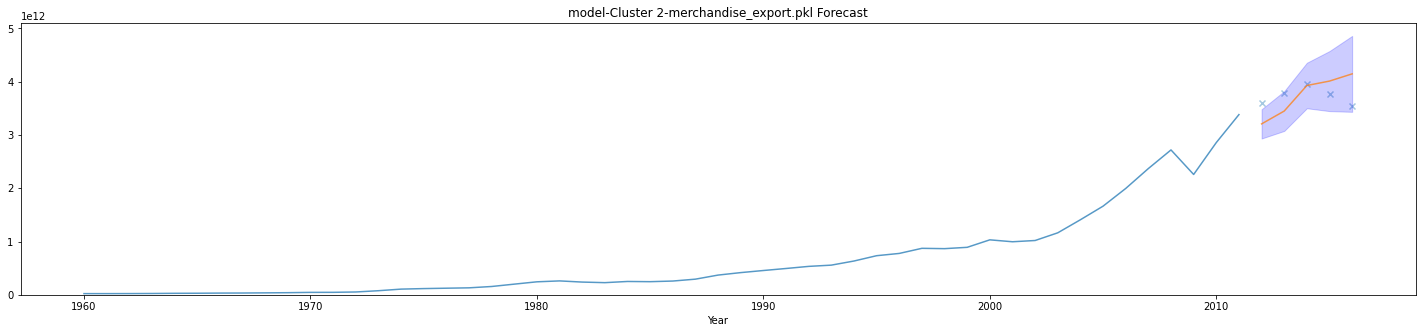

model-Cluster 2-merchandise_export.pkl COMPLETED
FEATURE  merchandise_import REGION  Cluster 2
START  1960
ALT START  1960
Test RMSE: 809777912048.571


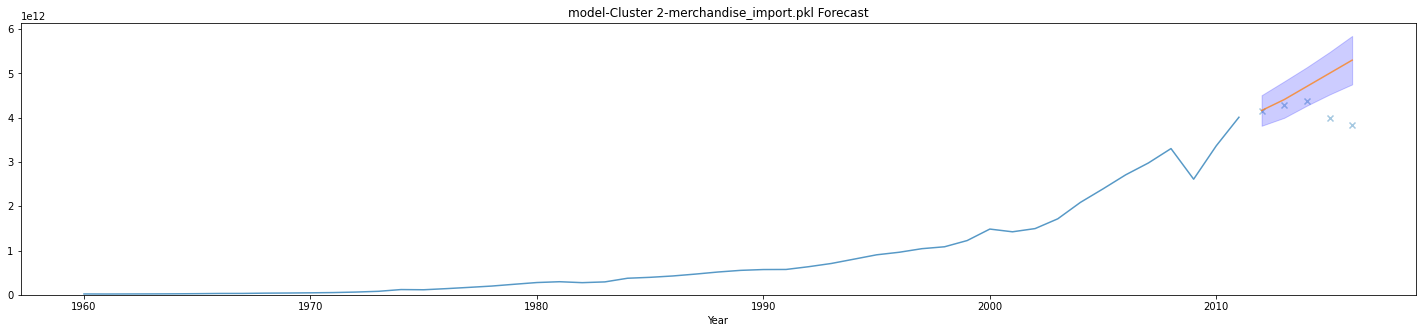

model-Cluster 2-merchandise_import.pkl COMPLETED
FEATURE  manufacturer_export_share REGION  Cluster 2
START  1962
ALT START  1989
Test RMSE: 6.737


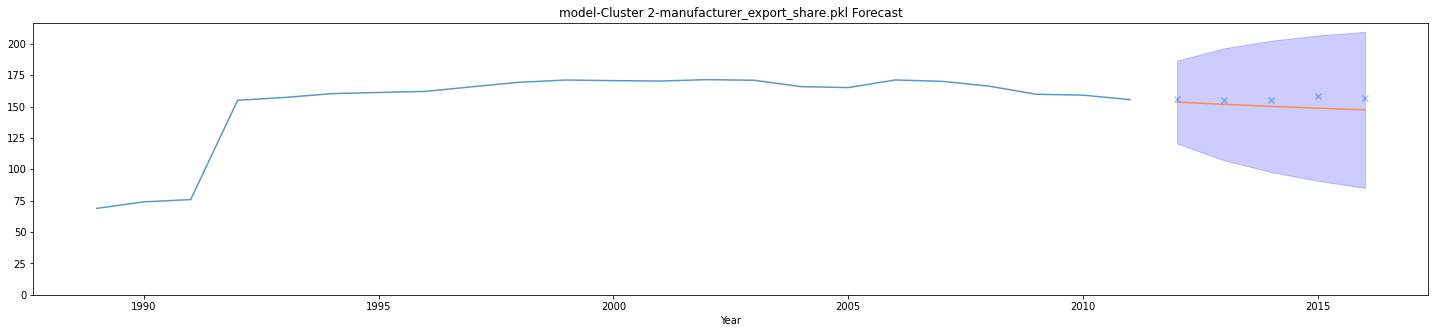

model-Cluster 2-manufacturer_export_share.pkl COMPLETED
FEATURE  manufacturer_export REGION  Cluster 2
START  1962
ALT START  1962
Test RMSE: 267019187956.703


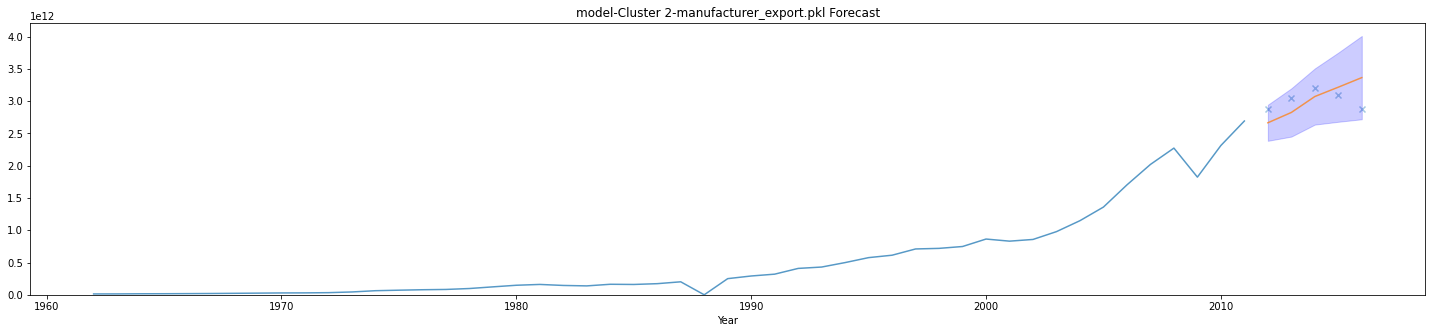

model-Cluster 2-manufacturer_export.pkl COMPLETED
FEATURE  co2_emission_electricity REGION  Cluster 2
START  1990
ALT START  1990
Test RMSE: 575770.493


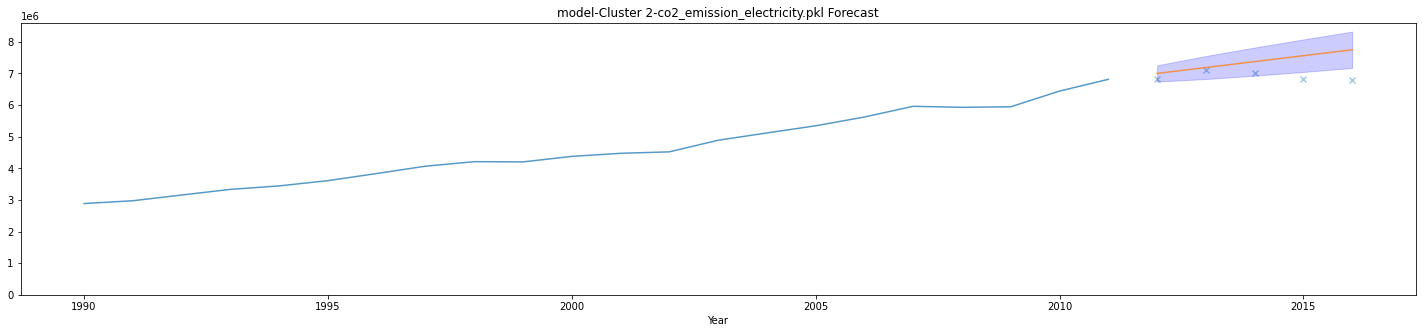

model-Cluster 2-co2_emission_electricity.pkl COMPLETED
FEATURE  co2_emission_other_fuel REGION  Cluster 2
START  1990
ALT START  1990
Test RMSE: 42482.037


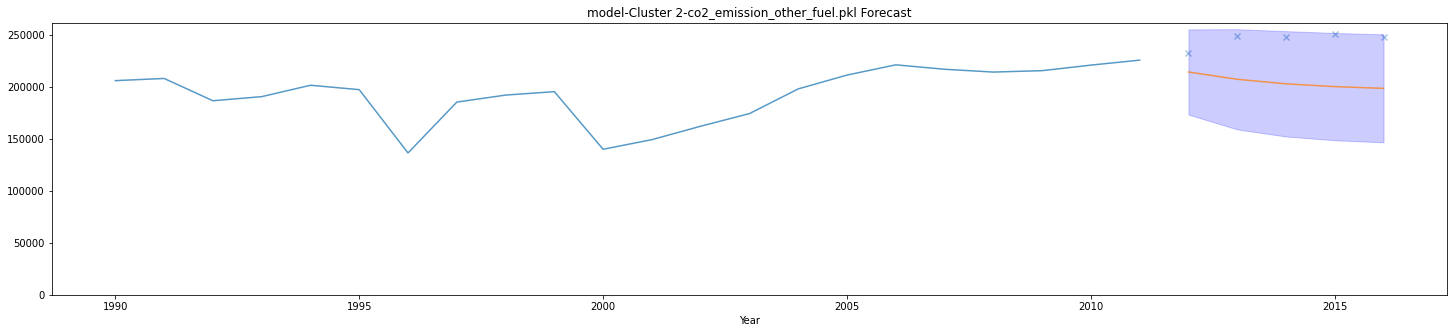

model-Cluster 2-co2_emission_other_fuel.pkl COMPLETED
FEATURE  co2_emission_transport REGION  Cluster 2
START  1990
ALT START  1990
Test RMSE: 88655.632


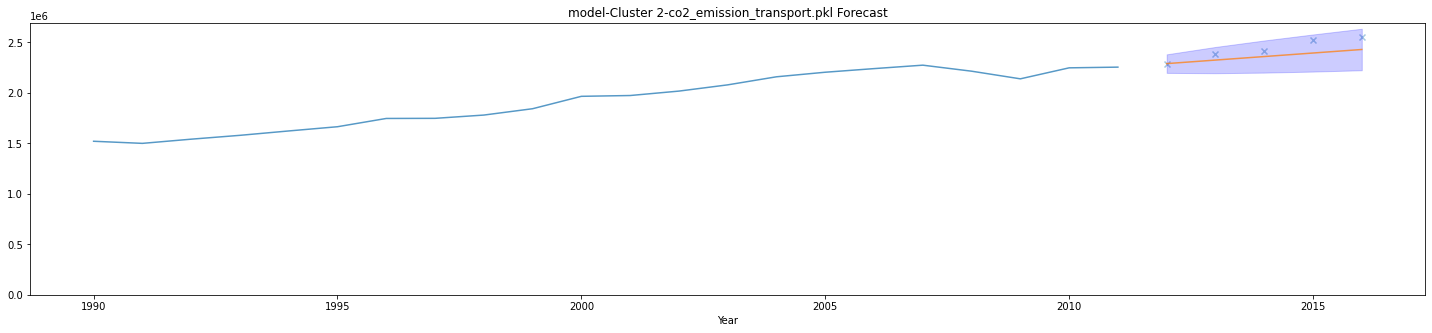

model-Cluster 2-co2_emission_transport.pkl COMPLETED
FEATURE  co2_emission_bunkers REGION  Cluster 2
START  1990
ALT START  1990
Test RMSE: 22893.240


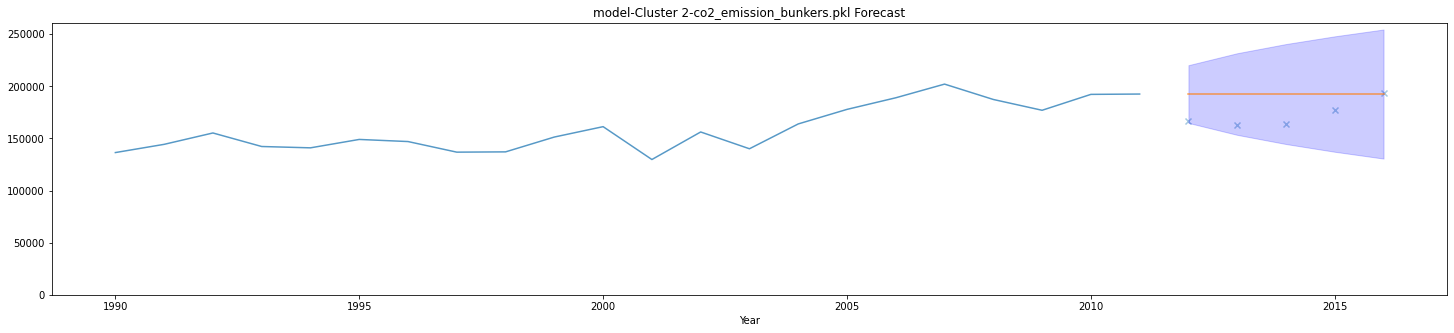

model-Cluster 2-co2_emission_bunkers.pkl COMPLETED
FEATURE  co2_emission_industrial_process REGION  Cluster 2
START  1990
ALT START  1990
Test RMSE: 188246.242


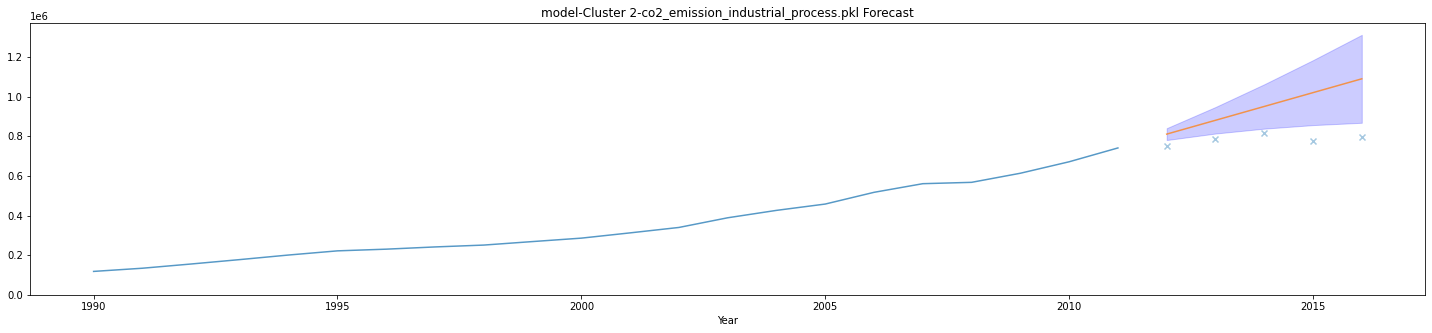

model-Cluster 2-co2_emission_industrial_process.pkl COMPLETED
FEATURE  co2_emission_per_capita REGION  Cluster 2
START  1960
ALT START  1960
Test RMSE: 0.716


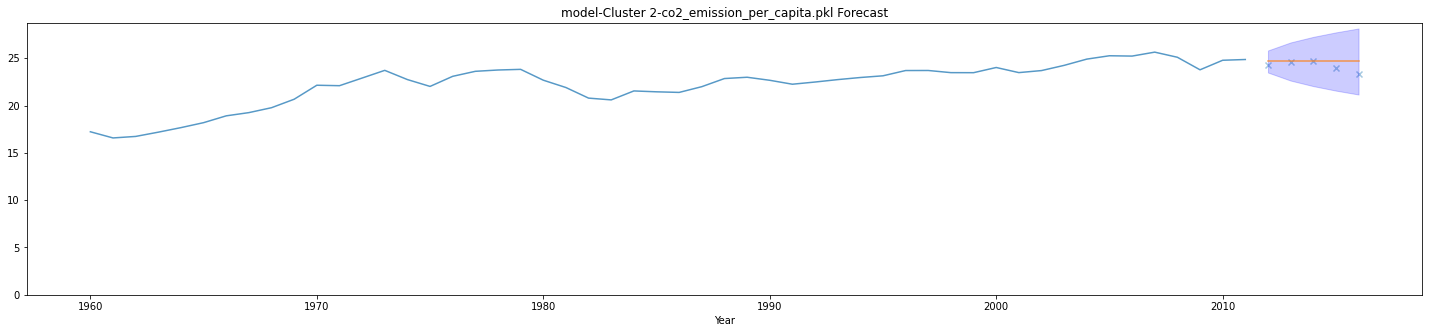

model-Cluster 2-co2_emission_per_capita.pkl COMPLETED
FEATURE  constant_gdp_per_capita REGION  Cluster 2
START  1960
ALT START  1970
Test RMSE: 1614.735


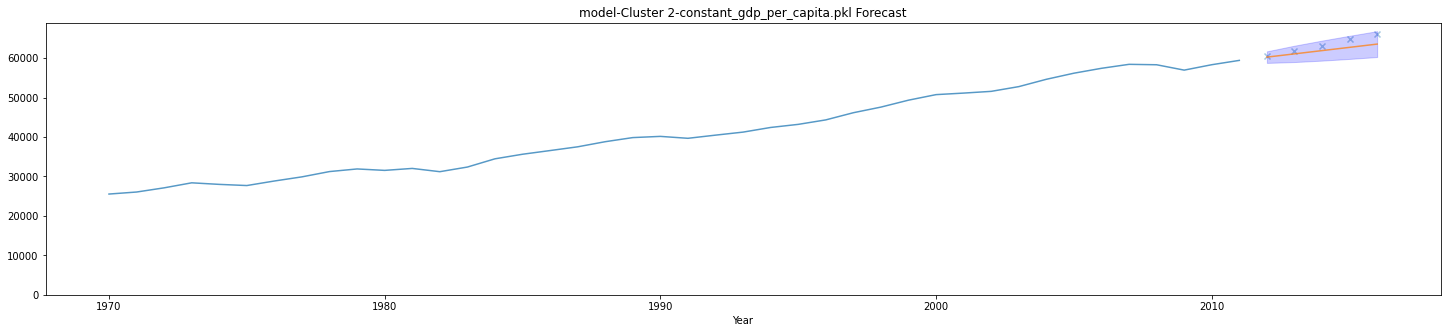

model-Cluster 2-constant_gdp_per_capita.pkl COMPLETED
FEATURE  manufacturing_percent REGION  Cluster 2
START  1960
ALT START  1960
Test RMSE: 2.606


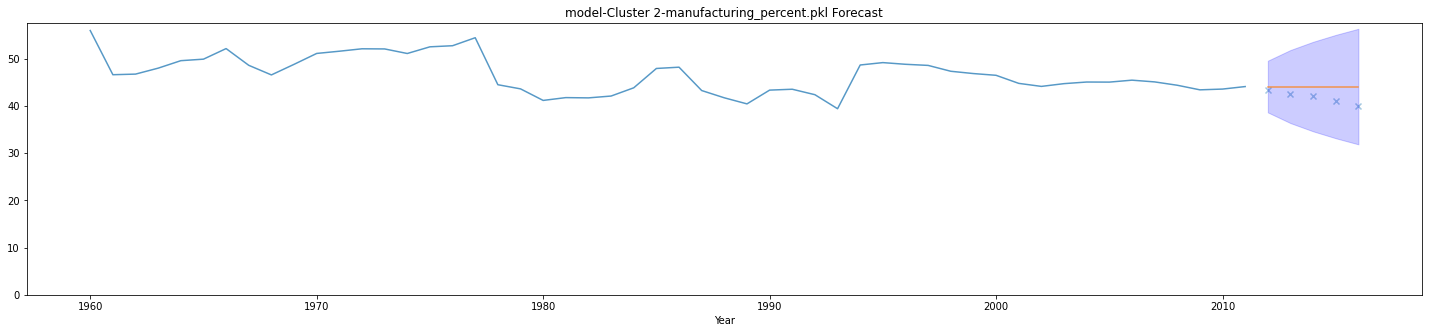

model-Cluster 2-manufacturing_percent.pkl COMPLETED
FEATURE  medium_to_high_tech_gdp REGION  Cluster 2
START  1990
ALT START  1990
Test RMSE: 129170507750.549


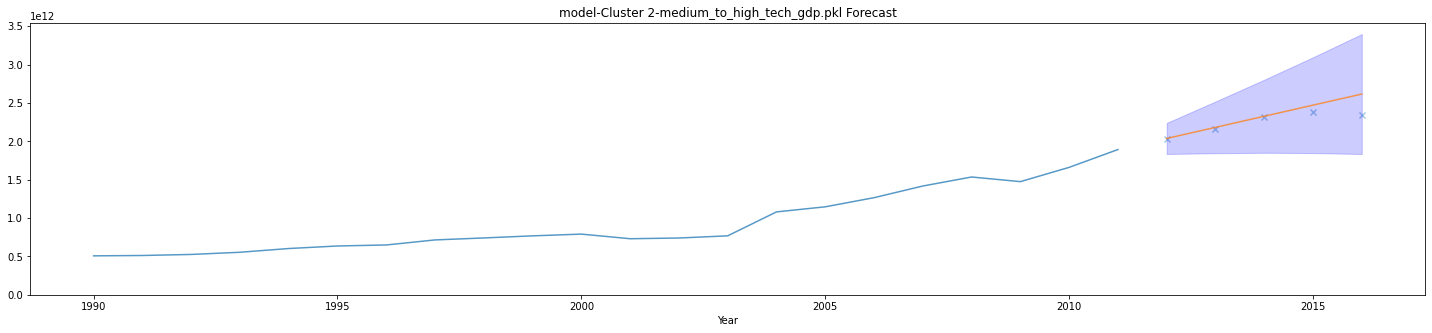

model-Cluster 2-medium_to_high_tech_gdp.pkl COMPLETED
FEATURE  co2_emission_per_constant_gdp REGION  Cluster 2
START  1960
ALT START  1970
Test RMSE: 0.052


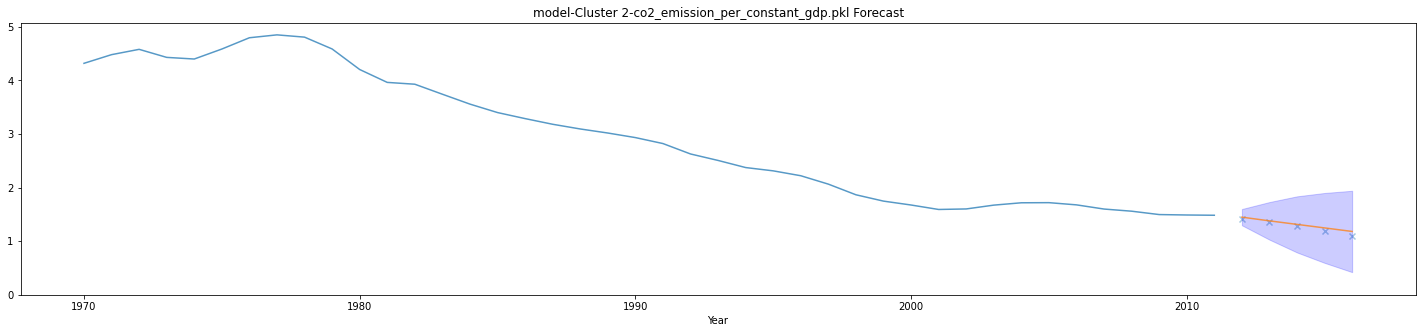

model-Cluster 2-co2_emission_per_constant_gdp.pkl COMPLETED
FEATURE  trade_openness REGION  Cluster 2
START  1960
ALT START  1960
Test RMSE: 15.893


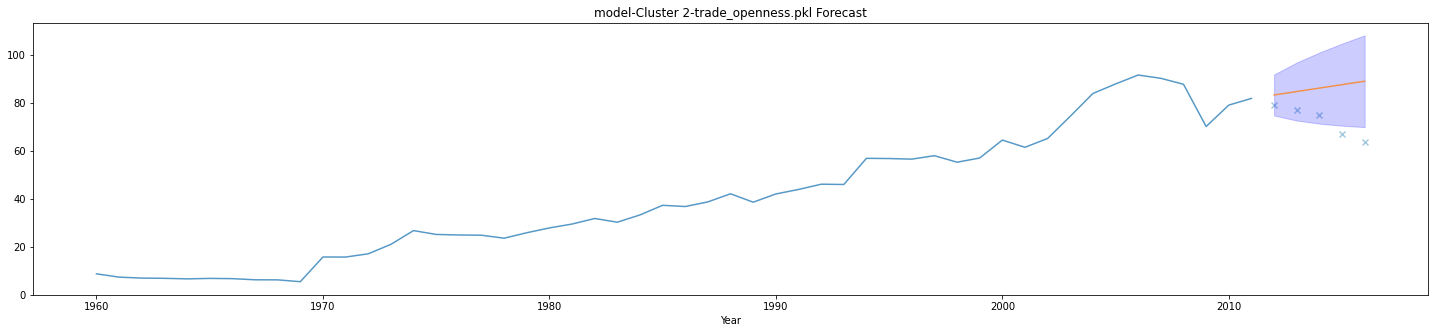

model-Cluster 2-trade_openness.pkl COMPLETED
FEATURE  share_of_merchandise_export REGION  Cluster 2
START  1960
ALT START  1960
Test RMSE: 6.612


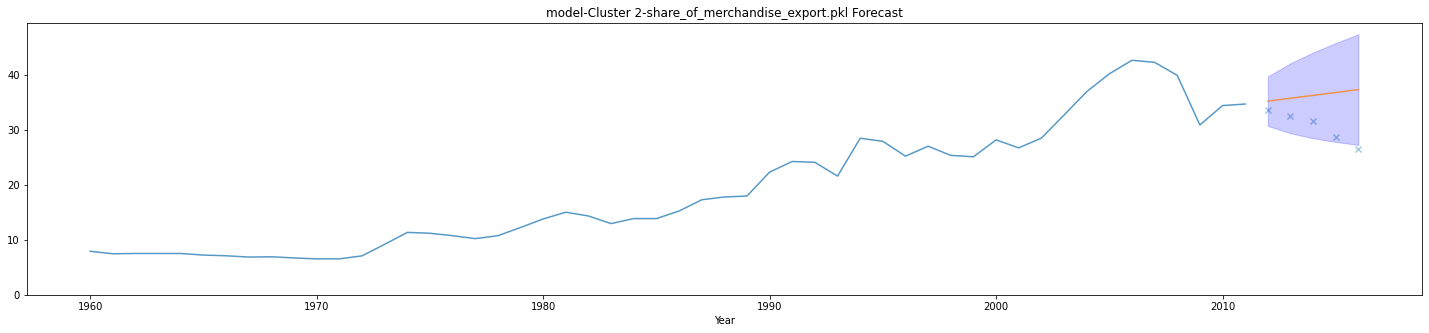

model-Cluster 2-share_of_merchandise_export.pkl COMPLETED
FEATURE  share_of_merchandise_import REGION  Cluster 2
START  1960
ALT START  1960
Test RMSE: 9.348


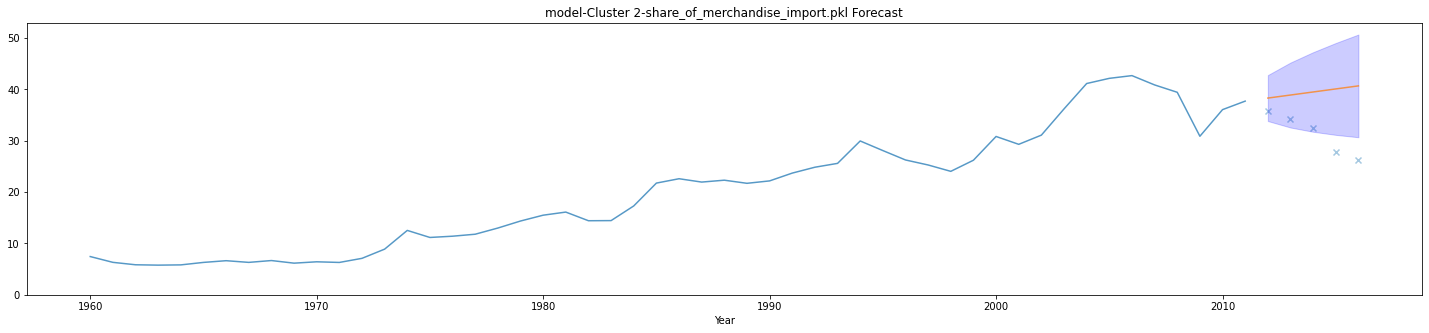

model-Cluster 2-share_of_merchandise_import.pkl COMPLETED
FEATURE  industrial_gdp REGION  Cluster 2
START  1960
ALT START  1960
Test RMSE: 310817089200.104


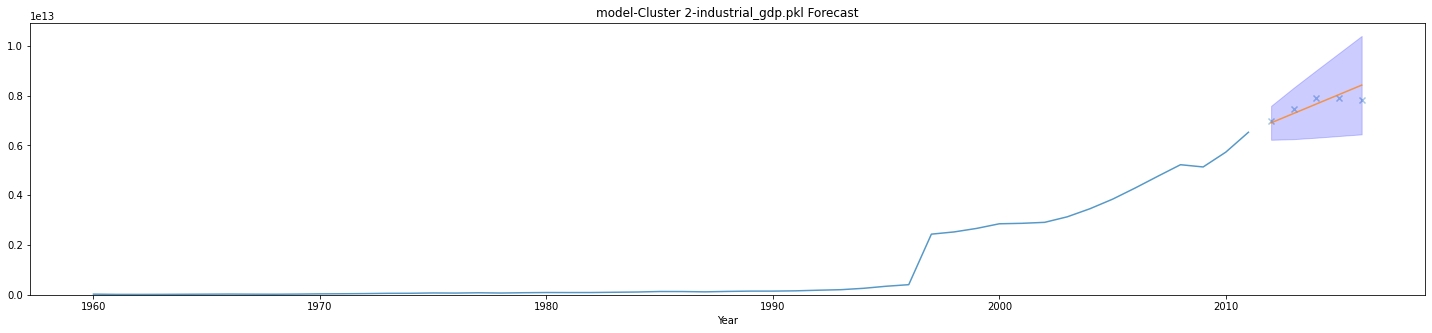

model-Cluster 2-industrial_gdp.pkl COMPLETED
FEATURE  co2_country_share_percent REGION  Cluster 2
START  1960
ALT START  1960
Test RMSE: 2.752


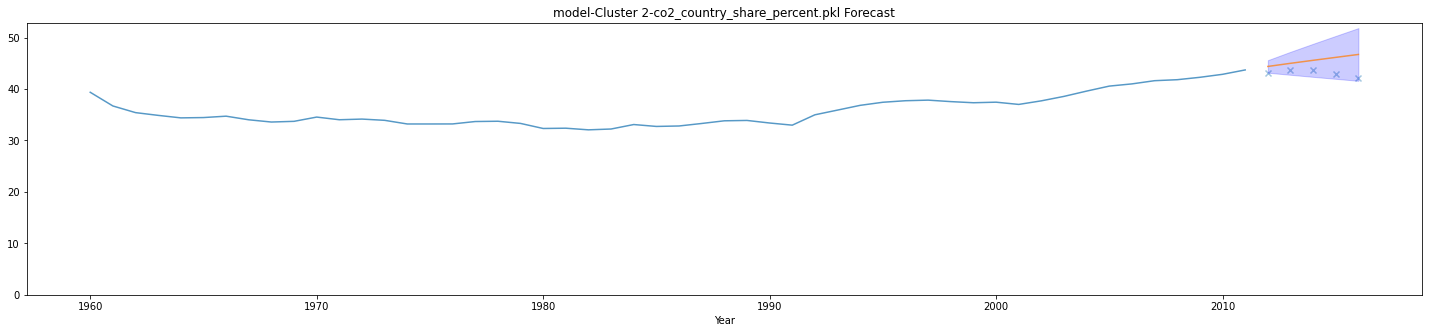

model-Cluster 2-co2_country_share_percent.pkl COMPLETED
FEATURE  manufacturing_country_share_percent REGION  Cluster 2
START  1960
ALT START  1960
Test RMSE: 3.409


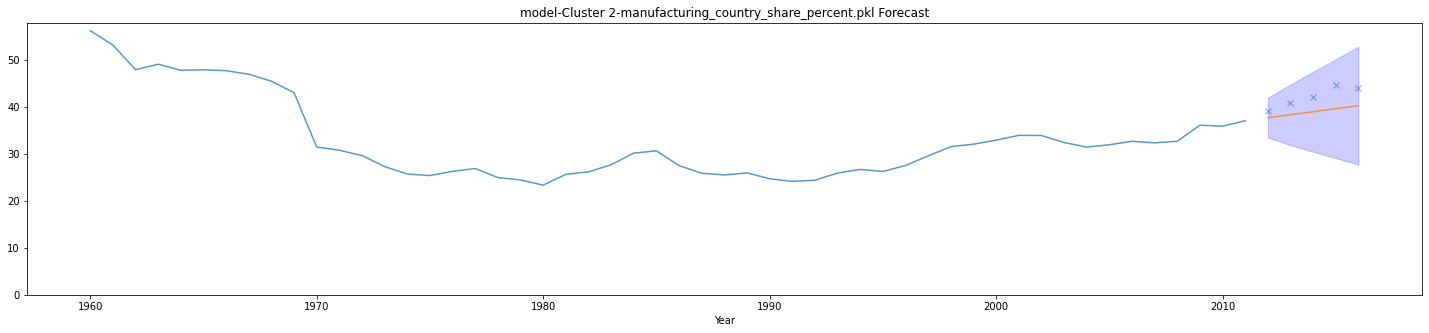

model-Cluster 2-manufacturing_country_share_percent.pkl COMPLETED
FEATURE  iea_primary_energy_consumption REGION  Cluster 2
START  1960
ALT START  1971
Test RMSE: 12864.977


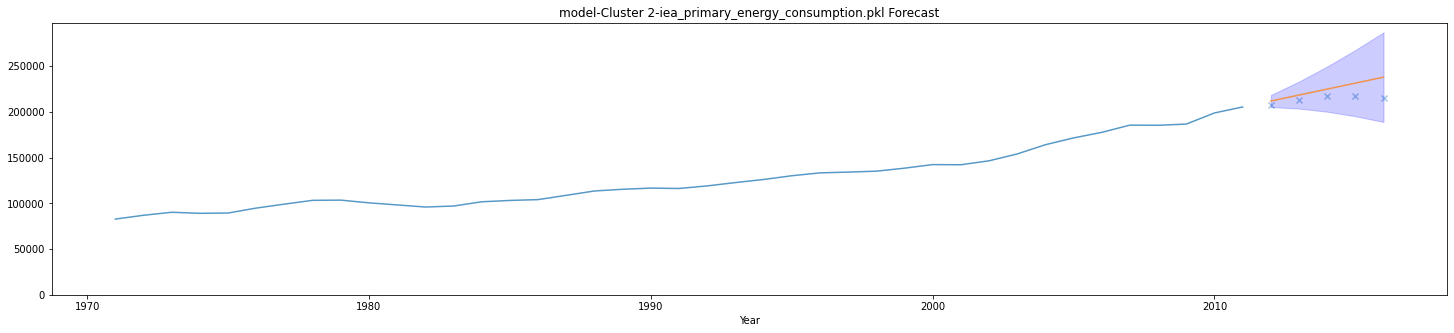

model-Cluster 2-iea_primary_energy_consumption.pkl COMPLETED
FEATURE  renewable_energy_consumption REGION  Cluster 2
START  1971
ALT START  1990
Test RMSE: 3469.386


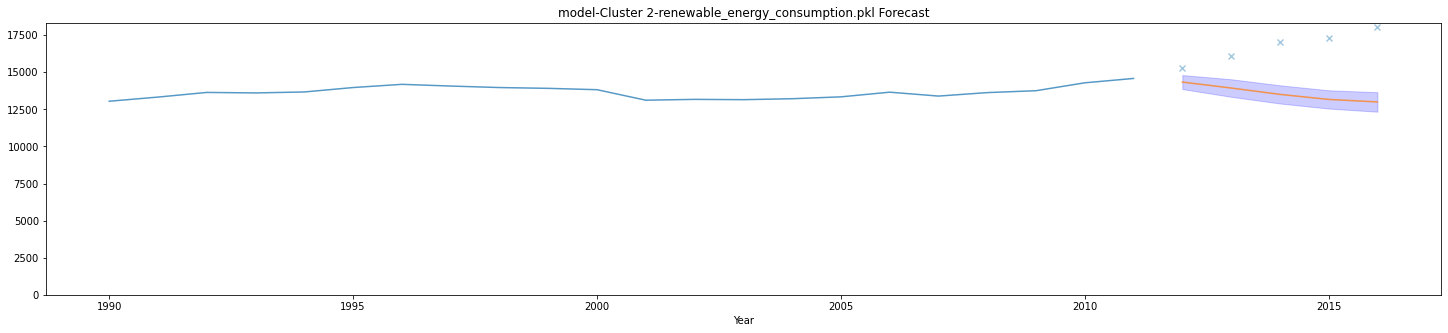

model-Cluster 2-renewable_energy_consumption.pkl COMPLETED
FEATURE  coal_consumption REGION  Cluster 2
START  1971
ALT START  1971
Test RMSE: 14683.727


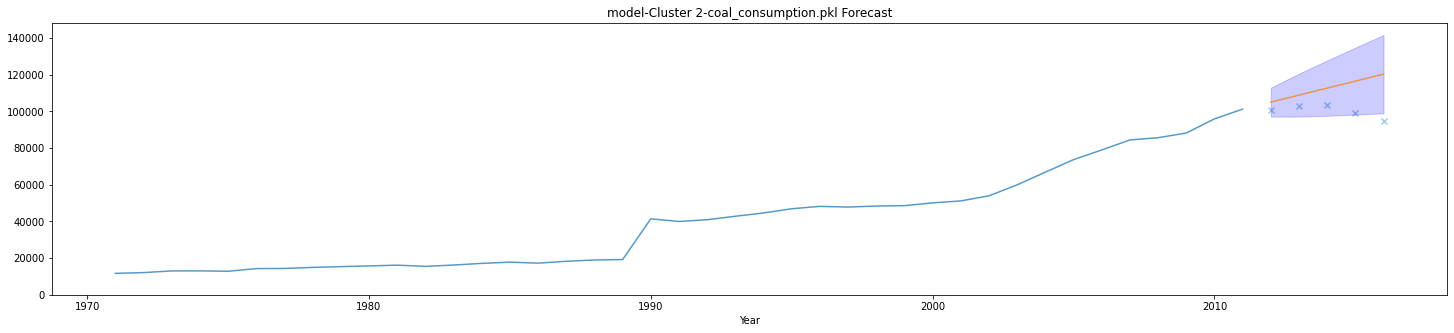

model-Cluster 2-coal_consumption.pkl COMPLETED
FEATURE  oil_consumption REGION  Cluster 2
START  1971
ALT START  1971
Test RMSE: 3035.663


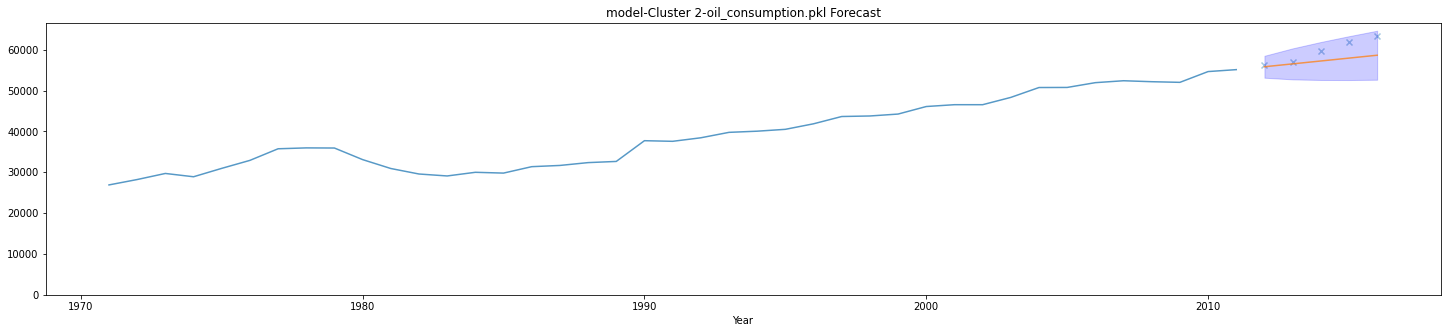

model-Cluster 2-oil_consumption.pkl COMPLETED
FEATURE  total_electricity_production REGION  Cluster 2
START  1971
ALT START  1971
Test RMSE: 136684.450


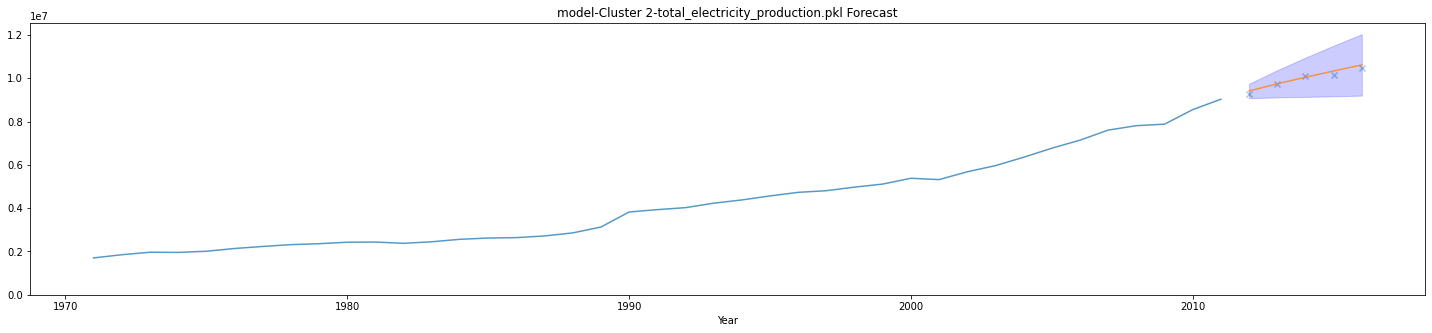

model-Cluster 2-total_electricity_production.pkl COMPLETED
FEATURE  electricity_production_from_renewable REGION  Cluster 2
START  1971
ALT START  1971
Test RMSE: 322806.028


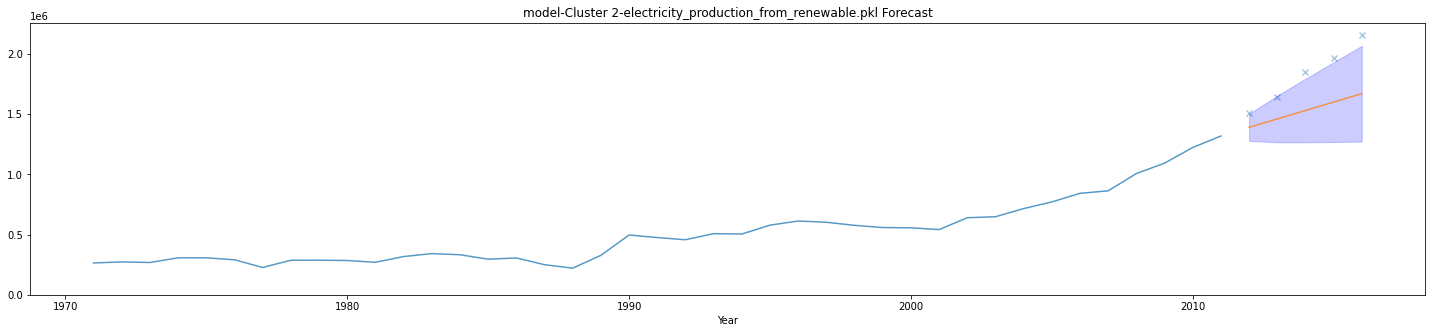

model-Cluster 2-electricity_production_from_renewable.pkl COMPLETED
FEATURE  primary_energy_consumption_per_capita REGION  Cluster 2
START  1960
ALT START  1971
Test RMSE: 115.735


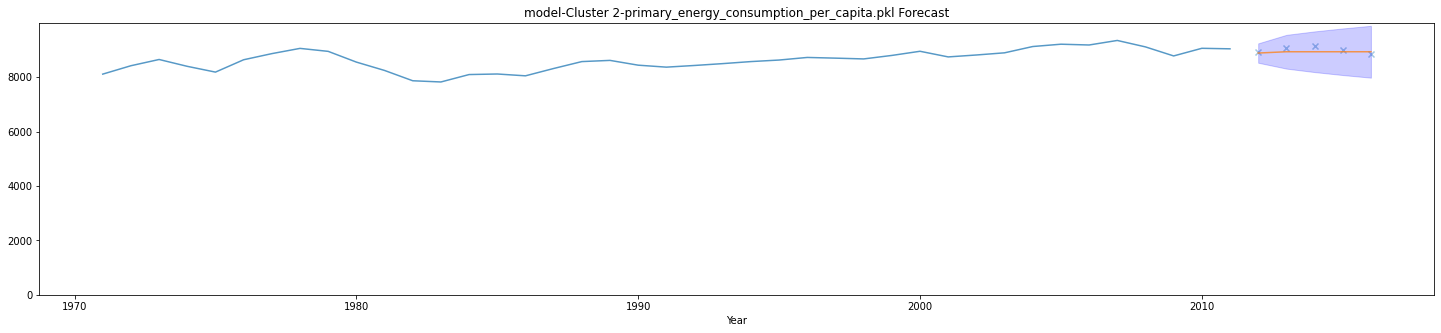

model-Cluster 2-primary_energy_consumption_per_capita.pkl COMPLETED
FEATURE  fossil_energy_consumption_share REGION  Cluster 2
START  1971
ALT START  1971
Test RMSE: 4.102


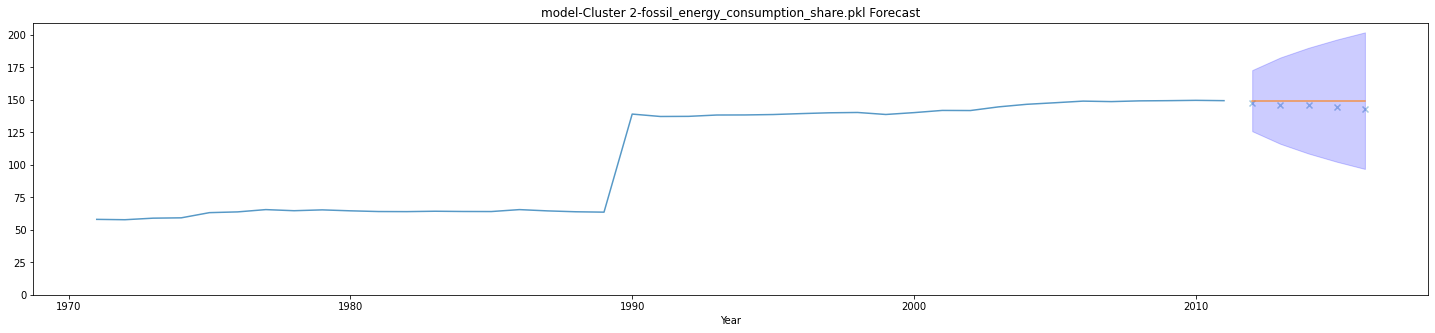

model-Cluster 2-fossil_energy_consumption_share.pkl COMPLETED
FEATURE  renewable_electricity_production_share REGION  Cluster 2
START  1971
ALT START  1990
Test RMSE: 7.301


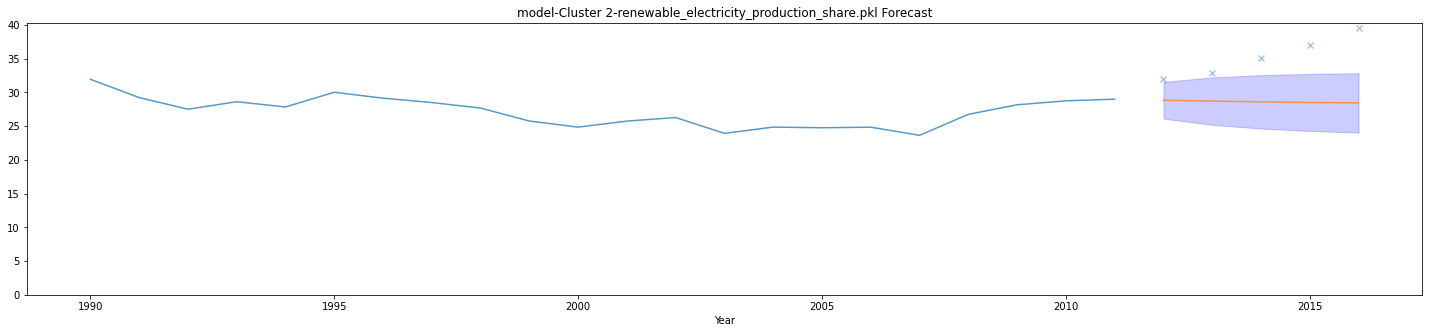

model-Cluster 2-renewable_electricity_production_share.pkl COMPLETED
FEATURE  energy_intensity REGION  Cluster 2
START  1960
ALT START  1990
Test RMSE: 0.020


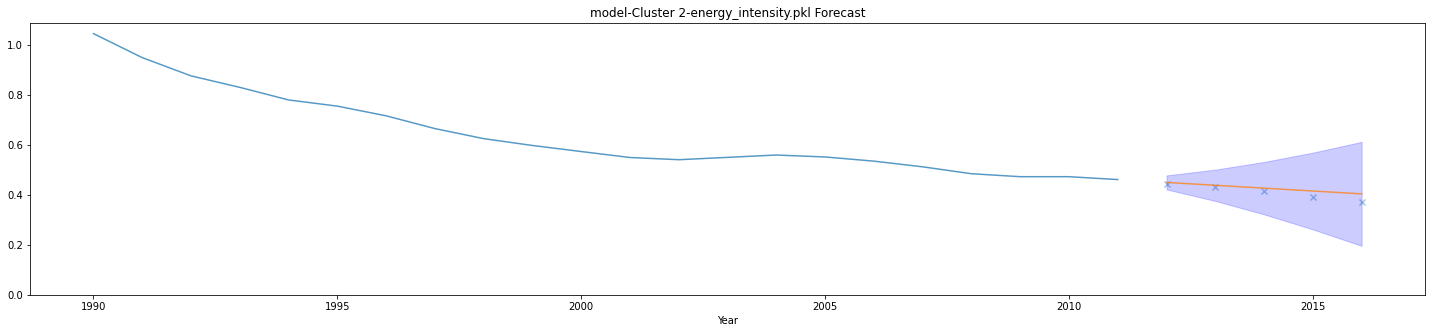

model-Cluster 2-energy_intensity.pkl COMPLETED
FEATURE  renewable_energy_consumption_share REGION  Cluster 2
START  1971
ALT START  1990
Test RMSE: 1.766


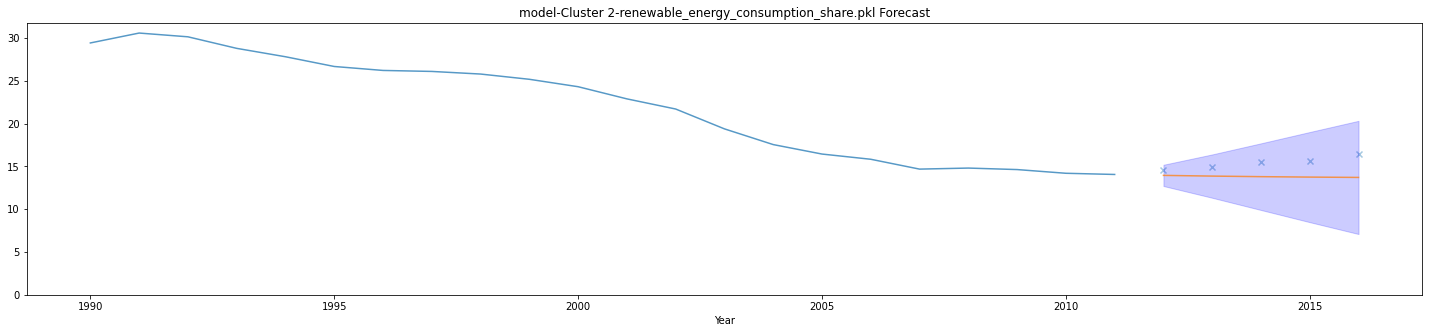

model-Cluster 2-renewable_energy_consumption_share.pkl COMPLETED
FEATURE  percent_of_environment_patent REGION  Cluster 2
START  1960
ALT START  1960
Test RMSE: 2.051


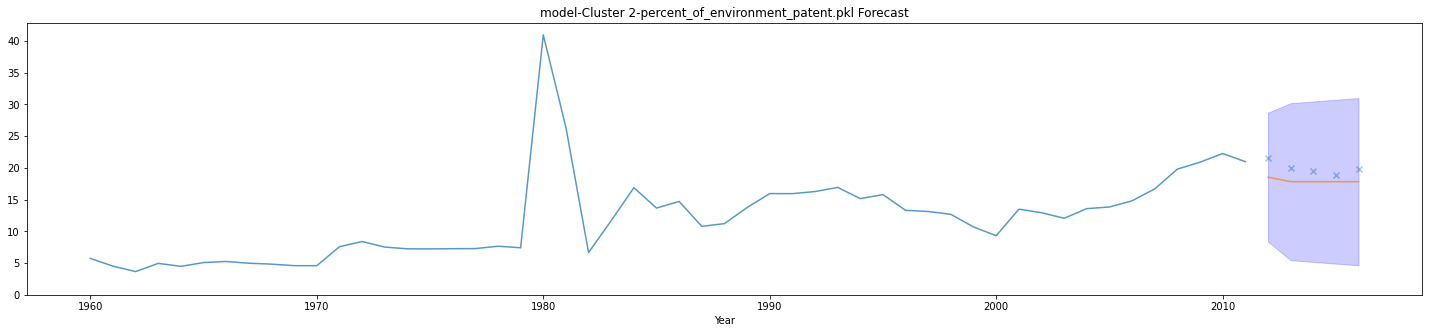

model-Cluster 2-percent_of_environment_patent.pkl COMPLETED
FEATURE  consumption_co2 REGION  Cluster 3
START  1990
ALT START  1990
Test RMSE: 5.450


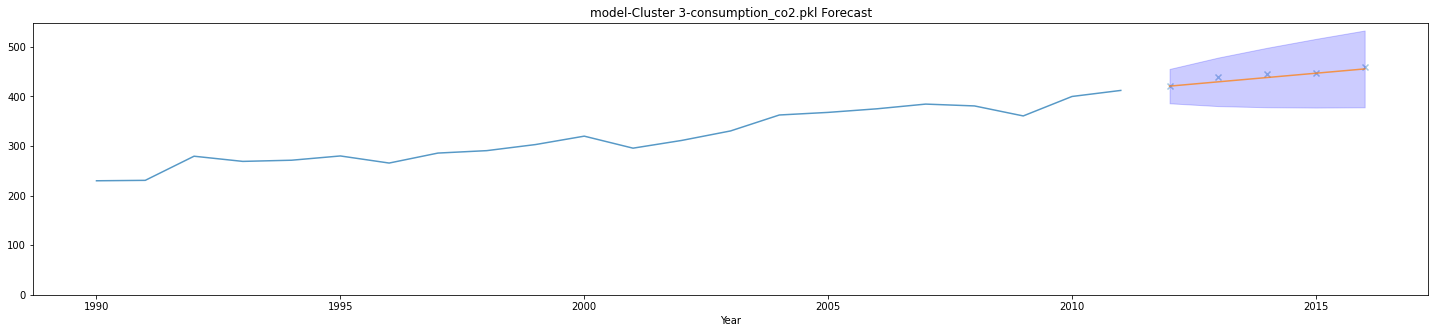

model-Cluster 3-consumption_co2.pkl COMPLETED
FEATURE  co2_growth_prct REGION  Cluster 3
START  1752
ALT START  1752
Test RMSE: 172.007


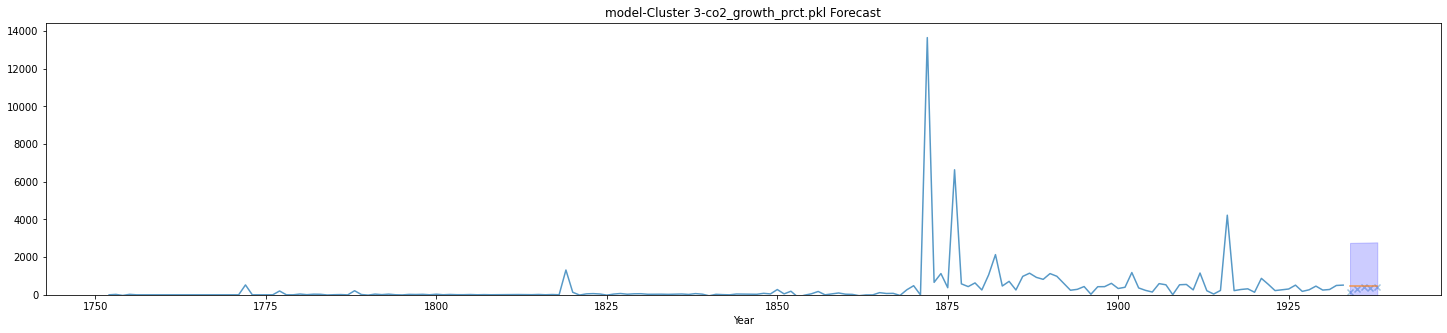

model-Cluster 3-co2_growth_prct.pkl COMPLETED
FEATURE  co2_growth_abs REGION  Cluster 3
START  1752
ALT START  1752
Test RMSE: 9.526


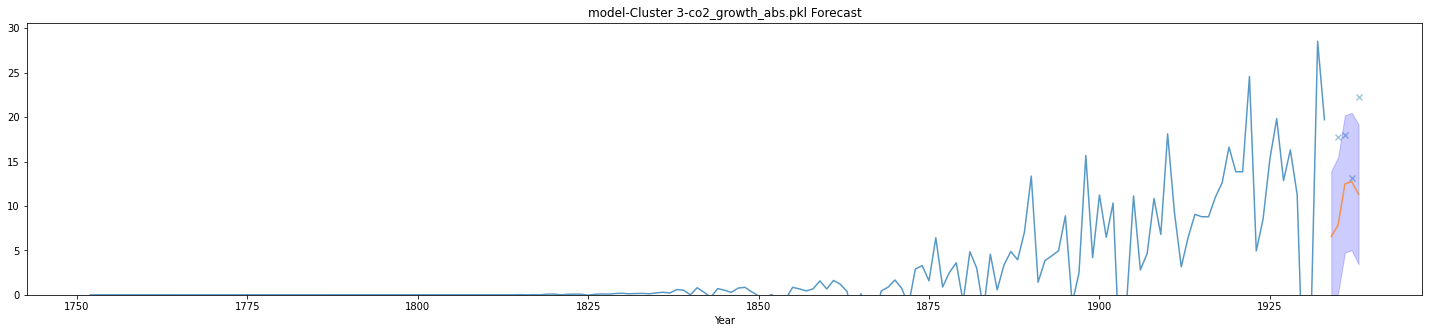

model-Cluster 3-co2_growth_abs.pkl COMPLETED
FEATURE  trade_co2 REGION  Cluster 3
START  1990
ALT START  1990
Test RMSE: 11.876


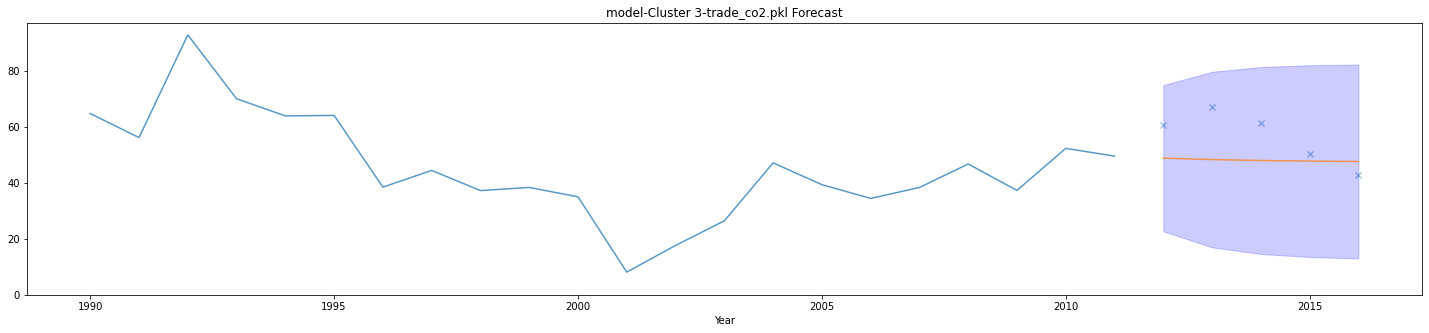

model-Cluster 3-trade_co2.pkl COMPLETED
FEATURE  co2_per_capita REGION  Cluster 3
START  1750
ALT START  1950
Test RMSE: 18.843


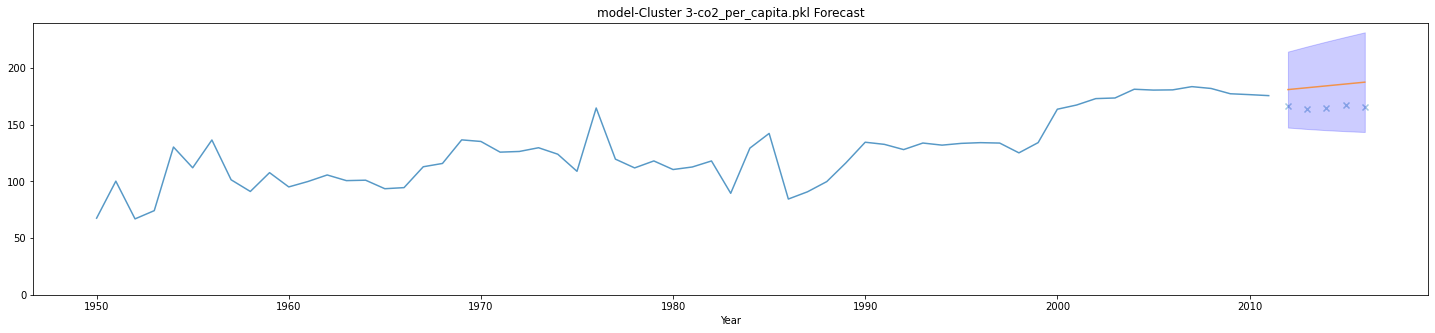

model-Cluster 3-co2_per_capita.pkl COMPLETED
FEATURE  consumption_co2_per_capita REGION  Cluster 3
START  1990
ALT START  1990
Test RMSE: 0.569


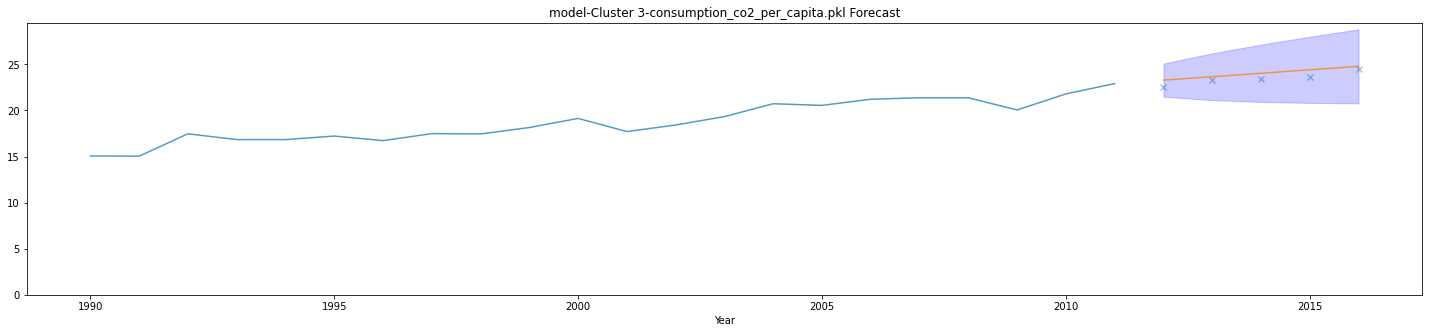

model-Cluster 3-consumption_co2_per_capita.pkl COMPLETED
FEATURE  share_global_co2 REGION  Cluster 3
START  1750
ALT START  1750
Test RMSE: 0.041


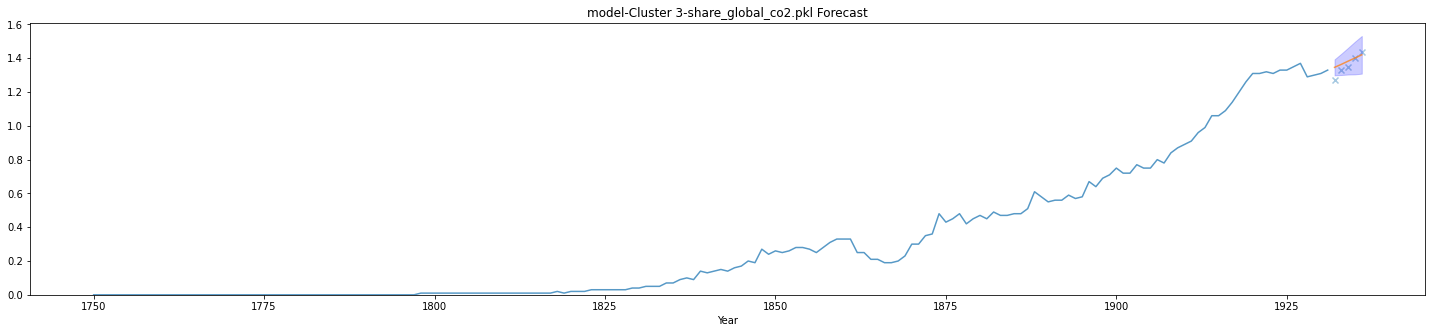

model-Cluster 3-share_global_co2.pkl COMPLETED
FEATURE  cumulative_co2 REGION  Cluster 3
START  1750
ALT START  1750
Test RMSE: 39.913


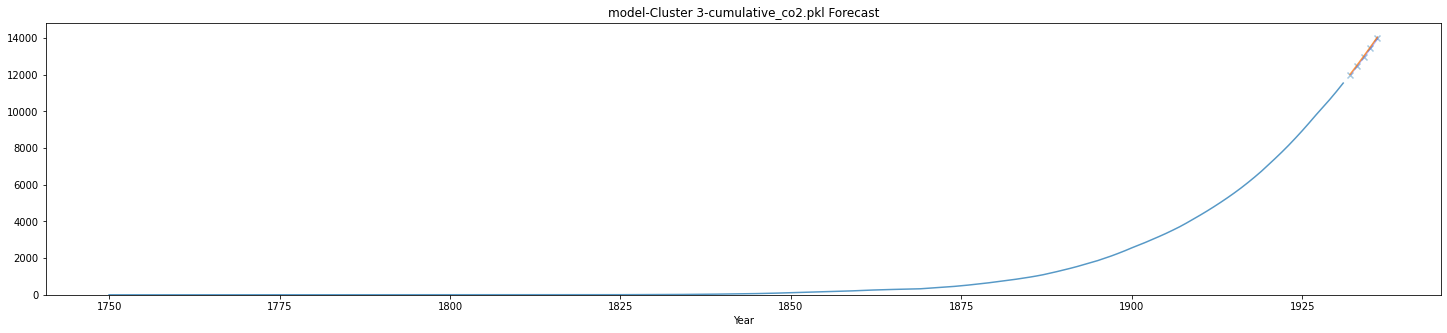

model-Cluster 3-cumulative_co2.pkl COMPLETED
FEATURE  share_global_cumulative_co2 REGION  Cluster 3
START  1750
ALT START  1750
Test RMSE: 0.019


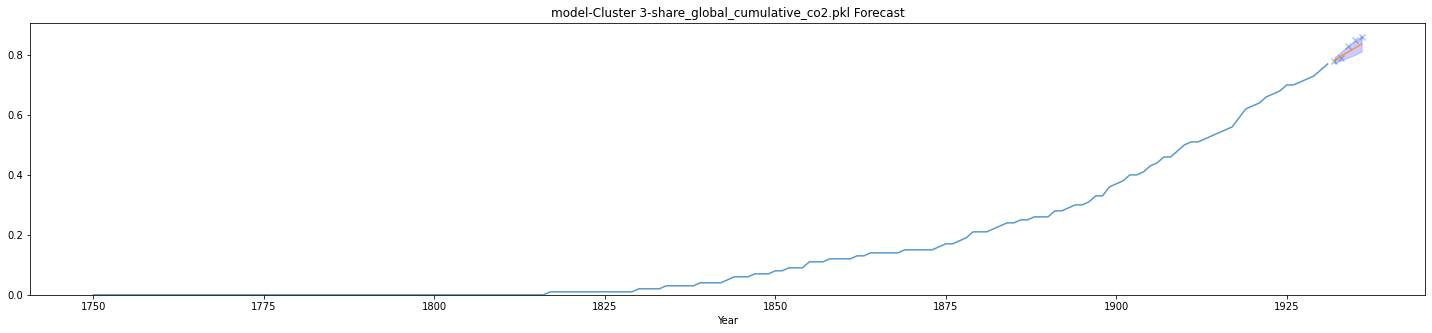

model-Cluster 3-share_global_cumulative_co2.pkl COMPLETED
FEATURE  co2_per_gdp REGION  Cluster 3
START  1820
ALT START  1950
Test RMSE: 0.174


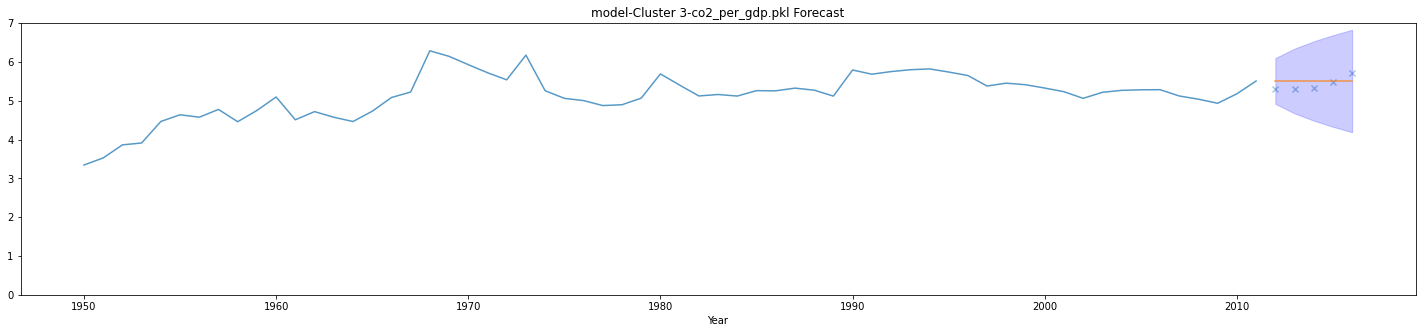

model-Cluster 3-co2_per_gdp.pkl COMPLETED
FEATURE  consumption_co2_per_gdp REGION  Cluster 3
START  1990
ALT START  1990
Test RMSE: 0.171


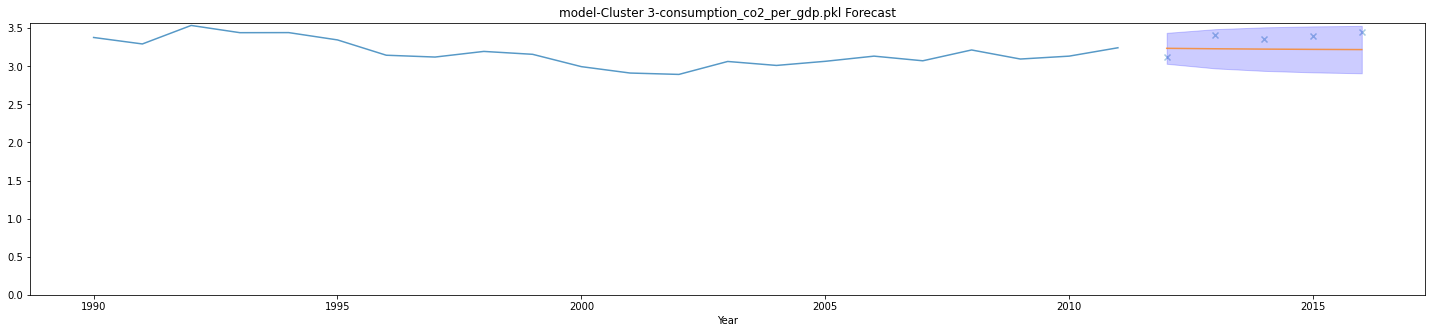

model-Cluster 3-consumption_co2_per_gdp.pkl COMPLETED
FEATURE  co2_per_unit_energy REGION  Cluster 3
START  1965
ALT START  1980
Test RMSE: 0.541


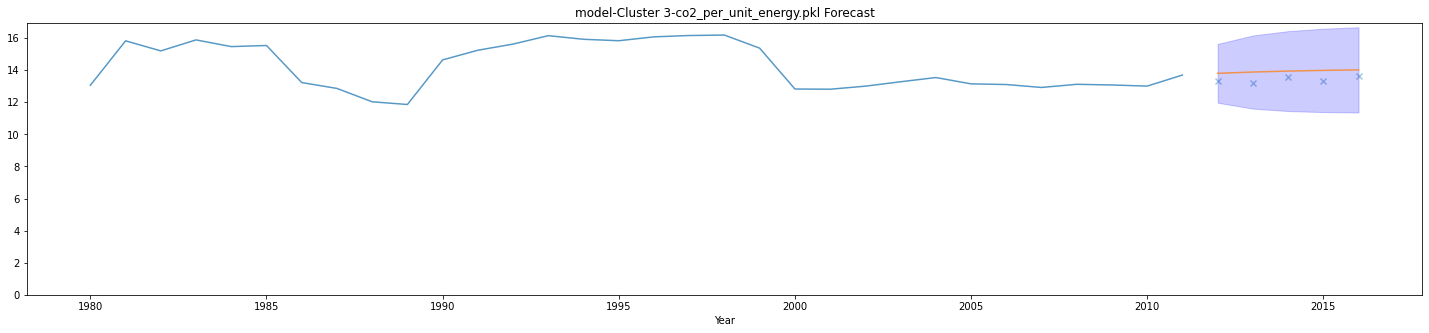

model-Cluster 3-co2_per_unit_energy.pkl COMPLETED
FEATURE  coal_co2 REGION  Cluster 3
START  1750
ALT START  1750
Test RMSE: 9.149


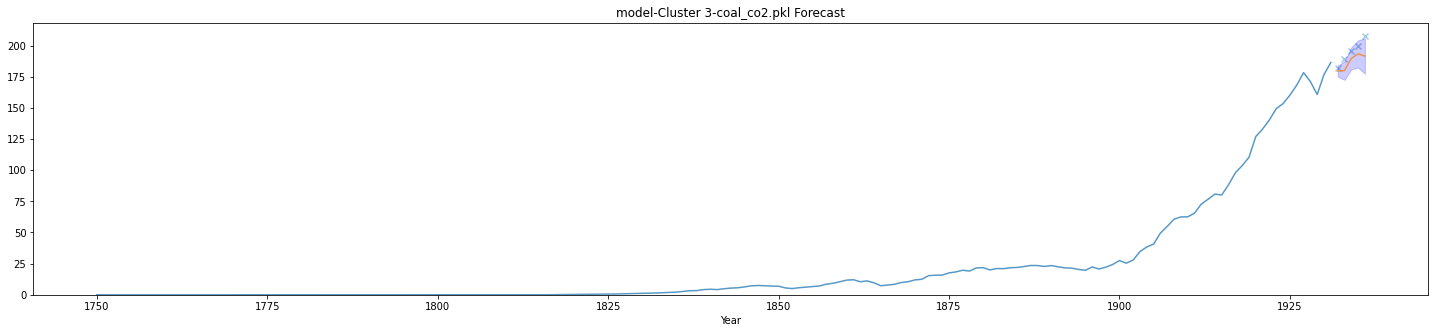

model-Cluster 3-coal_co2.pkl COMPLETED
FEATURE  coal_co2_per_capita REGION  Cluster 3
START  1750
ALT START  1750
Test RMSE: 0.687


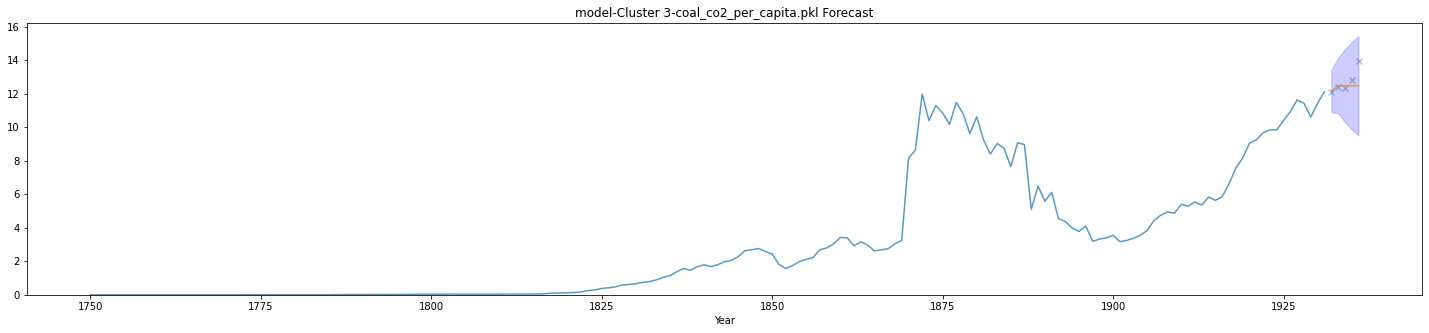

model-Cluster 3-coal_co2_per_capita.pkl COMPLETED
FEATURE  share_global_coal_co2 REGION  Cluster 3
START  1750
ALT START  1750
Test RMSE: 0.078


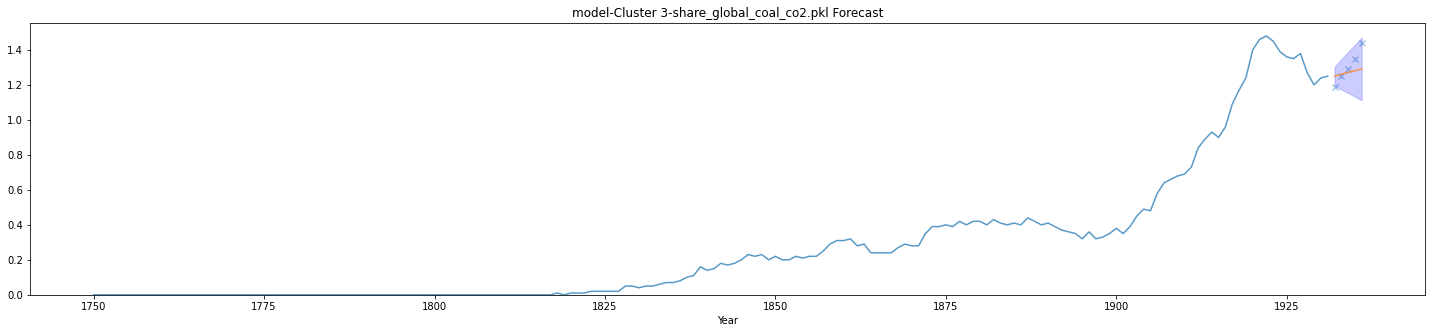

model-Cluster 3-share_global_coal_co2.pkl COMPLETED
FEATURE  cumulative_coal_co2 REGION  Cluster 3
START  1750
ALT START  1750
Test RMSE: 6.049


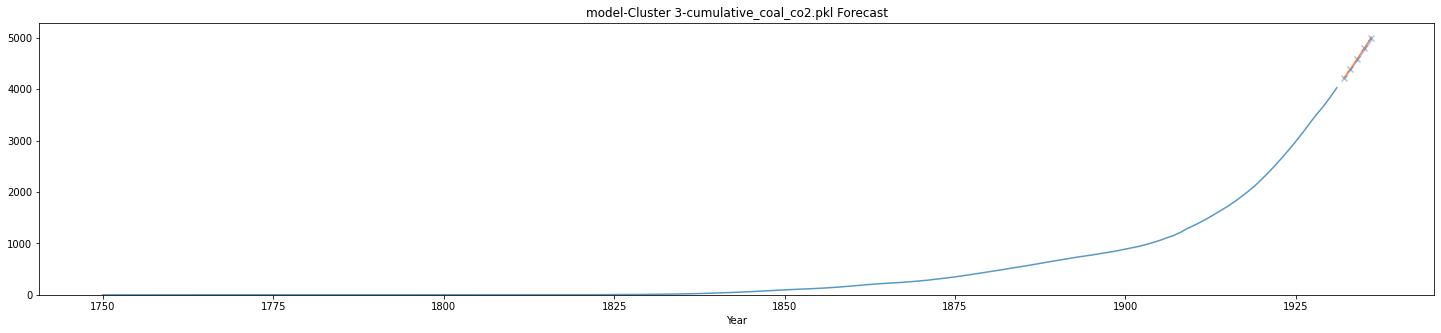

model-Cluster 3-cumulative_coal_co2.pkl COMPLETED
FEATURE  share_global_cumulative_coal_co2 REGION  Cluster 3
START  1750
ALT START  1750
Test RMSE: 0.013


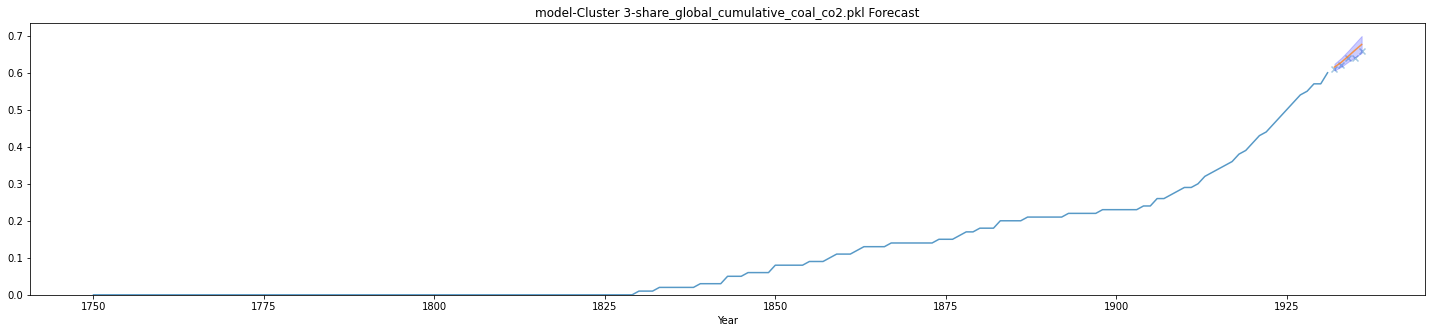

model-Cluster 3-share_global_cumulative_coal_co2.pkl COMPLETED
FEATURE  gas_co2 REGION  Cluster 3
START  1882
ALT START  1882
Test RMSE: 4.325


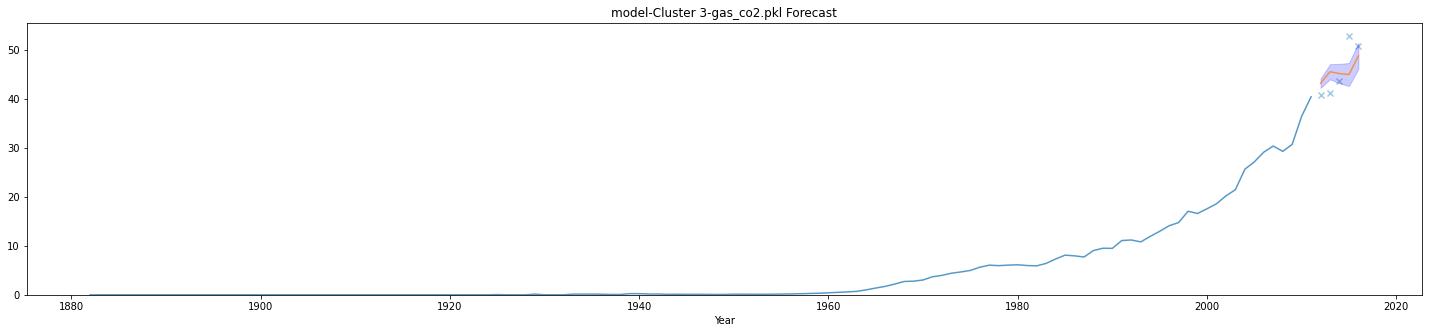

model-Cluster 3-gas_co2.pkl COMPLETED
FEATURE  oil_co2 REGION  Cluster 3
START  1855
ALT START  1855
Test RMSE: 5.648


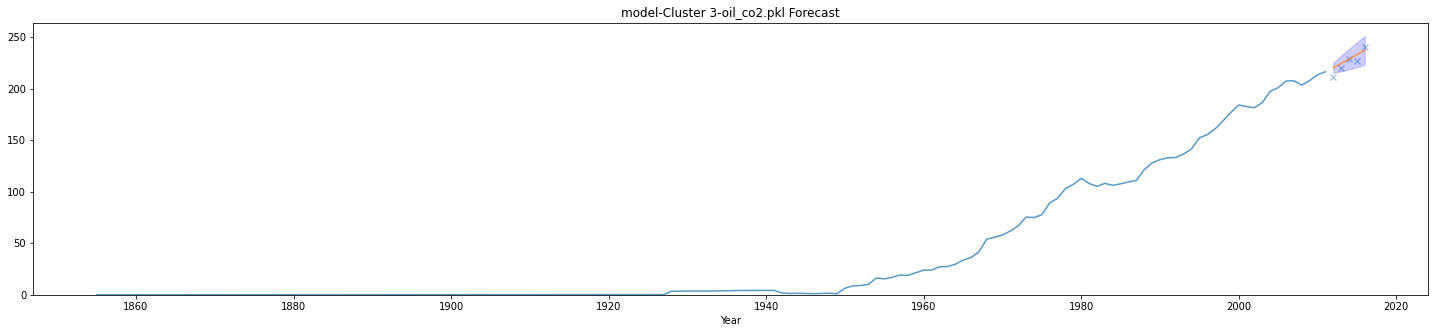

model-Cluster 3-oil_co2.pkl COMPLETED
FEATURE  gas_co2_per_capita REGION  Cluster 3
START  1882
ALT START  1882
Test RMSE: 0.135


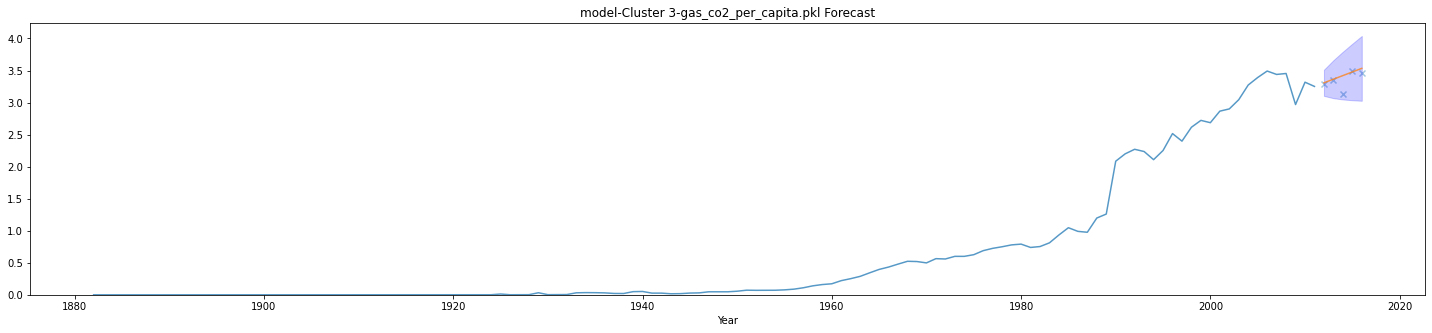

model-Cluster 3-gas_co2_per_capita.pkl COMPLETED
FEATURE  share_global_gas_co2 REGION  Cluster 3
START  1882
ALT START  1882
Test RMSE: 0.044


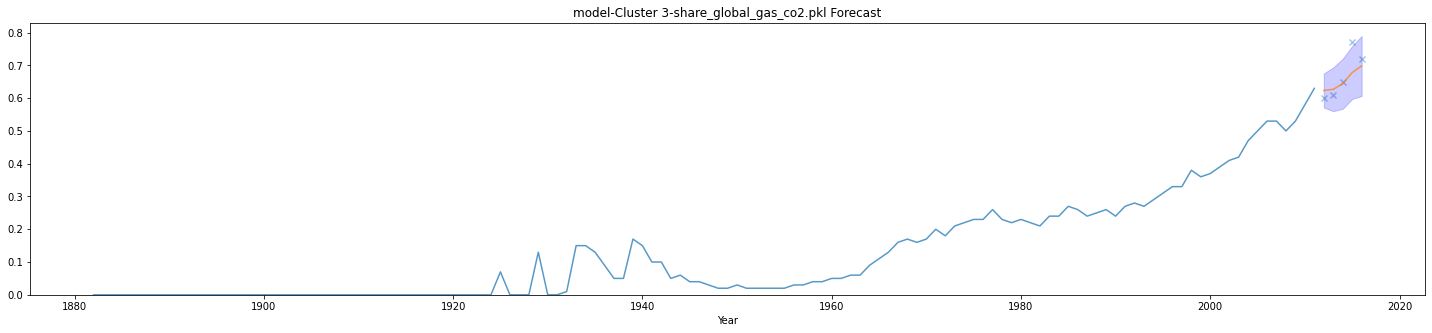

model-Cluster 3-share_global_gas_co2.pkl COMPLETED
FEATURE  cumulative_gas_co2 REGION  Cluster 3
START  1882
ALT START  1882
Test RMSE: 6.404


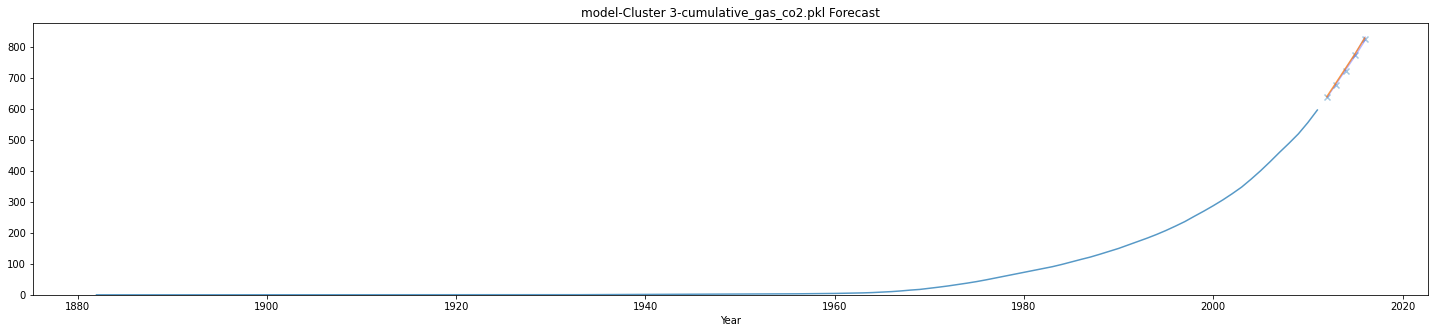

model-Cluster 3-cumulative_gas_co2.pkl COMPLETED
FEATURE  share_global_cumulative_gas_co2 REGION  Cluster 3
START  1882
ALT START  1882
Test RMSE: 0.017


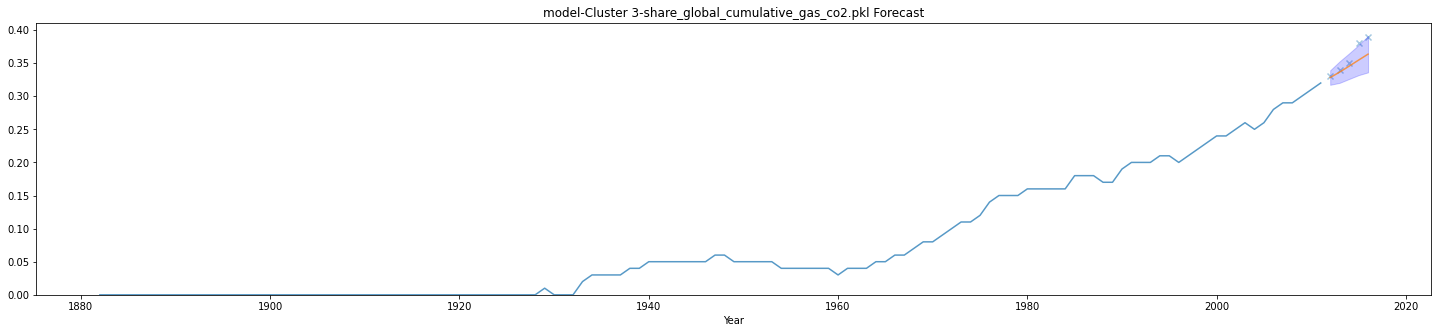

model-Cluster 3-share_global_cumulative_gas_co2.pkl COMPLETED
FEATURE  oil_co2_per_capita REGION  Cluster 3
START  1855
ALT START  1950
Test RMSE: 21.134


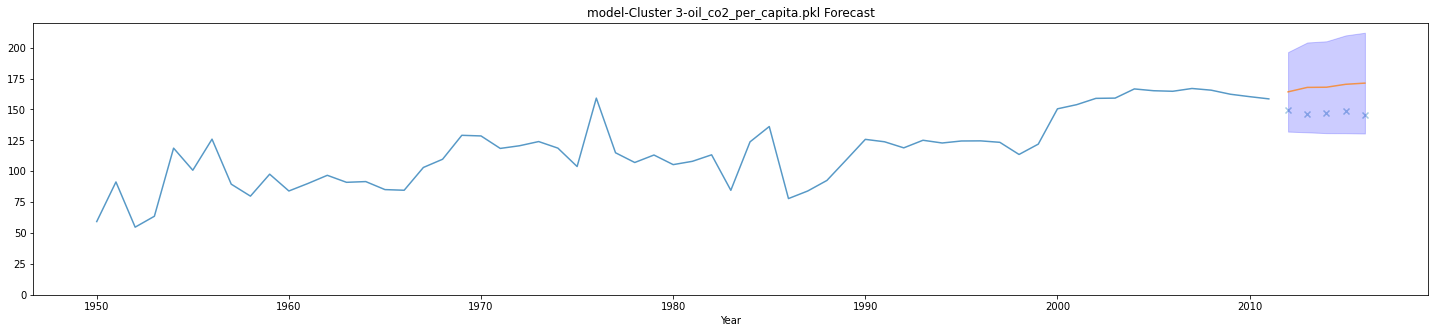

model-Cluster 3-oil_co2_per_capita.pkl COMPLETED
FEATURE  cumulative_oil_co2 REGION  Cluster 3
START  1855
ALT START  1855
Test RMSE: 16.848


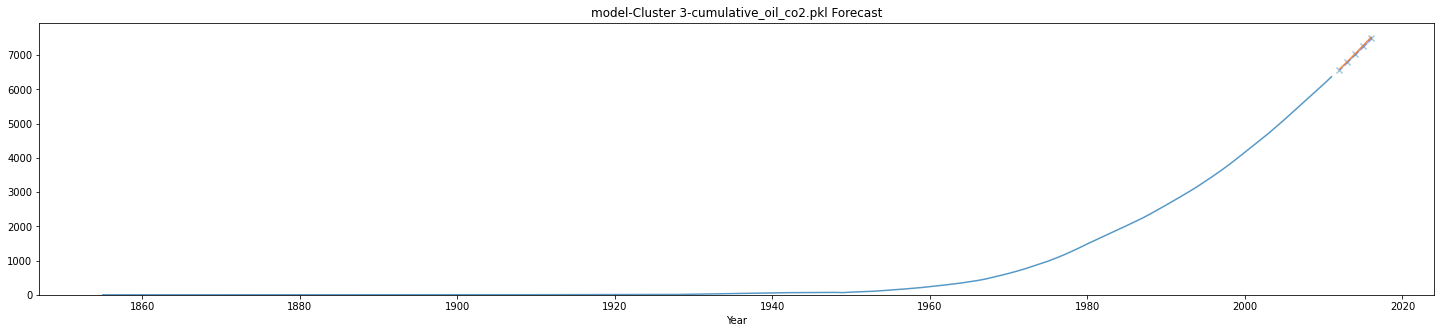

model-Cluster 3-cumulative_oil_co2.pkl COMPLETED
FEATURE  share_global_cumulative_oil_co2 REGION  Cluster 3
START  1855
ALT START  1855
Test RMSE: 0.042


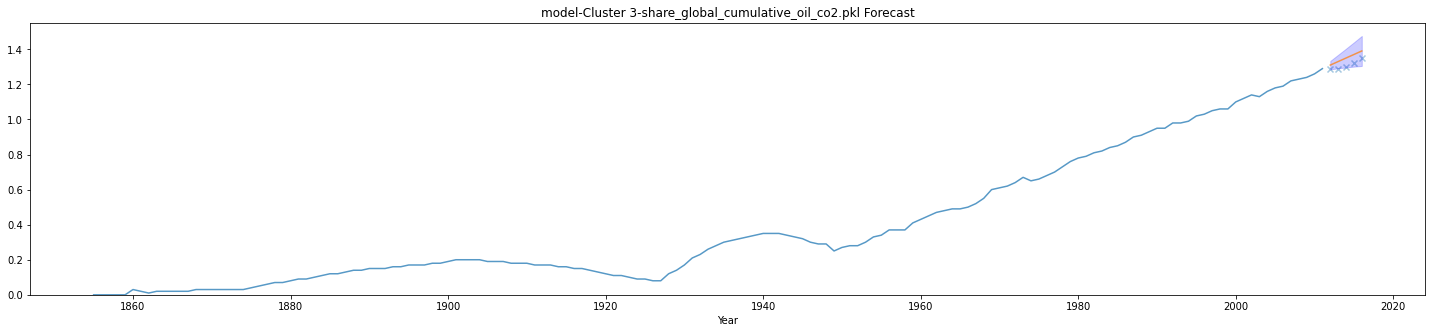

model-Cluster 3-share_global_cumulative_oil_co2.pkl COMPLETED
FEATURE  other_co2_per_capita REGION  Cluster 3
START  1904
ALT START  1990
Test RMSE: 0.028


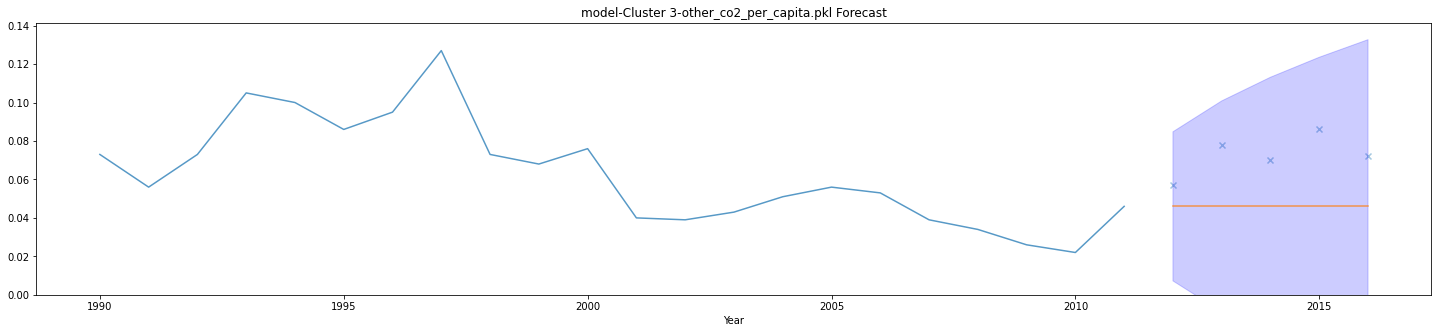

model-Cluster 3-other_co2_per_capita.pkl COMPLETED
FEATURE  trade_co2_share REGION  Cluster 3
START  1990
ALT START  1990
Test RMSE: 166.866


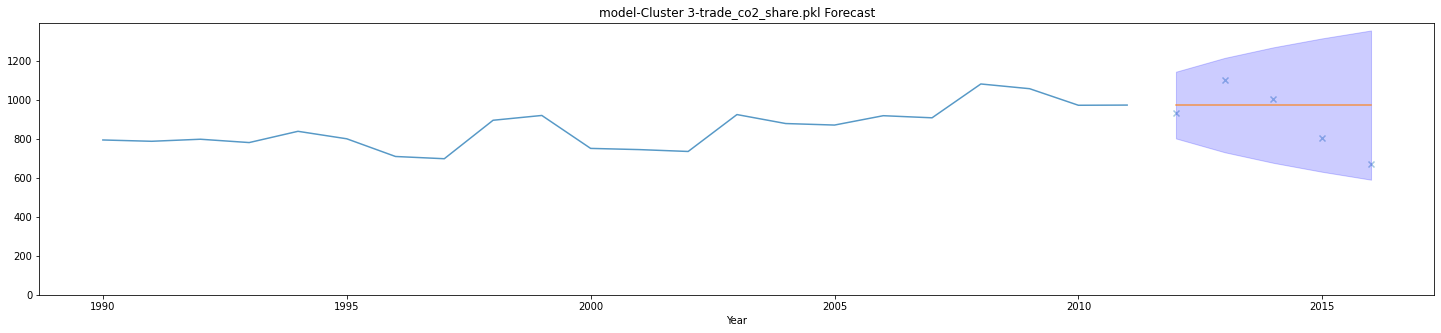

model-Cluster 3-trade_co2_share.pkl COMPLETED
FEATURE  share_global_oil_co2 REGION  Cluster 3
START  1855
ALT START  1855
Test RMSE: 0.050


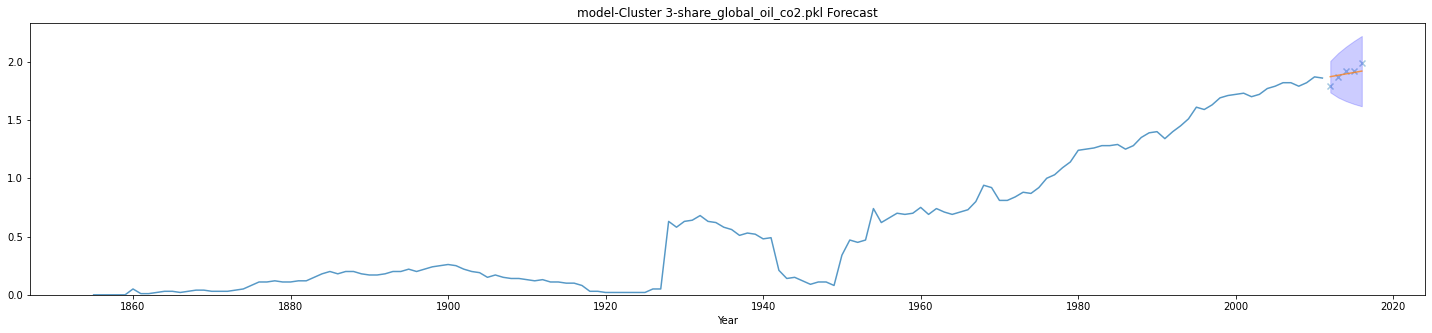

model-Cluster 3-share_global_oil_co2.pkl COMPLETED
FEATURE  cumulative_other_co2 REGION  Cluster 3
START  1904
ALT START  1904
Test RMSE: 1.844


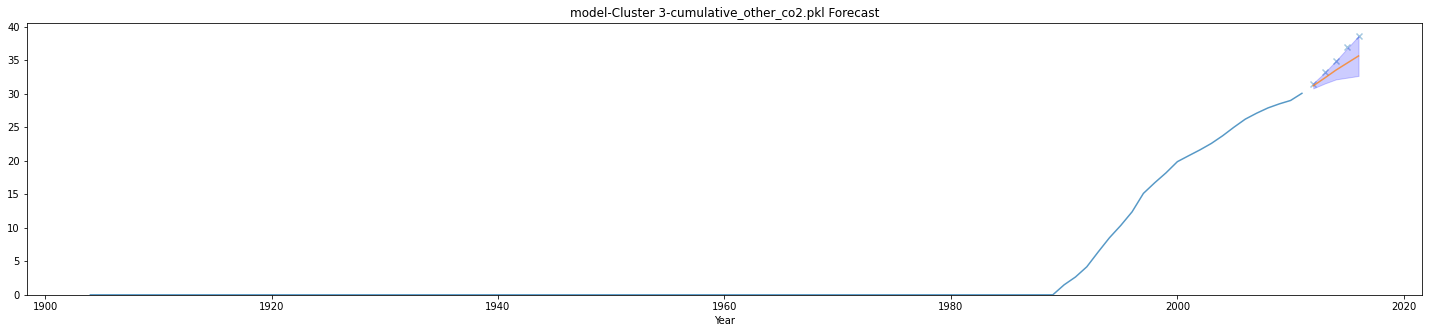

model-Cluster 3-cumulative_other_co2.pkl COMPLETED
FEATURE  share_global_other_co2 REGION  Cluster 3
START  1904
ALT START  1904
Test RMSE: 0.200


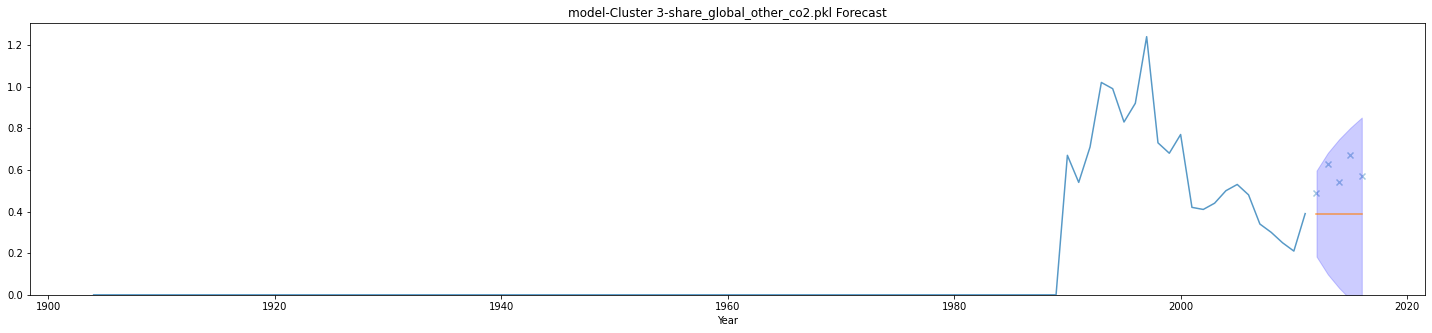

model-Cluster 3-share_global_other_co2.pkl COMPLETED
FEATURE  share_global_cumulative_other_co2 REGION  Cluster 3
START  1904
ALT START  1904
Test RMSE: 0.006


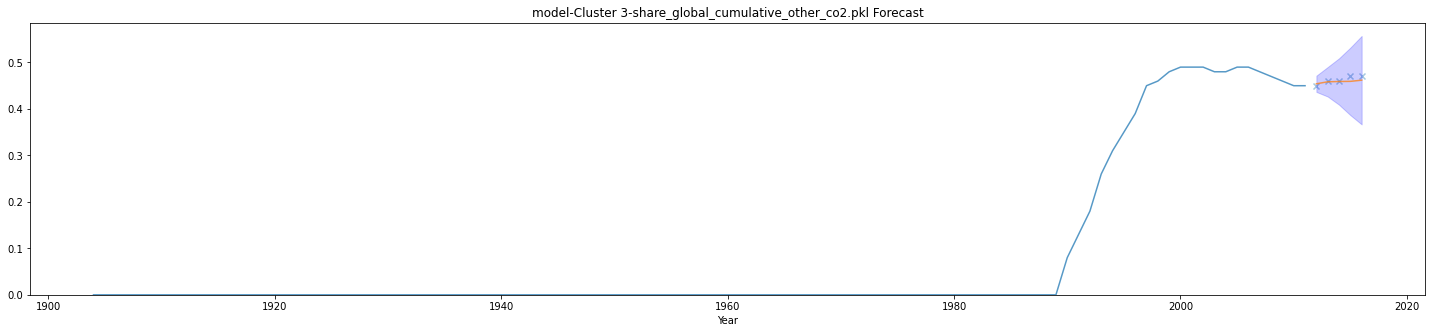

model-Cluster 3-share_global_cumulative_other_co2.pkl COMPLETED
FEATURE  population REGION  Cluster 3
START  1750
ALT START  1750
Test RMSE: 11184774.125


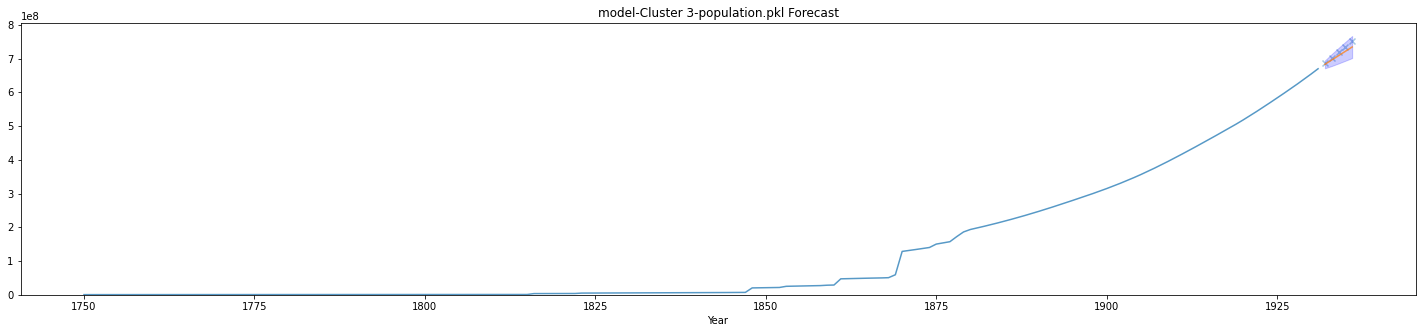

model-Cluster 3-population.pkl COMPLETED
FEATURE  gdp REGION  Cluster 3
START  1820
ALT START  1820
Test RMSE: 18131047338.947


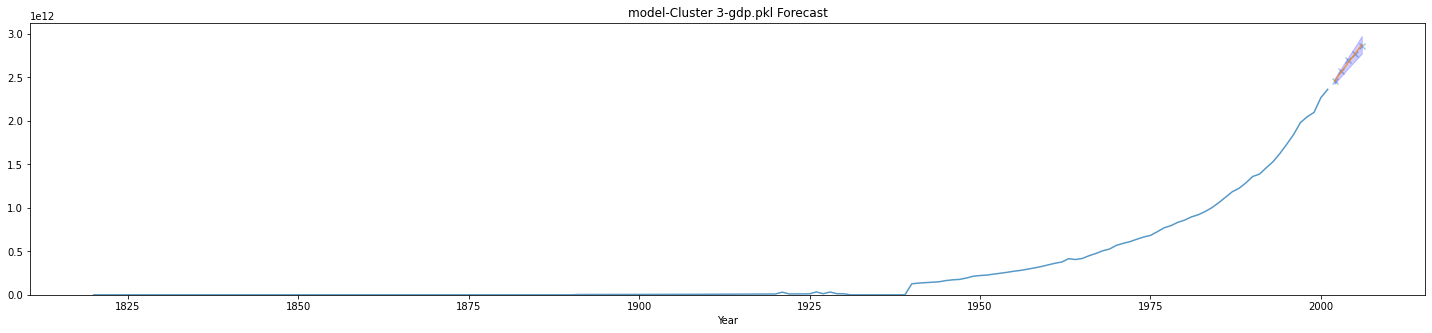

model-Cluster 3-gdp.pkl COMPLETED
FEATURE  primary_energy_consumption REGION  Cluster 3
START  1965
ALT START  1980
Test RMSE: 22.885


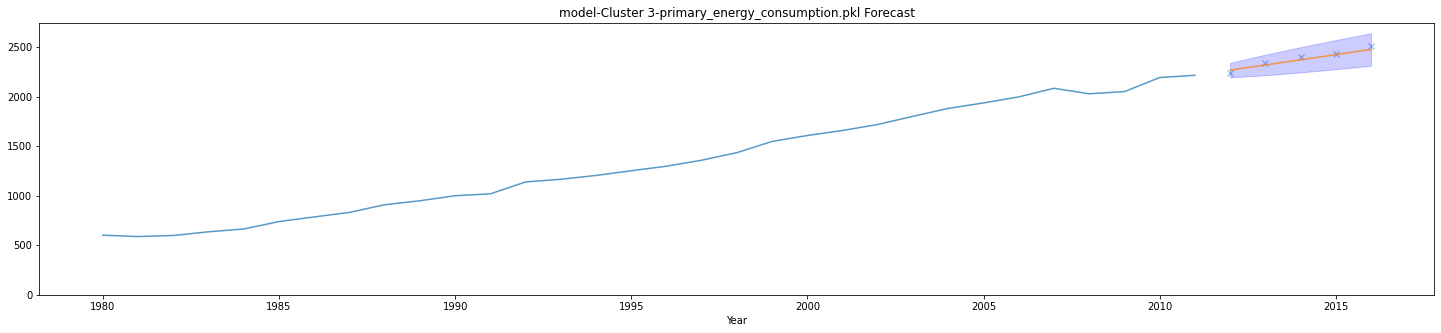

model-Cluster 3-primary_energy_consumption.pkl COMPLETED
FEATURE  energy_per_capita REGION  Cluster 3
START  1965
ALT START  1980
Test RMSE: 10301.186


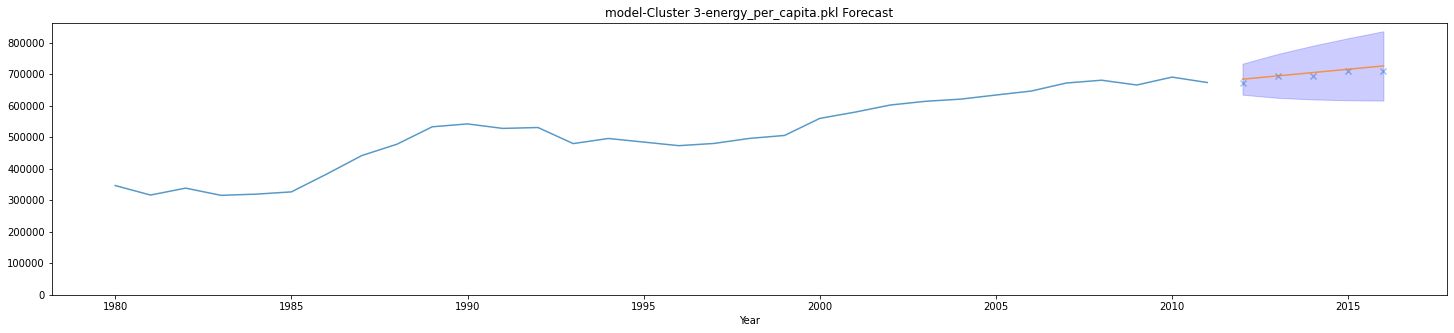

model-Cluster 3-energy_per_capita.pkl COMPLETED
FEATURE  energy_per_gdp REGION  Cluster 3
START  1965
ALT START  1980
Test RMSE: 0.481


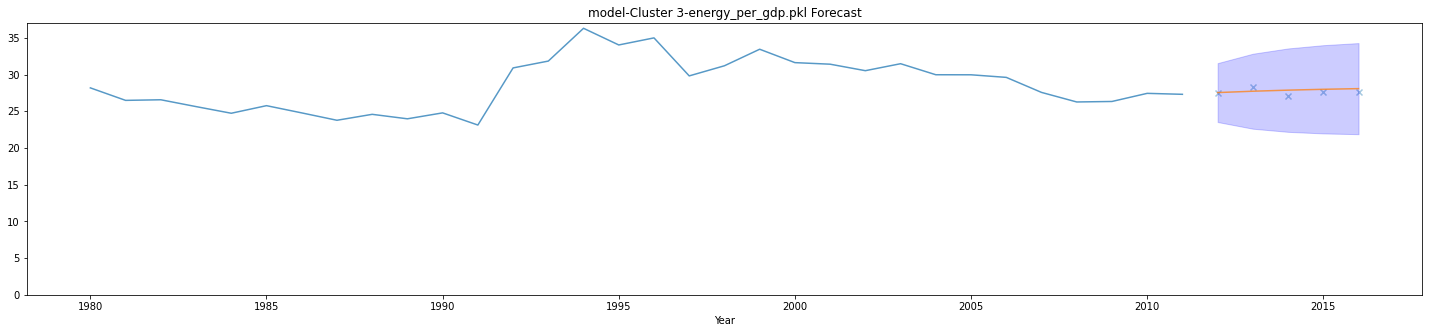

model-Cluster 3-energy_per_gdp.pkl COMPLETED
FEATURE  current_gdp REGION  Cluster 3
START  1960
ALT START  1960
Test RMSE: 73071153757.139


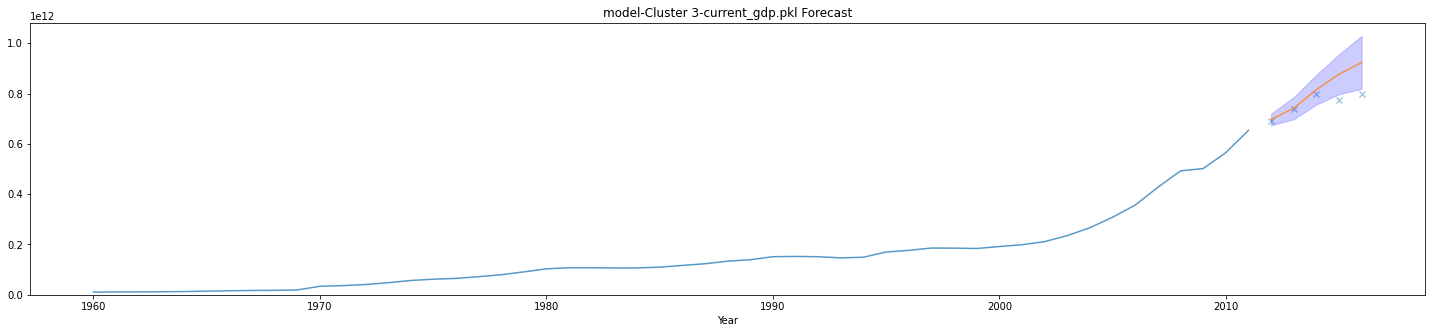

model-Cluster 3-current_gdp.pkl COMPLETED
FEATURE  constant_gdp REGION  Cluster 3
START  1960
ALT START  1960
Test RMSE: 9066414493.081


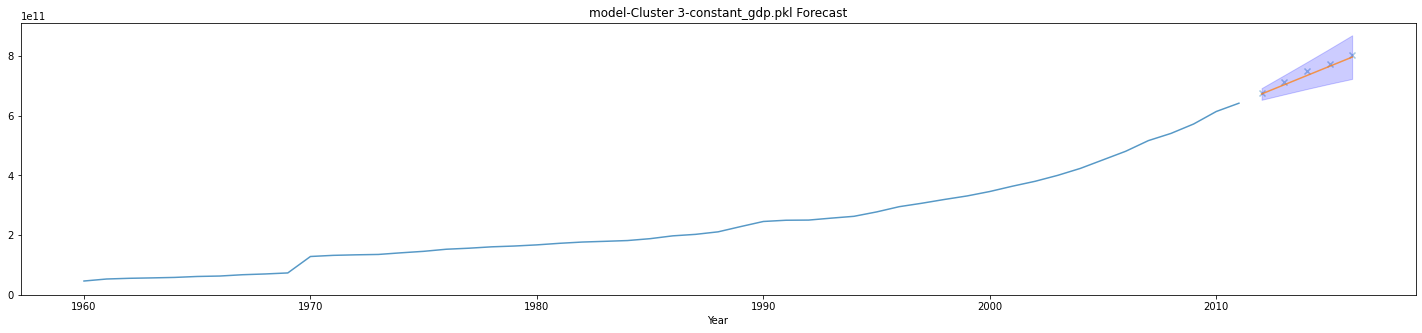

model-Cluster 3-constant_gdp.pkl COMPLETED
FEATURE  manufacturing_gdp REGION  Cluster 3
START  1960
ALT START  1960
Test RMSE: 21766441709.689


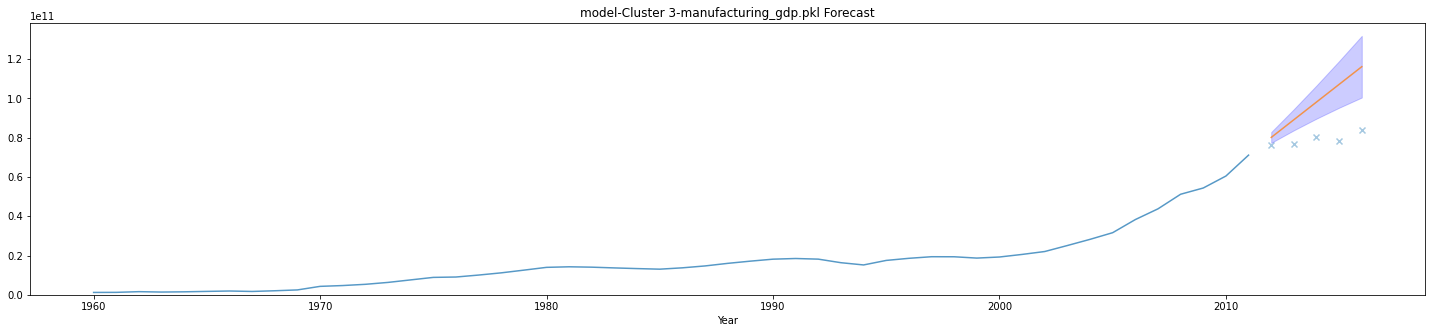

model-Cluster 3-manufacturing_gdp.pkl COMPLETED
FEATURE  medium_to_high_tech_percent REGION  Cluster 3
START  1990
ALT START  1990
Test RMSE: 7.172


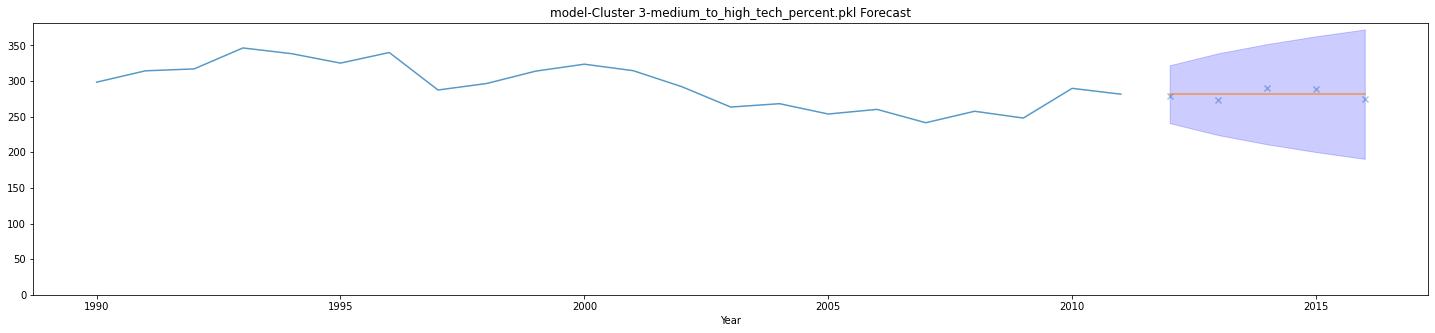

model-Cluster 3-medium_to_high_tech_percent.pkl COMPLETED
FEATURE  export REGION  Cluster 3
START  1960
ALT START  1960
Test RMSE: 21213826708.836


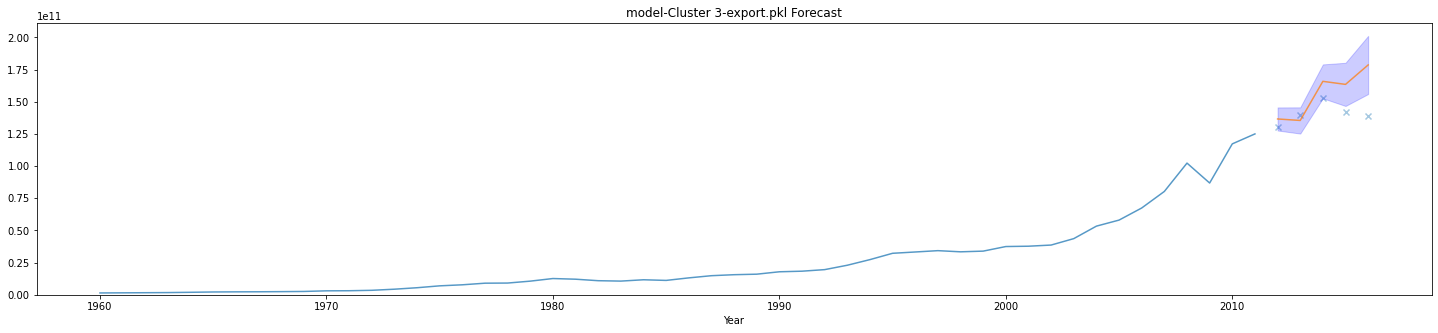

model-Cluster 3-export.pkl COMPLETED
FEATURE  import REGION  Cluster 3
START  1960
ALT START  1960
Test RMSE: 30019196881.707


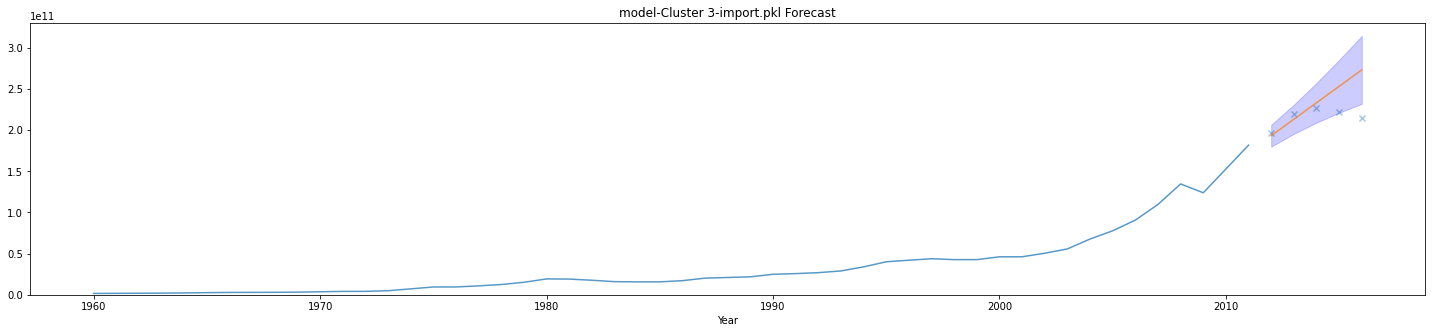

model-Cluster 3-import.pkl COMPLETED
FEATURE  real_gdp_growth_percent REGION  Cluster 3
START  1961
ALT START  1961
Test RMSE: 62.105


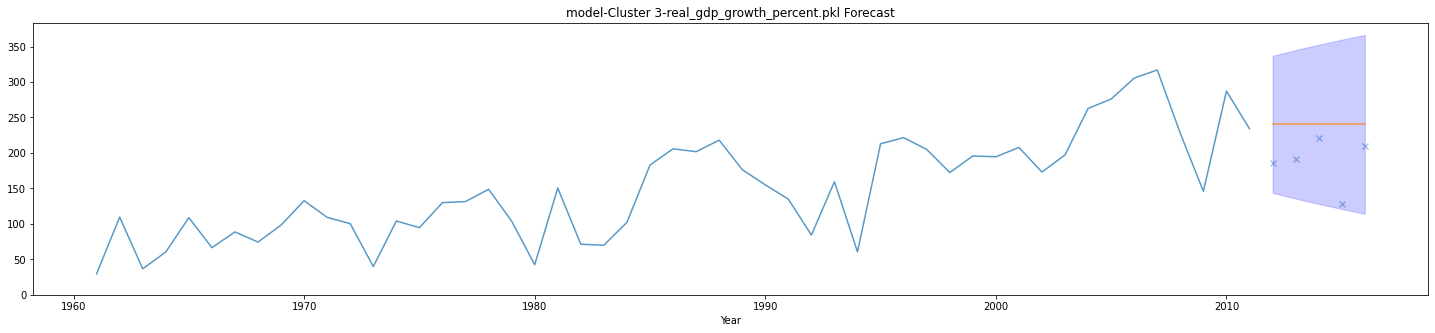

model-Cluster 3-real_gdp_growth_percent.pkl COMPLETED
FEATURE  urban_population_percent REGION  Cluster 3
START  1960
ALT START  1960
Test RMSE: 32.933


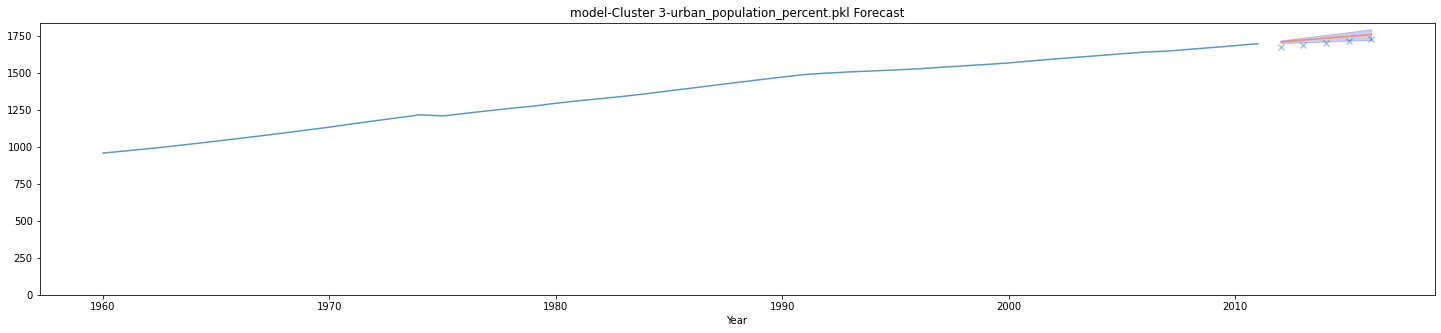

model-Cluster 3-urban_population_percent.pkl COMPLETED
FEATURE  merchandise_export REGION  Cluster 3
START  1960
ALT START  1960
Test RMSE: 40533289630.002


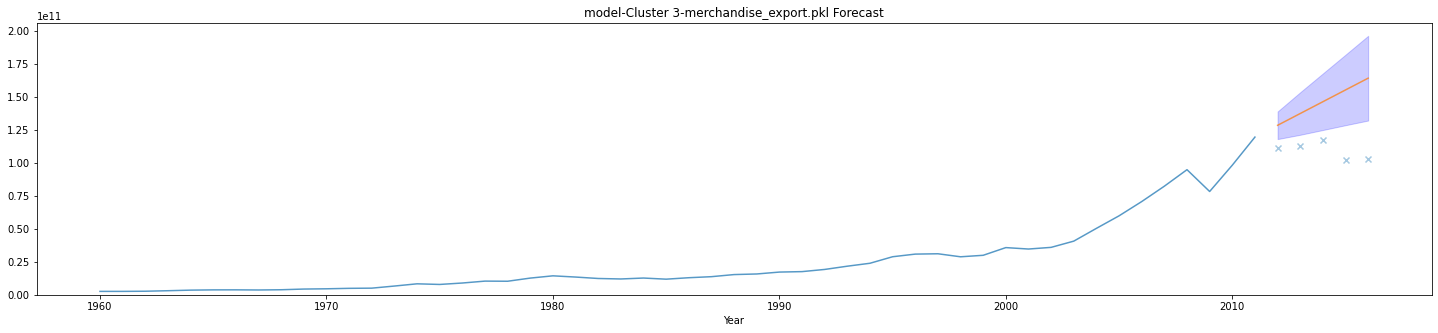

model-Cluster 3-merchandise_export.pkl COMPLETED
FEATURE  merchandise_import REGION  Cluster 3
START  1960
ALT START  1960
Test RMSE: 24554398194.504


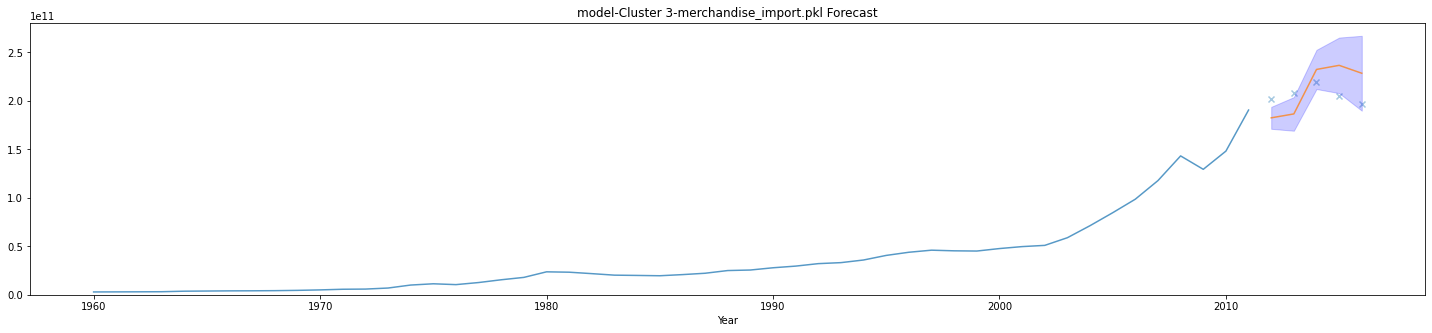

model-Cluster 3-merchandise_import.pkl COMPLETED
FEATURE  manufacturer_export_share REGION  Cluster 3
START  1962
ALT START  1989
Test RMSE: 203.027


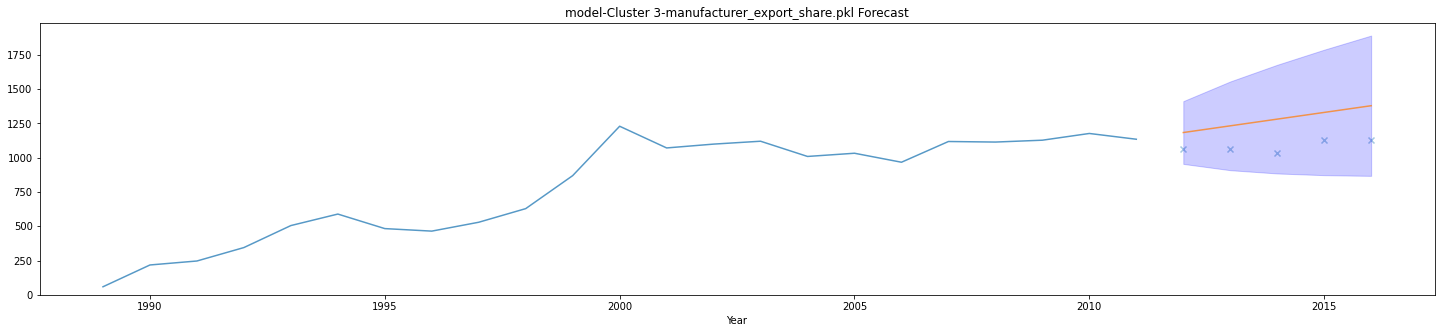

model-Cluster 3-manufacturer_export_share.pkl COMPLETED
FEATURE  manufacturer_export REGION  Cluster 3
START  1962
ALT START  1962
Test RMSE: 2822043807.451


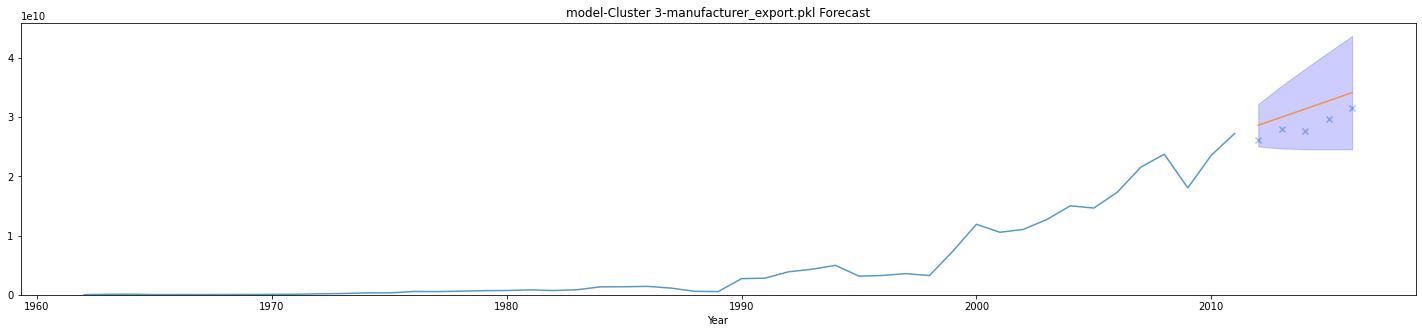

model-Cluster 3-manufacturer_export.pkl COMPLETED
FEATURE  co2_emission_electricity REGION  Cluster 3
START  1990
ALT START  1990
Test RMSE: 10353.227


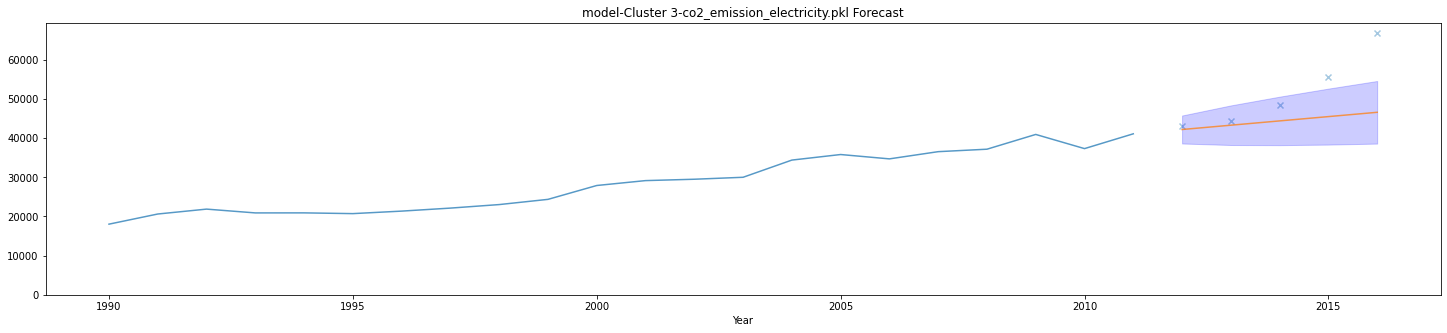

model-Cluster 3-co2_emission_electricity.pkl COMPLETED
FEATURE  co2_emission_other_fuel REGION  Cluster 3
START  1990
ALT START  1990
Test RMSE: 1691.073


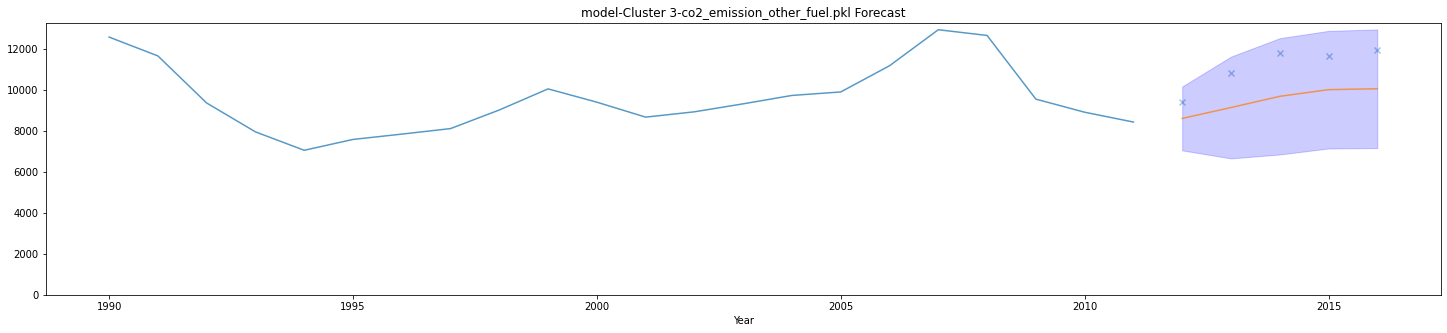

model-Cluster 3-co2_emission_other_fuel.pkl COMPLETED
FEATURE  co2_emission_transport REGION  Cluster 3
START  1990
ALT START  1990
Test RMSE: 4409.785


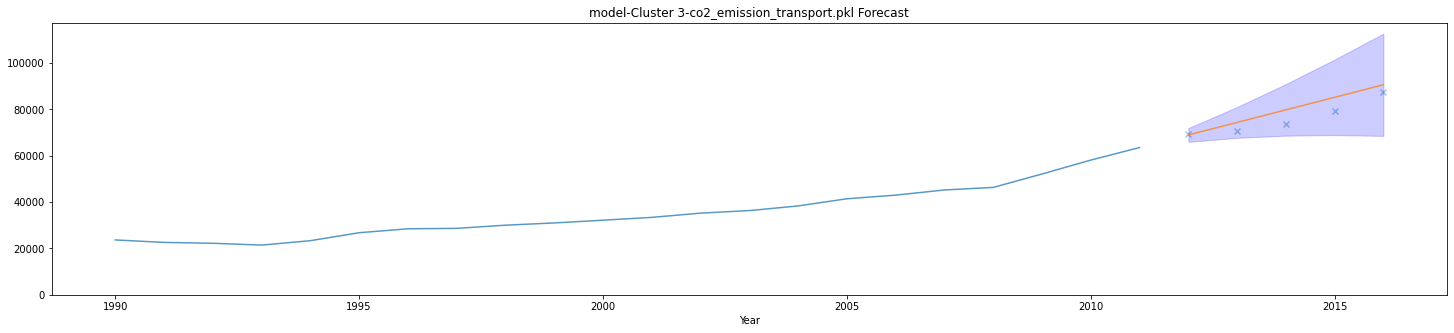

model-Cluster 3-co2_emission_transport.pkl COMPLETED
FEATURE  co2_emission_bunkers REGION  Cluster 3
START  1990
ALT START  1990
Test RMSE: 1739.147


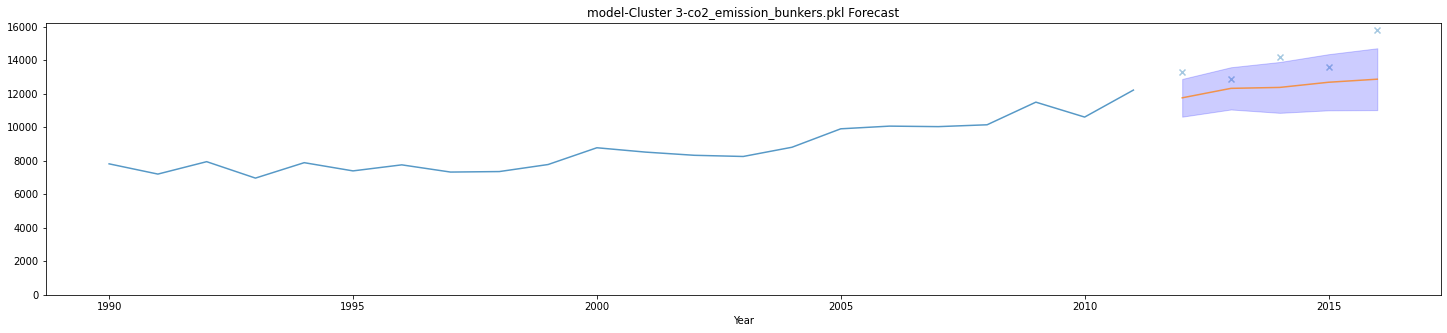

model-Cluster 3-co2_emission_bunkers.pkl COMPLETED
FEATURE  co2_emission_industrial_process REGION  Cluster 3
START  1990
ALT START  1990
Test RMSE: 1388.879


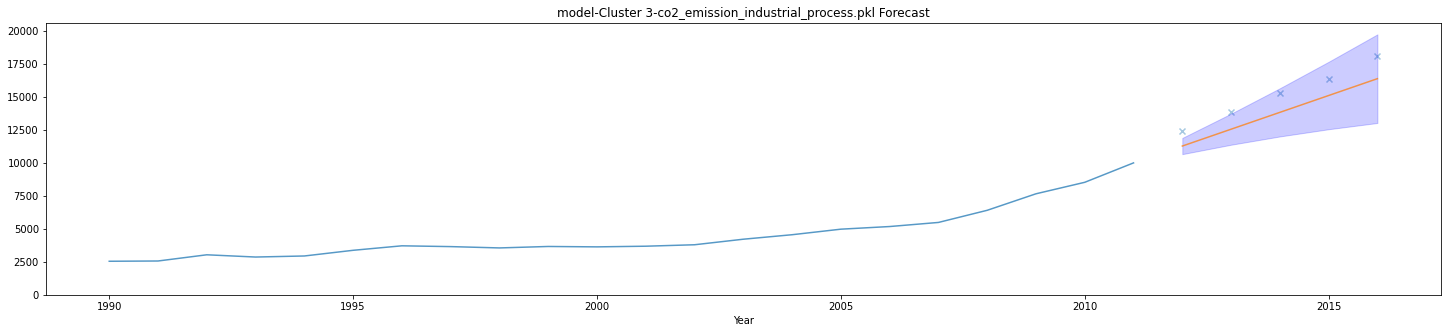

model-Cluster 3-co2_emission_industrial_process.pkl COMPLETED
FEATURE  co2_emission_per_capita REGION  Cluster 3
START  1960
ALT START  1960
Test RMSE: 17.355


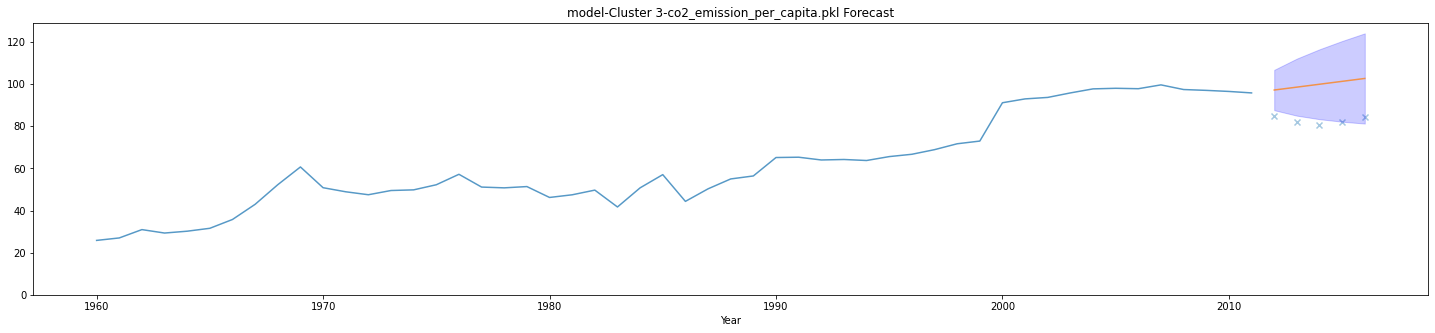

model-Cluster 3-co2_emission_per_capita.pkl COMPLETED
FEATURE  constant_gdp_per_capita REGION  Cluster 3
START  1960
ALT START  1970
Test RMSE: 26725.630


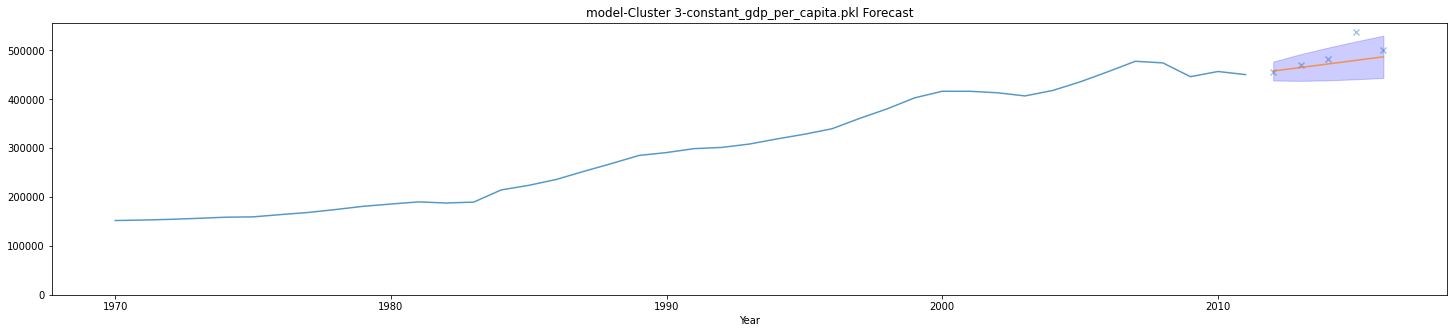

model-Cluster 3-constant_gdp_per_capita.pkl COMPLETED
FEATURE  manufacturing_percent REGION  Cluster 3
START  1960
ALT START  1960
Test RMSE: 19.429


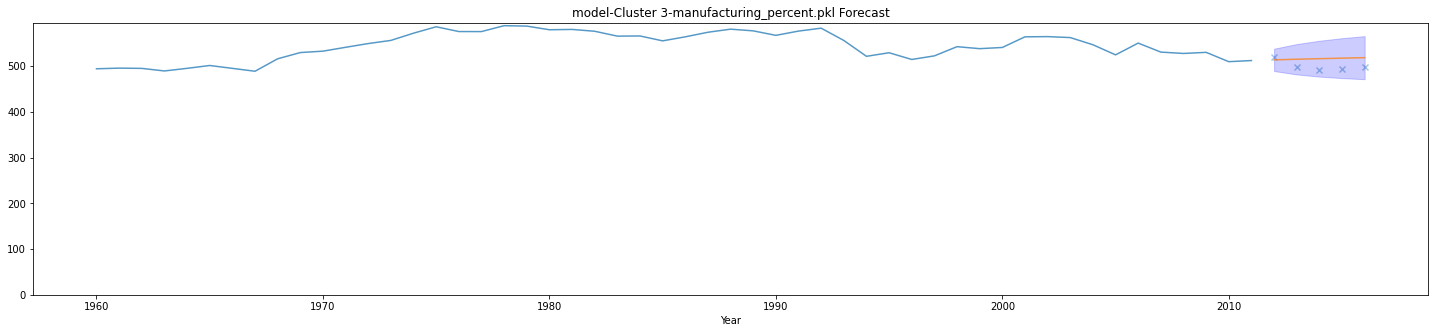

model-Cluster 3-manufacturing_percent.pkl COMPLETED
FEATURE  medium_to_high_tech_gdp REGION  Cluster 3
START  1990
ALT START  1990
Test RMSE: 1552348890.429


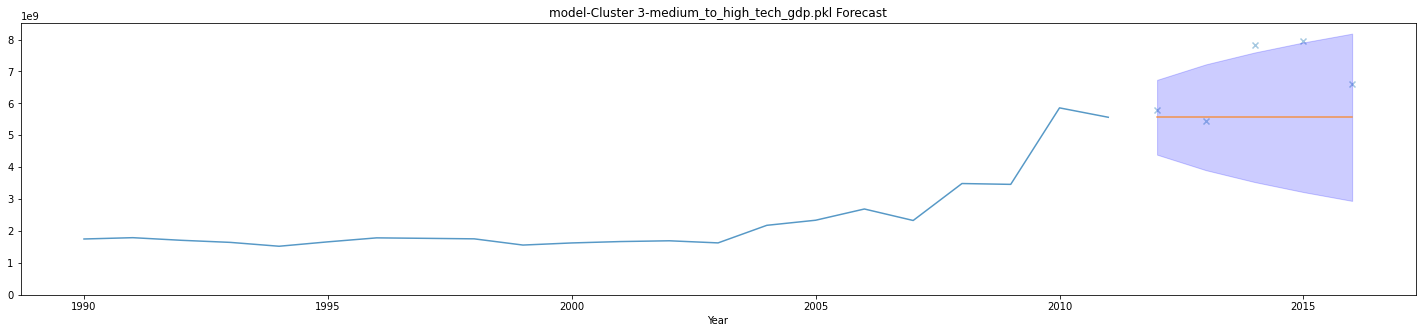

model-Cluster 3-medium_to_high_tech_gdp.pkl COMPLETED
FEATURE  co2_emission_per_constant_gdp REGION  Cluster 3
START  1960
ALT START  1970
Test RMSE: 0.629


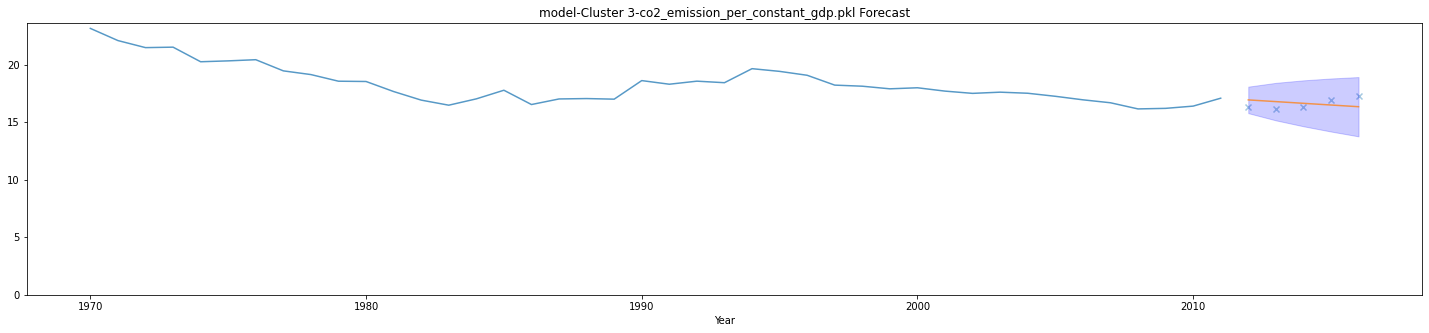

model-Cluster 3-co2_emission_per_constant_gdp.pkl COMPLETED
FEATURE  trade_openness REGION  Cluster 3
START  1960
ALT START  1960
Test RMSE: 164.200


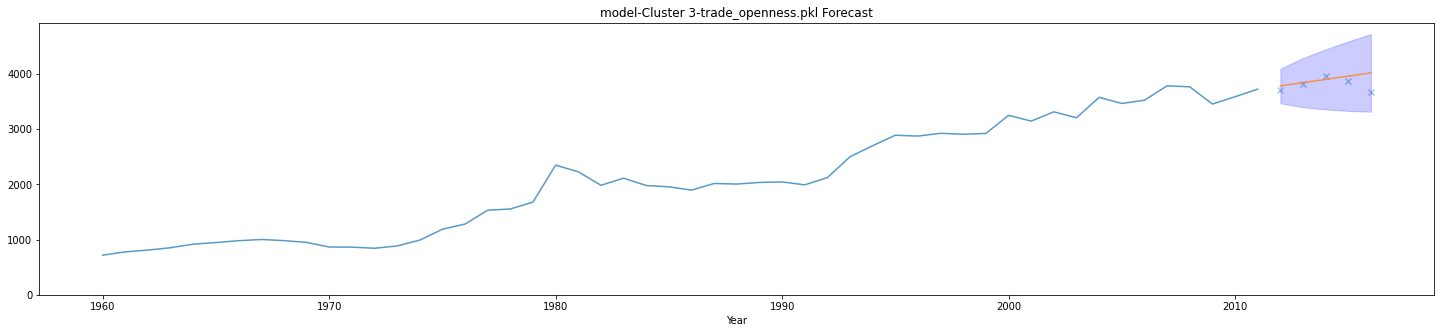

model-Cluster 3-trade_openness.pkl COMPLETED
FEATURE  share_of_merchandise_export REGION  Cluster 3
START  1960
ALT START  1960
Test RMSE: 282.190


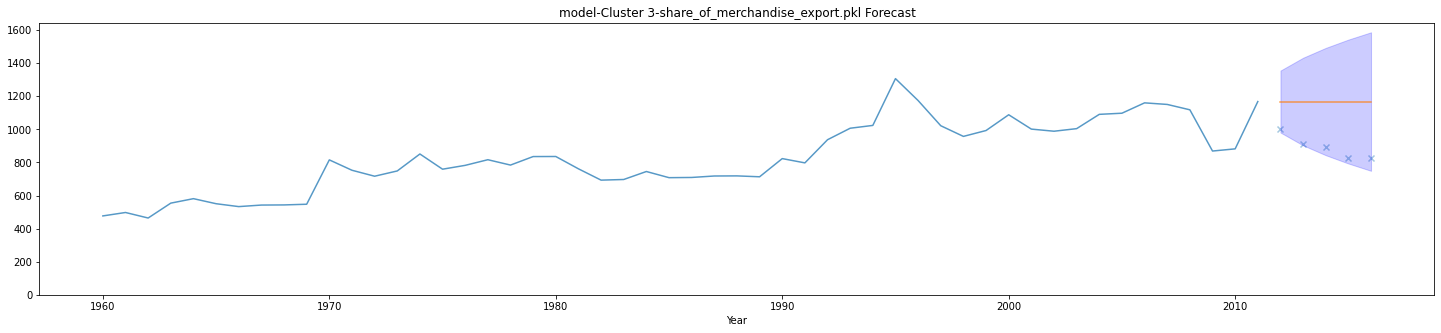

model-Cluster 3-share_of_merchandise_export.pkl COMPLETED
FEATURE  share_of_merchandise_import REGION  Cluster 3
START  1960
ALT START  1960
Test RMSE: 364.371


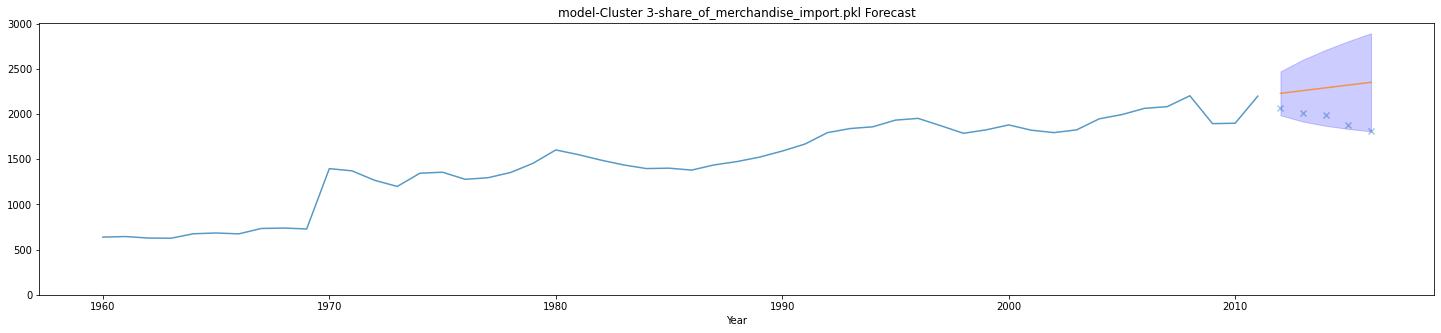

model-Cluster 3-share_of_merchandise_import.pkl COMPLETED
FEATURE  industrial_gdp REGION  Cluster 3
START  1960
ALT START  1960
Test RMSE: 35336491585.282


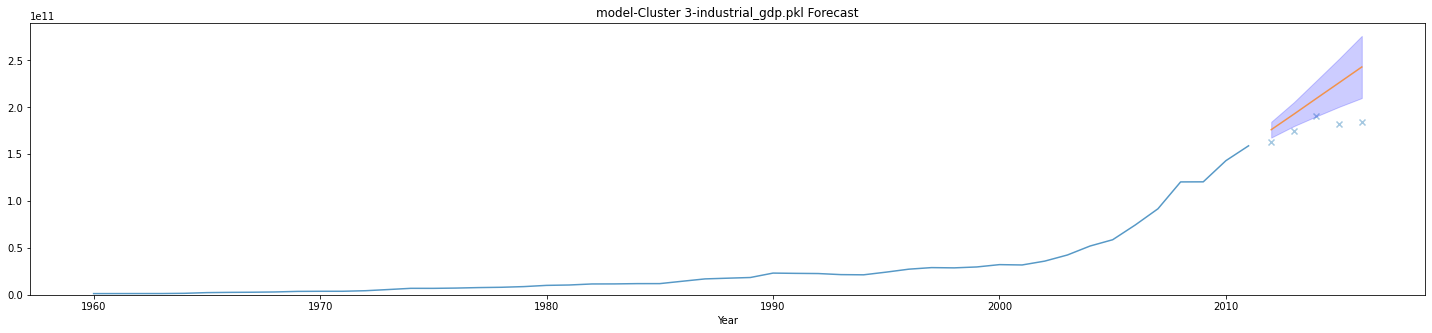

model-Cluster 3-industrial_gdp.pkl COMPLETED
FEATURE  co2_country_share_percent REGION  Cluster 3
START  1960
ALT START  1960
Test RMSE: 0.088


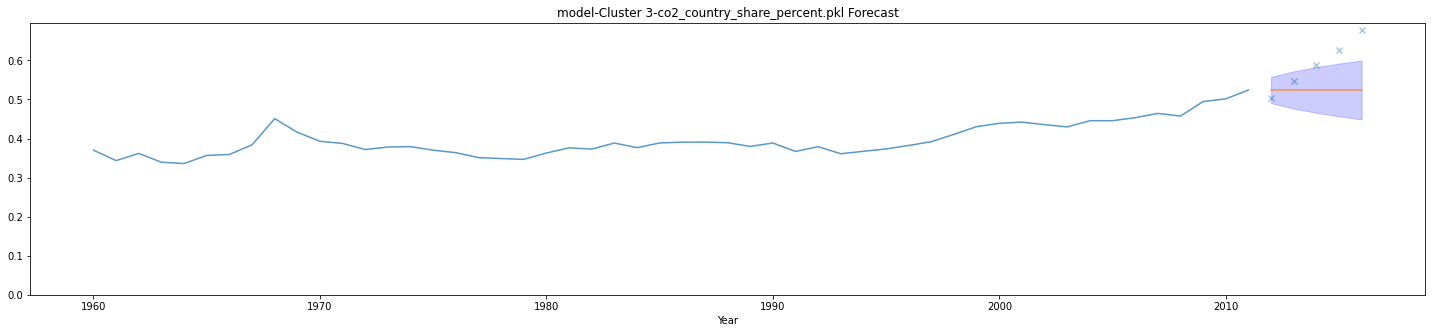

model-Cluster 3-co2_country_share_percent.pkl COMPLETED
FEATURE  manufacturing_country_share_percent REGION  Cluster 3
START  1960
ALT START  1960
Test RMSE: 0.054


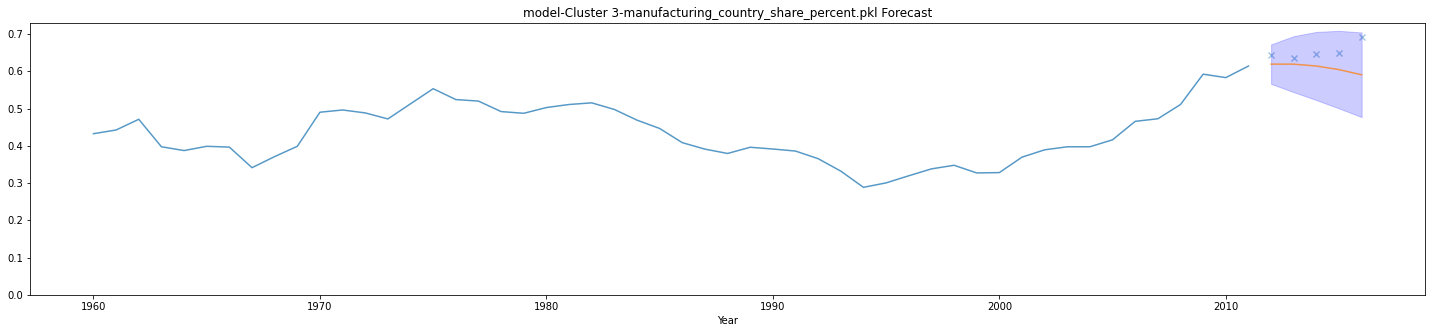

model-Cluster 3-manufacturing_country_share_percent.pkl COMPLETED
FEATURE  iea_primary_energy_consumption REGION  Cluster 3
START  1960
ALT START  1971
Test RMSE: 627.661


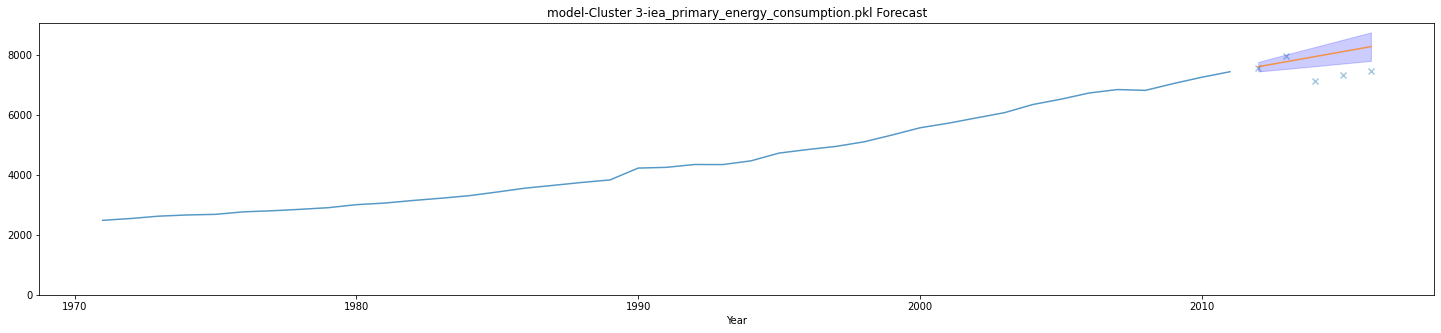

model-Cluster 3-iea_primary_energy_consumption.pkl COMPLETED
FEATURE  renewable_energy_consumption REGION  Cluster 3
START  1971
ALT START  1990
Test RMSE: 517.918


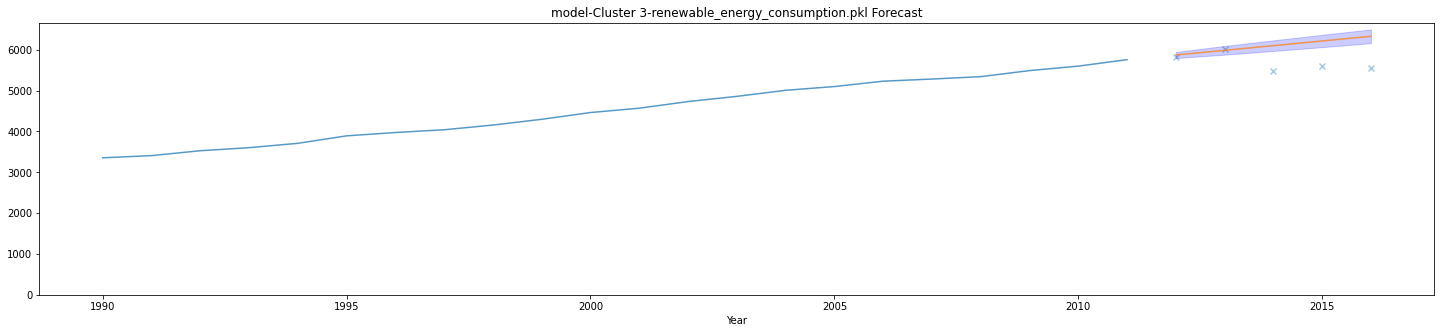

model-Cluster 3-renewable_energy_consumption.pkl COMPLETED
FEATURE  coal_consumption REGION  Cluster 3
START  1971
ALT START  1971
Test RMSE: 0.000


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pmdarima/arima/auto.py:460: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '


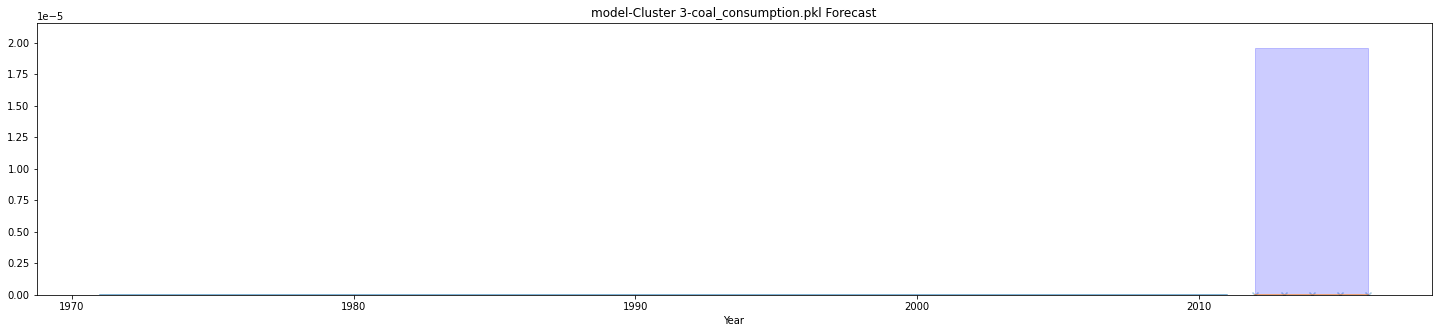

model-Cluster 3-coal_consumption.pkl COMPLETED
FEATURE  oil_consumption REGION  Cluster 3
START  1971
ALT START  1971


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pmdarima/arima/auto.py:460: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '


Test RMSE: 0.000


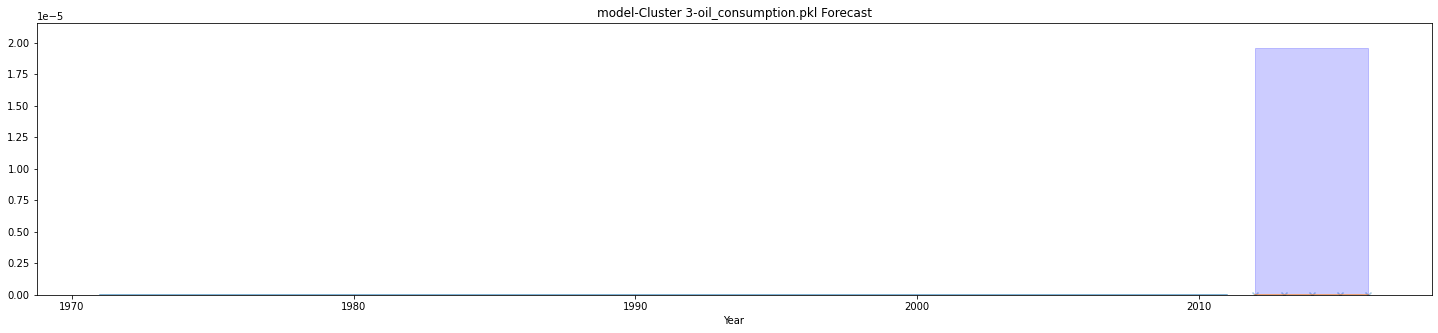

model-Cluster 3-oil_consumption.pkl COMPLETED
FEATURE  total_electricity_production REGION  Cluster 3
START  1971
ALT START  1971
Test RMSE: 0.000


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pmdarima/arima/auto.py:460: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '


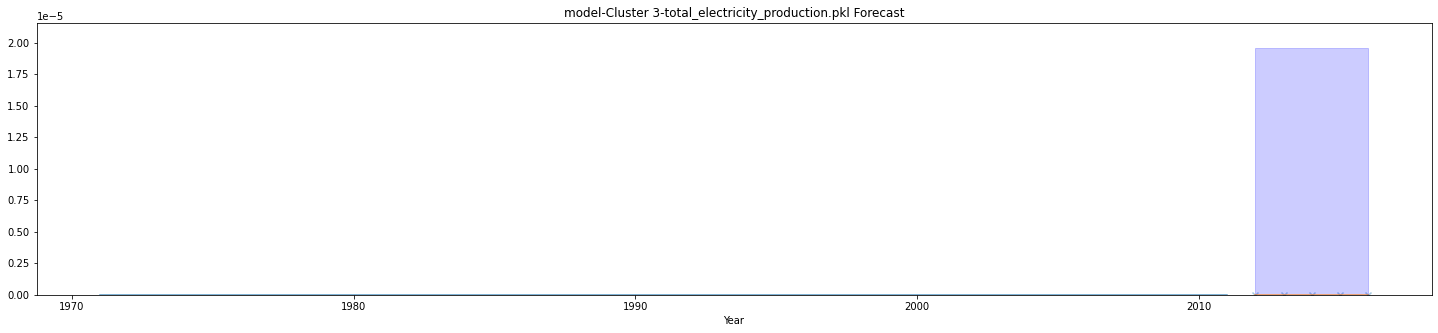

model-Cluster 3-total_electricity_production.pkl COMPLETED
FEATURE  electricity_production_from_renewable REGION  Cluster 3
START  1971
ALT START  1971
Test RMSE: 0.000


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pmdarima/arima/auto.py:460: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '


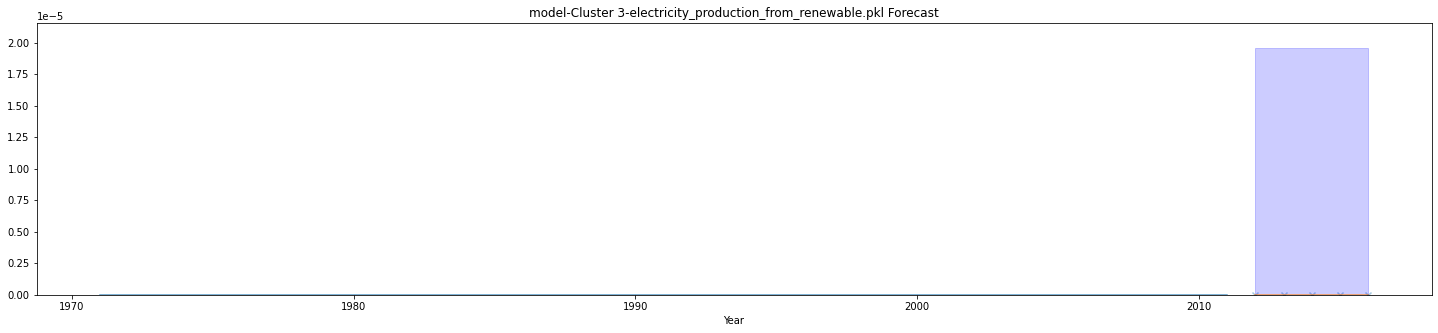

model-Cluster 3-electricity_production_from_renewable.pkl COMPLETED
FEATURE  primary_energy_consumption_per_capita REGION  Cluster 3
START  1960
ALT START  1971
Test RMSE: 1163.960


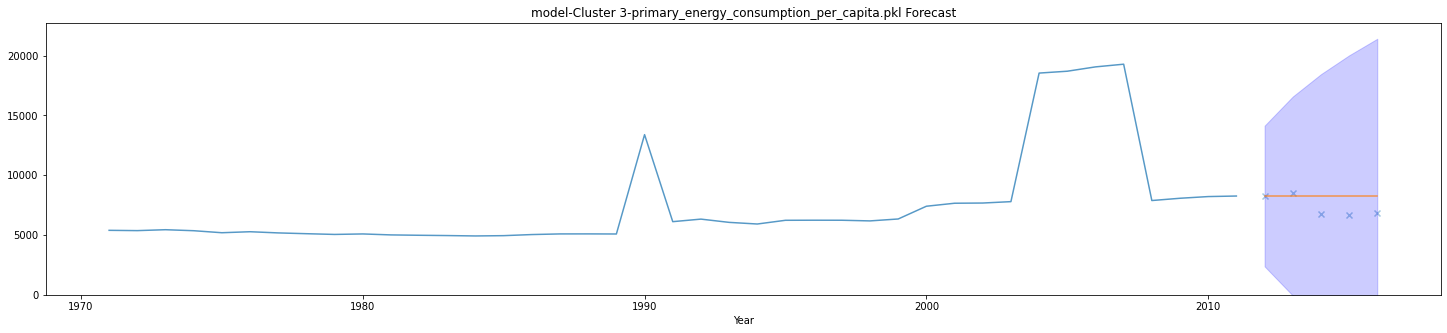

model-Cluster 3-primary_energy_consumption_per_capita.pkl COMPLETED
FEATURE  fossil_energy_consumption_share REGION  Cluster 3
START  1971
ALT START  1971
Test RMSE: 0.000


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pmdarima/arima/auto.py:460: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '


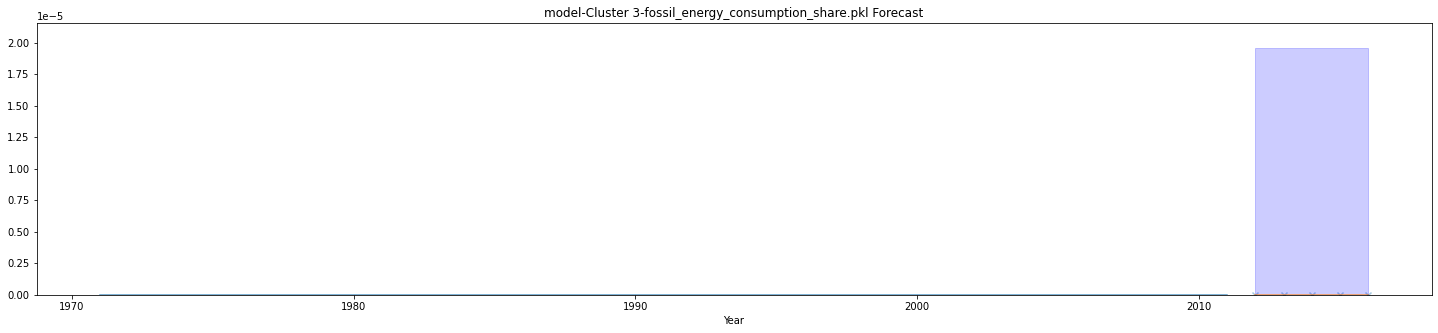

model-Cluster 3-fossil_energy_consumption_share.pkl COMPLETED
FEATURE  renewable_electricity_production_share REGION  Cluster 3
START  1971
ALT START  1990
Test RMSE: 0.000


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pmdarima/arima/auto.py:460: UserWarning: Input time-series is completely constant; returning a (0, 0, 0) ARMA.
  warnings.warn('Input time-series is completely constant; '


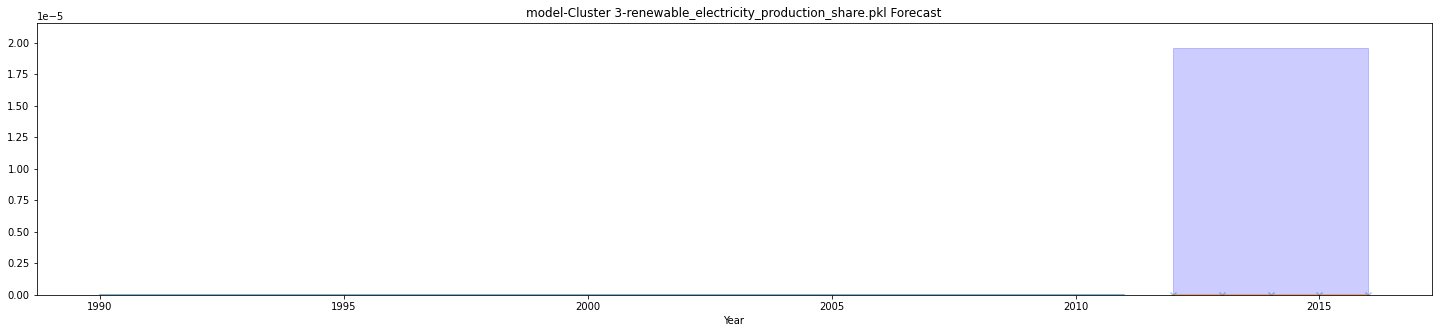

model-Cluster 3-renewable_electricity_production_share.pkl COMPLETED
FEATURE  energy_intensity REGION  Cluster 3
START  1960
ALT START  1990
Test RMSE: 2.692


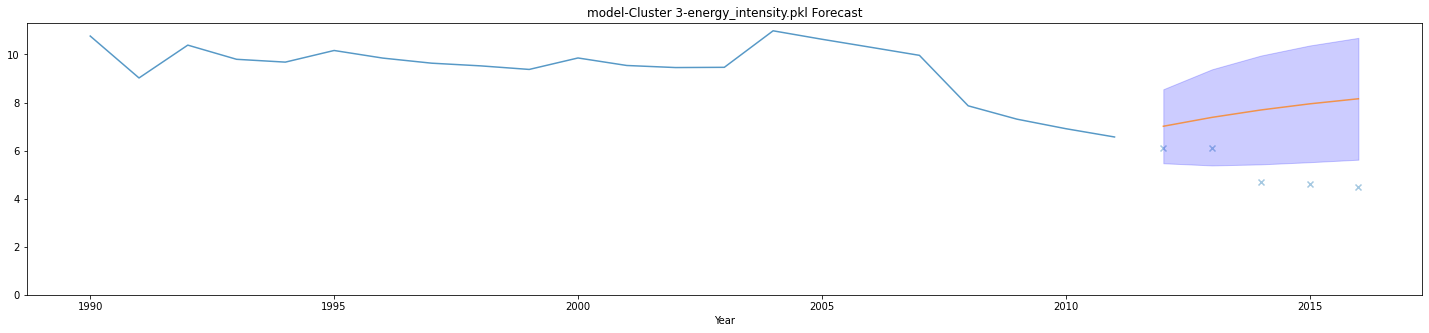

model-Cluster 3-energy_intensity.pkl COMPLETED
FEATURE  renewable_energy_consumption_share REGION  Cluster 3
START  1971
ALT START  1990
Test RMSE: 82.628


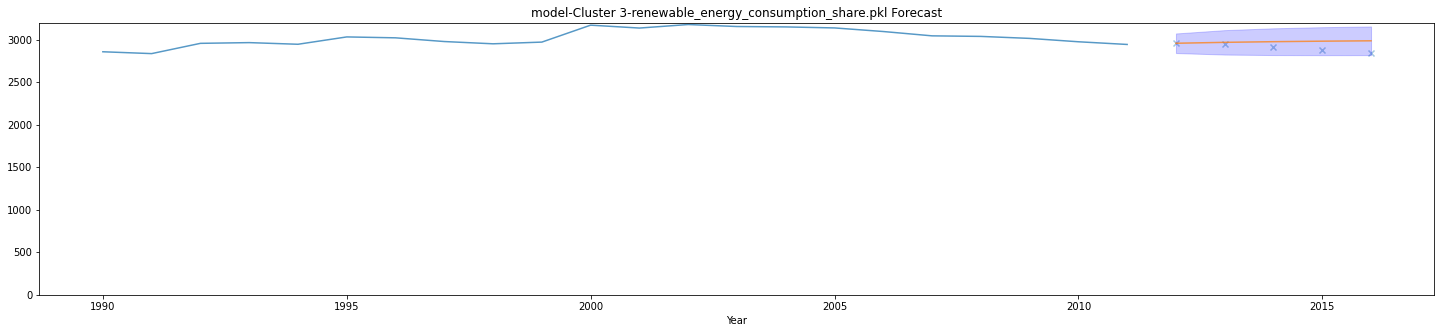

model-Cluster 3-renewable_energy_consumption_share.pkl COMPLETED
FEATURE  percent_of_environment_patent REGION  Cluster 3
START  1960
ALT START  1960
Test RMSE: 108.620


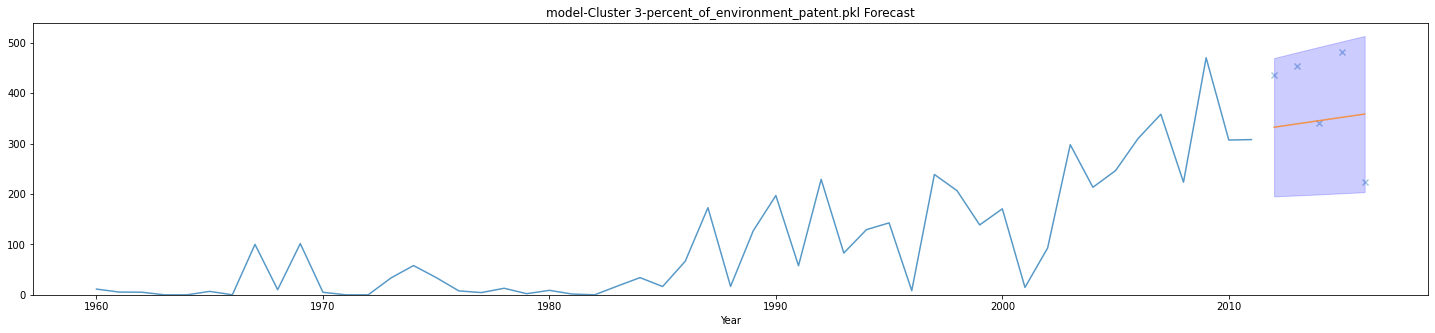

model-Cluster 3-percent_of_environment_patent.pkl COMPLETED


In [5]:

def aggregrate_region(df, countries):
    r_df = df.copy()

    if not (countries == core.world):
        # Take the countries specified in the dictionary
        r_df = df[df['iso_code'].isin(regions.get(countries))].copy()

    r_df = r_df.groupby('year').sum().reset_index(drop = False)
    return r_df.copy()


for region in core.list_of_regions:
    result = dict()

    # Create optimised model for each feature
    # Note that the first two features are ISO_CODE and Year - these are not features for the time series
    selected = selected_features[3:]
    for feature in selected:
        start_year = ts_period.loc[ts_period['feature']==feature, ['start']].start.item()
        print("FEATURE ", feature, "REGION ", region)
        print("START ", start_year)

        alt_start = core.check_start_override(feature, start_year)
        print('ALT START ', alt_start)

        if alt_start != None:
            start_year = alt_start

        feature_df = core.feature_data(feature = feature,
                                       first = start_year,
                                       last = last_year)
        regional_df = aggregrate_region(feature_df, region)
        series = regional_df[feature].to_numpy()
        model_name = r'model-' + region + '-' + feature + r'.pkl'

        forecast(series, start_year, model_name)
        print(model_name, 'COMPLETED')